This notebook explores an application of the LightGBM package by Microsoft with a clean dataset on credit card defaults. Since we are trying to predict if a person is defaulting or not, we will want to use binary classification. This notebook also explores early stopping, is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration. 


Dataset source: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients. 

In [109]:
import pandas as pd
from sklearn.cross_validation import train_test_split
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [11]:
data = pd.read_excel('ccdata.xls', header = 1)

In [12]:
data.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                      0          0          0         0   
1             ...                   3272       3455       3261         0   
2             ...                  14331      14948      15549      1518   
3             ...                  28314      28959      29547      2000   
4             ...                  20940      19146      19131      2000   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0       689         0         0         0         0   
1      1000      1000      1000         0      2000   
2      1500      1000      1000      1000      5000   
3      2019      1200      1100      1069      1000   
4     36681     10000      9000       689       679   

   default payment next month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 25 columns]

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.


In [15]:
data.drop('ID', axis = 1, inplace = True)

In [20]:
data.isnull().sum().sort_values(ascending=False)

default payment next month    0
PAY_AMT6                      0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
LIMIT_BAL                     0
dtype: int64

In [59]:
X = data.drop(['default payment next month'], axis=1)
y = data['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [111]:
estimator = lgb.LGBMRegressor(objective='binary',
                        )
param_grid = {
    'n_estimators' : [x for x in range(10, 60)],
    'learning_rate' : [0.05, 0.1, 0.15, 0.2, 0.25],
    'num_leaves': [x for x in range(30, 70, 10)],
    'metric': ('l1', 'l2')
}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

print('Best parameters found by grid search are:', gridsearch.best_params_)

[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[1]	valid_0's binary_logloss: 0.519633	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.51032	valid_0's auc: 0.768922
[3]	valid_0's binary_logloss: 0.502189	valid_0's auc: 0.769394
[4]	valid_0's binary_logloss: 0.495099	valid_0's auc: 0.77050

[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[1]	valid_0's binary_logloss: 0.519633	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.51032	valid_0's auc: 0.768922
[3]	valid_0's binary_logloss: 0.502189	valid_0's auc: 0.769394
[4]	valid_0's binary_logloss: 0.495099	valid_0's auc: 0.770505
[5]	valid_0's binary_logloss: 0.488835	valid_0's auc: 0.772733
[6]	valid_0's binary_logloss: 0.483134	valid_0's auc: 0.776029
[7]	valid_0's binary_logloss: 0.478033	valid_0's auc: 0.7

[7]	valid_0's binary_logloss: 0.478734	valid_0's auc: 0.777226
[8]	valid_0's binary_logloss: 0.474163	valid_0's auc: 0.777034
[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510662	valid_0's auc: 0.765856
[3]	valid_0's binary_logloss: 0.502857	valid_0's auc: 0.769116
[4]	valid_0's binary_logloss: 0.495807	valid_0's auc: 0.773588
[5]	valid_0's binary_logloss: 0.489491	valid_0's auc: 0.77463
[6]	valid_0's binary_logloss: 0.483864	valid_0's auc: 0.7749
[7]	valid_0's binary_logloss: 0.478734	valid_0's auc: 0.777226
[8]	valid_0's binary_logloss: 0.474163	valid_0's auc: 0.777034
[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.7729

[1]	valid_0's binary_logloss: 0.519616	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510312	valid_0's auc: 0.772875
[3]	valid_0's binary_logloss: 0.502156	valid_0's auc: 0.774536
[4]	valid_0's binary_logloss: 0.494996	valid_0's auc: 0.775316
[5]	valid_0's binary_logloss: 0.488605	valid_0's auc: 0.776884
[6]	valid_0's binary_logloss: 0.482854	valid_0's auc: 0.778545
[7]	valid_0's binary_logloss: 0.477786	valid_0's auc: 0.77846
[8]	valid_0's binary_logloss: 0.473149	valid_0's auc: 0.779475
[9]	valid_0's binary_logloss: 0.469093	valid_0's auc: 0.779037
[10]	valid_0's binary_logloss: 0.465229	valid_0's auc: 0.779883
[11]	valid_0's binary_logloss: 0.461924	valid_0's auc: 0.779776
[12]	valid_0's binary_logloss: 0.459012	valid_0's auc: 0.779983
[13]	valid_0's binary_logloss: 0.456378	valid_0's auc: 0.779896
[1]	valid_0's binary_logloss: 0.519622	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 r

[1]	valid_0's binary_logloss: 0.519556	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510194	valid_0's auc: 0.768041
[3]	valid_0's binary_logloss: 0.501983	valid_0's auc: 0.770025
[4]	valid_0's binary_logloss: 0.494871	valid_0's auc: 0.771219
[5]	valid_0's binary_logloss: 0.488376	valid_0's auc: 0.77267
[6]	valid_0's binary_logloss: 0.482775	valid_0's auc: 0.775638
[7]	valid_0's binary_logloss: 0.477735	valid_0's auc: 0.776256
[8]	valid_0's binary_logloss: 0.473186	valid_0's auc: 0.776962
[9]	valid_0's binary_logloss: 0.469058	valid_0's auc: 0.777828
[10]	valid_0's binary_logloss: 0.465318	valid_0's auc: 0.778032
[11]	valid_0's binary_logloss: 0.462093	valid_0's auc: 0.779037
[12]	valid_0's binary_logloss: 0.459256	valid_0's auc: 0.779355
[13]	valid_0's binary_logloss: 0.456528	valid_0's auc: 0.779306
[14]	valid_0's binary_logloss: 0.454003	valid_0's auc: 0.779533
[1]	valid_0's binary_logloss: 0.519791	valid_0's auc:

[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's binary_logloss: 0.484106	valid_0's auc: 0.775272
[7]	valid_0's binary_logloss: 0.478834	valid_0's auc: 0.776456
[8]	valid_0's binary_logloss: 0.474183	valid_0's auc: 0.777901
[9]	valid_0's binary_logloss: 0.470085	valid_0's auc: 0.778562
[10]	valid_0's binary_logloss: 0.466342	valid_0's auc: 0.779265
[11]	valid_0's binary_logloss: 0.463128	valid_0's auc: 0.779075
[12]	valid_0's binary_logloss: 0.460018	valid_0's auc: 0.780114
[13]	valid_0's binary_logloss: 0.457492	valid_0's auc: 0.779752
[14]	valid_0's binary_logloss: 0.455043	valid_0's auc: 0.780336
[15]	valid_0's binary_logloss: 0.45289	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.519971	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510932	valid_0's auc: 0.76844
[3]	valid_0's binary_logloss: 0.503063	valid_0's auc: 0.769027
[4]	valid_0's binary_logloss: 0.495925	valid_0's auc: 0.773094
[5]	valid_0's binary_logloss: 0.489733	valid_0's auc: 0.773773
[6]	valid_0's binary_logloss: 0.483959	valid_0's auc: 0.776152
[7]	valid_0's binary_logloss: 0.478889	valid_0's auc: 0.776899
[8]	valid_0's binary_logloss: 0.474364	valid_0's auc: 0.777787
[9]	valid_0's binary_logloss: 0.470297	valid_0's auc: 0.778429
[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[11]	valid_0's binary_logloss: 0.463057	valid_0's auc: 0.780284
[12]	valid_0's binary_logloss: 0.460083	valid_0's auc: 0.780405
[13]	valid_0's binary_logloss: 0.457431	valid_0's auc: 0.781045
[14]	valid_0's binary_logloss: 0.455128	valid_0's auc: 0.780999
[15]	valid_0's binary_logloss: 0.452788	valid_0's auc

[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510662	valid_0's auc: 0.765856
[3]	valid_0's binary_logloss: 0.502857	valid_0's auc: 0.769116
[4]	valid_0's binary_logloss: 0.495807	valid_0's auc: 0.773588
[5]	valid_0's binary_logloss: 0.489491	valid_0's auc: 0.77463
[6]	valid_0's binary_logloss: 0.483864	valid_0's auc: 0.7749
[7]	valid_0's binary_logloss: 0.478734	valid_0's auc: 0.777226
[8]	valid_0's binary_logloss: 0.474163	valid_0's auc: 0.777034
[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's binary_logloss: 0.474301	valid_0's auc: 0.777261
[9]	valid_0's binary_logloss: 0.470256	valid_0's auc: 0.777428
[10]	valid_0's binary_logloss: 0.46639	valid_0's auc: 0.779105
[11]	valid_0's binary_logloss: 0.462912	valid_0's auc: 0.779491
[12]	valid_0's binary_logloss: 0.459849	valid_0's auc: 0.78001
[13]	valid_0's binary_logloss: 0.456967	valid_0's auc: 0.780806
[14]	valid_0's binary_logloss: 0.45451	valid_0's auc: 0.781284
[15]	valid_0's binary_logloss: 0.452091	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.519638	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510212	valid_0's auc: 0.769603
[3]	valid_0's binary_logloss: 0.502114	valid_0's auc: 0.770883
[4]	valid_0's binary_logloss: 0.495057	valid_0's auc: 0.771632
[5]	valid_0's binary_logloss: 0.48876	valid_0's auc: 0.773362
[6]	valid_0's binary_logloss: 0.483097	valid_0's auc: 0.776087
[7]	valid_0's binary_logloss: 0.478034	valid_0's auc: 0.777556
[8]	valid_0's binary_logloss: 0.473398	valid_0's auc: 0.779088
[9]	valid_0's binary_logloss: 0.469384	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.465806	valid_0's auc: 0.778769
[11]	valid_0's binary_logloss: 0.462584	valid_0's auc: 0.778602
[12]	valid_0's binary_logloss: 0.45961	valid_0's auc: 0.779187
[13]	valid_0's binary_logloss: 0.456987	valid_0's auc: 0.779117
[14]	valid_0's binary_logloss: 0.4545	valid_0's auc: 0.779514
[15]	valid_0's binary_logloss: 0.452338	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510662	valid_0's auc: 0.765856
[3]	valid_0's binary_logloss: 0.502857	valid_0's auc: 0.769116
[4]	valid_0's binary_logloss: 0.495807	valid_0's auc: 0.773588
[5]	valid_0's binary_logloss: 0.489491	valid_0's auc: 0.77463
[6]	valid_0's binary_logloss: 0.483864	valid_0's auc: 0.7749
[7]	valid_0's binary_logloss: 0.478734	valid_0's auc: 0.777226
[8]	valid_0's binary_logloss: 0.474163	valid_0's auc: 0.777034
[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 

[2]	valid_0's binary_logloss: 0.510379	valid_0's auc: 0.773738
[3]	valid_0's binary_logloss: 0.502299	valid_0's auc: 0.774441
[4]	valid_0's binary_logloss: 0.495172	valid_0's auc: 0.774841
[5]	valid_0's binary_logloss: 0.488874	valid_0's auc: 0.774085
[6]	valid_0's binary_logloss: 0.483183	valid_0's auc: 0.777204
[7]	valid_0's binary_logloss: 0.478099	valid_0's auc: 0.777587
[8]	valid_0's binary_logloss: 0.473504	valid_0's auc: 0.778526
[9]	valid_0's binary_logloss: 0.4693	valid_0's auc: 0.779122
[10]	valid_0's binary_logloss: 0.465579	valid_0's auc: 0.779348
[11]	valid_0's binary_logloss: 0.462293	valid_0's auc: 0.779518
[12]	valid_0's binary_logloss: 0.459314	valid_0's auc: 0.779705
[13]	valid_0's binary_logloss: 0.456465	valid_0's auc: 0.779991
[14]	valid_0's binary_logloss: 0.453903	valid_0's auc: 0.78025
[15]	valid_0's binary_logloss: 0.451636	valid_0's auc: 0.780659
[16]	valid_0's binary_logloss: 0.449498	valid_0's auc: 0.781376
[17]	valid_0's binary_logloss: 0.447559	valid_0's a

[4]	valid_0's binary_logloss: 0.495099	valid_0's auc: 0.770505
[5]	valid_0's binary_logloss: 0.488835	valid_0's auc: 0.772733
[6]	valid_0's binary_logloss: 0.483134	valid_0's auc: 0.776029
[7]	valid_0's binary_logloss: 0.478033	valid_0's auc: 0.77806
[8]	valid_0's binary_logloss: 0.473421	valid_0's auc: 0.777592
[9]	valid_0's binary_logloss: 0.469581	valid_0's auc: 0.777264
[10]	valid_0's binary_logloss: 0.465961	valid_0's auc: 0.777154
[11]	valid_0's binary_logloss: 0.462784	valid_0's auc: 0.777925
[12]	valid_0's binary_logloss: 0.459807	valid_0's auc: 0.778526
[13]	valid_0's binary_logloss: 0.457285	valid_0's auc: 0.778391
[14]	valid_0's binary_logloss: 0.454712	valid_0's auc: 0.778987
[15]	valid_0's binary_logloss: 0.452357	valid_0's auc: 0.779508
[16]	valid_0's binary_logloss: 0.450247	valid_0's auc: 0.779636
[17]	valid_0's binary_logloss: 0.448324	valid_0's auc: 0.78017
[18]	valid_0's binary_logloss: 0.446636	valid_0's auc: 0.780173
[19]	valid_0's binary_logloss: 0.445092	valid_0'

[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's binary_logloss: 0.474301	valid_0's auc: 0.777261
[9]	valid_0's binary_logloss: 0.470256	valid_0's auc: 0.777428
[10]	valid_0's binary_logloss: 0.46639	valid_0's auc: 0.779105
[11]	valid_0's binary_logloss: 0.462912	valid_0's auc: 0.779491
[12]	valid_0's binary_logloss: 0.459849	valid_0's auc: 0.78001
[13]	valid_0's binary_logloss: 0.456967	valid_0's auc: 0.780806
[14]	valid_0's binary_logloss: 0.45451	valid_0's auc: 0.781284
[15]	valid_0's binary_logloss: 0.452091	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.519638	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510212	valid_0's auc: 0.769603
[3]	valid_0's binary_logloss: 0.502114	valid_0's auc: 0.770883
[4]	valid_0's binary_logloss: 0.495057	valid_0's auc: 0.771632
[5]	valid_0's binary_logloss: 0.48876	valid_0's auc: 0.773362
[6]	valid_0's binary_logloss: 0.483097	valid_0's auc: 0.776087
[7]	valid_0's binary_logloss: 0.478034	valid_0's auc: 0.777556
[8]	valid_0's binary_logloss: 0.473398	valid_0's auc: 0.779088
[9]	valid_0's binary_logloss: 0.469384	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.465806	valid_0's auc: 0.778769
[11]	valid_0's binary_logloss: 0.462584	valid_0's auc: 0.778602
[12]	valid_0's binary_logloss: 0.45961	valid_0's auc: 0.779187
[13]	valid_0's binary_logloss: 0.456987	valid_0's auc: 0.779117
[14]	valid_0's binary_logloss: 0.4545	valid_0's auc: 0.779514
[15]	valid_0's binary_logloss: 0.452338	valid_0's auc: 0

[5]	valid_0's binary_logloss: 0.488431	valid_0's auc: 0.774264
[6]	valid_0's binary_logloss: 0.482881	valid_0's auc: 0.776053
[7]	valid_0's binary_logloss: 0.477842	valid_0's auc: 0.776251
[8]	valid_0's binary_logloss: 0.473259	valid_0's auc: 0.776859
[9]	valid_0's binary_logloss: 0.469093	valid_0's auc: 0.777967
[10]	valid_0's binary_logloss: 0.465398	valid_0's auc: 0.777719
[11]	valid_0's binary_logloss: 0.46224	valid_0's auc: 0.778492
[12]	valid_0's binary_logloss: 0.459401	valid_0's auc: 0.778001
[13]	valid_0's binary_logloss: 0.456756	valid_0's auc: 0.777967
[14]	valid_0's binary_logloss: 0.454356	valid_0's auc: 0.778098
[15]	valid_0's binary_logloss: 0.452037	valid_0's auc: 0.778202
[16]	valid_0's binary_logloss: 0.449992	valid_0's auc: 0.778729
[17]	valid_0's binary_logloss: 0.447957	valid_0's auc: 0.779194
[18]	valid_0's binary_logloss: 0.446102	valid_0's auc: 0.779805
[19]	valid_0's binary_logloss: 0.444631	valid_0's auc: 0.779753
[20]	valid_0's binary_logloss: 0.443292	valid_

[1]	valid_0's binary_logloss: 0.519669	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510379	valid_0's auc: 0.773738
[3]	valid_0's binary_logloss: 0.502299	valid_0's auc: 0.774441
[4]	valid_0's binary_logloss: 0.495172	valid_0's auc: 0.774841
[5]	valid_0's binary_logloss: 0.488874	valid_0's auc: 0.774085
[6]	valid_0's binary_logloss: 0.483183	valid_0's auc: 0.777204
[7]	valid_0's binary_logloss: 0.478099	valid_0's auc: 0.777587
[8]	valid_0's binary_logloss: 0.473504	valid_0's auc: 0.778526
[9]	valid_0's binary_logloss: 0.4693	valid_0's auc: 0.779122
[10]	valid_0's binary_logloss: 0.465579	valid_0's auc: 0.779348
[11]	valid_0's binary_logloss: 0.462293	valid_0's auc: 0.779518
[12]	valid_0's binary_logloss: 0.459314	valid_0's auc: 0.779705
[13]	valid_0's binary_logloss: 0.456465	valid_0's auc: 0.779991
[14]	valid_0's binary_logloss: 0.453903	valid_0's auc: 0.78025
[15]	valid_0's binary_logloss: 0.451636	valid_0's auc: 

[21]	valid_0's binary_logloss: 0.441803	valid_0's auc: 0.782097
[22]	valid_0's binary_logloss: 0.440618	valid_0's auc: 0.782417
[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.519669	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510379	valid_0's auc: 0.773738
[3]	valid_0's binary_logloss: 0.502299	valid_0's auc: 0.774441
[4]	valid_0's binary_logloss: 0.495172	valid_0's auc: 0.774841
[5]	valid_0's binary_logloss: 0.488874	valid_0's auc: 0.774085
[6]	valid_0's binary_logloss: 0.483183	valid_0's auc: 0.777204
[7]	valid_0's binary_logloss: 0.478099	valid_0's auc: 0.777587
[8]	valid_0's binary_logloss: 0.473504	valid_0's auc: 0.778526
[9]	valid_0's binary_logloss: 0.4693	valid_0's auc: 0.779122
[10]	valid_0's binary_logloss: 0.465579	valid_0's auc: 0.779348
[11]	valid_0's binary_logloss: 0.462293	valid_0's auc: 0.779518
[12]	valid_0's binary_logloss: 0.459314	valid_0's auc: 0.779705
[13]	valid_0's binary_logloss: 0.456465	valid_0's auc: 0.779991
[14]	valid_0's binary_logloss: 0.453903	valid_0's auc: 0.78025
[15]	valid_0's binary_logloss: 0.451636	valid_0's auc: 

[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 0.781304
[16]	valid_0's binary_logloss: 0.449646	valid_0's auc: 0.781603
[17]	valid_0's binary_logloss: 0.447886	valid_0's auc: 0.781543
[18]	valid_0's binary_logloss: 0.446137	valid_0's auc: 0.781894
[19]	valid_0's binary_logloss: 0.444589	valid_0's auc: 0.782415
[20]	valid_0's binary_logloss: 0.443184	valid_0's auc: 0.782225
[21]	valid_0's binary_logloss: 0.441803	valid_0's auc: 0.782097
[22]	valid_0's binary_logloss: 0.440618	valid_0's auc: 0.782417
[23]	valid_0's binary_logloss: 0.439477	valid_0's auc: 0.782432
[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0'

[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's binary_logloss: 0.484106	valid_0's auc: 0.775272
[7]	valid_0's binary_logloss: 0.478834	valid_0's auc: 0.776456
[8]	valid_0's binary_logloss: 0.474183	valid_0's auc: 0.777901
[9]	valid_0's binary_logloss: 0.470085	valid_0's auc: 0.778562
[10]	valid_0's binary_logloss: 0.466342	valid_0's auc: 0.779265
[11]	valid_0's binary_logloss: 0.463128	valid_0's auc: 0.779075
[12]	valid_0's binary_logloss: 0.460018	valid_0's auc: 0.780114
[13]	valid_0's binary_logloss: 0.457492	valid_0's auc: 0.779752
[14]	valid_0's binary_logloss: 0.455043	valid_0's auc: 0.780336
[15]	valid_0's binary_logloss: 0.45289	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510662	valid_0's auc: 0.765856
[3]	valid_0's binary_logloss: 0.502857	valid_0's auc: 0.769116
[4]	valid_0's binary_logloss: 0.495807	valid_0's auc: 0.773588
[5]	valid_0's binary_logloss: 0.489491	valid_0's auc: 0.77463
[6]	valid_0's binary_logloss: 0.483864	valid_0's auc: 0.7749
[7]	valid_0's binary_logloss: 0.478734	valid_0's auc: 0.777226
[8]	valid_0's binary_logloss: 0.474163	valid_0's auc: 0.777034
[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.519669	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510379	valid_0's auc: 0.773738
[3]	valid_0's binary_logloss: 0.502299	valid_0's auc: 0.774441
[4]	valid_0's binary_logloss: 0.495172	valid_0's auc: 0.774841
[5]	valid_0's binary_logloss: 0.488874	valid_0's auc: 0.774085
[6]	valid_0's binary_logloss: 0.483183	valid_0's auc: 0.777204
[7]	valid_0's binary_logloss: 0.478099	valid_0's auc: 0.777587
[8]	valid_0's binary_logloss: 0.473504	valid_0's auc: 0.778526
[9]	valid_0's binary_logloss: 0.4693	valid_0's auc: 0.779122
[10]	valid_0's binary_logloss: 0.465579	valid_0's auc: 0.779348
[11]	valid_0's binary_logloss: 0.462293	valid_0's auc: 0.779518
[12]	valid_0's binary_logloss: 0.459314	valid_0's auc: 0.779705
[13]	valid_0's binary_logloss: 0.456465	valid_0's auc: 0.779991
[14]	valid_0's binary_logloss: 0.453903	valid_0's auc: 0.78025
[15]	valid_0's binary_logloss: 0.451636	valid_0's auc: 

[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 0.781304
[16]	valid_0's binary_logloss: 0.449646	valid_0's auc: 0.781603
[17]	valid_0's binary_logloss: 0.447886	valid_0's auc: 0.781543
[18]	valid_0's binary_logloss: 0.446137	valid_0's auc: 0.781894
[19]	valid_0's binary_logloss: 0.444589	valid_0's auc: 0.782415
[20]	valid_0's binary_logloss: 0.443184	valid_0's auc: 0.782225
[21]	valid_0's binary_logloss: 0.441803	valid_0's auc: 0.782097
[22]	valid_0's binary_logloss: 0.440618	valid_0's auc: 0.782417
[23]	valid_0's binary_logloss: 0.439477	valid_0's auc: 0.782432
[24]	valid_0's binary_logloss: 0.438385	valid_0's auc: 0.78272
[25]	valid_0's binary_logloss: 0.437401	valid_0's auc: 0.783012
[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's

[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's binary_logloss: 0.484106	valid_0's auc: 0.775272
[7]	valid_0's binary_logloss: 0.478834	valid_0's auc: 0.776456
[8]	valid_0's binary_logloss: 0.474183	valid_0's auc: 0.777901
[9]	valid_0's binary_logloss: 0.470085	valid_0's auc: 0.778562
[10]	valid_0's binary_logloss: 0.466342	valid_0's auc: 0.779265
[11]	valid_0's binary_logloss: 0.463128	valid_0's auc: 0.779075
[12]	valid_0's binary_logloss: 0.460018	valid_0's auc: 0.780114
[13]	valid_0's binary_logloss: 0.457492	valid_0's auc: 0.779752
[14]	valid_0's binary_logloss: 0.455043	valid_0's auc: 0.780336
[15]	valid_0's binary_logloss: 0.45289	valid_0's auc: 

[17]	valid_0's binary_logloss: 0.447957	valid_0's auc: 0.779194
[18]	valid_0's binary_logloss: 0.446102	valid_0's auc: 0.779805
[19]	valid_0's binary_logloss: 0.444631	valid_0's auc: 0.779753
[20]	valid_0's binary_logloss: 0.443292	valid_0's auc: 0.779882
[21]	valid_0's binary_logloss: 0.441982	valid_0's auc: 0.780035
[22]	valid_0's binary_logloss: 0.440888	valid_0's auc: 0.780283
[23]	valid_0's binary_logloss: 0.439737	valid_0's auc: 0.780543
[24]	valid_0's binary_logloss: 0.438607	valid_0's auc: 0.781015
[25]	valid_0's binary_logloss: 0.437678	valid_0's auc: 0.781214
[26]	valid_0's binary_logloss: 0.436897	valid_0's auc: 0.78138
[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510662	valid_0's auc: 0.765856
[3]	valid_0's binary_logloss: 0.502857	valid_0's auc: 0.769116
[4]	valid_0's binary_logloss: 0.495807	valid_0's auc: 0.773588
[5]	valid_0's binary_logloss: 0.489491	valid_0's

[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's binary_logloss: 0.484106	valid_0's auc: 0.775272
[7]	valid_0's binary_logloss: 0.478834	valid_0's auc: 0.776456
[8]	valid_0's binary_logloss: 0.474183	valid_0's auc: 0.777901
[9]	valid_0's binary_logloss: 0.470085	valid_0's auc: 0.778562
[10]	valid_0's binary_logloss: 0.466342	valid_0's auc: 0.779265
[11]	valid_0's binary_logloss: 0.463128	valid_0's auc: 0.779075
[12]	valid_0's binary_logloss: 0.460018	valid_0's auc: 0.780114
[13]	valid_0's binary_logloss: 0.457492	valid_0's auc: 0.779752
[14]	valid_0's binary_logloss: 0.455043	valid_0's auc: 0.780336
[15]	valid_0's binary_logloss: 0.45289	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.519622	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510218	valid_0's auc: 0.767291
[3]	valid_0's binary_logloss: 0.501991	valid_0's auc: 0.768531
[4]	valid_0's binary_logloss: 0.494717	valid_0's auc: 0.76984
[5]	valid_0's binary_logloss: 0.488431	valid_0's auc: 0.774264
[6]	valid_0's binary_logloss: 0.482881	valid_0's auc: 0.776053
[7]	valid_0's binary_logloss: 0.477842	valid_0's auc: 0.776251
[8]	valid_0's binary_logloss: 0.473259	valid_0's auc: 0.776859
[9]	valid_0's binary_logloss: 0.469093	valid_0's auc: 0.777967
[10]	valid_0's binary_logloss: 0.465398	valid_0's auc: 0.777719
[11]	valid_0's binary_logloss: 0.46224	valid_0's auc: 0.778492
[12]	valid_0's binary_logloss: 0.459401	valid_0's auc: 0.778001
[13]	valid_0's binary_logloss: 0.456756	valid_0's auc: 0.777967
[14]	valid_0's binary_logloss: 0.454356	valid_0's auc: 0.778098
[15]	valid_0's binary_logloss: 0.452037	valid_0's auc:

[1]	valid_0's binary_logloss: 0.519638	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510212	valid_0's auc: 0.769603
[3]	valid_0's binary_logloss: 0.502114	valid_0's auc: 0.770883
[4]	valid_0's binary_logloss: 0.495057	valid_0's auc: 0.771632
[5]	valid_0's binary_logloss: 0.48876	valid_0's auc: 0.773362
[6]	valid_0's binary_logloss: 0.483097	valid_0's auc: 0.776087
[7]	valid_0's binary_logloss: 0.478034	valid_0's auc: 0.777556
[8]	valid_0's binary_logloss: 0.473398	valid_0's auc: 0.779088
[9]	valid_0's binary_logloss: 0.469384	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.465806	valid_0's auc: 0.778769
[11]	valid_0's binary_logloss: 0.462584	valid_0's auc: 0.778602
[12]	valid_0's binary_logloss: 0.45961	valid_0's auc: 0.779187
[13]	valid_0's binary_logloss: 0.456987	valid_0's auc: 0.779117
[14]	valid_0's binary_logloss: 0.4545	valid_0's auc: 0.779514
[15]	valid_0's binary_logloss: 0.452338	valid_0's auc: 0

[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781162
[22]	valid_0's binary_logloss: 0.440772	valid_0's auc: 0.780988
[23]	valid_0's binary_logloss: 0.439758	valid_0's auc: 0.780851
[24]	valid_0's binary_logloss: 0.438649	valid_0's auc: 0.781249
[25]	valid_0's binary_logloss: 0.437825	valid_0's auc: 0.781219
[26]	valid_0's binary_logloss: 0.437023	valid_0's auc: 0.78154
[27]	valid_0's binary_logloss: 0.436391	valid_0's auc: 0.781264
[28]	valid_0's binary_logloss: 0.435803	valid_0's auc: 0.781321
[1]	valid_0's binary_logloss: 0.519622	valid

[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's auc: 0.778727
[7]	valid_0's binary_logloss: 0.478045	valid_0's auc: 0.779391
[8]	valid_0's binary_logloss: 0.473476	valid_0's auc: 0.778655
[9]	valid_0's binary_logloss: 0.469397	valid_0's auc: 0.779366
[10]	valid_0's binary_logloss: 0.46584	valid_0's auc: 0.778968
[11]	valid_0's binary_logloss: 0.462532	valid_0's auc: 0.779777
[12]	valid_0's binary_logloss: 0.459486	valid_0's auc: 0.779348
[13]	valid_0's binary_logloss: 0.456895	valid_0's auc: 0.77965
[14]	valid_0's binary_logloss: 0.454415	valid_0's auc: 0.779877
[15]	valid_0's binary_logloss: 0.45218	valid_0's auc: 0

[25]	valid_0's binary_logloss: 0.437459	valid_0's auc: 0.78252
[26]	valid_0's binary_logloss: 0.436758	valid_0's auc: 0.782287
[27]	valid_0's binary_logloss: 0.436151	valid_0's auc: 0.782105
[28]	valid_0's binary_logloss: 0.435375	valid_0's auc: 0.782187
[29]	valid_0's binary_logloss: 0.434741	valid_0's auc: 0.782264
[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's binary_logloss: 0.474301	valid_0's auc: 0.777261
[9]	valid_0's binary_logloss: 0.470256	valid_0's auc: 0.777428
[10]	valid_0's binary_logloss: 0.46639	valid_0's auc: 

[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 0.778545
[16]	valid_0's binary_logloss: 0.450964	valid_0's auc: 0.778713
[17]	valid_0's binary_logloss: 0.449129	valid_0's auc: 0.778606
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[1]	valid_0's binary_logloss: 0.519633	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.51032	valid_0's auc: 0.768922
[3]	valid_0's binary_logloss: 0.502189	valid_0's auc: 0.769394
[4]	valid_0's binary_logloss: 0.495099	valid_0's auc: 0.770505
[5]	valid_0's binary_logloss: 0.488835	valid_0's auc: 0.772733
[6]	valid_0's binary_logloss: 0.483134	valid_0's auc: 0.776029
[7]	valid_0's binary_logloss: 0.478033	valid_0's auc: 0.77806
[8]	valid_0's binary_logloss: 0.473421	valid_0's auc: 0.777592
[9]	valid_0's binary_logloss: 0.469581	valid_0's auc: 0.777264
[10]	valid_0's binar

[24]	valid_0's binary_logloss: 0.438427	valid_0's auc: 0.781815
[25]	valid_0's binary_logloss: 0.437662	valid_0's auc: 0.781793
[26]	valid_0's binary_logloss: 0.436936	valid_0's auc: 0.781708
[27]	valid_0's binary_logloss: 0.436244	valid_0's auc: 0.781705
[28]	valid_0's binary_logloss: 0.435714	valid_0's auc: 0.78115
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[1]	valid_0's binary_logloss: 0.519556	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510194	valid_0's auc: 0.768041
[3]	valid_0's binary_logloss: 0.501983	valid_0's auc: 0.770025
[4]	valid_0's binary_logloss: 0.494871	valid_0's auc: 0.771219
[5]	valid_0's binary_logloss: 0.488376	valid_0's auc: 0.77267
[6]	valid_0's binary_logloss: 0.482775	valid_0's auc: 0.775638
[7]	valid_0's binary_logloss: 0.477735	valid_0's auc: 0.776256
[8]	valid_0's binary_logloss: 0.473186	valid_0's auc: 0.776962
[9]	valid_0's bina

[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 0.781304
[16]	valid_0's binary_logloss: 0.449646	valid_0's auc: 0.781603
[17]	valid_0's binary_logloss: 0.447886	valid_0's auc: 0.781543
[18]	valid_0's binary_logloss: 0.446137	valid_0's auc: 0.781894
[19]	valid_0's binary_logloss: 0.444589	valid_0's auc: 0.782415
[20]	valid_0's binary_logloss: 0.443184	valid_0's auc: 0.782225
[21]	valid_0's binary_logloss: 0.441803	valid_0's auc: 0.782097
[22]	valid_0's binary_logloss: 0.440618	valid_0's auc: 0.782417
[23]	valid_0's binary_logloss: 0.439477	valid_0's auc: 0.782432
[24]	valid_0's binary_logloss: 0.438385	valid_0's auc: 0.78272
[25]	valid_0's binary_logloss: 0.437401	valid_0's auc: 0.783012
[26]	valid_0's binary_logloss: 0.436577	v

[23]	valid_0's binary_logloss: 0.440612	valid_0's auc: 0.781675
[24]	valid_0's binary_logloss: 0.439443	valid_0's auc: 0.7817
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.445539	valid_0's auc: 0.781755
[1]	valid_0's binary_logloss: 0.519669	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510379	valid_0's auc: 0.773738
[3]	valid_0's binary_logloss: 0.502299	valid_0's auc: 0.774441
[4]	valid_0's binary_logloss: 0.495172	valid_0's auc: 0.774841
[5]	valid_0's binary_logloss: 0.488874	valid_0's auc: 0.774085
[6]	valid_0's binary_logloss: 0.483183	valid_0's auc: 0.777204
[7]	valid_0's binary_logloss: 0.478099	valid_0's auc: 0.777587
[8]	valid_0's binary_logloss: 0.473504	valid_0's auc: 0.778526
[9]	valid_0's binary_logloss: 0.4693	valid_0's auc: 0.779122
[10]	valid_0's binary_logloss: 0.465579	valid_0's auc: 0.779348
[11]	valid_0's binary_logloss: 0.462293	valid_0's auc: 0.779518
[12]	valid_0's binary

[20]	valid_0's binary_logloss: 0.443292	valid_0's auc: 0.779882
[21]	valid_0's binary_logloss: 0.441982	valid_0's auc: 0.780035
[22]	valid_0's binary_logloss: 0.440888	valid_0's auc: 0.780283
[23]	valid_0's binary_logloss: 0.439737	valid_0's auc: 0.780543
[24]	valid_0's binary_logloss: 0.438607	valid_0's auc: 0.781015
[25]	valid_0's binary_logloss: 0.437678	valid_0's auc: 0.781214
[26]	valid_0's binary_logloss: 0.436897	valid_0's auc: 0.78138
[27]	valid_0's binary_logloss: 0.436259	valid_0's auc: 0.781312
[28]	valid_0's binary_logloss: 0.435752	valid_0's auc: 0.781121
[29]	valid_0's binary_logloss: 0.435328	valid_0's auc: 0.780723
[30]	valid_0's binary_logloss: 0.434769	valid_0's auc: 0.780957
[31]	valid_0's binary_logloss: 0.434235	valid_0's auc: 0.780947
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.436897	valid_0's auc: 0.78138
[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0

[1]	valid_0's binary_logloss: 0.519638	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510212	valid_0's auc: 0.769603
[3]	valid_0's binary_logloss: 0.502114	valid_0's auc: 0.770883
[4]	valid_0's binary_logloss: 0.495057	valid_0's auc: 0.771632
[5]	valid_0's binary_logloss: 0.48876	valid_0's auc: 0.773362
[6]	valid_0's binary_logloss: 0.483097	valid_0's auc: 0.776087
[7]	valid_0's binary_logloss: 0.478034	valid_0's auc: 0.777556
[8]	valid_0's binary_logloss: 0.473398	valid_0's auc: 0.779088
[9]	valid_0's binary_logloss: 0.469384	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.465806	valid_0's auc: 0.778769
[11]	valid_0's binary_logloss: 0.462584	valid_0's auc: 0.778602
[12]	valid_0's binary_logloss: 0.45961	valid_0's auc: 0.779187
[13]	valid_0's binary_logloss: 0.456987	valid_0's auc: 0.779117
[14]	valid_0's binary_logloss: 0.4545	valid_0's auc: 0.779514
[15]	valid_0's binary_logloss: 0.452338	valid_0's auc: 0

[11]	valid_0's binary_logloss: 0.461924	valid_0's auc: 0.779776
[12]	valid_0's binary_logloss: 0.459012	valid_0's auc: 0.779983
[13]	valid_0's binary_logloss: 0.456378	valid_0's auc: 0.779896
[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781162
[22]	valid_0's binary_logloss: 0.440772	valid_0's auc: 0.780988
[23]	valid_0's binary_logloss: 0.439758	valid_0's auc: 0.780851
[24]	valid_0's binary_logloss: 0.438649	valid_0's auc: 0.781249
[25]	valid_0's binary_logloss: 0.437825	valid_0's auc: 0.781219
[26]	valid_0's binary_logloss: 0.437023	val

[23]	valid_0's binary_logloss: 0.44066	valid_0's auc: 0.781954
[24]	valid_0's binary_logloss: 0.439606	valid_0's auc: 0.782141
[25]	valid_0's binary_logloss: 0.438617	valid_0's auc: 0.782426
[26]	valid_0's binary_logloss: 0.437755	valid_0's auc: 0.782853
[27]	valid_0's binary_logloss: 0.436996	valid_0's auc: 0.782964
[28]	valid_0's binary_logloss: 0.436343	valid_0's auc: 0.782806
[29]	valid_0's binary_logloss: 0.435577	valid_0's auc: 0.783185
[30]	valid_0's binary_logloss: 0.435072	valid_0's auc: 0.78312
[31]	valid_0's binary_logloss: 0.434555	valid_0's auc: 0.783024
[32]	valid_0's binary_logloss: 0.433872	valid_0's auc: 0.783441
[33]	valid_0's binary_logloss: 0.433371	valid_0's auc: 0.783599
[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's 

[17]	valid_0's binary_logloss: 0.448358	valid_0's auc: 0.781763
[18]	valid_0's binary_logloss: 0.446659	valid_0's auc: 0.781825
[19]	valid_0's binary_logloss: 0.44496	valid_0's auc: 0.782556
[20]	valid_0's binary_logloss: 0.443556	valid_0's auc: 0.782549
[21]	valid_0's binary_logloss: 0.442168	valid_0's auc: 0.782987
[22]	valid_0's binary_logloss: 0.440883	valid_0's auc: 0.783192
[23]	valid_0's binary_logloss: 0.439895	valid_0's auc: 0.782961
[24]	valid_0's binary_logloss: 0.438754	valid_0's auc: 0.783194
[25]	valid_0's binary_logloss: 0.437857	valid_0's auc: 0.783233
[26]	valid_0's binary_logloss: 0.437008	valid_0's auc: 0.783234
[27]	valid_0's binary_logloss: 0.436165	valid_0's auc: 0.783617
[28]	valid_0's binary_logloss: 0.435491	valid_0's auc: 0.783465
[29]	valid_0's binary_logloss: 0.434816	valid_0's auc: 0.78359
[30]	valid_0's binary_logloss: 0.434272	valid_0's auc: 0.783443
[31]	valid_0's binary_logloss: 0.433826	valid_0's auc: 0.783632
[32]	valid_0's binary_logloss: 0.433259	va

[1]	valid_0's binary_logloss: 0.519633	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.51032	valid_0's auc: 0.768922
[3]	valid_0's binary_logloss: 0.502189	valid_0's auc: 0.769394
[4]	valid_0's binary_logloss: 0.495099	valid_0's auc: 0.770505
[5]	valid_0's binary_logloss: 0.488835	valid_0's auc: 0.772733
[6]	valid_0's binary_logloss: 0.483134	valid_0's auc: 0.776029
[7]	valid_0's binary_logloss: 0.478033	valid_0's auc: 0.77806
[8]	valid_0's binary_logloss: 0.473421	valid_0's auc: 0.777592
[9]	valid_0's binary_logloss: 0.469581	valid_0's auc: 0.777264
[10]	valid_0's binary_logloss: 0.465961	valid_0's auc: 0.777154
[11]	valid_0's binary_logloss: 0.462784	valid_0's auc: 0.777925
[12]	valid_0's binary_logloss: 0.459807	valid_0's auc: 0.778526
[13]	valid_0's binary_logloss: 0.457285	valid_0's auc: 0.778391
[14]	valid_0's binary_logloss: 0.454712	valid_0's auc: 0.778987
[15]	valid_0's binary_logloss: 0.452357	valid_0's auc:

[25]	valid_0's binary_logloss: 0.437662	valid_0's auc: 0.781793
[26]	valid_0's binary_logloss: 0.436936	valid_0's auc: 0.781708
[27]	valid_0's binary_logloss: 0.436244	valid_0's auc: 0.781705
[28]	valid_0's binary_logloss: 0.435714	valid_0's auc: 0.78115
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[1]	valid_0's binary_logloss: 0.519556	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510194	valid_0's auc: 0.768041
[3]	valid_0's binary_logloss: 0.501983	valid_0's auc: 0.770025
[4]	valid_0's binary_logloss: 0.494871	valid_0's auc: 0.771219
[5]	valid_0's binary_logloss: 0.488376	valid_0's auc: 0.77267
[6]	valid_0's binary_logloss: 0.482775	valid_0's auc: 0.775638
[7]	valid_0's binary_logloss: 0.477735	valid_0's auc: 0.776256
[8]	valid_0's binary_logloss: 0.473186	valid_0's auc: 0.776962
[9]	valid_0's binary_logloss: 0.469058	valid_0's auc: 0.777828
[10]	valid_0's bina

[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 0.781304
[16]	valid_0's binary_logloss: 0.449646	valid_0's auc: 0.781603
[17]	valid_0's binary_logloss: 0.447886	valid_0's auc: 0.781543
[18]	valid_0's binary_logloss: 0.446137	valid_0's auc: 0.781894
[19]	valid_0's binary_logloss: 0.444589	valid_0's auc: 0.782415
[20]	valid_0's binary_logloss: 0.443184	valid_0's auc: 0.782225
[21]	valid_0's binary_logloss: 0.441803	valid_0's auc: 0.782097
[22]	valid_0's binary_logloss: 0.440618	valid_0's auc: 0.782417
[23]	valid_0's binary_logloss: 0.439477	valid_0's auc: 0.782432
[24]	valid_0's binary_logloss: 0.438385	v

[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's binary_logloss: 0.484106	valid_0's auc: 0.775272
[7]	valid_0's binary_logloss: 0.478834	valid_0's auc: 0.776456
[8]	valid_0's binary_logloss: 0.474183	valid_0's auc: 0.777901
[9]	valid_0's binary_logloss: 0.470085	valid_0's auc: 0.778562
[10]	valid_0's binary_logloss: 0.466342	valid_0's auc: 0.779265
[11]	valid_0's binary_logloss: 0.463128	valid_0's auc: 0.779075
[12]	valid_0's binary_logloss: 0.460018	valid_0's auc: 0.780114
[13]	valid_0's binary_logloss: 0.457492	valid_0's auc: 0.779752
[14]	valid_0's binary_logloss: 0.455043	valid_0's auc: 0.780336
[15]	valid_0's binary_logloss: 0.45289	valid_0's auc: 

[10]	valid_0's binary_logloss: 0.465398	valid_0's auc: 0.777719
[11]	valid_0's binary_logloss: 0.46224	valid_0's auc: 0.778492
[12]	valid_0's binary_logloss: 0.459401	valid_0's auc: 0.778001
[13]	valid_0's binary_logloss: 0.456756	valid_0's auc: 0.777967
[14]	valid_0's binary_logloss: 0.454356	valid_0's auc: 0.778098
[15]	valid_0's binary_logloss: 0.452037	valid_0's auc: 0.778202
[16]	valid_0's binary_logloss: 0.449992	valid_0's auc: 0.778729
[17]	valid_0's binary_logloss: 0.447957	valid_0's auc: 0.779194
[18]	valid_0's binary_logloss: 0.446102	valid_0's auc: 0.779805
[19]	valid_0's binary_logloss: 0.444631	valid_0's auc: 0.779753
[20]	valid_0's binary_logloss: 0.443292	valid_0's auc: 0.779882
[21]	valid_0's binary_logloss: 0.441982	valid_0's auc: 0.780035
[22]	valid_0's binary_logloss: 0.440888	valid_0's auc: 0.780283
[23]	valid_0's binary_logloss: 0.439737	valid_0's auc: 0.780543
[24]	valid_0's binary_logloss: 0.438607	valid_0's auc: 0.781015
[25]	valid_0's binary_logloss: 0.437678	v

[14]	valid_0's binary_logloss: 0.454415	valid_0's auc: 0.779877
[15]	valid_0's binary_logloss: 0.45218	valid_0's auc: 0.780247
[16]	valid_0's binary_logloss: 0.449992	valid_0's auc: 0.78074
[17]	valid_0's binary_logloss: 0.448116	valid_0's auc: 0.780795
[18]	valid_0's binary_logloss: 0.446587	valid_0's auc: 0.780653
[19]	valid_0's binary_logloss: 0.445119	valid_0's auc: 0.780369
[20]	valid_0's binary_logloss: 0.443668	valid_0's auc: 0.780482
[21]	valid_0's binary_logloss: 0.442413	valid_0's auc: 0.780352
[22]	valid_0's binary_logloss: 0.441187	valid_0's auc: 0.780519
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.448116	valid_0's auc: 0.780795
[1]	valid_0's binary_logloss: 0.519638	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510212	valid_0's auc: 0.769603
[3]	valid_0's binary_logloss: 0.502114	valid_0's auc: 0.770883
[4]	valid_0's binary_logloss: 0.495057	valid_0's auc: 0.771632
[5]	valid_0's 

[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's binary_logloss: 0.474301	valid_0's auc: 0.777261
[9]	valid_0's binary_logloss: 0.470256	valid_0's auc: 0.777428
[10]	valid_0's binary_logloss: 0.46639	valid_0's auc: 0.779105
[11]	valid_0's binary_logloss: 0.462912	valid_0's auc: 0.779491
[12]	valid_0's binary_logloss: 0.459849	valid_0's auc: 0.78001
[13]	valid_0's binary_logloss: 0.456967	valid_0's auc: 0.780806
[14]	valid_0's binary_logloss: 0.45451	valid_0's auc: 0.781284
[15]	valid_0's binary_logloss: 0.452091	valid_0's auc: 0

[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 0.778545
[16]	valid_0's binary_logloss: 0.450964	valid_0's auc: 0.778713
[17]	valid_0's binary_logloss: 0.449129	valid_0's auc: 0.778606
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[1]	valid_0's binary_logloss: 0.519633	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.51032	valid_0's auc: 0.768922
[3]	valid_0's bin

[28]	valid_0's binary_logloss: 0.43586	valid_0's auc: 0.781827
[29]	valid_0's binary_logloss: 0.435283	valid_0's auc: 0.781674
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's binary_logloss: 0.484106	valid_0's auc: 0.775272
[7]	valid_0's binary_logloss: 0.478834	valid_0's auc: 0.776456
[8]	valid_0's binary_logloss: 0.474183	valid_0's auc: 0.777901
[9]	valid_0's binary_logloss: 0.470085	valid_0's auc: 0.778562
[10]	valid_0's binary_logloss: 0.466342	valid_0's auc: 0.779265
[11]	valid_0's binary_logloss: 0.463128	valid_0's auc: 0.779075
[12]	valid_0's binar

[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781162
[22]	valid_0's binary_logloss: 0.440772	valid_0's auc: 0.780988
[23]	valid_0's binary_logloss: 0.439758	valid_0's auc: 0.780851
[24]	valid_0's binary_logloss: 0.438649	valid_0's auc: 0.781249
[25]	valid_0's binary_logloss: 0.437825	valid_0's auc: 0.781219
[26]	valid_0's binary_logloss: 0.437023	valid_0's auc: 0.78154
[27]	valid_0's binary_logloss: 0.436391	valid_0's auc: 0.781264
[28]	valid_0's binary_logloss: 0.435803	valid_0's auc: 0.781321
[29]	valid_0's binary_logloss: 0.435346	valid_0's auc: 0.780916
[30]	valid_0's binary_logloss: 0.434747	val

[1]	valid_0's binary_logloss: 0.519971	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510932	valid_0's auc: 0.76844
[3]	valid_0's binary_logloss: 0.503063	valid_0's auc: 0.769027
[4]	valid_0's binary_logloss: 0.495925	valid_0's auc: 0.773094
[5]	valid_0's binary_logloss: 0.489733	valid_0's auc: 0.773773
[6]	valid_0's binary_logloss: 0.483959	valid_0's auc: 0.776152
[7]	valid_0's binary_logloss: 0.478889	valid_0's auc: 0.776899
[8]	valid_0's binary_logloss: 0.474364	valid_0's auc: 0.777787
[9]	valid_0's binary_logloss: 0.470297	valid_0's auc: 0.778429
[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[11]	valid_0's binary_logloss: 0.463057	valid_0's auc: 0.780284
[12]	valid_0's binary_logloss: 0.460083	valid_0's auc: 0.780405
[13]	valid_0's binary_logloss: 0.457431	valid_0's auc: 0.781045
[14]	valid_0's binary_logloss: 0.455128	valid_0's auc: 0.780999
[15]	valid_0's binary_logloss: 0.452788	valid_0's auc

[8]	valid_0's binary_logloss: 0.473504	valid_0's auc: 0.778526
[9]	valid_0's binary_logloss: 0.4693	valid_0's auc: 0.779122
[10]	valid_0's binary_logloss: 0.465579	valid_0's auc: 0.779348
[11]	valid_0's binary_logloss: 0.462293	valid_0's auc: 0.779518
[12]	valid_0's binary_logloss: 0.459314	valid_0's auc: 0.779705
[13]	valid_0's binary_logloss: 0.456465	valid_0's auc: 0.779991
[14]	valid_0's binary_logloss: 0.453903	valid_0's auc: 0.78025
[15]	valid_0's binary_logloss: 0.451636	valid_0's auc: 0.780659
[16]	valid_0's binary_logloss: 0.449498	valid_0's auc: 0.781376
[17]	valid_0's binary_logloss: 0.447559	valid_0's auc: 0.781535
[18]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.781171
[19]	valid_0's binary_logloss: 0.444269	valid_0's auc: 0.781986
[20]	valid_0's binary_logloss: 0.442846	valid_0's auc: 0.782109
[21]	valid_0's binary_logloss: 0.441683	valid_0's auc: 0.782057
[22]	valid_0's binary_logloss: 0.440455	valid_0's auc: 0.782099
[23]	valid_0's binary_logloss: 0.439335	valid

[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510662	valid_0's auc: 0.765856
[3]	valid_0's binary_logloss: 0.502857	valid_0's auc: 0.769116
[4]	valid_0's binary_logloss: 0.495807	valid_0's auc: 0.773588
[5]	valid_0's binary_logloss: 0.489491	valid_0's auc: 0.77463
[6]	valid_0's binary_logloss: 0.483864	valid_0's auc: 0.7749
[7]	valid_0's binary_logloss: 0.478734	valid_0's auc: 0.777226
[8]	valid_0's binary_logloss: 0.474163	valid_0's auc: 0.777034
[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's auc: 0.778727
[7]	valid_0's binary_logloss: 0.478045	valid_0's auc: 0.779391
[8]	valid_0's binary_logloss: 0.473476	valid_0's auc: 0.778655
[9]	valid_0's binary_logloss: 0.469397	valid_0's auc: 0.779366
[10]	valid_0's binary_logloss: 0.46584	valid_0's auc: 0.778968
[11]	valid_0's binary_logloss: 0.462532	valid_0's auc: 0.779777
[12]	valid_0's binary_logloss: 0.459486	valid_0's auc: 0.779348
[13]	valid_0's binary_logloss: 0.456895	valid_0's auc: 0.77965
[14]	valid_0's binary_logloss: 0.454415	valid_0's auc: 0.779877
[15]	valid_0's binary_logloss: 0.45218	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's binary_logloss: 0.474301	valid_0's auc: 0.777261
[9]	valid_0's binary_logloss: 0.470256	valid_0's auc: 0.777428
[10]	valid_0's binary_logloss: 0.46639	valid_0's auc: 0.779105
[11]	valid_0's binary_logloss: 0.462912	valid_0's auc: 0.779491
[12]	valid_0's binary_logloss: 0.459849	valid_0's auc: 0.78001
[13]	valid_0's binary_logloss: 0.456967	valid_0's auc: 0.780806
[14]	valid_0's binary_logloss: 0.45451	valid_0's auc: 0.781284
[15]	valid_0's binary_logloss: 0.452091	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 

[22]	valid_0's binary_logloss: 0.441177	valid_0's auc: 0.781157
[23]	valid_0's binary_logloss: 0.440005	valid_0's auc: 0.781736
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[25]	valid_0's binary_logloss: 0.438063	valid_0's auc: 0.781821
[26]	valid_0's binary_logloss: 0.437276	valid_0's auc: 0.781816
[27]	valid_0's binary_logloss: 0.436536	valid_0's auc: 0.781775
[28]	valid_0's binary_logloss: 0.43586	valid_0's auc: 0.781827
[29]	valid_0's binary_logloss: 0.435283	valid_0's auc: 0.781674
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's bi

[10]	valid_0's binary_logloss: 0.465229	valid_0's auc: 0.779883
[11]	valid_0's binary_logloss: 0.461924	valid_0's auc: 0.779776
[12]	valid_0's binary_logloss: 0.459012	valid_0's auc: 0.779983
[13]	valid_0's binary_logloss: 0.456378	valid_0's auc: 0.779896
[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781162
[22]	valid_0's binary_logloss: 0.440772	valid_0's auc: 0.780988
[23]	valid_0's binary_logloss: 0.439758	valid_0's auc: 0.780851
[24]	valid_0's binary_logloss: 0.438649	valid_0's auc: 0.781249
[25]	valid_0's binary_logloss: 0.437825	val

[1]	valid_0's binary_logloss: 0.519971	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510932	valid_0's auc: 0.76844
[3]	valid_0's binary_logloss: 0.503063	valid_0's auc: 0.769027
[4]	valid_0's binary_logloss: 0.495925	valid_0's auc: 0.773094
[5]	valid_0's binary_logloss: 0.489733	valid_0's auc: 0.773773
[6]	valid_0's binary_logloss: 0.483959	valid_0's auc: 0.776152
[7]	valid_0's binary_logloss: 0.478889	valid_0's auc: 0.776899
[8]	valid_0's binary_logloss: 0.474364	valid_0's auc: 0.777787
[9]	valid_0's binary_logloss: 0.470297	valid_0's auc: 0.778429
[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[11]	valid_0's binary_logloss: 0.463057	valid_0's auc: 0.780284
[12]	valid_0's binary_logloss: 0.460083	valid_0's auc: 0.780405
[13]	valid_0's binary_logloss: 0.457431	valid_0's auc: 0.781045
[14]	valid_0's binary_logloss: 0.455128	valid_0's auc: 0.780999
[15]	valid_0's binary_logloss: 0.452788	valid_0's auc

[14]	valid_0's binary_logloss: 0.453903	valid_0's auc: 0.78025
[15]	valid_0's binary_logloss: 0.451636	valid_0's auc: 0.780659
[16]	valid_0's binary_logloss: 0.449498	valid_0's auc: 0.781376
[17]	valid_0's binary_logloss: 0.447559	valid_0's auc: 0.781535
[18]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.781171
[19]	valid_0's binary_logloss: 0.444269	valid_0's auc: 0.781986
[20]	valid_0's binary_logloss: 0.442846	valid_0's auc: 0.782109
[21]	valid_0's binary_logloss: 0.441683	valid_0's auc: 0.782057
[22]	valid_0's binary_logloss: 0.440455	valid_0's auc: 0.782099
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[24]	valid_0's binary_logloss: 0.438427	valid_0's auc: 0.781815
[25]	valid_0's binary_logloss: 0.437662	valid_0's auc: 0.781793
[26]	valid_0's binary_logloss: 0.436936	valid_0's auc: 0.781708
[27]	valid_0's binary_logloss: 0.436244	valid_0's auc: 0.781705
[28]	valid_0's binary_logloss: 0.435714	valid_0's auc: 0.78115
Early stopping, best iteration is:
[23]	va

[28]	valid_0's binary_logloss: 0.435752	valid_0's auc: 0.781121
[29]	valid_0's binary_logloss: 0.435328	valid_0's auc: 0.780723
[30]	valid_0's binary_logloss: 0.434769	valid_0's auc: 0.780957
[31]	valid_0's binary_logloss: 0.434235	valid_0's auc: 0.780947
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.436897	valid_0's auc: 0.78138
[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510662	valid_0's auc: 0.765856
[3]	valid_0's binary_logloss: 0.502857	valid_0's auc: 0.769116
[4]	valid_0's binary_logloss: 0.495807	valid_0's auc: 0.773588
[5]	valid_0's binary_logloss: 0.489491	valid_0's auc: 0.77463
[6]	valid_0's binary_logloss: 0.483864	valid_0's auc: 0.7749
[7]	valid_0's binary_logloss: 0.478734	valid_0's auc: 0.777226
[8]	valid_0's binary_logloss: 0.474163	valid_0's auc: 0.777034
[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary

[21]	valid_0's binary_logloss: 0.442921	valid_0's auc: 0.781755
[22]	valid_0's binary_logloss: 0.441744	valid_0's auc: 0.781833
[23]	valid_0's binary_logloss: 0.44066	valid_0's auc: 0.781954
[24]	valid_0's binary_logloss: 0.439606	valid_0's auc: 0.782141
[25]	valid_0's binary_logloss: 0.438617	valid_0's auc: 0.782426
[26]	valid_0's binary_logloss: 0.437755	valid_0's auc: 0.782853
[27]	valid_0's binary_logloss: 0.436996	valid_0's auc: 0.782964
[28]	valid_0's binary_logloss: 0.436343	valid_0's auc: 0.782806
[29]	valid_0's binary_logloss: 0.435577	valid_0's auc: 0.783185
[30]	valid_0's binary_logloss: 0.435072	valid_0's auc: 0.78312
[31]	valid_0's binary_logloss: 0.434555	valid_0's auc: 0.783024
[32]	valid_0's binary_logloss: 0.433872	valid_0's auc: 0.783441
[33]	valid_0's binary_logloss: 0.433371	valid_0's auc: 0.783599
[34]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.783391
[35]	valid_0's binary_logloss: 0.432584	valid_0's auc: 0.783585
[36]	valid_0's binary_logloss: 0.432307	va

[12]	valid_0's binary_logloss: 0.459256	valid_0's auc: 0.779355
[13]	valid_0's binary_logloss: 0.456528	valid_0's auc: 0.779306
[14]	valid_0's binary_logloss: 0.454003	valid_0's auc: 0.779533
[15]	valid_0's binary_logloss: 0.451614	valid_0's auc: 0.780249
[16]	valid_0's binary_logloss: 0.449576	valid_0's auc: 0.780556
[17]	valid_0's binary_logloss: 0.447653	valid_0's auc: 0.780887
[18]	valid_0's binary_logloss: 0.445875	valid_0's auc: 0.781356
[19]	valid_0's binary_logloss: 0.444357	valid_0's auc: 0.781441
[20]	valid_0's binary_logloss: 0.443105	valid_0's auc: 0.781393
[21]	valid_0's binary_logloss: 0.441845	valid_0's auc: 0.781301
[22]	valid_0's binary_logloss: 0.44056	valid_0's auc: 0.781931
[23]	valid_0's binary_logloss: 0.439482	valid_0's auc: 0.782044
[24]	valid_0's binary_logloss: 0.43845	valid_0's auc: 0.782229
[25]	valid_0's binary_logloss: 0.437459	valid_0's auc: 0.78252
[26]	valid_0's binary_logloss: 0.436758	valid_0's auc: 0.782287
[27]	valid_0's binary_logloss: 0.436151	val

[31]	valid_0's binary_logloss: 0.434235	valid_0's auc: 0.780947
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.436897	valid_0's auc: 0.78138
[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510662	valid_0's auc: 0.765856
[3]	valid_0's binary_logloss: 0.502857	valid_0's auc: 0.769116
[4]	valid_0's binary_logloss: 0.495807	valid_0's auc: 0.773588
[5]	valid_0's binary_logloss: 0.489491	valid_0's auc: 0.77463
[6]	valid_0's binary_logloss: 0.483864	valid_0's auc: 0.7749
[7]	valid_0's binary_logloss: 0.478734	valid_0's auc: 0.777226
[8]	valid_0's binary_logloss: 0.474163	valid_0's auc: 0.777034
[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary

[9]	valid_0's binary_logloss: 0.469397	valid_0's auc: 0.779366
[10]	valid_0's binary_logloss: 0.46584	valid_0's auc: 0.778968
[11]	valid_0's binary_logloss: 0.462532	valid_0's auc: 0.779777
[12]	valid_0's binary_logloss: 0.459486	valid_0's auc: 0.779348
[13]	valid_0's binary_logloss: 0.456895	valid_0's auc: 0.77965
[14]	valid_0's binary_logloss: 0.454415	valid_0's auc: 0.779877
[15]	valid_0's binary_logloss: 0.45218	valid_0's auc: 0.780247
[16]	valid_0's binary_logloss: 0.449992	valid_0's auc: 0.78074
[17]	valid_0's binary_logloss: 0.448116	valid_0's auc: 0.780795
[18]	valid_0's binary_logloss: 0.446587	valid_0's auc: 0.780653
[19]	valid_0's binary_logloss: 0.445119	valid_0's auc: 0.780369
[20]	valid_0's binary_logloss: 0.443668	valid_0's auc: 0.780482
[21]	valid_0's binary_logloss: 0.442413	valid_0's auc: 0.780352
[22]	valid_0's binary_logloss: 0.441187	valid_0's auc: 0.780519
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.448116	valid_0's auc: 0.780795
[1]	valid_

[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's binary_logloss: 0.474301	valid_0's auc: 0.777261
[9]	valid_0's binary_logloss: 0.470256	valid_0's auc: 0.777428
[10]	valid_0's binary_logloss: 0.46639	valid_0's auc: 0.779105
[11]	valid_0's binary_logloss: 0.462912	valid_0's auc: 0.779491
[12]	valid_0's binary_logloss: 0.459849	valid_0's auc: 0.78001
[13]	valid_0's binary_logloss: 0.456967	valid_0's auc: 0.780806
[14]	valid_0's binary_logloss: 0.45451	valid_0's auc: 0.781284
[15]	valid_0's binary_logloss: 0.452091	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 

[17]	valid_0's binary_logloss: 0.448316	valid_0's auc: 0.780825
[18]	valid_0's binary_logloss: 0.446557	valid_0's auc: 0.781139
[19]	valid_0's binary_logloss: 0.445098	valid_0's auc: 0.781215
[20]	valid_0's binary_logloss: 0.443747	valid_0's auc: 0.780998
[21]	valid_0's binary_logloss: 0.442424	valid_0's auc: 0.780943
[22]	valid_0's binary_logloss: 0.441177	valid_0's auc: 0.781157
[23]	valid_0's binary_logloss: 0.440005	valid_0's auc: 0.781736
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[25]	valid_0's binary_logloss: 0.438063	valid_0's auc: 0.781821
[26]	valid_0's binary_logloss: 0.437276	valid_0's auc: 0.781816
[27]	valid_0's binary_logloss: 0.436536	valid_0's auc: 0.781775
[28]	valid_0's binary_logloss: 0.43586	valid_0's auc: 0.781827
[29]	valid_0's binary_logloss: 0.435283	valid_0's auc: 0.781674
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Trainin

[11]	valid_0's binary_logloss: 0.461924	valid_0's auc: 0.779776
[12]	valid_0's binary_logloss: 0.459012	valid_0's auc: 0.779983
[13]	valid_0's binary_logloss: 0.456378	valid_0's auc: 0.779896
[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781162
[22]	valid_0's binary_logloss: 0.440772	valid_0's auc: 0.780988
[23]	valid_0's binary_logloss: 0.439758	valid_0's auc: 0.780851
[24]	valid_0's binary_logloss: 0.438649	valid_0's auc: 0.781249
[25]	valid_0's binary_logloss: 0.437825	valid_0's auc: 0.781219
[26]	valid_0's binary_logloss: 0.437023	val

[1]	valid_0's binary_logloss: 0.519971	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510932	valid_0's auc: 0.76844
[3]	valid_0's binary_logloss: 0.503063	valid_0's auc: 0.769027
[4]	valid_0's binary_logloss: 0.495925	valid_0's auc: 0.773094
[5]	valid_0's binary_logloss: 0.489733	valid_0's auc: 0.773773
[6]	valid_0's binary_logloss: 0.483959	valid_0's auc: 0.776152
[7]	valid_0's binary_logloss: 0.478889	valid_0's auc: 0.776899
[8]	valid_0's binary_logloss: 0.474364	valid_0's auc: 0.777787
[9]	valid_0's binary_logloss: 0.470297	valid_0's auc: 0.778429
[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[11]	valid_0's binary_logloss: 0.463057	valid_0's auc: 0.780284
[12]	valid_0's binary_logloss: 0.460083	valid_0's auc: 0.780405
[13]	valid_0's binary_logloss: 0.457431	valid_0's auc: 0.781045
[14]	valid_0's binary_logloss: 0.455128	valid_0's auc: 0.780999
[15]	valid_0's binary_logloss: 0.452788	valid_0's auc

[13]	valid_0's binary_logloss: 0.456465	valid_0's auc: 0.779991
[14]	valid_0's binary_logloss: 0.453903	valid_0's auc: 0.78025
[15]	valid_0's binary_logloss: 0.451636	valid_0's auc: 0.780659
[16]	valid_0's binary_logloss: 0.449498	valid_0's auc: 0.781376
[17]	valid_0's binary_logloss: 0.447559	valid_0's auc: 0.781535
[18]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.781171
[19]	valid_0's binary_logloss: 0.444269	valid_0's auc: 0.781986
[20]	valid_0's binary_logloss: 0.442846	valid_0's auc: 0.782109
[21]	valid_0's binary_logloss: 0.441683	valid_0's auc: 0.782057
[22]	valid_0's binary_logloss: 0.440455	valid_0's auc: 0.782099
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[24]	valid_0's binary_logloss: 0.438427	valid_0's auc: 0.781815
[25]	valid_0's binary_logloss: 0.437662	valid_0's auc: 0.781793
[26]	valid_0's binary_logloss: 0.436936	valid_0's auc: 0.781708
[27]	valid_0's binary_logloss: 0.436244	valid_0's auc: 0.781705
[28]	valid_0's binary_logloss: 0.435714	v

[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 0.781304
[16]	valid_0's binary_logloss: 0.449646	valid_0's auc: 0.781603
[17]	valid_0's binary_logloss: 0.447886	valid_0's auc: 0.781543
[18]	valid_0's binary_logloss: 0.446137	valid_0's auc: 0.781894
[19]	valid_0's binary_logloss: 0.444589	valid_0's auc: 0.782415
[20]	valid_0's binary_logloss: 0.443184	valid_0's auc: 0.782225
[21]	valid_0's binary_logloss: 0.441803	valid_0's auc: 0.782097
[22]	valid_0's binary_logloss: 0.440618	valid_0's auc: 0.782417
[23]	valid_0's binary_logloss: 0.439477	valid_0's auc: 0.782432
[24]	valid_0's binary_logloss: 0.438385	valid_0's auc: 0.78272
[25]	valid_0's binary_logloss: 0.437401	v

[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's auc: 0.778727
[7]	valid_0's binary_logloss: 0.478045	valid_0's auc: 0.779391
[8]	valid_0's binary_logloss: 0.473476	valid_0's auc: 0.778655
[9]	valid_0's binary_logloss: 0.469397	valid_0's auc: 0.779366
[10]	valid_0's binary_logloss: 0.46584	valid_0's auc: 0.778968
[11]	valid_0's binary_logloss: 0.462532	valid_0's auc: 0.779777
[12]	valid_0's binary_logloss: 0.459486	valid_0's auc: 0.779348
[13]	valid_0's binary_logloss: 0.456895	valid_0's auc: 0.77965
[14]	valid_0's binary_logloss: 0.454415	valid_0's auc: 0.779877
[15]	valid_0's binary_logloss: 0.45218	valid_0's auc: 0

[28]	valid_0's binary_logloss: 0.435375	valid_0's auc: 0.782187
[29]	valid_0's binary_logloss: 0.434741	valid_0's auc: 0.782264
[30]	valid_0's binary_logloss: 0.434143	valid_0's auc: 0.782269
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.437459	valid_0's auc: 0.78252
[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's binary_logloss: 0.474301	valid_0's auc: 0.777261
[9]	valid_0's binary_logloss: 0.470256	valid_0's auc: 0.777428
[10]	valid_0's binary_logloss: 0.46639	valid_0's auc: 0.779105
[11]	valid_0's binar

[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 

[21]	valid_0's binary_logloss: 0.442424	valid_0's auc: 0.780943
[22]	valid_0's binary_logloss: 0.441177	valid_0's auc: 0.781157
[23]	valid_0's binary_logloss: 0.440005	valid_0's auc: 0.781736
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[25]	valid_0's binary_logloss: 0.438063	valid_0's auc: 0.781821
[26]	valid_0's binary_logloss: 0.437276	valid_0's auc: 0.781816
[27]	valid_0's binary_logloss: 0.436536	valid_0's auc: 0.781775
[28]	valid_0's binary_logloss: 0.43586	valid_0's auc: 0.781827
[29]	valid_0's binary_logloss: 0.435283	valid_0's auc: 0.781674
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's b

[10]	valid_0's binary_logloss: 0.465229	valid_0's auc: 0.779883
[11]	valid_0's binary_logloss: 0.461924	valid_0's auc: 0.779776
[12]	valid_0's binary_logloss: 0.459012	valid_0's auc: 0.779983
[13]	valid_0's binary_logloss: 0.456378	valid_0's auc: 0.779896
[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781162
[22]	valid_0's binary_logloss: 0.440772	valid_0's auc: 0.780988
[23]	valid_0's binary_logloss: 0.439758	valid_0's auc: 0.780851
[24]	valid_0's binary_logloss: 0.438649	valid_0's auc: 0.781249
[25]	valid_0's binary_logloss: 0.437825	val

[38]	valid_0's binary_logloss: 0.431522	valid_0's auc: 0.782084
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.433284	valid_0's auc: 0.782204
[1]	valid_0's binary_logloss: 0.519971	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510932	valid_0's auc: 0.76844
[3]	valid_0's binary_logloss: 0.503063	valid_0's auc: 0.769027
[4]	valid_0's binary_logloss: 0.495925	valid_0's auc: 0.773094
[5]	valid_0's binary_logloss: 0.489733	valid_0's auc: 0.773773
[6]	valid_0's binary_logloss: 0.483959	valid_0's auc: 0.776152
[7]	valid_0's binary_logloss: 0.478889	valid_0's auc: 0.776899
[8]	valid_0's binary_logloss: 0.474364	valid_0's auc: 0.777787
[9]	valid_0's binary_logloss: 0.470297	valid_0's auc: 0.778429
[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[11]	valid_0's binary_logloss: 0.463057	valid_0's auc: 0.780284
[12]	valid_0's binary_logloss: 0.460083	valid_0's auc: 0.780405
[13]	valid_0's bin

[19]	valid_0's binary_logloss: 0.444269	valid_0's auc: 0.781986
[20]	valid_0's binary_logloss: 0.442846	valid_0's auc: 0.782109
[21]	valid_0's binary_logloss: 0.441683	valid_0's auc: 0.782057
[22]	valid_0's binary_logloss: 0.440455	valid_0's auc: 0.782099
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[24]	valid_0's binary_logloss: 0.438427	valid_0's auc: 0.781815
[25]	valid_0's binary_logloss: 0.437662	valid_0's auc: 0.781793
[26]	valid_0's binary_logloss: 0.436936	valid_0's auc: 0.781708
[27]	valid_0's binary_logloss: 0.436244	valid_0's auc: 0.781705
[28]	valid_0's binary_logloss: 0.435714	valid_0's auc: 0.78115
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[1]	valid_0's binary_logloss: 0.519556	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510194	valid_0's auc: 0.768041
[3]	valid_0's binary_logloss: 0.501983	valid_0's auc: 0.770025
[4]	valid_0'

[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 0.781304
[16]	valid_0's binary_logloss: 0.449646	valid_0's auc: 0.781603
[17]	valid_0's binary_logloss: 0.447886	valid_0's auc: 0.781543
[18]	valid_0's binary_logloss: 0.446137	valid_0's auc: 0.781894
[19]	valid_0's binary_logloss: 0.444589	valid_0's auc: 0.782415
[20]	valid_0's binary_logloss: 0.443184	valid_0's auc: 0.782225
[21]	valid_0's binary_logloss: 0.441803	valid_0's auc: 0.782097
[22]	valid_0's binary_logloss: 0.440618	valid_0's auc: 0.782417
[23]	valid_0's binary_logloss: 0.439477	valid_0's auc: 0.782432
[24]	valid_0's binary_logloss: 0.438385	valid_0's auc: 0.78272
[25]	valid_0's binary_logloss: 0.437401	v

[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's auc: 0.778727
[7]	valid_0's binary_logloss: 0.478045	valid_0's auc: 0.779391
[8]	valid_0's binary_logloss: 0.473476	valid_0's auc: 0.778655
[9]	valid_0's binary_logloss: 0.469397	valid_0's auc: 0.779366
[10]	valid_0's binary_logloss: 0.46584	valid_0's auc: 0.778968
[11]	valid_0's binary_logloss: 0.462532	valid_0's auc: 0.779777
[12]	valid_0's binary_logloss: 0.459486	valid_0's auc: 0.779348
[13]	valid_0's binary_logloss: 0.456895	valid_0's auc: 0.77965
[14]	valid_0's binary_logloss: 0.454415	valid_0's auc: 0.779877
[15]	valid_0's binary_logloss: 0.45218	valid_0's auc: 0

[26]	valid_0's binary_logloss: 0.436758	valid_0's auc: 0.782287
[27]	valid_0's binary_logloss: 0.436151	valid_0's auc: 0.782105
[28]	valid_0's binary_logloss: 0.435375	valid_0's auc: 0.782187
[29]	valid_0's binary_logloss: 0.434741	valid_0's auc: 0.782264
[30]	valid_0's binary_logloss: 0.434143	valid_0's auc: 0.782269
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.437459	valid_0's auc: 0.78252
[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's binary_logloss: 0.474301	valid_0's auc: 0.777261
[9]	valid_0's bina

[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 

[18]	valid_0's binary_logloss: 0.446557	valid_0's auc: 0.781139
[19]	valid_0's binary_logloss: 0.445098	valid_0's auc: 0.781215
[20]	valid_0's binary_logloss: 0.443747	valid_0's auc: 0.780998
[21]	valid_0's binary_logloss: 0.442424	valid_0's auc: 0.780943
[22]	valid_0's binary_logloss: 0.441177	valid_0's auc: 0.781157
[23]	valid_0's binary_logloss: 0.440005	valid_0's auc: 0.781736
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[25]	valid_0's binary_logloss: 0.438063	valid_0's auc: 0.781821
[26]	valid_0's binary_logloss: 0.437276	valid_0's auc: 0.781816
[27]	valid_0's binary_logloss: 0.436536	valid_0's auc: 0.781775
[28]	valid_0's binary_logloss: 0.43586	valid_0's auc: 0.781827
[29]	valid_0's binary_logloss: 0.435283	valid_0's auc: 0.781674
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_

[9]	valid_0's binary_logloss: 0.469093	valid_0's auc: 0.779037
[10]	valid_0's binary_logloss: 0.465229	valid_0's auc: 0.779883
[11]	valid_0's binary_logloss: 0.461924	valid_0's auc: 0.779776
[12]	valid_0's binary_logloss: 0.459012	valid_0's auc: 0.779983
[13]	valid_0's binary_logloss: 0.456378	valid_0's auc: 0.779896
[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781162
[22]	valid_0's binary_logloss: 0.440772	valid_0's auc: 0.780988
[23]	valid_0's binary_logloss: 0.439758	valid_0's auc: 0.780851
[24]	valid_0's binary_logloss: 0.438649	vali

[1]	valid_0's binary_logloss: 0.519971	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510932	valid_0's auc: 0.76844
[3]	valid_0's binary_logloss: 0.503063	valid_0's auc: 0.769027
[4]	valid_0's binary_logloss: 0.495925	valid_0's auc: 0.773094
[5]	valid_0's binary_logloss: 0.489733	valid_0's auc: 0.773773
[6]	valid_0's binary_logloss: 0.483959	valid_0's auc: 0.776152
[7]	valid_0's binary_logloss: 0.478889	valid_0's auc: 0.776899
[8]	valid_0's binary_logloss: 0.474364	valid_0's auc: 0.777787
[9]	valid_0's binary_logloss: 0.470297	valid_0's auc: 0.778429
[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[11]	valid_0's binary_logloss: 0.463057	valid_0's auc: 0.780284
[12]	valid_0's binary_logloss: 0.460083	valid_0's auc: 0.780405
[13]	valid_0's binary_logloss: 0.457431	valid_0's auc: 0.781045
[14]	valid_0's binary_logloss: 0.455128	valid_0's auc: 0.780999
[15]	valid_0's binary_logloss: 0.452788	valid_0's auc

[1]	valid_0's binary_logloss: 0.519669	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510379	valid_0's auc: 0.773738
[3]	valid_0's binary_logloss: 0.502299	valid_0's auc: 0.774441
[4]	valid_0's binary_logloss: 0.495172	valid_0's auc: 0.774841
[5]	valid_0's binary_logloss: 0.488874	valid_0's auc: 0.774085
[6]	valid_0's binary_logloss: 0.483183	valid_0's auc: 0.777204
[7]	valid_0's binary_logloss: 0.478099	valid_0's auc: 0.777587
[8]	valid_0's binary_logloss: 0.473504	valid_0's auc: 0.778526
[9]	valid_0's binary_logloss: 0.4693	valid_0's auc: 0.779122
[10]	valid_0's binary_logloss: 0.465579	valid_0's auc: 0.779348
[11]	valid_0's binary_logloss: 0.462293	valid_0's auc: 0.779518
[12]	valid_0's binary_logloss: 0.459314	valid_0's auc: 0.779705
[13]	valid_0's binary_logloss: 0.456465	valid_0's auc: 0.779991
[14]	valid_0's binary_logloss: 0.453903	valid_0's auc: 0.78025
[15]	valid_0's binary_logloss: 0.451636	valid_0's auc: 

[26]	valid_0's binary_logloss: 0.436897	valid_0's auc: 0.78138
[27]	valid_0's binary_logloss: 0.436259	valid_0's auc: 0.781312
[28]	valid_0's binary_logloss: 0.435752	valid_0's auc: 0.781121
[29]	valid_0's binary_logloss: 0.435328	valid_0's auc: 0.780723
[30]	valid_0's binary_logloss: 0.434769	valid_0's auc: 0.780957
[31]	valid_0's binary_logloss: 0.434235	valid_0's auc: 0.780947
Early stopping, best iteration is:
[26]	valid_0's binary_logloss: 0.436897	valid_0's auc: 0.78138
[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510662	valid_0's auc: 0.765856
[3]	valid_0's binary_logloss: 0.502857	valid_0's auc: 0.769116
[4]	valid_0's binary_logloss: 0.495807	valid_0's auc: 0.773588
[5]	valid_0's binary_logloss: 0.489491	valid_0's auc: 0.77463
[6]	valid_0's binary_logloss: 0.483864	valid_0's auc: 0.7749
[7]	valid_0's binary_logloss: 0.478734	valid_0's auc: 0.777226
[8]	valid_0's binary

[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's auc: 0.778727
[7]	valid_0's binary_logloss: 0.478045	valid_0's auc: 0.779391
[8]	valid_0's binary_logloss: 0.473476	valid_0's auc: 0.778655
[9]	valid_0's binary_logloss: 0.469397	valid_0's auc: 0.779366
[10]	valid_0's binary_logloss: 0.46584	valid_0's auc: 0.778968
[11]	valid_0's binary_logloss: 0.462532	valid_0's auc: 0.779777
[12]	valid_0's binary_logloss: 0.459486	valid_0's auc: 0.779348
[13]	valid_0's binary_logloss: 0.456895	valid_0's auc: 0.77965
[14]	valid_0's binary_logloss: 0.454415	valid_0's auc: 0.779877
[15]	valid_0's binary_logloss: 0.45218	valid_0's auc: 0

[28]	valid_0's binary_logloss: 0.435375	valid_0's auc: 0.782187
[29]	valid_0's binary_logloss: 0.434741	valid_0's auc: 0.782264
[30]	valid_0's binary_logloss: 0.434143	valid_0's auc: 0.782269
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.437459	valid_0's auc: 0.78252
[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's binary_logloss: 0.474301	valid_0's auc: 0.777261
[9]	valid_0's binary_logloss: 0.470256	valid_0's auc: 0.777428
[10]	valid_0's binary_logloss: 0.46639	valid_0's auc: 0.779105
[11]	valid_0's binar

[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 

[21]	valid_0's binary_logloss: 0.442424	valid_0's auc: 0.780943
[22]	valid_0's binary_logloss: 0.441177	valid_0's auc: 0.781157
[23]	valid_0's binary_logloss: 0.440005	valid_0's auc: 0.781736
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[25]	valid_0's binary_logloss: 0.438063	valid_0's auc: 0.781821
[26]	valid_0's binary_logloss: 0.437276	valid_0's auc: 0.781816
[27]	valid_0's binary_logloss: 0.436536	valid_0's auc: 0.781775
[28]	valid_0's binary_logloss: 0.43586	valid_0's auc: 0.781827
[29]	valid_0's binary_logloss: 0.435283	valid_0's auc: 0.781674
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's b

[11]	valid_0's binary_logloss: 0.461924	valid_0's auc: 0.779776
[12]	valid_0's binary_logloss: 0.459012	valid_0's auc: 0.779983
[13]	valid_0's binary_logloss: 0.456378	valid_0's auc: 0.779896
[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781162
[22]	valid_0's binary_logloss: 0.440772	valid_0's auc: 0.780988
[23]	valid_0's binary_logloss: 0.439758	valid_0's auc: 0.780851
[24]	valid_0's binary_logloss: 0.438649	valid_0's auc: 0.781249
[25]	valid_0's binary_logloss: 0.437825	valid_0's auc: 0.781219
[26]	valid_0's binary_logloss: 0.437023	val

[1]	valid_0's binary_logloss: 0.519971	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510932	valid_0's auc: 0.76844
[3]	valid_0's binary_logloss: 0.503063	valid_0's auc: 0.769027
[4]	valid_0's binary_logloss: 0.495925	valid_0's auc: 0.773094
[5]	valid_0's binary_logloss: 0.489733	valid_0's auc: 0.773773
[6]	valid_0's binary_logloss: 0.483959	valid_0's auc: 0.776152
[7]	valid_0's binary_logloss: 0.478889	valid_0's auc: 0.776899
[8]	valid_0's binary_logloss: 0.474364	valid_0's auc: 0.777787
[9]	valid_0's binary_logloss: 0.470297	valid_0's auc: 0.778429
[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[11]	valid_0's binary_logloss: 0.463057	valid_0's auc: 0.780284
[12]	valid_0's binary_logloss: 0.460083	valid_0's auc: 0.780405
[13]	valid_0's binary_logloss: 0.457431	valid_0's auc: 0.781045
[14]	valid_0's binary_logloss: 0.455128	valid_0's auc: 0.780999
[15]	valid_0's binary_logloss: 0.452788	valid_0's auc

[17]	valid_0's binary_logloss: 0.447559	valid_0's auc: 0.781535
[18]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.781171
[19]	valid_0's binary_logloss: 0.444269	valid_0's auc: 0.781986
[20]	valid_0's binary_logloss: 0.442846	valid_0's auc: 0.782109
[21]	valid_0's binary_logloss: 0.441683	valid_0's auc: 0.782057
[22]	valid_0's binary_logloss: 0.440455	valid_0's auc: 0.782099
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[24]	valid_0's binary_logloss: 0.438427	valid_0's auc: 0.781815
[25]	valid_0's binary_logloss: 0.437662	valid_0's auc: 0.781793
[26]	valid_0's binary_logloss: 0.436936	valid_0's auc: 0.781708
[27]	valid_0's binary_logloss: 0.436244	valid_0's auc: 0.781705
[28]	valid_0's binary_logloss: 0.435714	valid_0's auc: 0.78115
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[1]	valid_0's binary_logloss: 0.519556	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_

[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 0.781304
[16]	valid_0's binary_logloss: 0.449646	valid_0's auc: 0.781603
[17]	valid_0's binary_logloss: 0.447886	valid_0's auc: 0.781543
[18]	valid_0's binary_logloss: 0.446137	valid_0's auc: 0.781894
[19]	valid_0's binary_logloss: 0.444589	valid_0's auc: 0.782415
[20]	valid_0's binary_logloss: 0.443184	valid_0's auc: 0.782225
[21]	valid_0's binary_logloss: 0.441803	valid_0's auc: 0.782097
[22]	valid_0's binary_logloss: 0.440618	valid_0's auc: 0.782417
[23]	valid_0's binary_logloss: 0.439477	valid_0's auc: 0.782432
[24]	valid_0's binary_logloss: 0.438385	valid_0's auc: 0.78272
[25]	valid_0's binary_logloss: 0.437401	v

[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's auc: 0.778727
[7]	valid_0's binary_logloss: 0.478045	valid_0's auc: 0.779391
[8]	valid_0's binary_logloss: 0.473476	valid_0's auc: 0.778655
[9]	valid_0's binary_logloss: 0.469397	valid_0's auc: 0.779366
[10]	valid_0's binary_logloss: 0.46584	valid_0's auc: 0.778968
[11]	valid_0's binary_logloss: 0.462532	valid_0's auc: 0.779777
[12]	valid_0's binary_logloss: 0.459486	valid_0's auc: 0.779348
[13]	valid_0's binary_logloss: 0.456895	valid_0's auc: 0.77965
[14]	valid_0's binary_logloss: 0.454415	valid_0's auc: 0.779877
[15]	valid_0's binary_logloss: 0.45218	valid_0's auc: 0

[17]	valid_0's binary_logloss: 0.448358	valid_0's auc: 0.781763
[18]	valid_0's binary_logloss: 0.446659	valid_0's auc: 0.781825
[19]	valid_0's binary_logloss: 0.44496	valid_0's auc: 0.782556
[20]	valid_0's binary_logloss: 0.443556	valid_0's auc: 0.782549
[21]	valid_0's binary_logloss: 0.442168	valid_0's auc: 0.782987
[22]	valid_0's binary_logloss: 0.440883	valid_0's auc: 0.783192
[23]	valid_0's binary_logloss: 0.439895	valid_0's auc: 0.782961
[24]	valid_0's binary_logloss: 0.438754	valid_0's auc: 0.783194
[25]	valid_0's binary_logloss: 0.437857	valid_0's auc: 0.783233
[26]	valid_0's binary_logloss: 0.437008	valid_0's auc: 0.783234
[27]	valid_0's binary_logloss: 0.436165	valid_0's auc: 0.783617
[28]	valid_0's binary_logloss: 0.435491	valid_0's auc: 0.783465
[29]	valid_0's binary_logloss: 0.434816	valid_0's auc: 0.78359
[30]	valid_0's binary_logloss: 0.434272	valid_0's auc: 0.783443
[31]	valid_0's binary_logloss: 0.433826	valid_0's auc: 0.783632
[32]	valid_0's binary_logloss: 0.433259	va

[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 

[23]	valid_0's binary_logloss: 0.440005	valid_0's auc: 0.781736
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[25]	valid_0's binary_logloss: 0.438063	valid_0's auc: 0.781821
[26]	valid_0's binary_logloss: 0.437276	valid_0's auc: 0.781816
[27]	valid_0's binary_logloss: 0.436536	valid_0's auc: 0.781775
[28]	valid_0's binary_logloss: 0.43586	valid_0's auc: 0.781827
[29]	valid_0's binary_logloss: 0.435283	valid_0's auc: 0.781674
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's binary_logloss: 0.484106	valid_0's auc: 0.775272
[7]	valid_0's bin

[9]	valid_0's binary_logloss: 0.469093	valid_0's auc: 0.779037
[10]	valid_0's binary_logloss: 0.465229	valid_0's auc: 0.779883
[11]	valid_0's binary_logloss: 0.461924	valid_0's auc: 0.779776
[12]	valid_0's binary_logloss: 0.459012	valid_0's auc: 0.779983
[13]	valid_0's binary_logloss: 0.456378	valid_0's auc: 0.779896
[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781162
[22]	valid_0's binary_logloss: 0.440772	valid_0's auc: 0.780988
[23]	valid_0's binary_logloss: 0.439758	valid_0's auc: 0.780851
[24]	valid_0's binary_logloss: 0.438649	vali

[1]	valid_0's binary_logloss: 0.519971	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510932	valid_0's auc: 0.76844
[3]	valid_0's binary_logloss: 0.503063	valid_0's auc: 0.769027
[4]	valid_0's binary_logloss: 0.495925	valid_0's auc: 0.773094
[5]	valid_0's binary_logloss: 0.489733	valid_0's auc: 0.773773
[6]	valid_0's binary_logloss: 0.483959	valid_0's auc: 0.776152
[7]	valid_0's binary_logloss: 0.478889	valid_0's auc: 0.776899
[8]	valid_0's binary_logloss: 0.474364	valid_0's auc: 0.777787
[9]	valid_0's binary_logloss: 0.470297	valid_0's auc: 0.778429
[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[11]	valid_0's binary_logloss: 0.463057	valid_0's auc: 0.780284
[12]	valid_0's binary_logloss: 0.460083	valid_0's auc: 0.780405
[13]	valid_0's binary_logloss: 0.457431	valid_0's auc: 0.781045
[14]	valid_0's binary_logloss: 0.455128	valid_0's auc: 0.780999
[15]	valid_0's binary_logloss: 0.452788	valid_0's auc

[17]	valid_0's binary_logloss: 0.447559	valid_0's auc: 0.781535
[18]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.781171
[19]	valid_0's binary_logloss: 0.444269	valid_0's auc: 0.781986
[20]	valid_0's binary_logloss: 0.442846	valid_0's auc: 0.782109
[21]	valid_0's binary_logloss: 0.441683	valid_0's auc: 0.782057
[22]	valid_0's binary_logloss: 0.440455	valid_0's auc: 0.782099
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[24]	valid_0's binary_logloss: 0.438427	valid_0's auc: 0.781815
[25]	valid_0's binary_logloss: 0.437662	valid_0's auc: 0.781793
[26]	valid_0's binary_logloss: 0.436936	valid_0's auc: 0.781708
[27]	valid_0's binary_logloss: 0.436244	valid_0's auc: 0.781705
[28]	valid_0's binary_logloss: 0.435714	valid_0's auc: 0.78115
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[1]	valid_0's binary_logloss: 0.519556	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_

[7]	valid_0's binary_logloss: 0.478734	valid_0's auc: 0.777226
[8]	valid_0's binary_logloss: 0.474163	valid_0's auc: 0.777034
[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 0.781304
[16]	valid_0's binary_logloss: 0.449646	valid_0's auc: 0.781603
[17]	valid_0's binary_logloss: 0.447886	valid_0's auc: 0.781543
[18]	valid_0's binary_logloss: 0.446137	valid_0's auc: 0.781894
[19]	valid_0's binary_logloss: 0.444589	valid_0's auc: 0.782415
[20]	valid_0's binary_logloss: 0.443184	valid_0's auc: 0.782225
[21]	valid_0's binary_logloss: 0.441803	valid_0's auc: 0.782097
[22]	valid_0's binary_logloss: 0.440618	val

[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's auc: 0.778727
[7]	valid_0's binary_logloss: 0.478045	valid_0's auc: 0.779391
[8]	valid_0's binary_logloss: 0.473476	valid_0's auc: 0.778655
[9]	valid_0's binary_logloss: 0.469397	valid_0's auc: 0.779366
[10]	valid_0's binary_logloss: 0.46584	valid_0's auc: 0.778968
[11]	valid_0's binary_logloss: 0.462532	valid_0's auc: 0.779777
[12]	valid_0's binary_logloss: 0.459486	valid_0's auc: 0.779348
[13]	valid_0's binary_logloss: 0.456895	valid_0's auc: 0.77965
[14]	valid_0's binary_logloss: 0.454415	valid_0's auc: 0.779877
[15]	valid_0's binary_logloss: 0.45218	valid_0's auc: 0

[28]	valid_0's binary_logloss: 0.435375	valid_0's auc: 0.782187
[29]	valid_0's binary_logloss: 0.434741	valid_0's auc: 0.782264
[30]	valid_0's binary_logloss: 0.434143	valid_0's auc: 0.782269
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.437459	valid_0's auc: 0.78252
[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's binary_logloss: 0.474301	valid_0's auc: 0.777261
[9]	valid_0's binary_logloss: 0.470256	valid_0's auc: 0.777428
[10]	valid_0's binary_logloss: 0.46639	valid_0's auc: 0.779105
[11]	valid_0's binar

[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 

[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[25]	valid_0's binary_logloss: 0.438063	valid_0's auc: 0.781821
[26]	valid_0's binary_logloss: 0.437276	valid_0's auc: 0.781816
[27]	valid_0's binary_logloss: 0.436536	valid_0's auc: 0.781775
[28]	valid_0's binary_logloss: 0.43586	valid_0's auc: 0.781827
[29]	valid_0's binary_logloss: 0.435283	valid_0's auc: 0.781674
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's binary_logloss: 0.484106	valid_0's auc: 0.775272
[7]	valid_0's binary_logloss: 0.478834	valid_0's auc: 0.776456
[8]	valid_0's bina

[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781162
[22]	valid_0's binary_logloss: 0.440772	valid_0's auc: 0.780988
[23]	valid_0's binary_logloss: 0.439758	valid_0's auc: 0.780851
[24]	valid_0's binary_logloss: 0.438649	valid_0's auc: 0.781249
[25]	valid_0's binary_logloss: 0.437825	valid_0's auc: 0.781219
[26]	valid_0's binary_logloss: 0.437023	valid_0's auc: 0.78154
[27]	valid_0's binary_logloss: 0.436391	valid_0's auc: 0.781264
[28]	valid_0's binary_logloss: 0.435803	valid_0's auc: 0.781321
[29]	valid_0's binary_logloss: 0.435346	vali

[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's auc: 0.778727
[7]	valid_0's binary_logloss: 0.478045	valid_0's auc: 0.779391
[8]	valid_0's binary_logloss: 0.473476	valid_0's auc: 0.778655
[9]	valid_0's binary_logloss: 0.469397	valid_0's auc: 0.779366
[10]	valid_0's binary_logloss: 0.46584	valid_0's auc: 0.778968
[1]	valid_0's binary_logloss: 0.519638	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510212	valid_0's auc: 0.769603
[3]	valid_0's binary_logloss: 0.502114	valid_0's auc: 0.770

[1]	valid_0's binary_logloss: 0.519638	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510212	valid_0's auc: 0.769603
[3]	valid_0's binary_logloss: 0.502114	valid_0's auc: 0.770883
[4]	valid_0's binary_logloss: 0.495057	valid_0's auc: 0.771632
[5]	valid_0's binary_logloss: 0.48876	valid_0's auc: 0.773362
[6]	valid_0's binary_logloss: 0.483097	valid_0's auc: 0.776087
[7]	valid_0's binary_logloss: 0.478034	valid_0's auc: 0.777556
[8]	valid_0's binary_logloss: 0.473398	valid_0's auc: 0.779088
[9]	valid_0's binary_logloss: 0.469384	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.465806	valid_0's auc: 0.778769
[11]	valid_0's binary_logloss: 0.462584	valid_0's auc: 0.778602
[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.768

[12]	valid_0's binary_logloss: 0.459486	valid_0's auc: 0.779348
[1]	valid_0's binary_logloss: 0.519638	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510212	valid_0's auc: 0.769603
[3]	valid_0's binary_logloss: 0.502114	valid_0's auc: 0.770883
[4]	valid_0's binary_logloss: 0.495057	valid_0's auc: 0.771632
[5]	valid_0's binary_logloss: 0.48876	valid_0's auc: 0.773362
[6]	valid_0's binary_logloss: 0.483097	valid_0's auc: 0.776087
[7]	valid_0's binary_logloss: 0.478034	valid_0's auc: 0.777556
[8]	valid_0's binary_logloss: 0.473398	valid_0's auc: 0.779088
[9]	valid_0's binary_logloss: 0.469384	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.465806	valid_0's auc: 0.778769
[11]	valid_0's binary_logloss: 0.462584	valid_0's auc: 0.778602
[12]	valid_0's binary_logloss: 0.45961	valid_0's auc: 0.779187
[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 ro

[5]	valid_0's binary_logloss: 0.489733	valid_0's auc: 0.773773
[6]	valid_0's binary_logloss: 0.483959	valid_0's auc: 0.776152
[7]	valid_0's binary_logloss: 0.478889	valid_0's auc: 0.776899
[8]	valid_0's binary_logloss: 0.474364	valid_0's auc: 0.777787
[9]	valid_0's binary_logloss: 0.470297	valid_0's auc: 0.778429
[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[11]	valid_0's binary_logloss: 0.463057	valid_0's auc: 0.780284
[12]	valid_0's binary_logloss: 0.460083	valid_0's auc: 0.780405
[13]	valid_0's binary_logloss: 0.457431	valid_0's auc: 0.781045
[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[1]	valid_0's binary_logloss: 0.519633	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.519622	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510218	valid_0's auc: 0.767291
[3]	valid_0's binary_logloss: 0.501991	valid_0's auc: 0.768531
[4]	valid_0's binary_logloss: 0.494717	valid_0's auc: 0.76984
[5]	valid_0's binary_logloss: 0.488431	valid_0's auc: 0.774264
[6]	valid_0's binary_logloss: 0.482881	valid_0's auc: 0.776053
[7]	valid_0's binary_logloss: 0.477842	valid_0's auc: 0.776251
[8]	valid_0's binary_logloss: 0.473259	valid_0's auc: 0.776859
[9]	valid_0's binary_logloss: 0.469093	valid_0's auc: 0.777967
[10]	valid_0's binary_logloss: 0.465398	valid_0's auc: 0.777719
[11]	valid_0's binary_logloss: 0.46224	valid_0's auc: 0.778492
[12]	valid_0's binary_logloss: 0.459401	valid_0's auc: 0.778001
[13]	valid_0's binary_logloss: 0.456756	valid_0's auc: 0.777967
[14]	valid_0's binary_logloss: 0.454356	valid_0's auc: 0.778098
[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's binary_logloss: 0.474301	valid_0's auc: 0.777261
[9]	valid_0's binary_logloss: 0.470256	valid_0's auc: 0.777428
[10]	valid_0's binary_logloss: 0.46639	valid_0's auc: 0.779105
[11]	valid_0's binary_logloss: 0.462912	valid_0's auc: 0.779491
[12]	valid_0's binary_logloss: 0.459849	valid_0's auc: 0.78001
[13]	valid_0's binary_logloss: 0.456967	valid_0's auc: 0.780806
[14]	valid_0's binary_logloss: 0.45451	valid_0's auc: 0.781284
[15]	valid_0's binary_logloss: 0.452091	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.519638	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510212	valid_0's auc: 0.769603
[3]	valid_0's binary_logloss: 0.502114	valid_0's auc: 0.770883
[4]	valid_0's binary_logloss: 0.495057	valid_0's auc: 0.771632
[5]	valid_0's binary_logloss: 0.48876	valid_0's auc: 0.773362
[6]	valid_0's binary_logloss: 0.483097	valid_0's auc: 0.776087
[7]	valid_0's binary_logloss: 0.478034	valid_0's auc: 0.777556
[8]	valid_0's binary_logloss: 0.473398	valid_0's auc: 0.779088
[9]	valid_0's binary_logloss: 0.469384	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.465806	valid_0's auc: 0.778769
[11]	valid_0's binary_logloss: 0.462584	valid_0's auc: 0.778602
[12]	valid_0's binary_logloss: 0.45961	valid_0's auc: 0.779187
[13]	valid_0's binary_logloss: 0.456987	valid_0's auc: 0.779117
[14]	valid_0's binary_logloss: 0.4545	valid_0's auc: 0.779514
[15]	valid_0's binary_logloss: 0.452338	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's binary_logloss: 0.474301	valid_0's auc: 0.777261
[9]	valid_0's binary_logloss: 0.470256	valid_0's auc: 0.777428
[10]	valid_0's binary_logloss: 0.46639	valid_0's auc: 0.779105
[11]	valid_0's binary_logloss: 0.462912	valid_0's auc: 0.779491
[12]	valid_0's binary_logloss: 0.459849	valid_0's auc: 0.78001
[13]	valid_0's binary_logloss: 0.456967	valid_0's auc: 0.780806
[14]	valid_0's binary_logloss: 0.45451	valid_0's auc: 0.781284
[15]	valid_0's binary_logloss: 0.452091	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.519638	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510212	valid_0's auc: 0.769603
[3]	valid_0's binary_logloss: 0.502114	valid_0's auc: 0.770883
[4]	valid_0's binary_logloss: 0.495057	valid_0's auc: 0.771632
[5]	valid_0's binary_logloss: 0.48876	valid_0's auc: 0.773362
[6]	valid_0's binary_logloss: 0.483097	valid_0's auc: 0.776087
[7]	valid_0's binary_logloss: 0.478034	valid_0's auc: 0.777556
[8]	valid_0's binary_logloss: 0.473398	valid_0's auc: 0.779088
[9]	valid_0's binary_logloss: 0.469384	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.465806	valid_0's auc: 0.778769
[11]	valid_0's binary_logloss: 0.462584	valid_0's auc: 0.778602
[12]	valid_0's binary_logloss: 0.45961	valid_0's auc: 0.779187
[13]	valid_0's binary_logloss: 0.456987	valid_0's auc: 0.779117
[14]	valid_0's binary_logloss: 0.4545	valid_0's auc: 0.779514
[15]	valid_0's binary_logloss: 0.452338	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510662	valid_0's auc: 0.765856
[3]	valid_0's binary_logloss: 0.502857	valid_0's auc: 0.769116
[4]	valid_0's binary_logloss: 0.495807	valid_0's auc: 0.773588
[5]	valid_0's binary_logloss: 0.489491	valid_0's auc: 0.77463
[6]	valid_0's binary_logloss: 0.483864	valid_0's auc: 0.7749
[7]	valid_0's binary_logloss: 0.478734	valid_0's auc: 0.777226
[8]	valid_0's binary_logloss: 0.474163	valid_0's auc: 0.777034
[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.519669	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510379	valid_0's auc: 0.773738
[3]	valid_0's binary_logloss: 0.502299	valid_0's auc: 0.774441
[4]	valid_0's binary_logloss: 0.495172	valid_0's auc: 0.774841
[5]	valid_0's binary_logloss: 0.488874	valid_0's auc: 0.774085
[6]	valid_0's binary_logloss: 0.483183	valid_0's auc: 0.777204
[7]	valid_0's binary_logloss: 0.478099	valid_0's auc: 0.777587
[8]	valid_0's binary_logloss: 0.473504	valid_0's auc: 0.778526
[9]	valid_0's binary_logloss: 0.4693	valid_0's auc: 0.779122
[10]	valid_0's binary_logloss: 0.465579	valid_0's auc: 0.779348
[11]	valid_0's binary_logloss: 0.462293	valid_0's auc: 0.779518
[12]	valid_0's binary_logloss: 0.459314	valid_0's auc: 0.779705
[13]	valid_0's binary_logloss: 0.456465	valid_0's auc: 0.779991
[14]	valid_0's binary_logloss: 0.453903	valid_0's auc: 0.78025
[15]	valid_0's binary_logloss: 0.451636	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.519633	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.51032	valid_0's auc: 0.768922
[3]	valid_0's binary_logloss: 0.502189	valid_0's auc: 0.769394
[4]	valid_0's binary_logloss: 0.495099	valid_0's auc: 0.770505
[5]	valid_0's binary_logloss: 0.488835	valid_0's auc: 0.772733
[6]	valid_0's binary_logloss: 0.483134	valid_0's auc: 0.776029
[7]	valid_0's binary_logloss: 0.478033	valid_0's auc: 0.77806
[8]	valid_0's binary_logloss: 0.473421	valid_0's auc: 0.777592
[9]	valid_0's binary_logloss: 0.469581	valid_0's auc: 0.777264
[10]	valid_0's binary_logloss: 0.465961	valid_0's auc: 0.777154
[11]	valid_0's binary_logloss: 0.462784	valid_0's auc: 0.777925
[12]	valid_0's binary_logloss: 0.459807	valid_0's auc: 0.778526
[13]	valid_0's binary_logloss: 0.457285	valid_0's auc: 0.778391
[14]	valid_0's binary_logloss: 0.454712	valid_0's auc: 0.778987
[15]	valid_0's binary_logloss: 0.452357	valid_0's auc:

[16]	valid_0's binary_logloss: 0.450217	valid_0's auc: 0.781815
[17]	valid_0's binary_logloss: 0.448358	valid_0's auc: 0.781763
[18]	valid_0's binary_logloss: 0.446659	valid_0's auc: 0.781825
[19]	valid_0's binary_logloss: 0.44496	valid_0's auc: 0.782556
[20]	valid_0's binary_logloss: 0.443556	valid_0's auc: 0.782549
[1]	valid_0's binary_logloss: 0.519616	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510312	valid_0's auc: 0.772875
[3]	valid_0's binary_logloss: 0.502156	valid_0's auc: 0.774536
[4]	valid_0's binary_logloss: 0.494996	valid_0's auc: 0.775316
[5]	valid_0's binary_logloss: 0.488605	valid_0's auc: 0.776884
[6]	valid_0's binary_logloss: 0.482854	valid_0's auc: 0.778545
[7]	valid_0's binary_logloss: 0.477786	valid_0's auc: 0.77846
[8]	valid_0's binary_logloss: 0.473149	valid_0's auc: 0.779475
[9]	valid_0's binary_logloss: 0.469093	valid_0's auc: 0.779037
[10]	valid_0's binary_logloss: 0.465229	valid_0's auc:

[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's auc: 0.778727
[7]	valid_0's binary_logloss: 0.478045	valid_0's auc: 0.779391
[8]	valid_0's binary_logloss: 0.473476	valid_0's auc: 0.778655
[9]	valid_0's binary_logloss: 0.469397	valid_0's auc: 0.779366
[10]	valid_0's binary_logloss: 0.46584	valid_0's auc: 0.778968
[11]	valid_0's binary_logloss: 0.462532	valid_0's auc: 0.779777
[12]	valid_0's binary_logloss: 0.459486	valid_0's auc: 0.779348
[13]	valid_0's binary_logloss: 0.456895	valid_0's auc: 0.77965
[14]	valid_0's binary_logloss: 0.454415	valid_0's auc: 0.779877
[15]	valid_0's binary_logloss: 0.45218	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.519622	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510218	valid_0's auc: 0.767291
[3]	valid_0's binary_logloss: 0.501991	valid_0's auc: 0.768531
[4]	valid_0's binary_logloss: 0.494717	valid_0's auc: 0.76984
[5]	valid_0's binary_logloss: 0.488431	valid_0's auc: 0.774264
[6]	valid_0's binary_logloss: 0.482881	valid_0's auc: 0.776053
[7]	valid_0's binary_logloss: 0.477842	valid_0's auc: 0.776251
[8]	valid_0's binary_logloss: 0.473259	valid_0's auc: 0.776859
[9]	valid_0's binary_logloss: 0.469093	valid_0's auc: 0.777967
[10]	valid_0's binary_logloss: 0.465398	valid_0's auc: 0.777719
[11]	valid_0's binary_logloss: 0.46224	valid_0's auc: 0.778492
[12]	valid_0's binary_logloss: 0.459401	valid_0's auc: 0.778001
[13]	valid_0's binary_logloss: 0.456756	valid_0's auc: 0.777967
[14]	valid_0's binary_logloss: 0.454356	valid_0's auc: 0.778098
[15]	valid_0's binary_logloss: 0.452037	valid_0's auc:

[1]	valid_0's binary_logloss: 0.519638	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510212	valid_0's auc: 0.769603
[3]	valid_0's binary_logloss: 0.502114	valid_0's auc: 0.770883
[4]	valid_0's binary_logloss: 0.495057	valid_0's auc: 0.771632
[5]	valid_0's binary_logloss: 0.48876	valid_0's auc: 0.773362
[6]	valid_0's binary_logloss: 0.483097	valid_0's auc: 0.776087
[7]	valid_0's binary_logloss: 0.478034	valid_0's auc: 0.777556
[8]	valid_0's binary_logloss: 0.473398	valid_0's auc: 0.779088
[9]	valid_0's binary_logloss: 0.469384	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.465806	valid_0's auc: 0.778769
[11]	valid_0's binary_logloss: 0.462584	valid_0's auc: 0.778602
[12]	valid_0's binary_logloss: 0.45961	valid_0's auc: 0.779187
[13]	valid_0's binary_logloss: 0.456987	valid_0's auc: 0.779117
[14]	valid_0's binary_logloss: 0.4545	valid_0's auc: 0.779514
[15]	valid_0's binary_logloss: 0.452338	valid_0's auc: 0

[20]	valid_0's binary_logloss: 0.443292	valid_0's auc: 0.779882
[21]	valid_0's binary_logloss: 0.441982	valid_0's auc: 0.780035
[22]	valid_0's binary_logloss: 0.440888	valid_0's auc: 0.780283
[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510662	valid_0's auc: 0.765856
[3]	valid_0's binary_logloss: 0.502857	valid_0's auc: 0.769116
[4]	valid_0's binary_logloss: 0.495807	valid_0's auc: 0.773588
[5]	valid_0's binary_logloss: 0.489491	valid_0's auc: 0.77463
[6]	valid_0's binary_logloss: 0.483864	valid_0's auc: 0.7749
[7]	valid_0's binary_logloss: 0.478734	valid_0's auc: 0.777226
[8]	valid_0's binary_logloss: 0.474163	valid_0's auc: 0.777034
[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's binary_logloss: 0.484106	valid_0's auc: 0.775272
[7]	valid_0's binary_logloss: 0.478834	valid_0's auc: 0.776456
[8]	valid_0's binary_logloss: 0.474183	valid_0's auc: 0.777901
[9]	valid_0's binary_logloss: 0.470085	valid_0's auc: 0.778562
[10]	valid_0's binary_logloss: 0.466342	valid_0's auc: 0.779265
[11]	valid_0's binary_logloss: 0.463128	valid_0's auc: 0.779075
[12]	valid_0's binary_logloss: 0.460018	valid_0's auc: 0.780114
[13]	valid_0's binary_logloss: 0.457492	valid_0's auc: 0.779752
[14]	valid_0's binary_logloss: 0.455043	valid_0's auc: 0.780336
[15]	valid_0's binary_logloss: 0.45289	valid_0's auc: 

[23]	valid_0's binary_logloss: 0.439737	valid_0's auc: 0.780543
[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510662	valid_0's auc: 0.765856
[3]	valid_0's binary_logloss: 0.502857	valid_0's auc: 0.769116
[4]	valid_0's binary_logloss: 0.495807	valid_0's auc: 0.773588
[5]	valid_0's binary_logloss: 0.489491	valid_0's auc: 0.77463
[6]	valid_0's binary_logloss: 0.483864	valid_0's auc: 0.7749
[7]	valid_0's binary_logloss: 0.478734	valid_0's auc: 0.777226
[8]	valid_0's binary_logloss: 0.474163	valid_0's auc: 0.777034
[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's binary_logloss: 0.484106	valid_0's auc: 0.775272
[7]	valid_0's binary_logloss: 0.478834	valid_0's auc: 0.776456
[8]	valid_0's binary_logloss: 0.474183	valid_0's auc: 0.777901
[9]	valid_0's binary_logloss: 0.470085	valid_0's auc: 0.778562
[10]	valid_0's binary_logloss: 0.466342	valid_0's auc: 0.779265
[11]	valid_0's binary_logloss: 0.463128	valid_0's auc: 0.779075
[12]	valid_0's binary_logloss: 0.460018	valid_0's auc: 0.780114
[13]	valid_0's binary_logloss: 0.457492	valid_0's auc: 0.779752
[14]	valid_0's binary_logloss: 0.455043	valid_0's auc: 0.780336
[15]	valid_0's binary_logloss: 0.45289	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510662	valid_0's auc: 0.765856
[3]	valid_0's binary_logloss: 0.502857	valid_0's auc: 0.769116
[4]	valid_0's binary_logloss: 0.495807	valid_0's auc: 0.773588
[5]	valid_0's binary_logloss: 0.489491	valid_0's auc: 0.77463
[6]	valid_0's binary_logloss: 0.483864	valid_0's auc: 0.7749
[7]	valid_0's binary_logloss: 0.478734	valid_0's auc: 0.777226
[8]	valid_0's binary_logloss: 0.474163	valid_0's auc: 0.777034
[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 

[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[25]	valid_0's binary_logloss: 0.438063	valid_0's auc: 0.781821
[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's binary_logloss: 0.484106	valid_0's auc: 0.775272
[7]	valid_0's binary_logloss: 0.478834	valid_0's auc: 0.776456
[8]	valid_0's binary_logloss: 0.474183	valid_0's auc: 0.777901
[9]	valid_0's binary_logloss: 0.470085	valid_0's auc: 0.778562
[10]	valid_0's binary_logloss: 0.466342	valid_0's auc: 0.779265
[11]	valid_0's binary_logloss: 0.463128	valid_0's auc: 0.779075
[12]	valid_0's binary_logloss: 0.460018	valid_0's auc: 0.780114
[13]	valid_0's binary_logloss: 0.457492	valid_0's auc:

[14]	valid_0's binary_logloss: 0.454356	valid_0's auc: 0.778098
[15]	valid_0's binary_logloss: 0.452037	valid_0's auc: 0.778202
[16]	valid_0's binary_logloss: 0.449992	valid_0's auc: 0.778729
[17]	valid_0's binary_logloss: 0.447957	valid_0's auc: 0.779194
[18]	valid_0's binary_logloss: 0.446102	valid_0's auc: 0.779805
[19]	valid_0's binary_logloss: 0.444631	valid_0's auc: 0.779753
[20]	valid_0's binary_logloss: 0.443292	valid_0's auc: 0.779882
[21]	valid_0's binary_logloss: 0.441982	valid_0's auc: 0.780035
[22]	valid_0's binary_logloss: 0.440888	valid_0's auc: 0.780283
[23]	valid_0's binary_logloss: 0.439737	valid_0's auc: 0.780543
[24]	valid_0's binary_logloss: 0.438607	valid_0's auc: 0.781015
[25]	valid_0's binary_logloss: 0.437678	valid_0's auc: 0.781214
[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510662	valid_0's auc: 0.765856
[3]	valid_0's binary_logloss: 0.502857	valid_

[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's binary_logloss: 0.484106	valid_0's auc: 0.775272
[7]	valid_0's binary_logloss: 0.478834	valid_0's auc: 0.776456
[8]	valid_0's binary_logloss: 0.474183	valid_0's auc: 0.777901
[9]	valid_0's binary_logloss: 0.470085	valid_0's auc: 0.778562
[10]	valid_0's binary_logloss: 0.466342	valid_0's auc: 0.779265
[11]	valid_0's binary_logloss: 0.463128	valid_0's auc: 0.779075
[12]	valid_0's binary_logloss: 0.460018	valid_0's auc: 0.780114
[13]	valid_0's binary_logloss: 0.457492	valid_0's auc: 0.779752
[14]	valid_0's binary_logloss: 0.455043	valid_0's auc: 0.780336
[15]	valid_0's binary_logloss: 0.45289	valid_0's auc: 

[16]	valid_0's binary_logloss: 0.449992	valid_0's auc: 0.778729
[17]	valid_0's binary_logloss: 0.447957	valid_0's auc: 0.779194
[18]	valid_0's binary_logloss: 0.446102	valid_0's auc: 0.779805
[19]	valid_0's binary_logloss: 0.444631	valid_0's auc: 0.779753
[20]	valid_0's binary_logloss: 0.443292	valid_0's auc: 0.779882
[21]	valid_0's binary_logloss: 0.441982	valid_0's auc: 0.780035
[22]	valid_0's binary_logloss: 0.440888	valid_0's auc: 0.780283
[23]	valid_0's binary_logloss: 0.439737	valid_0's auc: 0.780543
[24]	valid_0's binary_logloss: 0.438607	valid_0's auc: 0.781015
[25]	valid_0's binary_logloss: 0.437678	valid_0's auc: 0.781214
[26]	valid_0's binary_logloss: 0.436897	valid_0's auc: 0.78138
[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510662	valid_0's auc: 0.765856
[3]	valid_0's binary_logloss: 0.502857	valid_0's auc: 0.769116
[4]	valid_0's binary_logloss: 0.495807	valid_0'

[1]	valid_0's binary_logloss: 0.519638	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510212	valid_0's auc: 0.769603
[3]	valid_0's binary_logloss: 0.502114	valid_0's auc: 0.770883
[4]	valid_0's binary_logloss: 0.495057	valid_0's auc: 0.771632
[5]	valid_0's binary_logloss: 0.48876	valid_0's auc: 0.773362
[6]	valid_0's binary_logloss: 0.483097	valid_0's auc: 0.776087
[7]	valid_0's binary_logloss: 0.478034	valid_0's auc: 0.777556
[8]	valid_0's binary_logloss: 0.473398	valid_0's auc: 0.779088
[9]	valid_0's binary_logloss: 0.469384	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.465806	valid_0's auc: 0.778769
[11]	valid_0's binary_logloss: 0.462584	valid_0's auc: 0.778602
[12]	valid_0's binary_logloss: 0.45961	valid_0's auc: 0.779187
[13]	valid_0's binary_logloss: 0.456987	valid_0's auc: 0.779117
[14]	valid_0's binary_logloss: 0.4545	valid_0's auc: 0.779514
[15]	valid_0's binary_logloss: 0.452338	valid_0's auc: 0

[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781162
[22]	valid_0's binary_logloss: 0.440772	valid_0's auc: 0.780988
[23]	valid_0's binary_logloss: 0.439758	valid_0's auc: 0.780851
[24]	valid_0's binary_logloss: 0.438649	valid_0's auc: 0.781249
[25]	valid_0's binary_logloss: 0.437825	valid_0's auc: 0.781219
[26]	valid_0's binary_logloss: 0.437023	valid_0's auc: 0.78154
[27]	valid_0's binary_logloss: 0.436391	valid_0's auc: 0.781264
[1]	valid_0's binary_logloss: 0.519622	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510218	valid_0's auc: 0.767291
[3]	valid_0's binary_logloss: 0.501991	valid_0's auc: 0.768531
[4]	valid_0's binary_logloss: 0.494717	valid_0's auc: 0.76984
[5]	valid_0's binary_logloss: 0.488431	valid_0's auc: 0.774264
[6]	valid_0's binary_logloss: 0.482881	valid_0's auc: 0.776053
[7]	valid_0's binary_logloss: 0.477842	valid_0's auc

[21]	valid_0's binary_logloss: 0.442921	valid_0's auc: 0.781755
[22]	valid_0's binary_logloss: 0.441744	valid_0's auc: 0.781833
[23]	valid_0's binary_logloss: 0.44066	valid_0's auc: 0.781954
[24]	valid_0's binary_logloss: 0.439606	valid_0's auc: 0.782141
[25]	valid_0's binary_logloss: 0.438617	valid_0's auc: 0.782426
[26]	valid_0's binary_logloss: 0.437755	valid_0's auc: 0.782853
[27]	valid_0's binary_logloss: 0.436996	valid_0's auc: 0.782964
[28]	valid_0's binary_logloss: 0.436343	valid_0's auc: 0.782806
[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's auc: 0.778727
[7]	valid_0's binary_logloss: 0.478045	valid_0's au

[18]	valid_0's binary_logloss: 0.446659	valid_0's auc: 0.781825
[19]	valid_0's binary_logloss: 0.44496	valid_0's auc: 0.782556
[20]	valid_0's binary_logloss: 0.443556	valid_0's auc: 0.782549
[21]	valid_0's binary_logloss: 0.442168	valid_0's auc: 0.782987
[22]	valid_0's binary_logloss: 0.440883	valid_0's auc: 0.783192
[23]	valid_0's binary_logloss: 0.439895	valid_0's auc: 0.782961
[24]	valid_0's binary_logloss: 0.438754	valid_0's auc: 0.783194
[25]	valid_0's binary_logloss: 0.437857	valid_0's auc: 0.783233
[26]	valid_0's binary_logloss: 0.437008	valid_0's auc: 0.783234
[27]	valid_0's binary_logloss: 0.436165	valid_0's auc: 0.783617
[28]	valid_0's binary_logloss: 0.435491	valid_0's auc: 0.783465
[1]	valid_0's binary_logloss: 0.519616	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510312	valid_0's auc: 0.772875
[3]	valid_0's binary_logloss: 0.502156	valid_0's auc: 0.774536
[4]	valid_0's binary_logloss: 0.494996	valid_0'

[1]	valid_0's binary_logloss: 0.519971	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510932	valid_0's auc: 0.76844
[3]	valid_0's binary_logloss: 0.503063	valid_0's auc: 0.769027
[4]	valid_0's binary_logloss: 0.495925	valid_0's auc: 0.773094
[5]	valid_0's binary_logloss: 0.489733	valid_0's auc: 0.773773
[6]	valid_0's binary_logloss: 0.483959	valid_0's auc: 0.776152
[7]	valid_0's binary_logloss: 0.478889	valid_0's auc: 0.776899
[8]	valid_0's binary_logloss: 0.474364	valid_0's auc: 0.777787
[9]	valid_0's binary_logloss: 0.470297	valid_0's auc: 0.778429
[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[11]	valid_0's binary_logloss: 0.463057	valid_0's auc: 0.780284
[12]	valid_0's binary_logloss: 0.460083	valid_0's auc: 0.780405
[13]	valid_0's binary_logloss: 0.457431	valid_0's auc: 0.781045
[14]	valid_0's binary_logloss: 0.455128	valid_0's auc: 0.780999
[15]	valid_0's binary_logloss: 0.452788	valid_0's auc

[1]	valid_0's binary_logloss: 0.519556	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510194	valid_0's auc: 0.768041
[3]	valid_0's binary_logloss: 0.501983	valid_0's auc: 0.770025
[4]	valid_0's binary_logloss: 0.494871	valid_0's auc: 0.771219
[5]	valid_0's binary_logloss: 0.488376	valid_0's auc: 0.77267
[6]	valid_0's binary_logloss: 0.482775	valid_0's auc: 0.775638
[7]	valid_0's binary_logloss: 0.477735	valid_0's auc: 0.776256
[8]	valid_0's binary_logloss: 0.473186	valid_0's auc: 0.776962
[9]	valid_0's binary_logloss: 0.469058	valid_0's auc: 0.777828
[10]	valid_0's binary_logloss: 0.465318	valid_0's auc: 0.778032
[11]	valid_0's binary_logloss: 0.462093	valid_0's auc: 0.779037
[12]	valid_0's binary_logloss: 0.459256	valid_0's auc: 0.779355
[13]	valid_0's binary_logloss: 0.456528	valid_0's auc: 0.779306
[14]	valid_0's binary_logloss: 0.454003	valid_0's auc: 0.779533
[15]	valid_0's binary_logloss: 0.451614	valid_0's auc

[21]	valid_0's binary_logloss: 0.441803	valid_0's auc: 0.782097
[22]	valid_0's binary_logloss: 0.440618	valid_0's auc: 0.782417
[23]	valid_0's binary_logloss: 0.439477	valid_0's auc: 0.782432
[24]	valid_0's binary_logloss: 0.438385	valid_0's auc: 0.78272
[25]	valid_0's binary_logloss: 0.437401	valid_0's auc: 0.783012
[26]	valid_0's binary_logloss: 0.436577	valid_0's auc: 0.783024
[27]	valid_0's binary_logloss: 0.435888	valid_0's auc: 0.782892
[28]	valid_0's binary_logloss: 0.435168	valid_0's auc: 0.783039
[29]	valid_0's binary_logloss: 0.434512	valid_0's auc: 0.783226
[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's a

[23]	valid_0's binary_logloss: 0.440612	valid_0's auc: 0.781675
[24]	valid_0's binary_logloss: 0.439443	valid_0's auc: 0.7817
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.445539	valid_0's auc: 0.781755
[1]	valid_0's binary_logloss: 0.519669	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510379	valid_0's auc: 0.773738
[3]	valid_0's binary_logloss: 0.502299	valid_0's auc: 0.774441
[4]	valid_0's binary_logloss: 0.495172	valid_0's auc: 0.774841
[5]	valid_0's binary_logloss: 0.488874	valid_0's auc: 0.774085
[6]	valid_0's binary_logloss: 0.483183	valid_0's auc: 0.777204
[7]	valid_0's binary_logloss: 0.478099	valid_0's auc: 0.777587
[8]	valid_0's binary_logloss: 0.473504	valid_0's auc: 0.778526
[9]	valid_0's binary_logloss: 0.4693	valid_0's auc: 0.779122
[10]	valid_0's binary_logloss: 0.465579	valid_0's auc: 0.779348
[11]	valid_0's binary_logloss: 0.462293	valid_0's auc: 0.779518
[12]	valid_0's binary

[20]	valid_0's binary_logloss: 0.443292	valid_0's auc: 0.779882
[21]	valid_0's binary_logloss: 0.441982	valid_0's auc: 0.780035
[22]	valid_0's binary_logloss: 0.440888	valid_0's auc: 0.780283
[23]	valid_0's binary_logloss: 0.439737	valid_0's auc: 0.780543
[24]	valid_0's binary_logloss: 0.438607	valid_0's auc: 0.781015
[25]	valid_0's binary_logloss: 0.437678	valid_0's auc: 0.781214
[26]	valid_0's binary_logloss: 0.436897	valid_0's auc: 0.78138
[27]	valid_0's binary_logloss: 0.436259	valid_0's auc: 0.781312
[28]	valid_0's binary_logloss: 0.435752	valid_0's auc: 0.781121
[29]	valid_0's binary_logloss: 0.435328	valid_0's auc: 0.780723
[30]	valid_0's binary_logloss: 0.434769	valid_0's auc: 0.780957
[1]	valid_0's binary_logloss: 0.519837	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510662	valid_0's auc: 0.765856
[3]	valid_0's binary_logloss: 0.502857	valid_0's auc: 0.769116
[4]	valid_0's binary_logloss: 0.495807	valid_0'

[1]	valid_0's binary_logloss: 0.519638	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510212	valid_0's auc: 0.769603
[3]	valid_0's binary_logloss: 0.502114	valid_0's auc: 0.770883
[4]	valid_0's binary_logloss: 0.495057	valid_0's auc: 0.771632
[5]	valid_0's binary_logloss: 0.48876	valid_0's auc: 0.773362
[6]	valid_0's binary_logloss: 0.483097	valid_0's auc: 0.776087
[7]	valid_0's binary_logloss: 0.478034	valid_0's auc: 0.777556
[8]	valid_0's binary_logloss: 0.473398	valid_0's auc: 0.779088
[9]	valid_0's binary_logloss: 0.469384	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.465806	valid_0's auc: 0.778769
[11]	valid_0's binary_logloss: 0.462584	valid_0's auc: 0.778602
[12]	valid_0's binary_logloss: 0.45961	valid_0's auc: 0.779187
[13]	valid_0's binary_logloss: 0.456987	valid_0's auc: 0.779117
[14]	valid_0's binary_logloss: 0.4545	valid_0's auc: 0.779514
[15]	valid_0's binary_logloss: 0.452338	valid_0's auc: 0

[13]	valid_0's binary_logloss: 0.456378	valid_0's auc: 0.779896
[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781162
[22]	valid_0's binary_logloss: 0.440772	valid_0's auc: 0.780988
[23]	valid_0's binary_logloss: 0.439758	valid_0's auc: 0.780851
[24]	valid_0's binary_logloss: 0.438649	valid_0's auc: 0.781249
[25]	valid_0's binary_logloss: 0.437825	valid_0's auc: 0.781219
[26]	valid_0's binary_logloss: 0.437023	valid_0's auc: 0.78154
[27]	valid_0's binary_logloss: 0.436391	valid_0's auc: 0.781264
[28]	valid_0's binary_logloss: 0.435803	vali

[20]	valid_0's binary_logloss: 0.444199	valid_0's auc: 0.781608
[21]	valid_0's binary_logloss: 0.442921	valid_0's auc: 0.781755
[22]	valid_0's binary_logloss: 0.441744	valid_0's auc: 0.781833
[23]	valid_0's binary_logloss: 0.44066	valid_0's auc: 0.781954
[24]	valid_0's binary_logloss: 0.439606	valid_0's auc: 0.782141
[25]	valid_0's binary_logloss: 0.438617	valid_0's auc: 0.782426
[26]	valid_0's binary_logloss: 0.437755	valid_0's auc: 0.782853
[27]	valid_0's binary_logloss: 0.436996	valid_0's auc: 0.782964
[28]	valid_0's binary_logloss: 0.436343	valid_0's auc: 0.782806
[29]	valid_0's binary_logloss: 0.435577	valid_0's auc: 0.783185
[30]	valid_0's binary_logloss: 0.435072	valid_0's auc: 0.78312
[31]	valid_0's binary_logloss: 0.434555	valid_0's auc: 0.783024
[32]	valid_0's binary_logloss: 0.433872	valid_0's auc: 0.783441
[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0

[16]	valid_0's binary_logloss: 0.450217	valid_0's auc: 0.781815
[17]	valid_0's binary_logloss: 0.448358	valid_0's auc: 0.781763
[18]	valid_0's binary_logloss: 0.446659	valid_0's auc: 0.781825
[19]	valid_0's binary_logloss: 0.44496	valid_0's auc: 0.782556
[20]	valid_0's binary_logloss: 0.443556	valid_0's auc: 0.782549
[21]	valid_0's binary_logloss: 0.442168	valid_0's auc: 0.782987
[22]	valid_0's binary_logloss: 0.440883	valid_0's auc: 0.783192
[23]	valid_0's binary_logloss: 0.439895	valid_0's auc: 0.782961
[24]	valid_0's binary_logloss: 0.438754	valid_0's auc: 0.783194
[25]	valid_0's binary_logloss: 0.437857	valid_0's auc: 0.783233
[26]	valid_0's binary_logloss: 0.437008	valid_0's auc: 0.783234
[27]	valid_0's binary_logloss: 0.436165	valid_0's auc: 0.783617
[28]	valid_0's binary_logloss: 0.435491	valid_0's auc: 0.783465
[29]	valid_0's binary_logloss: 0.434816	valid_0's auc: 0.78359
[30]	valid_0's binary_logloss: 0.434272	valid_0's auc: 0.783443
[31]	valid_0's binary_logloss: 0.433826	va

[1]	valid_0's binary_logloss: 0.519633	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.51032	valid_0's auc: 0.768922
[3]	valid_0's binary_logloss: 0.502189	valid_0's auc: 0.769394
[4]	valid_0's binary_logloss: 0.495099	valid_0's auc: 0.770505
[5]	valid_0's binary_logloss: 0.488835	valid_0's auc: 0.772733
[6]	valid_0's binary_logloss: 0.483134	valid_0's auc: 0.776029
[7]	valid_0's binary_logloss: 0.478033	valid_0's auc: 0.77806
[8]	valid_0's binary_logloss: 0.473421	valid_0's auc: 0.777592
[9]	valid_0's binary_logloss: 0.469581	valid_0's auc: 0.777264
[10]	valid_0's binary_logloss: 0.465961	valid_0's auc: 0.777154
[11]	valid_0's binary_logloss: 0.462784	valid_0's auc: 0.777925
[12]	valid_0's binary_logloss: 0.459807	valid_0's auc: 0.778526
[13]	valid_0's binary_logloss: 0.457285	valid_0's auc: 0.778391
[14]	valid_0's binary_logloss: 0.454712	valid_0's auc: 0.778987
[15]	valid_0's binary_logloss: 0.452357	valid_0's auc:

[27]	valid_0's binary_logloss: 0.436244	valid_0's auc: 0.781705
[28]	valid_0's binary_logloss: 0.435714	valid_0's auc: 0.78115
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[1]	valid_0's binary_logloss: 0.519556	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510194	valid_0's auc: 0.768041
[3]	valid_0's binary_logloss: 0.501983	valid_0's auc: 0.770025
[4]	valid_0's binary_logloss: 0.494871	valid_0's auc: 0.771219
[5]	valid_0's binary_logloss: 0.488376	valid_0's auc: 0.77267
[6]	valid_0's binary_logloss: 0.482775	valid_0's auc: 0.775638
[7]	valid_0's binary_logloss: 0.477735	valid_0's auc: 0.776256
[8]	valid_0's binary_logloss: 0.473186	valid_0's auc: 0.776962
[9]	valid_0's binary_logloss: 0.469058	valid_0's auc: 0.777828
[10]	valid_0's binary_logloss: 0.465318	valid_0's auc: 0.778032
[11]	valid_0's binary_logloss: 0.462093	valid_0's auc: 0.779037
[12]	valid_0's bina

[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 0.781304
[16]	valid_0's binary_logloss: 0.449646	valid_0's auc: 0.781603
[17]	valid_0's binary_logloss: 0.447886	valid_0's auc: 0.781543
[18]	valid_0's binary_logloss: 0.446137	valid_0's auc: 0.781894
[19]	valid_0's binary_logloss: 0.444589	valid_0's auc: 0.782415
[20]	valid_0's binary_logloss: 0.443184	valid_0's auc: 0.782225
[21]	valid_0's binary_logloss: 0.441803	valid_0's auc: 0.782097
[22]	valid_0's binary_logloss: 0.440618	valid_0's auc: 0.782417
[23]	valid_0's binary_logloss: 0.439477	valid_0's auc: 0.782432
[24]	valid_0's binary_logloss: 0.438385	valid_0's auc: 0.78272
[25]	valid_0's binary_logloss: 0.437401	valid_0's auc: 0.783012
[26]	valid_0's binary_logloss: 0.436577	v

[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's binary_logloss: 0.484106	valid_0's auc: 0.775272
[7]	valid_0's binary_logloss: 0.478834	valid_0's auc: 0.776456
[8]	valid_0's binary_logloss: 0.474183	valid_0's auc: 0.777901
[9]	valid_0's binary_logloss: 0.470085	valid_0's auc: 0.778562
[10]	valid_0's binary_logloss: 0.466342	valid_0's auc: 0.779265
[11]	valid_0's binary_logloss: 0.463128	valid_0's auc: 0.779075
[12]	valid_0's binary_logloss: 0.460018	valid_0's auc: 0.780114
[13]	valid_0's binary_logloss: 0.457492	valid_0's auc: 0.779752
[14]	valid_0's binary_logloss: 0.455043	valid_0's auc: 0.780336
[15]	valid_0's binary_logloss: 0.45289	valid_0's auc: 

[2]	valid_0's binary_logloss: 0.510218	valid_0's auc: 0.767291
[3]	valid_0's binary_logloss: 0.501991	valid_0's auc: 0.768531
[4]	valid_0's binary_logloss: 0.494717	valid_0's auc: 0.76984
[5]	valid_0's binary_logloss: 0.488431	valid_0's auc: 0.774264
[6]	valid_0's binary_logloss: 0.482881	valid_0's auc: 0.776053
[7]	valid_0's binary_logloss: 0.477842	valid_0's auc: 0.776251
[8]	valid_0's binary_logloss: 0.473259	valid_0's auc: 0.776859
[9]	valid_0's binary_logloss: 0.469093	valid_0's auc: 0.777967
[10]	valid_0's binary_logloss: 0.465398	valid_0's auc: 0.777719
[11]	valid_0's binary_logloss: 0.46224	valid_0's auc: 0.778492
[12]	valid_0's binary_logloss: 0.459401	valid_0's auc: 0.778001
[13]	valid_0's binary_logloss: 0.456756	valid_0's auc: 0.777967
[14]	valid_0's binary_logloss: 0.454356	valid_0's auc: 0.778098
[15]	valid_0's binary_logloss: 0.452037	valid_0's auc: 0.778202
[16]	valid_0's binary_logloss: 0.449992	valid_0's auc: 0.778729
[17]	valid_0's binary_logloss: 0.447957	valid_0's 

[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's auc: 0.778727
[7]	valid_0's binary_logloss: 0.478045	valid_0's auc: 0.779391
[8]	valid_0's binary_logloss: 0.473476	valid_0's auc: 0.778655
[9]	valid_0's binary_logloss: 0.469397	valid_0's auc: 0.779366
[10]	valid_0's binary_logloss: 0.46584	valid_0's auc: 0.778968
[11]	valid_0's binary_logloss: 0.462532	valid_0's auc: 0.779777
[12]	valid_0's binary_logloss: 0.459486	valid_0's auc: 0.779348
[13]	valid_0's binary_logloss: 0.456895	valid_0's auc: 0.77965
[14]	valid_0's binary_logloss: 0.454415	valid_0's auc: 0.779877
[15]	valid_0's binary_logloss: 0.45218	valid_0's auc: 0.780247
[16]	valid_0's binary_logloss: 0.449992	valid_0's auc: 0.78074
[17]	valid_0's binary_logloss: 0.448116	valid_0's auc: 0.780795
[18]	valid_0's binary_logloss: 0.446587	valid_0's au

[25]	valid_0's binary_logloss: 0.437459	valid_0's auc: 0.78252
[26]	valid_0's binary_logloss: 0.436758	valid_0's auc: 0.782287
[27]	valid_0's binary_logloss: 0.436151	valid_0's auc: 0.782105
[28]	valid_0's binary_logloss: 0.435375	valid_0's auc: 0.782187
[29]	valid_0's binary_logloss: 0.434741	valid_0's auc: 0.782264
[30]	valid_0's binary_logloss: 0.434143	valid_0's auc: 0.782269
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.437459	valid_0's auc: 0.78252
[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's bina

[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 0.778545
[16]	valid_0's binary_logloss: 0.450964	valid_0's auc: 0.778713
[17]	valid_0's binary_logloss: 0.449129	valid_0's auc: 0.778606
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[1]	valid_0's binary_logloss: 0.519633	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.51032	valid_0's auc: 0.768922
[3]	valid_0's bin

[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's binary_logloss: 0.484106	valid_0's auc: 0.775272
[7]	valid_0's binary_logloss: 0.478834	valid_0's auc: 0.776456
[8]	valid_0's binary_logloss: 0.474183	valid_0's auc: 0.777901
[9]	valid_0's binary_logloss: 0.470085	valid_0's auc: 0.778562
[10]	valid_0's binary_logloss: 0.466342	valid_0's auc: 0.779265
[11]	valid_0's binary_logloss: 0.463128	valid_0's auc: 0.779075
[12]	valid_0's binary_logloss: 0.460018	valid_0's auc: 0.780114
[13]	valid_0's binary_logloss: 0.457492	valid_0's auc: 0.779752
[14]	valid_0's binary_logloss: 0.455043	valid_0's auc: 0.780336
[15]	valid_0's binary_logloss: 0.45289	valid_0's auc: 

[6]	valid_0's binary_logloss: 0.482854	valid_0's auc: 0.778545
[7]	valid_0's binary_logloss: 0.477786	valid_0's auc: 0.77846
[8]	valid_0's binary_logloss: 0.473149	valid_0's auc: 0.779475
[9]	valid_0's binary_logloss: 0.469093	valid_0's auc: 0.779037
[10]	valid_0's binary_logloss: 0.465229	valid_0's auc: 0.779883
[11]	valid_0's binary_logloss: 0.461924	valid_0's auc: 0.779776
[12]	valid_0's binary_logloss: 0.459012	valid_0's auc: 0.779983
[13]	valid_0's binary_logloss: 0.456378	valid_0's auc: 0.779896
[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0'

[1]	valid_0's binary_logloss: 0.519971	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510932	valid_0's auc: 0.76844
[3]	valid_0's binary_logloss: 0.503063	valid_0's auc: 0.769027
[4]	valid_0's binary_logloss: 0.495925	valid_0's auc: 0.773094
[5]	valid_0's binary_logloss: 0.489733	valid_0's auc: 0.773773
[6]	valid_0's binary_logloss: 0.483959	valid_0's auc: 0.776152
[7]	valid_0's binary_logloss: 0.478889	valid_0's auc: 0.776899
[8]	valid_0's binary_logloss: 0.474364	valid_0's auc: 0.777787
[9]	valid_0's binary_logloss: 0.470297	valid_0's auc: 0.778429
[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[11]	valid_0's binary_logloss: 0.463057	valid_0's auc: 0.780284
[12]	valid_0's binary_logloss: 0.460083	valid_0's auc: 0.780405
[13]	valid_0's binary_logloss: 0.457431	valid_0's auc: 0.781045
[14]	valid_0's binary_logloss: 0.455128	valid_0's auc: 0.780999
[15]	valid_0's binary_logloss: 0.452788	valid_0's auc

[9]	valid_0's binary_logloss: 0.4693	valid_0's auc: 0.779122
[10]	valid_0's binary_logloss: 0.465579	valid_0's auc: 0.779348
[11]	valid_0's binary_logloss: 0.462293	valid_0's auc: 0.779518
[12]	valid_0's binary_logloss: 0.459314	valid_0's auc: 0.779705
[13]	valid_0's binary_logloss: 0.456465	valid_0's auc: 0.779991
[14]	valid_0's binary_logloss: 0.453903	valid_0's auc: 0.78025
[15]	valid_0's binary_logloss: 0.451636	valid_0's auc: 0.780659
[16]	valid_0's binary_logloss: 0.449498	valid_0's auc: 0.781376
[17]	valid_0's binary_logloss: 0.447559	valid_0's auc: 0.781535
[18]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.781171
[19]	valid_0's binary_logloss: 0.444269	valid_0's auc: 0.781986
[20]	valid_0's binary_logloss: 0.442846	valid_0's auc: 0.782109
[21]	valid_0's binary_logloss: 0.441683	valid_0's auc: 0.782057
[22]	valid_0's binary_logloss: 0.440455	valid_0's auc: 0.782099
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[24]	valid_0's binary_logloss: 0.438427	vali

[8]	valid_0's binary_logloss: 0.474163	valid_0's auc: 0.777034
[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 0.781304
[16]	valid_0's binary_logloss: 0.449646	valid_0's auc: 0.781603
[17]	valid_0's binary_logloss: 0.447886	valid_0's auc: 0.781543
[18]	valid_0's binary_logloss: 0.446137	valid_0's auc: 0.781894
[19]	valid_0's binary_logloss: 0.444589	valid_0's auc: 0.782415
[20]	valid_0's binary_logloss: 0.443184	valid_0's auc: 0.782225
[21]	valid_0's binary_logloss: 0.441803	valid_0's auc: 0.782097
[22]	valid_0's binary_logloss: 0.440618	valid_0's auc: 0.782417
[23]	valid_0's binary_logloss: 0.439477	va

[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's auc: 0.778727
[7]	valid_0's binary_logloss: 0.478045	valid_0's auc: 0.779391
[8]	valid_0's binary_logloss: 0.473476	valid_0's auc: 0.778655
[9]	valid_0's binary_logloss: 0.469397	valid_0's auc: 0.779366
[10]	valid_0's binary_logloss: 0.46584	valid_0's auc: 0.778968
[11]	valid_0's binary_logloss: 0.462532	valid_0's auc: 0.779777
[12]	valid_0's binary_logloss: 0.459486	valid_0's auc: 0.779348
[13]	valid_0's binary_logloss: 0.456895	valid_0's auc: 0.77965
[14]	valid_0's binary_logloss: 0.454415	valid_0's auc: 0.779877
[15]	valid_0's binary_logloss: 0.45218	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's binary_logloss: 0.474301	valid_0's auc: 0.777261
[9]	valid_0's binary_logloss: 0.470256	valid_0's auc: 0.777428
[10]	valid_0's binary_logloss: 0.46639	valid_0's auc: 0.779105
[11]	valid_0's binary_logloss: 0.462912	valid_0's auc: 0.779491
[12]	valid_0's binary_logloss: 0.459849	valid_0's auc: 0.78001
[13]	valid_0's binary_logloss: 0.456967	valid_0's auc: 0.780806
[14]	valid_0's binary_logloss: 0.45451	valid_0's auc: 0.781284
[15]	valid_0's binary_logloss: 0.452091	valid_0's auc: 0

[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 0.778545
[16]	valid_0's binary_logloss: 0.450964	valid_0's auc: 0.778713
[17]	valid_0's binary_logloss: 0.449129	valid_0's auc: 0.778606
Early stopping, best iteration is:
[12]	valid_0's

[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's binary_logloss: 0.484106	valid_0's auc: 0.775272
[7]	valid_0's binary_logloss: 0.478834	valid_0's auc: 0.776456
[8]	valid_0's binary_logloss: 0.474183	valid_0's auc: 0.777901
[9]	valid_0's binary_logloss: 0.470085	valid_0's auc: 0.778562
[10]	valid_0's binary_logloss: 0.466342	valid_0's auc: 0.779265
[11]	valid_0's binary_logloss: 0.463128	valid_0's auc: 0.779075
[12]	valid_0's binary_logloss: 0.460018	valid_0's auc: 0.780114
[13]	valid_0's binary_logloss: 0.457492	valid_0's auc: 0.779752
[14]	valid_0's binary_logloss: 0.455043	valid_0's auc: 0.780336
[15]	valid_0's binary_logloss: 0.45289	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.519616	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510312	valid_0's auc: 0.772875
[3]	valid_0's binary_logloss: 0.502156	valid_0's auc: 0.774536
[4]	valid_0's binary_logloss: 0.494996	valid_0's auc: 0.775316
[5]	valid_0's binary_logloss: 0.488605	valid_0's auc: 0.776884
[6]	valid_0's binary_logloss: 0.482854	valid_0's auc: 0.778545
[7]	valid_0's binary_logloss: 0.477786	valid_0's auc: 0.77846
[8]	valid_0's binary_logloss: 0.473149	valid_0's auc: 0.779475
[9]	valid_0's binary_logloss: 0.469093	valid_0's auc: 0.779037
[10]	valid_0's binary_logloss: 0.465229	valid_0's auc: 0.779883
[11]	valid_0's binary_logloss: 0.461924	valid_0's auc: 0.779776
[12]	valid_0's binary_logloss: 0.459012	valid_0's auc: 0.779983
[13]	valid_0's binary_logloss: 0.456378	valid_0's auc: 0.779896
[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc:

[1]	valid_0's binary_logloss: 0.519971	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510932	valid_0's auc: 0.76844
[3]	valid_0's binary_logloss: 0.503063	valid_0's auc: 0.769027
[4]	valid_0's binary_logloss: 0.495925	valid_0's auc: 0.773094
[5]	valid_0's binary_logloss: 0.489733	valid_0's auc: 0.773773
[6]	valid_0's binary_logloss: 0.483959	valid_0's auc: 0.776152
[7]	valid_0's binary_logloss: 0.478889	valid_0's auc: 0.776899
[8]	valid_0's binary_logloss: 0.474364	valid_0's auc: 0.777787
[9]	valid_0's binary_logloss: 0.470297	valid_0's auc: 0.778429
[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[11]	valid_0's binary_logloss: 0.463057	valid_0's auc: 0.780284
[12]	valid_0's binary_logloss: 0.460083	valid_0's auc: 0.780405
[13]	valid_0's binary_logloss: 0.457431	valid_0's auc: 0.781045
[14]	valid_0's binary_logloss: 0.455128	valid_0's auc: 0.780999
[15]	valid_0's binary_logloss: 0.452788	valid_0's auc

[16]	valid_0's binary_logloss: 0.449498	valid_0's auc: 0.781376
[17]	valid_0's binary_logloss: 0.447559	valid_0's auc: 0.781535
[18]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.781171
[19]	valid_0's binary_logloss: 0.444269	valid_0's auc: 0.781986
[20]	valid_0's binary_logloss: 0.442846	valid_0's auc: 0.782109
[21]	valid_0's binary_logloss: 0.441683	valid_0's auc: 0.782057
[22]	valid_0's binary_logloss: 0.440455	valid_0's auc: 0.782099
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[24]	valid_0's binary_logloss: 0.438427	valid_0's auc: 0.781815
[25]	valid_0's binary_logloss: 0.437662	valid_0's auc: 0.781793
[26]	valid_0's binary_logloss: 0.436936	valid_0's auc: 0.781708
[27]	valid_0's binary_logloss: 0.436244	valid_0's auc: 0.781705
[28]	valid_0's binary_logloss: 0.435714	valid_0's auc: 0.78115
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[1]	valid_0's binary_logloss: 0.519556	valid_0's auc: 0.767706
Trainin

[8]	valid_0's binary_logloss: 0.474163	valid_0's auc: 0.777034
[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 0.781304
[16]	valid_0's binary_logloss: 0.449646	valid_0's auc: 0.781603
[17]	valid_0's binary_logloss: 0.447886	valid_0's auc: 0.781543
[18]	valid_0's binary_logloss: 0.446137	valid_0's auc: 0.781894
[19]	valid_0's binary_logloss: 0.444589	valid_0's auc: 0.782415
[20]	valid_0's binary_logloss: 0.443184	valid_0's auc: 0.782225
[21]	valid_0's binary_logloss: 0.441803	valid_0's auc: 0.782097
[22]	valid_0's binary_logloss: 0.440618	valid_0's auc: 0.782417
[23]	valid_0's binary_logloss: 0.439477	va

[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's auc: 0.778727
[7]	valid_0's binary_logloss: 0.478045	valid_0's auc: 0.779391
[8]	valid_0's binary_logloss: 0.473476	valid_0's auc: 0.778655
[9]	valid_0's binary_logloss: 0.469397	valid_0's auc: 0.779366
[10]	valid_0's binary_logloss: 0.46584	valid_0's auc: 0.778968
[11]	valid_0's binary_logloss: 0.462532	valid_0's auc: 0.779777
[12]	valid_0's binary_logloss: 0.459486	valid_0's auc: 0.779348
[13]	valid_0's binary_logloss: 0.456895	valid_0's auc: 0.77965
[14]	valid_0's binary_logloss: 0.454415	valid_0's auc: 0.779877
[15]	valid_0's binary_logloss: 0.45218	valid_0's auc: 0

[25]	valid_0's binary_logloss: 0.437459	valid_0's auc: 0.78252
[26]	valid_0's binary_logloss: 0.436758	valid_0's auc: 0.782287
[27]	valid_0's binary_logloss: 0.436151	valid_0's auc: 0.782105
[28]	valid_0's binary_logloss: 0.435375	valid_0's auc: 0.782187
[29]	valid_0's binary_logloss: 0.434741	valid_0's auc: 0.782264
[30]	valid_0's binary_logloss: 0.434143	valid_0's auc: 0.782269
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.437459	valid_0's auc: 0.78252
[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's bina

[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 

[27]	valid_0's binary_logloss: 0.436536	valid_0's auc: 0.781775
[28]	valid_0's binary_logloss: 0.43586	valid_0's auc: 0.781827
[29]	valid_0's binary_logloss: 0.435283	valid_0's auc: 0.781674
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's binary_logloss: 0.484106	valid_0's auc: 0.775272
[7]	valid_0's binary_logloss: 0.478834	valid_0's auc: 0.776456
[8]	valid_0's binary_logloss: 0.474183	valid_0's auc: 0.777901
[9]	valid_0's binary_logloss: 0.470085	valid_0's auc: 0.778562
[10]	valid_0's binary_logloss: 0.466342	valid_0's auc: 0.779265
[11]	valid_0's binar

[5]	valid_0's binary_logloss: 0.488605	valid_0's auc: 0.776884
[6]	valid_0's binary_logloss: 0.482854	valid_0's auc: 0.778545
[7]	valid_0's binary_logloss: 0.477786	valid_0's auc: 0.77846
[8]	valid_0's binary_logloss: 0.473149	valid_0's auc: 0.779475
[9]	valid_0's binary_logloss: 0.469093	valid_0's auc: 0.779037
[10]	valid_0's binary_logloss: 0.465229	valid_0's auc: 0.779883
[11]	valid_0's binary_logloss: 0.461924	valid_0's auc: 0.779776
[12]	valid_0's binary_logloss: 0.459012	valid_0's auc: 0.779983
[13]	valid_0's binary_logloss: 0.456378	valid_0's auc: 0.779896
[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0'

[1]	valid_0's binary_logloss: 0.519971	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510932	valid_0's auc: 0.76844
[3]	valid_0's binary_logloss: 0.503063	valid_0's auc: 0.769027
[4]	valid_0's binary_logloss: 0.495925	valid_0's auc: 0.773094
[5]	valid_0's binary_logloss: 0.489733	valid_0's auc: 0.773773
[6]	valid_0's binary_logloss: 0.483959	valid_0's auc: 0.776152
[7]	valid_0's binary_logloss: 0.478889	valid_0's auc: 0.776899
[8]	valid_0's binary_logloss: 0.474364	valid_0's auc: 0.777787
[9]	valid_0's binary_logloss: 0.470297	valid_0's auc: 0.778429
[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[11]	valid_0's binary_logloss: 0.463057	valid_0's auc: 0.780284
[12]	valid_0's binary_logloss: 0.460083	valid_0's auc: 0.780405
[13]	valid_0's binary_logloss: 0.457431	valid_0's auc: 0.781045
[14]	valid_0's binary_logloss: 0.455128	valid_0's auc: 0.780999
[15]	valid_0's binary_logloss: 0.452788	valid_0's auc

[17]	valid_0's binary_logloss: 0.447559	valid_0's auc: 0.781535
[18]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.781171
[19]	valid_0's binary_logloss: 0.444269	valid_0's auc: 0.781986
[20]	valid_0's binary_logloss: 0.442846	valid_0's auc: 0.782109
[21]	valid_0's binary_logloss: 0.441683	valid_0's auc: 0.782057
[22]	valid_0's binary_logloss: 0.440455	valid_0's auc: 0.782099
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[24]	valid_0's binary_logloss: 0.438427	valid_0's auc: 0.781815
[25]	valid_0's binary_logloss: 0.437662	valid_0's auc: 0.781793
[26]	valid_0's binary_logloss: 0.436936	valid_0's auc: 0.781708
[27]	valid_0's binary_logloss: 0.436244	valid_0's auc: 0.781705
[28]	valid_0's binary_logloss: 0.435714	valid_0's auc: 0.78115
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[1]	valid_0's binary_logloss: 0.519556	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_

[4]	valid_0's binary_logloss: 0.495807	valid_0's auc: 0.773588
[5]	valid_0's binary_logloss: 0.489491	valid_0's auc: 0.77463
[6]	valid_0's binary_logloss: 0.483864	valid_0's auc: 0.7749
[7]	valid_0's binary_logloss: 0.478734	valid_0's auc: 0.777226
[8]	valid_0's binary_logloss: 0.474163	valid_0's auc: 0.777034
[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 0.781304
[16]	valid_0's binary_logloss: 0.449646	valid_0's auc: 0.781603
[17]	valid_0's binary_logloss: 0.447886	valid_0's auc: 0.781543
[18]	valid_0's binary_logloss: 0.446137	valid_0's auc: 0.781894
[19]	valid_0's binary_logloss: 0.444589	valid_0's

[36]	valid_0's binary_logloss: 0.432307	valid_0's auc: 0.783446
[37]	valid_0's binary_logloss: 0.431918	valid_0's auc: 0.783575
[38]	valid_0's binary_logloss: 0.431553	valid_0's auc: 0.783733
[39]	valid_0's binary_logloss: 0.431324	valid_0's auc: 0.783763
[40]	valid_0's binary_logloss: 0.431006	valid_0's auc: 0.783972
[41]	valid_0's binary_logloss: 0.430836	valid_0's auc: 0.784001
[42]	valid_0's binary_logloss: 0.430515	valid_0's auc: 0.784195
[43]	valid_0's binary_logloss: 0.430241	valid_0's auc: 0.784534
[44]	valid_0's binary_logloss: 0.429976	valid_0's auc: 0.784633
[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's 

[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's binary_logloss: 0.474301	valid_0's auc: 0.777261
[9]	valid_0's binary_logloss: 0.470256	valid_0's auc: 0.777428
[10]	valid_0's binary_logloss: 0.46639	valid_0's auc: 0.779105
[11]	valid_0's binary_logloss: 0.462912	valid_0's auc: 0.779491
[12]	valid_0's binary_logloss: 0.459849	valid_0's auc: 0.78001
[13]	valid_0's binary_logloss: 0.456967	valid_0's auc: 0.780806
[14]	valid_0's binary_logloss: 0.45451	valid_0's auc: 0.781284
[15]	valid_0's binary_logloss: 0.452091	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 

[22]	valid_0's binary_logloss: 0.441177	valid_0's auc: 0.781157
[23]	valid_0's binary_logloss: 0.440005	valid_0's auc: 0.781736
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[25]	valid_0's binary_logloss: 0.438063	valid_0's auc: 0.781821
[26]	valid_0's binary_logloss: 0.437276	valid_0's auc: 0.781816
[27]	valid_0's binary_logloss: 0.436536	valid_0's auc: 0.781775
[28]	valid_0's binary_logloss: 0.43586	valid_0's auc: 0.781827
[29]	valid_0's binary_logloss: 0.435283	valid_0's auc: 0.781674
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's bi

[10]	valid_0's binary_logloss: 0.465229	valid_0's auc: 0.779883
[11]	valid_0's binary_logloss: 0.461924	valid_0's auc: 0.779776
[12]	valid_0's binary_logloss: 0.459012	valid_0's auc: 0.779983
[13]	valid_0's binary_logloss: 0.456378	valid_0's auc: 0.779896
[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781162
[22]	valid_0's binary_logloss: 0.440772	valid_0's auc: 0.780988
[23]	valid_0's binary_logloss: 0.439758	valid_0's auc: 0.780851
[24]	valid_0's binary_logloss: 0.438649	valid_0's auc: 0.781249
[25]	valid_0's binary_logloss: 0.437825	val

[1]	valid_0's binary_logloss: 0.519971	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510932	valid_0's auc: 0.76844
[3]	valid_0's binary_logloss: 0.503063	valid_0's auc: 0.769027
[4]	valid_0's binary_logloss: 0.495925	valid_0's auc: 0.773094
[5]	valid_0's binary_logloss: 0.489733	valid_0's auc: 0.773773
[6]	valid_0's binary_logloss: 0.483959	valid_0's auc: 0.776152
[7]	valid_0's binary_logloss: 0.478889	valid_0's auc: 0.776899
[8]	valid_0's binary_logloss: 0.474364	valid_0's auc: 0.777787
[9]	valid_0's binary_logloss: 0.470297	valid_0's auc: 0.778429
[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[11]	valid_0's binary_logloss: 0.463057	valid_0's auc: 0.780284
[12]	valid_0's binary_logloss: 0.460083	valid_0's auc: 0.780405
[13]	valid_0's binary_logloss: 0.457431	valid_0's auc: 0.781045
[14]	valid_0's binary_logloss: 0.455128	valid_0's auc: 0.780999
[15]	valid_0's binary_logloss: 0.452788	valid_0's auc

[16]	valid_0's binary_logloss: 0.449498	valid_0's auc: 0.781376
[17]	valid_0's binary_logloss: 0.447559	valid_0's auc: 0.781535
[18]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.781171
[19]	valid_0's binary_logloss: 0.444269	valid_0's auc: 0.781986
[20]	valid_0's binary_logloss: 0.442846	valid_0's auc: 0.782109
[21]	valid_0's binary_logloss: 0.441683	valid_0's auc: 0.782057
[22]	valid_0's binary_logloss: 0.440455	valid_0's auc: 0.782099
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[24]	valid_0's binary_logloss: 0.438427	valid_0's auc: 0.781815
[25]	valid_0's binary_logloss: 0.437662	valid_0's auc: 0.781793
[26]	valid_0's binary_logloss: 0.436936	valid_0's auc: 0.781708
[27]	valid_0's binary_logloss: 0.436244	valid_0's auc: 0.781705
[28]	valid_0's binary_logloss: 0.435714	valid_0's auc: 0.78115
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[1]	valid_0's binary_logloss: 0.519556	valid_0's auc: 0.767706
Trainin

[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 0.781304
[16]	valid_0's binary_logloss: 0.449646	valid_0's auc: 0.781603
[17]	valid_0's binary_logloss: 0.447886	valid_0's auc: 0.781543
[18]	valid_0's binary_logloss: 0.446137	valid_0's auc: 0.781894
[19]	valid_0's binary_logloss: 0.444589	valid_0's auc: 0.782415
[20]	valid_0's binary_logloss: 0.443184	valid_0's auc: 0.782225
[21]	valid_0's binary_logloss: 0.441803	valid_0's auc: 0.782097
[22]	valid_0's binary_logloss: 0.440618	valid_0's auc: 0.782417
[23]	valid_0's binary_logloss: 0.439477	valid_0's auc: 0.782432
[24]	valid_0's binary_logloss: 0.438385	valid_0's auc: 0.78272
[25]	valid_0's binary_logloss: 0.437401	v

[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's auc: 0.778727
[7]	valid_0's binary_logloss: 0.478045	valid_0's auc: 0.779391
[8]	valid_0's binary_logloss: 0.473476	valid_0's auc: 0.778655
[9]	valid_0's binary_logloss: 0.469397	valid_0's auc: 0.779366
[10]	valid_0's binary_logloss: 0.46584	valid_0's auc: 0.778968
[11]	valid_0's binary_logloss: 0.462532	valid_0's auc: 0.779777
[12]	valid_0's binary_logloss: 0.459486	valid_0's auc: 0.779348
[13]	valid_0's binary_logloss: 0.456895	valid_0's auc: 0.77965
[14]	valid_0's binary_logloss: 0.454415	valid_0's auc: 0.779877
[15]	valid_0's binary_logloss: 0.45218	valid_0's auc: 0

[28]	valid_0's binary_logloss: 0.435375	valid_0's auc: 0.782187
[29]	valid_0's binary_logloss: 0.434741	valid_0's auc: 0.782264
[30]	valid_0's binary_logloss: 0.434143	valid_0's auc: 0.782269
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.437459	valid_0's auc: 0.78252
[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's binary_logloss: 0.474301	valid_0's auc: 0.777261
[9]	valid_0's binary_logloss: 0.470256	valid_0's auc: 0.777428
[10]	valid_0's binary_logloss: 0.46639	valid_0's auc: 0.779105
[11]	valid_0's binar

[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 

[18]	valid_0's binary_logloss: 0.446557	valid_0's auc: 0.781139
[19]	valid_0's binary_logloss: 0.445098	valid_0's auc: 0.781215
[20]	valid_0's binary_logloss: 0.443747	valid_0's auc: 0.780998
[21]	valid_0's binary_logloss: 0.442424	valid_0's auc: 0.780943
[22]	valid_0's binary_logloss: 0.441177	valid_0's auc: 0.781157
[23]	valid_0's binary_logloss: 0.440005	valid_0's auc: 0.781736
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[25]	valid_0's binary_logloss: 0.438063	valid_0's auc: 0.781821
[26]	valid_0's binary_logloss: 0.437276	valid_0's auc: 0.781816
[27]	valid_0's binary_logloss: 0.436536	valid_0's auc: 0.781775
[28]	valid_0's binary_logloss: 0.43586	valid_0's auc: 0.781827
[29]	valid_0's binary_logloss: 0.435283	valid_0's auc: 0.781674
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_

[11]	valid_0's binary_logloss: 0.461924	valid_0's auc: 0.779776
[12]	valid_0's binary_logloss: 0.459012	valid_0's auc: 0.779983
[13]	valid_0's binary_logloss: 0.456378	valid_0's auc: 0.779896
[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781162
[22]	valid_0's binary_logloss: 0.440772	valid_0's auc: 0.780988
[23]	valid_0's binary_logloss: 0.439758	valid_0's auc: 0.780851
[24]	valid_0's binary_logloss: 0.438649	valid_0's auc: 0.781249
[25]	valid_0's binary_logloss: 0.437825	valid_0's auc: 0.781219
[26]	valid_0's binary_logloss: 0.437023	val

[1]	valid_0's binary_logloss: 0.519971	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510932	valid_0's auc: 0.76844
[3]	valid_0's binary_logloss: 0.503063	valid_0's auc: 0.769027
[4]	valid_0's binary_logloss: 0.495925	valid_0's auc: 0.773094
[5]	valid_0's binary_logloss: 0.489733	valid_0's auc: 0.773773
[6]	valid_0's binary_logloss: 0.483959	valid_0's auc: 0.776152
[7]	valid_0's binary_logloss: 0.478889	valid_0's auc: 0.776899
[8]	valid_0's binary_logloss: 0.474364	valid_0's auc: 0.777787
[9]	valid_0's binary_logloss: 0.470297	valid_0's auc: 0.778429
[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[11]	valid_0's binary_logloss: 0.463057	valid_0's auc: 0.780284
[12]	valid_0's binary_logloss: 0.460083	valid_0's auc: 0.780405
[13]	valid_0's binary_logloss: 0.457431	valid_0's auc: 0.781045
[14]	valid_0's binary_logloss: 0.455128	valid_0's auc: 0.780999
[15]	valid_0's binary_logloss: 0.452788	valid_0's auc

[18]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.781171
[19]	valid_0's binary_logloss: 0.444269	valid_0's auc: 0.781986
[20]	valid_0's binary_logloss: 0.442846	valid_0's auc: 0.782109
[21]	valid_0's binary_logloss: 0.441683	valid_0's auc: 0.782057
[22]	valid_0's binary_logloss: 0.440455	valid_0's auc: 0.782099
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[24]	valid_0's binary_logloss: 0.438427	valid_0's auc: 0.781815
[25]	valid_0's binary_logloss: 0.437662	valid_0's auc: 0.781793
[26]	valid_0's binary_logloss: 0.436936	valid_0's auc: 0.781708
[27]	valid_0's binary_logloss: 0.436244	valid_0's auc: 0.781705
[28]	valid_0's binary_logloss: 0.435714	valid_0's auc: 0.78115
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[1]	valid_0's binary_logloss: 0.519556	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510194	valid_0's auc: 0.768041
[3]	valid_0

[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 0.781304
[16]	valid_0's binary_logloss: 0.449646	valid_0's auc: 0.781603
[17]	valid_0's binary_logloss: 0.447886	valid_0's auc: 0.781543
[18]	valid_0's binary_logloss: 0.446137	valid_0's auc: 0.781894
[19]	valid_0's binary_logloss: 0.444589	valid_0's auc: 0.782415
[20]	valid_0's binary_logloss: 0.443184	valid_0's auc: 0.782225
[21]	valid_0's binary_logloss: 0.441803	valid_0's auc: 0.782097
[22]	valid_0's binary_logloss: 0.440618	valid_0's auc: 0.782417
[23]	valid_0's binary_logloss: 0.439477	valid_0's auc: 0.782432
[24]	valid_0's binary_logloss: 0.438385	v

[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's auc: 0.778727
[7]	valid_0's binary_logloss: 0.478045	valid_0's auc: 0.779391
[8]	valid_0's binary_logloss: 0.473476	valid_0's auc: 0.778655
[9]	valid_0's binary_logloss: 0.469397	valid_0's auc: 0.779366
[10]	valid_0's binary_logloss: 0.46584	valid_0's auc: 0.778968
[11]	valid_0's binary_logloss: 0.462532	valid_0's auc: 0.779777
[12]	valid_0's binary_logloss: 0.459486	valid_0's auc: 0.779348
[13]	valid_0's binary_logloss: 0.456895	valid_0's auc: 0.77965
[14]	valid_0's binary_logloss: 0.454415	valid_0's auc: 0.779877
[15]	valid_0's binary_logloss: 0.45218	valid_0's auc: 0

[16]	valid_0's binary_logloss: 0.450217	valid_0's auc: 0.781815
[17]	valid_0's binary_logloss: 0.448358	valid_0's auc: 0.781763
[18]	valid_0's binary_logloss: 0.446659	valid_0's auc: 0.781825
[19]	valid_0's binary_logloss: 0.44496	valid_0's auc: 0.782556
[20]	valid_0's binary_logloss: 0.443556	valid_0's auc: 0.782549
[21]	valid_0's binary_logloss: 0.442168	valid_0's auc: 0.782987
[22]	valid_0's binary_logloss: 0.440883	valid_0's auc: 0.783192
[23]	valid_0's binary_logloss: 0.439895	valid_0's auc: 0.782961
[24]	valid_0's binary_logloss: 0.438754	valid_0's auc: 0.783194
[25]	valid_0's binary_logloss: 0.437857	valid_0's auc: 0.783233
[26]	valid_0's binary_logloss: 0.437008	valid_0's auc: 0.783234
[27]	valid_0's binary_logloss: 0.436165	valid_0's auc: 0.783617
[28]	valid_0's binary_logloss: 0.435491	valid_0's auc: 0.783465
[29]	valid_0's binary_logloss: 0.434816	valid_0's auc: 0.78359
[30]	valid_0's binary_logloss: 0.434272	valid_0's auc: 0.783443
[31]	valid_0's binary_logloss: 0.433826	va

[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 

[16]	valid_0's binary_logloss: 0.450324	valid_0's auc: 0.780215
[17]	valid_0's binary_logloss: 0.448316	valid_0's auc: 0.780825
[18]	valid_0's binary_logloss: 0.446557	valid_0's auc: 0.781139
[19]	valid_0's binary_logloss: 0.445098	valid_0's auc: 0.781215
[20]	valid_0's binary_logloss: 0.443747	valid_0's auc: 0.780998
[21]	valid_0's binary_logloss: 0.442424	valid_0's auc: 0.780943
[22]	valid_0's binary_logloss: 0.441177	valid_0's auc: 0.781157
[23]	valid_0's binary_logloss: 0.440005	valid_0's auc: 0.781736
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[25]	valid_0's binary_logloss: 0.438063	valid_0's auc: 0.781821
[26]	valid_0's binary_logloss: 0.437276	valid_0's auc: 0.781816
[27]	valid_0's binary_logloss: 0.436536	valid_0's auc: 0.781775
[28]	valid_0's binary_logloss: 0.43586	valid_0's auc: 0.781827
[29]	valid_0's binary_logloss: 0.435283	valid_0's auc: 0.781674
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[1]	va

[9]	valid_0's binary_logloss: 0.469093	valid_0's auc: 0.779037
[10]	valid_0's binary_logloss: 0.465229	valid_0's auc: 0.779883
[11]	valid_0's binary_logloss: 0.461924	valid_0's auc: 0.779776
[12]	valid_0's binary_logloss: 0.459012	valid_0's auc: 0.779983
[13]	valid_0's binary_logloss: 0.456378	valid_0's auc: 0.779896
[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781162
[22]	valid_0's binary_logloss: 0.440772	valid_0's auc: 0.780988
[23]	valid_0's binary_logloss: 0.439758	valid_0's auc: 0.780851
[24]	valid_0's binary_logloss: 0.438649	vali

[1]	valid_0's binary_logloss: 0.519971	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510932	valid_0's auc: 0.76844
[3]	valid_0's binary_logloss: 0.503063	valid_0's auc: 0.769027
[4]	valid_0's binary_logloss: 0.495925	valid_0's auc: 0.773094
[5]	valid_0's binary_logloss: 0.489733	valid_0's auc: 0.773773
[6]	valid_0's binary_logloss: 0.483959	valid_0's auc: 0.776152
[7]	valid_0's binary_logloss: 0.478889	valid_0's auc: 0.776899
[8]	valid_0's binary_logloss: 0.474364	valid_0's auc: 0.777787
[9]	valid_0's binary_logloss: 0.470297	valid_0's auc: 0.778429
[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[11]	valid_0's binary_logloss: 0.463057	valid_0's auc: 0.780284
[12]	valid_0's binary_logloss: 0.460083	valid_0's auc: 0.780405
[13]	valid_0's binary_logloss: 0.457431	valid_0's auc: 0.781045
[14]	valid_0's binary_logloss: 0.455128	valid_0's auc: 0.780999
[15]	valid_0's binary_logloss: 0.452788	valid_0's auc

[19]	valid_0's binary_logloss: 0.444269	valid_0's auc: 0.781986
[20]	valid_0's binary_logloss: 0.442846	valid_0's auc: 0.782109
[21]	valid_0's binary_logloss: 0.441683	valid_0's auc: 0.782057
[22]	valid_0's binary_logloss: 0.440455	valid_0's auc: 0.782099
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[24]	valid_0's binary_logloss: 0.438427	valid_0's auc: 0.781815
[25]	valid_0's binary_logloss: 0.437662	valid_0's auc: 0.781793
[26]	valid_0's binary_logloss: 0.436936	valid_0's auc: 0.781708
[27]	valid_0's binary_logloss: 0.436244	valid_0's auc: 0.781705
[28]	valid_0's binary_logloss: 0.435714	valid_0's auc: 0.78115
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[1]	valid_0's binary_logloss: 0.519556	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510194	valid_0's auc: 0.768041
[3]	valid_0's binary_logloss: 0.501983	valid_0's auc: 0.770025
[4]	valid_0'

[7]	valid_0's binary_logloss: 0.478734	valid_0's auc: 0.777226
[8]	valid_0's binary_logloss: 0.474163	valid_0's auc: 0.777034
[9]	valid_0's binary_logloss: 0.469916	valid_0's auc: 0.778121
[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 0.781304
[16]	valid_0's binary_logloss: 0.449646	valid_0's auc: 0.781603
[17]	valid_0's binary_logloss: 0.447886	valid_0's auc: 0.781543
[18]	valid_0's binary_logloss: 0.446137	valid_0's auc: 0.781894
[19]	valid_0's binary_logloss: 0.444589	valid_0's auc: 0.782415
[20]	valid_0's binary_logloss: 0.443184	valid_0's auc: 0.782225
[21]	valid_0's binary_logloss: 0.441803	valid_0's auc: 0.782097
[22]	valid_0's binary_logloss: 0.440618	val

[35]	valid_0's binary_logloss: 0.432584	valid_0's auc: 0.783585
[36]	valid_0's binary_logloss: 0.432307	valid_0's auc: 0.783446
[37]	valid_0's binary_logloss: 0.431918	valid_0's auc: 0.783575
[38]	valid_0's binary_logloss: 0.431553	valid_0's auc: 0.783733
[39]	valid_0's binary_logloss: 0.431324	valid_0's auc: 0.783763
[40]	valid_0's binary_logloss: 0.431006	valid_0's auc: 0.783972
[41]	valid_0's binary_logloss: 0.430836	valid_0's auc: 0.784001
[42]	valid_0's binary_logloss: 0.430515	valid_0's auc: 0.784195
[43]	valid_0's binary_logloss: 0.430241	valid_0's auc: 0.784534
[44]	valid_0's binary_logloss: 0.429976	valid_0's auc: 0.784633
[45]	valid_0's binary_logloss: 0.429762	valid_0's auc: 0.784732
[46]	valid_0's binary_logloss: 0.429613	valid_0's auc: 0.784785
[47]	valid_0's binary_logloss: 0.429412	valid_0's auc: 0.784939
[48]	valid_0's binary_logloss: 0.429306	valid_0's auc: 0.785015
[49]	valid_0's binary_logloss: 0.42923	valid_0's auc: 0.785139
[50]	valid_0's binary_logloss: 0.428994	v

[29]	valid_0's binary_logloss: 0.434741	valid_0's auc: 0.782264
[30]	valid_0's binary_logloss: 0.434143	valid_0's auc: 0.782269
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.437459	valid_0's auc: 0.78252
[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's binary_logloss: 0.474301	valid_0's auc: 0.777261
[9]	valid_0's binary_logloss: 0.470256	valid_0's auc: 0.777428
[10]	valid_0's binary_logloss: 0.46639	valid_0's auc: 0.779105
[11]	valid_0's binary_logloss: 0.462912	valid_0's auc: 0.779491
[12]	valid_0's binar

[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 

[17]	valid_0's binary_logloss: 0.448316	valid_0's auc: 0.780825
[18]	valid_0's binary_logloss: 0.446557	valid_0's auc: 0.781139
[19]	valid_0's binary_logloss: 0.445098	valid_0's auc: 0.781215
[20]	valid_0's binary_logloss: 0.443747	valid_0's auc: 0.780998
[21]	valid_0's binary_logloss: 0.442424	valid_0's auc: 0.780943
[22]	valid_0's binary_logloss: 0.441177	valid_0's auc: 0.781157
[23]	valid_0's binary_logloss: 0.440005	valid_0's auc: 0.781736
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[25]	valid_0's binary_logloss: 0.438063	valid_0's auc: 0.781821
[26]	valid_0's binary_logloss: 0.437276	valid_0's auc: 0.781816
[27]	valid_0's binary_logloss: 0.436536	valid_0's auc: 0.781775
[28]	valid_0's binary_logloss: 0.43586	valid_0's auc: 0.781827
[29]	valid_0's binary_logloss: 0.435283	valid_0's auc: 0.781674
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Trainin

[33]	valid_0's binary_logloss: 0.432808	valid_0's auc: 0.784013
[34]	valid_0's binary_logloss: 0.432432	valid_0's auc: 0.783937
[35]	valid_0's binary_logloss: 0.431863	valid_0's auc: 0.784516
[36]	valid_0's binary_logloss: 0.431536	valid_0's auc: 0.784697
[37]	valid_0's binary_logloss: 0.43122	valid_0's auc: 0.784776
[38]	valid_0's binary_logloss: 0.430993	valid_0's auc: 0.784444
[39]	valid_0's binary_logloss: 0.430665	valid_0's auc: 0.784563
[40]	valid_0's binary_logloss: 0.430435	valid_0's auc: 0.784591
[41]	valid_0's binary_logloss: 0.430366	valid_0's auc: 0.784326
[42]	valid_0's binary_logloss: 0.430251	valid_0's auc: 0.784212
Early stopping, best iteration is:
[37]	valid_0's binary_logloss: 0.43122	valid_0's auc: 0.784776
[1]	valid_0's binary_logloss: 0.519616	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510312	valid_0's auc: 0.772875
[3]	valid_0's binary_logloss: 0.502156	valid_0's auc: 0.774536
[4]	valid_0's

[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 

[16]	valid_0's binary_logloss: 0.450324	valid_0's auc: 0.780215
[17]	valid_0's binary_logloss: 0.448316	valid_0's auc: 0.780825
[18]	valid_0's binary_logloss: 0.446557	valid_0's auc: 0.781139
[19]	valid_0's binary_logloss: 0.445098	valid_0's auc: 0.781215
[20]	valid_0's binary_logloss: 0.443747	valid_0's auc: 0.780998
[21]	valid_0's binary_logloss: 0.442424	valid_0's auc: 0.780943
[22]	valid_0's binary_logloss: 0.441177	valid_0's auc: 0.781157
[23]	valid_0's binary_logloss: 0.440005	valid_0's auc: 0.781736
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[25]	valid_0's binary_logloss: 0.438063	valid_0's auc: 0.781821
[26]	valid_0's binary_logloss: 0.437276	valid_0's auc: 0.781816
[27]	valid_0's binary_logloss: 0.436536	valid_0's auc: 0.781775
[28]	valid_0's binary_logloss: 0.43586	valid_0's auc: 0.781827
[29]	valid_0's binary_logloss: 0.435283	valid_0's auc: 0.781674
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[1]	va

[10]	valid_0's binary_logloss: 0.465229	valid_0's auc: 0.779883
[11]	valid_0's binary_logloss: 0.461924	valid_0's auc: 0.779776
[12]	valid_0's binary_logloss: 0.459012	valid_0's auc: 0.779983
[13]	valid_0's binary_logloss: 0.456378	valid_0's auc: 0.779896
[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781162
[22]	valid_0's binary_logloss: 0.440772	valid_0's auc: 0.780988
[23]	valid_0's binary_logloss: 0.439758	valid_0's auc: 0.780851
[24]	valid_0's binary_logloss: 0.438649	valid_0's auc: 0.781249
[25]	valid_0's binary_logloss: 0.437825	val

[1]	valid_0's binary_logloss: 0.519971	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510932	valid_0's auc: 0.76844
[3]	valid_0's binary_logloss: 0.503063	valid_0's auc: 0.769027
[4]	valid_0's binary_logloss: 0.495925	valid_0's auc: 0.773094
[5]	valid_0's binary_logloss: 0.489733	valid_0's auc: 0.773773
[6]	valid_0's binary_logloss: 0.483959	valid_0's auc: 0.776152
[7]	valid_0's binary_logloss: 0.478889	valid_0's auc: 0.776899
[8]	valid_0's binary_logloss: 0.474364	valid_0's auc: 0.777787
[9]	valid_0's binary_logloss: 0.470297	valid_0's auc: 0.778429
[10]	valid_0's binary_logloss: 0.466563	valid_0's auc: 0.779228
[11]	valid_0's binary_logloss: 0.463057	valid_0's auc: 0.780284
[12]	valid_0's binary_logloss: 0.460083	valid_0's auc: 0.780405
[13]	valid_0's binary_logloss: 0.457431	valid_0's auc: 0.781045
[14]	valid_0's binary_logloss: 0.455128	valid_0's auc: 0.780999
[15]	valid_0's binary_logloss: 0.452788	valid_0's auc

[19]	valid_0's binary_logloss: 0.444269	valid_0's auc: 0.781986
[20]	valid_0's binary_logloss: 0.442846	valid_0's auc: 0.782109
[21]	valid_0's binary_logloss: 0.441683	valid_0's auc: 0.782057
[22]	valid_0's binary_logloss: 0.440455	valid_0's auc: 0.782099
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[24]	valid_0's binary_logloss: 0.438427	valid_0's auc: 0.781815
[25]	valid_0's binary_logloss: 0.437662	valid_0's auc: 0.781793
[26]	valid_0's binary_logloss: 0.436936	valid_0's auc: 0.781708
[27]	valid_0's binary_logloss: 0.436244	valid_0's auc: 0.781705
[28]	valid_0's binary_logloss: 0.435714	valid_0's auc: 0.78115
Early stopping, best iteration is:
[23]	valid_0's binary_logloss: 0.439335	valid_0's auc: 0.782195
[1]	valid_0's binary_logloss: 0.519556	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510194	valid_0's auc: 0.768041
[3]	valid_0's binary_logloss: 0.501983	valid_0's auc: 0.770025
[4]	valid_0'

[10]	valid_0's binary_logloss: 0.466101	valid_0's auc: 0.778406
[11]	valid_0's binary_logloss: 0.462575	valid_0's auc: 0.779608
[12]	valid_0's binary_logloss: 0.459399	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.456487	valid_0's auc: 0.780648
[14]	valid_0's binary_logloss: 0.454109	valid_0's auc: 0.780861
[15]	valid_0's binary_logloss: 0.451759	valid_0's auc: 0.781304
[16]	valid_0's binary_logloss: 0.449646	valid_0's auc: 0.781603
[17]	valid_0's binary_logloss: 0.447886	valid_0's auc: 0.781543
[18]	valid_0's binary_logloss: 0.446137	valid_0's auc: 0.781894
[19]	valid_0's binary_logloss: 0.444589	valid_0's auc: 0.782415
[20]	valid_0's binary_logloss: 0.443184	valid_0's auc: 0.782225
[21]	valid_0's binary_logloss: 0.441803	valid_0's auc: 0.782097
[22]	valid_0's binary_logloss: 0.440618	valid_0's auc: 0.782417
[23]	valid_0's binary_logloss: 0.439477	valid_0's auc: 0.782432
[24]	valid_0's binary_logloss: 0.438385	valid_0's auc: 0.78272
[25]	valid_0's binary_logloss: 0.437401	v

[1]	valid_0's binary_logloss: 0.519783	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510489	valid_0's auc: 0.773281
[3]	valid_0's binary_logloss: 0.50238	valid_0's auc: 0.774542
[4]	valid_0's binary_logloss: 0.495275	valid_0's auc: 0.775282
[5]	valid_0's binary_logloss: 0.488893	valid_0's auc: 0.777626
[6]	valid_0's binary_logloss: 0.483195	valid_0's auc: 0.778727
[7]	valid_0's binary_logloss: 0.478045	valid_0's auc: 0.779391
[8]	valid_0's binary_logloss: 0.473476	valid_0's auc: 0.778655
[9]	valid_0's binary_logloss: 0.469397	valid_0's auc: 0.779366
[10]	valid_0's binary_logloss: 0.46584	valid_0's auc: 0.778968
[11]	valid_0's binary_logloss: 0.462532	valid_0's auc: 0.779777
[12]	valid_0's binary_logloss: 0.459486	valid_0's auc: 0.779348
[13]	valid_0's binary_logloss: 0.456895	valid_0's auc: 0.77965
[14]	valid_0's binary_logloss: 0.454415	valid_0's auc: 0.779877
[15]	valid_0's binary_logloss: 0.45218	valid_0's auc: 0

[28]	valid_0's binary_logloss: 0.435375	valid_0's auc: 0.782187
[29]	valid_0's binary_logloss: 0.434741	valid_0's auc: 0.782264
[30]	valid_0's binary_logloss: 0.434143	valid_0's auc: 0.782269
Early stopping, best iteration is:
[25]	valid_0's binary_logloss: 0.437459	valid_0's auc: 0.78252
[1]	valid_0's binary_logloss: 0.519791	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510751	valid_0's auc: 0.766927
[3]	valid_0's binary_logloss: 0.502942	valid_0's auc: 0.76866
[4]	valid_0's binary_logloss: 0.496036	valid_0's auc: 0.771959
[5]	valid_0's binary_logloss: 0.489616	valid_0's auc: 0.774365
[6]	valid_0's binary_logloss: 0.484019	valid_0's auc: 0.773987
[7]	valid_0's binary_logloss: 0.478929	valid_0's auc: 0.776448
[8]	valid_0's binary_logloss: 0.474301	valid_0's auc: 0.777261
[9]	valid_0's binary_logloss: 0.470256	valid_0's auc: 0.777428
[10]	valid_0's binary_logloss: 0.46639	valid_0's auc: 0.779105
[11]	valid_0's binar

[1]	valid_0's binary_logloss: 0.51983	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510732	valid_0's auc: 0.772996
[3]	valid_0's binary_logloss: 0.502703	valid_0's auc: 0.773973
[4]	valid_0's binary_logloss: 0.495538	valid_0's auc: 0.775398
[5]	valid_0's binary_logloss: 0.489243	valid_0's auc: 0.777523
[6]	valid_0's binary_logloss: 0.483637	valid_0's auc: 0.776992
[7]	valid_0's binary_logloss: 0.478612	valid_0's auc: 0.777056
[8]	valid_0's binary_logloss: 0.474085	valid_0's auc: 0.777609
[9]	valid_0's binary_logloss: 0.470104	valid_0's auc: 0.777627
[10]	valid_0's binary_logloss: 0.466528	valid_0's auc: 0.77823
[11]	valid_0's binary_logloss: 0.463207	valid_0's auc: 0.778073
[12]	valid_0's binary_logloss: 0.46027	valid_0's auc: 0.778716
[13]	valid_0's binary_logloss: 0.457631	valid_0's auc: 0.778527
[14]	valid_0's binary_logloss: 0.455204	valid_0's auc: 0.778681
[15]	valid_0's binary_logloss: 0.453041	valid_0's auc: 

[23]	valid_0's binary_logloss: 0.440005	valid_0's auc: 0.781736
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[25]	valid_0's binary_logloss: 0.438063	valid_0's auc: 0.781821
[26]	valid_0's binary_logloss: 0.437276	valid_0's auc: 0.781816
[27]	valid_0's binary_logloss: 0.436536	valid_0's auc: 0.781775
[28]	valid_0's binary_logloss: 0.43586	valid_0's auc: 0.781827
[29]	valid_0's binary_logloss: 0.435283	valid_0's auc: 0.781674
Early stopping, best iteration is:
[24]	valid_0's binary_logloss: 0.438943	valid_0's auc: 0.781917
[1]	valid_0's binary_logloss: 0.519918	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510787	valid_0's auc: 0.769332
[3]	valid_0's binary_logloss: 0.50291	valid_0's auc: 0.76899
[4]	valid_0's binary_logloss: 0.495983	valid_0's auc: 0.772371
[5]	valid_0's binary_logloss: 0.489837	valid_0's auc: 0.772836
[6]	valid_0's binary_logloss: 0.484106	valid_0's auc: 0.775272
[7]	valid_0's bin

[12]	valid_0's binary_logloss: 0.459012	valid_0's auc: 0.779983
[13]	valid_0's binary_logloss: 0.456378	valid_0's auc: 0.779896
[14]	valid_0's binary_logloss: 0.453813	valid_0's auc: 0.78019
[15]	valid_0's binary_logloss: 0.451683	valid_0's auc: 0.780064
[16]	valid_0's binary_logloss: 0.449599	valid_0's auc: 0.780017
[17]	valid_0's binary_logloss: 0.447638	valid_0's auc: 0.78096
[18]	valid_0's binary_logloss: 0.446111	valid_0's auc: 0.780642
[19]	valid_0's binary_logloss: 0.444524	valid_0's auc: 0.780758
[20]	valid_0's binary_logloss: 0.443087	valid_0's auc: 0.781102
[21]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781162
[22]	valid_0's binary_logloss: 0.440772	valid_0's auc: 0.780988
[23]	valid_0's binary_logloss: 0.439758	valid_0's auc: 0.780851
[24]	valid_0's binary_logloss: 0.438649	valid_0's auc: 0.781249
[25]	valid_0's binary_logloss: 0.437825	valid_0's auc: 0.781219
[26]	valid_0's binary_logloss: 0.437023	valid_0's auc: 0.78154
[27]	valid_0's binary_logloss: 0.436391	vali

[27]	valid_0's binary_logloss: 0.436465	valid_0's auc: 0.781899
[28]	valid_0's binary_logloss: 0.435844	valid_0's auc: 0.781947
[29]	valid_0's binary_logloss: 0.435221	valid_0's auc: 0.781967
[30]	valid_0's binary_logloss: 0.434792	valid_0's auc: 0.781598
[31]	valid_0's binary_logloss: 0.434222	valid_0's auc: 0.781732
[32]	valid_0's binary_logloss: 0.433725	valid_0's auc: 0.781953
[33]	valid_0's binary_logloss: 0.433284	valid_0's auc: 0.782204
[34]	valid_0's binary_logloss: 0.432951	valid_0's auc: 0.782137
[35]	valid_0's binary_logloss: 0.432523	valid_0's auc: 0.782075
[36]	valid_0's binary_logloss: 0.432104	valid_0's auc: 0.782153
[37]	valid_0's binary_logloss: 0.431854	valid_0's auc: 0.781872
[38]	valid_0's binary_logloss: 0.431522	valid_0's auc: 0.782084
Early stopping, best iteration is:
[33]	valid_0's binary_logloss: 0.433284	valid_0's auc: 0.782204
[1]	valid_0's binary_logloss: 0.519971	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid

[23]	valid_0's binary_logloss: 0.440612	valid_0's auc: 0.781675
[24]	valid_0's binary_logloss: 0.439443	valid_0's auc: 0.7817
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.445539	valid_0's auc: 0.781755
[1]	valid_0's binary_logloss: 0.519669	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.510379	valid_0's auc: 0.773738
[3]	valid_0's binary_logloss: 0.502299	valid_0's auc: 0.774441
[4]	valid_0's binary_logloss: 0.495172	valid_0's auc: 0.774841
[5]	valid_0's binary_logloss: 0.488874	valid_0's auc: 0.774085
[6]	valid_0's binary_logloss: 0.483183	valid_0's auc: 0.777204
[7]	valid_0's binary_logloss: 0.478099	valid_0's auc: 0.777587
[8]	valid_0's binary_logloss: 0.473504	valid_0's auc: 0.778526
[9]	valid_0's binary_logloss: 0.4693	valid_0's auc: 0.779122
[10]	valid_0's binary_logloss: 0.465579	valid_0's auc: 0.779348
[11]	valid_0's binary_logloss: 0.462293	valid_0's auc: 0.779518
[12]	valid_0's binary

[11]	valid_0's binary_logloss: 0.46224	valid_0's auc: 0.778492
[12]	valid_0's binary_logloss: 0.459401	valid_0's auc: 0.778001
[13]	valid_0's binary_logloss: 0.456756	valid_0's auc: 0.777967
[14]	valid_0's binary_logloss: 0.454356	valid_0's auc: 0.778098
[15]	valid_0's binary_logloss: 0.452037	valid_0's auc: 0.778202
[16]	valid_0's binary_logloss: 0.449992	valid_0's auc: 0.778729
[17]	valid_0's binary_logloss: 0.447957	valid_0's auc: 0.779194
[18]	valid_0's binary_logloss: 0.446102	valid_0's auc: 0.779805
[19]	valid_0's binary_logloss: 0.444631	valid_0's auc: 0.779753
[20]	valid_0's binary_logloss: 0.443292	valid_0's auc: 0.779882
[21]	valid_0's binary_logloss: 0.441982	valid_0's auc: 0.780035
[22]	valid_0's binary_logloss: 0.440888	valid_0's auc: 0.780283
[23]	valid_0's binary_logloss: 0.439737	valid_0's auc: 0.780543
[24]	valid_0's binary_logloss: 0.438607	valid_0's auc: 0.781015
[25]	valid_0's binary_logloss: 0.437678	valid_0's auc: 0.781214
[26]	valid_0's binary_logloss: 0.436897	v

[8]	valid_0's binary_logloss: 0.449615	valid_0's auc: 0.777791
[9]	valid_0's binary_logloss: 0.446035	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.443201	valid_0's auc: 0.778782
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[1]	valid_0's binary_logloss: 0.509932	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 roun

[8]	valid_0's binary_logloss: 0.448785	valid_0's auc: 0.780862
[9]	valid_0's binary_logloss: 0.4454	valid_0's auc: 0.781034
[10]	valid_0's binary_logloss: 0.442903	valid_0's auc: 0.780836
[11]	valid_0's binary_logloss: 0.44023	valid_0's auc: 0.781349
[1]	valid_0's binary_logloss: 0.509715	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.493927	valid_0's auc: 0.770591
[3]	valid_0's binary_logloss: 0.481855	valid_0's auc: 0.773035
[4]	valid_0's binary_logloss: 0.472097	valid_0's auc: 0.777029
[5]	valid_0's binary_logloss: 0.4646	valid_0's auc: 0.777747
[6]	valid_0's binary_logloss: 0.458516	valid_0's auc: 0.778377
[7]	valid_0's binary_logloss: 0.453523	valid_0's auc: 0.778699
[8]	valid_0's binary_logloss: 0.449131	valid_0's auc: 0.779063
[9]	valid_0's binary_logloss: 0.44576	valid_0's auc: 0.779434
[10]	valid_0's binary_logloss: 0.443199	valid_0's auc: 0.779084
[11]	valid_0's binary_logloss: 0.440529	valid_0's auc: 0.780

[1]	valid_0's binary_logloss: 0.509715	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.493927	valid_0's auc: 0.770591
[3]	valid_0's binary_logloss: 0.481855	valid_0's auc: 0.773035
[4]	valid_0's binary_logloss: 0.472097	valid_0's auc: 0.777029
[5]	valid_0's binary_logloss: 0.4646	valid_0's auc: 0.777747
[6]	valid_0's binary_logloss: 0.458516	valid_0's auc: 0.778377
[7]	valid_0's binary_logloss: 0.453523	valid_0's auc: 0.778699
[8]	valid_0's binary_logloss: 0.449131	valid_0's auc: 0.779063
[9]	valid_0's binary_logloss: 0.44576	valid_0's auc: 0.779434
[10]	valid_0's binary_logloss: 0.443199	valid_0's auc: 0.779084
[11]	valid_0's binary_logloss: 0.440529	valid_0's auc: 0.780173
[12]	valid_0's binary_logloss: 0.438643	valid_0's auc: 0.780303
[1]	valid_0's binary_logloss: 0.510154	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495003	valid_0's auc: 0.770

[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binary_logloss: 0.438703	valid_0's auc: 0.781678
[13]	valid_0's binary_logloss: 0.436933	valid_0's auc: 0.782192
[1]	valid_0's binary_logloss: 0.509932	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494339	valid_0's auc: 0.77475
[3]	valid_0's binary_logloss: 0.481984	valid_0's auc: 0.777854
[4]	valid_0's binary_logloss: 0.472452	valid_0's auc: 0.

[5]	valid_0's binary_logloss: 0.46523	valid_0's auc: 0.777549
[6]	valid_0's binary_logloss: 0.459014	valid_0's auc: 0.778379
[7]	valid_0's binary_logloss: 0.454041	valid_0's auc: 0.7791
[8]	valid_0's binary_logloss: 0.449795	valid_0's auc: 0.779576
[9]	valid_0's binary_logloss: 0.446012	valid_0's auc: 0.78035
[10]	valid_0's binary_logloss: 0.443082	valid_0's auc: 0.780456
[11]	valid_0's binary_logloss: 0.440483	valid_0's auc: 0.780423
[12]	valid_0's binary_logloss: 0.438565	valid_0's auc: 0.780593
[13]	valid_0's binary_logloss: 0.436783	valid_0's auc: 0.780979
[14]	valid_0's binary_logloss: 0.435737	valid_0's auc: 0.780279
[1]	valid_0's binary_logloss: 0.509862	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.49442	valid_0's auc: 0.768675
[3]	valid_0's binary_logloss: 0.482226	valid_0's auc: 0.773281
[4]	valid_0's binary_logloss: 0.472479	valid_0's auc: 0.777154
[5]	valid_0's binary_logloss: 0.464982	valid_0's auc: 0.7

[4]	valid_0's binary_logloss: 0.473055	valid_0's auc: 0.775659
[5]	valid_0's binary_logloss: 0.465458	valid_0's auc: 0.776317
[6]	valid_0's binary_logloss: 0.459312	valid_0's auc: 0.77717
[7]	valid_0's binary_logloss: 0.454305	valid_0's auc: 0.777418
[8]	valid_0's binary_logloss: 0.449894	valid_0's auc: 0.779481
[9]	valid_0's binary_logloss: 0.446487	valid_0's auc: 0.780387
[10]	valid_0's binary_logloss: 0.443709	valid_0's auc: 0.780209
[11]	valid_0's binary_logloss: 0.441203	valid_0's auc: 0.780974
[12]	valid_0's binary_logloss: 0.439005	valid_0's auc: 0.78163
[13]	valid_0's binary_logloss: 0.437212	valid_0's auc: 0.782023
[14]	valid_0's binary_logloss: 0.436057	valid_0's auc: 0.781639
[15]	valid_0's binary_logloss: 0.434791	valid_0's auc: 0.781921
[1]	valid_0's binary_logloss: 0.510458	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495353	valid_0's auc: 0.769389
[3]	valid_0's binary_logloss: 0.483375	valid_0's auc:

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[1]	valid_0's binary_logloss: 0.509715	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.493927	valid_0's auc: 0.770591
[3]	valid_0's binary_logloss: 0.481855	valid_0's auc: 0.773035
[4]	valid_0's binary_logloss: 0.472097	valid_0's auc: 0.777029
[5]	valid_0's binary_logloss: 0.4646	valid_0's auc: 0.777747
[6]	valid_0's binary_logloss: 0.458516	valid_0's auc: 0.778377
[7]	valid_0's binary_logloss: 0.453523	valid_0's auc: 0.778699
[8]	valid_0's binary_logloss: 0.449131	valid_0's auc: 0.779063
[9]	valid_0's binary_logloss: 0.44576	valid_0's auc: 0.779434
[10]	valid_0's binary_logloss: 0.443199	valid_0's auc: 0.779084
[11]	valid_0's binary_logloss: 0.440529	valid_0's auc: 0.780173
[12]	valid_0's binary_logloss: 0.438643	valid_0's auc: 0.780303
[13]	valid_0's binary_logloss: 0.437049	valid_0's auc: 0.780649
[14]	valid_0's binary_logloss: 0.43548	valid_0's auc: 0.780987
[15]	valid_0's binary_logloss: 0.434645	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.510127	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494584	valid_0's auc: 0.776237
[3]	valid_0's binary_logloss: 0.482322	valid_0's auc: 0.778248
[4]	valid_0's binary_logloss: 0.472626	valid_0's auc: 0.77848
[5]	valid_0's binary_logloss: 0.46523	valid_0's auc: 0.777549
[6]	valid_0's binary_logloss: 0.459014	valid_0's auc: 0.778379
[7]	valid_0's binary_logloss: 0.454041	valid_0's auc: 0.7791
[8]	valid_0's binary_logloss: 0.449795	valid_0's auc: 0.779576
[9]	valid_0's binary_logloss: 0.446012	valid_0's auc: 0.78035
[10]	valid_0's binary_logloss: 0.443082	valid_0's auc: 0.780456
[11]	valid_0's binary_logloss: 0.440483	valid_0's auc: 0.780423
[12]	valid_0's binary_logloss: 0.438565	valid_0's auc: 0.780593
[13]	valid_0's binary_logloss: 0.436783	valid_0's auc: 0.780979
[14]	valid_0's binary_logloss: 0.435737	valid_0's auc: 0.780279
[15]	valid_0's binary_logloss: 0.434568	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.510204	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494984	valid_0's auc: 0.773822
[3]	valid_0's binary_logloss: 0.48286	valid_0's auc: 0.776707
[4]	valid_0's binary_logloss: 0.473134	valid_0's auc: 0.77731
[5]	valid_0's binary_logloss: 0.465395	valid_0's auc: 0.778692
[6]	valid_0's binary_logloss: 0.45912	valid_0's auc: 0.779957
[7]	valid_0's binary_logloss: 0.454102	valid_0's auc: 0.779482
[8]	valid_0's binary_logloss: 0.449899	valid_0's auc: 0.779319
[9]	valid_0's binary_logloss: 0.446555	valid_0's auc: 0.779072
[10]	valid_0's binary_logloss: 0.443859	valid_0's auc: 0.778638
[11]	valid_0's binary_logloss: 0.441276	valid_0's auc: 0.779343
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.45912	valid_0's auc: 0.779957
[1]	valid_0's binary_logloss: 0.509828	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

[2]	valid_0's binary_logloss: 0.493927	valid_0's auc: 0.770591
[3]	valid_0's binary_logloss: 0.481855	valid_0's auc: 0.773035
[4]	valid_0's binary_logloss: 0.472097	valid_0's auc: 0.777029
[5]	valid_0's binary_logloss: 0.4646	valid_0's auc: 0.777747
[6]	valid_0's binary_logloss: 0.458516	valid_0's auc: 0.778377
[7]	valid_0's binary_logloss: 0.453523	valid_0's auc: 0.778699
[8]	valid_0's binary_logloss: 0.449131	valid_0's auc: 0.779063
[9]	valid_0's binary_logloss: 0.44576	valid_0's auc: 0.779434
[10]	valid_0's binary_logloss: 0.443199	valid_0's auc: 0.779084
[11]	valid_0's binary_logloss: 0.440529	valid_0's auc: 0.780173
[12]	valid_0's binary_logloss: 0.438643	valid_0's auc: 0.780303
[13]	valid_0's binary_logloss: 0.437049	valid_0's auc: 0.780649
[14]	valid_0's binary_logloss: 0.43548	valid_0's auc: 0.780987
[15]	valid_0's binary_logloss: 0.434645	valid_0's auc: 0.780471
[16]	valid_0's binary_logloss: 0.433779	valid_0's auc: 0.780461
[17]	valid_0's binary_logloss: 0.433179	valid_0's au

[1]	valid_0's binary_logloss: 0.510127	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494584	valid_0's auc: 0.776237
[3]	valid_0's binary_logloss: 0.482322	valid_0's auc: 0.778248
[4]	valid_0's binary_logloss: 0.472626	valid_0's auc: 0.77848
[5]	valid_0's binary_logloss: 0.46523	valid_0's auc: 0.777549
[6]	valid_0's binary_logloss: 0.459014	valid_0's auc: 0.778379
[7]	valid_0's binary_logloss: 0.454041	valid_0's auc: 0.7791
[8]	valid_0's binary_logloss: 0.449795	valid_0's auc: 0.779576
[9]	valid_0's binary_logloss: 0.446012	valid_0's auc: 0.78035
[10]	valid_0's binary_logloss: 0.443082	valid_0's auc: 0.780456
[11]	valid_0's binary_logloss: 0.440483	valid_0's auc: 0.780423
[12]	valid_0's binary_logloss: 0.438565	valid_0's auc: 0.780593
[13]	valid_0's binary_logloss: 0.436783	valid_0's auc: 0.780979
[14]	valid_0's binary_logloss: 0.435737	valid_0's auc: 0.780279
[15]	valid_0's binary_logloss: 0.434568	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.509863	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494309	valid_0's auc: 0.766999
[3]	valid_0's binary_logloss: 0.482113	valid_0's auc: 0.770621
[4]	valid_0's binary_logloss: 0.472678	valid_0's auc: 0.773948
[5]	valid_0's binary_logloss: 0.464971	valid_0's auc: 0.774612
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.778314
[10]	valid_0's binary_logloss: 0.442889	valid_0's auc: 0.779572
[11]	valid_0's binary_logloss: 0.440392	valid_0's auc: 0.780034
[12]	valid_0's binary_logloss: 0.438496	valid_0's auc: 0.779989
[13]	valid_0's binary_logloss: 0.436572	valid_0's auc: 0.780345
[14]	valid_0's binary_logloss: 0.435663	valid_0's auc: 0.779818
[15]	valid_0's binary_logloss: 0.434265	valid_0's au

[1]	valid_0's binary_logloss: 0.509932	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494339	valid_0's auc: 0.77475
[3]	valid_0's binary_logloss: 0.481984	valid_0's auc: 0.777854
[4]	valid_0's binary_logloss: 0.472452	valid_0's auc: 0.778761
[5]	valid_0's binary_logloss: 0.464444	valid_0's auc: 0.779379
[6]	valid_0's binary_logloss: 0.458519	valid_0's auc: 0.779219
[7]	valid_0's binary_logloss: 0.453229	valid_0's auc: 0.779978
[8]	valid_0's binary_logloss: 0.448785	valid_0's auc: 0.780862
[9]	valid_0's binary_logloss: 0.4454	valid_0's auc: 0.781034
[10]	valid_0's binary_logloss: 0.442903	valid_0's auc: 0.780836
[11]	valid_0's binary_logloss: 0.44023	valid_0's auc: 0.781349
[12]	valid_0's binary_logloss: 0.438219	valid_0's auc: 0.781178
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[14]	valid_0's binary_logloss: 0.435572	valid_0's auc: 0.781083
[15]	valid_0's binary_logloss: 0.434536	valid_0's auc: 0

[9]	valid_0's binary_logloss: 0.446487	valid_0's auc: 0.780387
[10]	valid_0's binary_logloss: 0.443709	valid_0's auc: 0.780209
[11]	valid_0's binary_logloss: 0.441203	valid_0's auc: 0.780974
[12]	valid_0's binary_logloss: 0.439005	valid_0's auc: 0.78163
[13]	valid_0's binary_logloss: 0.437212	valid_0's auc: 0.782023
[14]	valid_0's binary_logloss: 0.436057	valid_0's auc: 0.781639
[15]	valid_0's binary_logloss: 0.434791	valid_0's auc: 0.781921
[16]	valid_0's binary_logloss: 0.433847	valid_0's auc: 0.782222
[17]	valid_0's binary_logloss: 0.433156	valid_0's auc: 0.781893
[18]	valid_0's binary_logloss: 0.432384	valid_0's auc: 0.781796
[19]	valid_0's binary_logloss: 0.431692	valid_0's auc: 0.782019
[20]	valid_0's binary_logloss: 0.431199	valid_0's auc: 0.782205
[21]	valid_0's binary_logloss: 0.430897	valid_0's auc: 0.782161
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.433847	valid_0's auc: 0.782222
[1]	valid_0's binary_logloss: 0.510458	valid_0's auc: 0.762943
Training

[1]	valid_0's binary_logloss: 0.510154	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495003	valid_0's auc: 0.770857
[3]	valid_0's binary_logloss: 0.483395	valid_0's auc: 0.774106
[4]	valid_0's binary_logloss: 0.473857	valid_0's auc: 0.776168
[5]	valid_0's binary_logloss: 0.465935	valid_0's auc: 0.777402
[6]	valid_0's binary_logloss: 0.459266	valid_0's auc: 0.779907
[7]	valid_0's binary_logloss: 0.454122	valid_0's auc: 0.779992
[8]	valid_0's binary_logloss: 0.450359	valid_0's auc: 0.779966
[9]	valid_0's binary_logloss: 0.446892	valid_0's auc: 0.781019
[10]	valid_0's binary_logloss: 0.44392	valid_0's auc: 0.781511
[11]	valid_0's binary_logloss: 0.441439	valid_0's auc: 0.781817
[12]	valid_0's binary_logloss: 0.439519	valid_0's auc: 0.780881
[13]	valid_0's binary_logloss: 0.438152	valid_0's auc: 0.780584
[14]	valid_0's binary_logloss: 0.436547	valid_0's auc: 0.781373
[15]	valid_0's binary_logloss: 0.43522	valid_0's auc:

[1]	valid_0's binary_logloss: 0.510127	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494584	valid_0's auc: 0.776237
[3]	valid_0's binary_logloss: 0.482322	valid_0's auc: 0.778248
[4]	valid_0's binary_logloss: 0.472626	valid_0's auc: 0.77848
[5]	valid_0's binary_logloss: 0.46523	valid_0's auc: 0.777549
[6]	valid_0's binary_logloss: 0.459014	valid_0's auc: 0.778379
[7]	valid_0's binary_logloss: 0.454041	valid_0's auc: 0.7791
[8]	valid_0's binary_logloss: 0.449795	valid_0's auc: 0.779576
[9]	valid_0's binary_logloss: 0.446012	valid_0's auc: 0.78035
[10]	valid_0's binary_logloss: 0.443082	valid_0's auc: 0.780456
[11]	valid_0's binary_logloss: 0.440483	valid_0's auc: 0.780423
[12]	valid_0's binary_logloss: 0.438565	valid_0's auc: 0.780593
[13]	valid_0's binary_logloss: 0.436783	valid_0's auc: 0.780979
[14]	valid_0's binary_logloss: 0.435737	valid_0's auc: 0.780279
[15]	valid_0's binary_logloss: 0.434568	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.509863	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494309	valid_0's auc: 0.766999
[3]	valid_0's binary_logloss: 0.482113	valid_0's auc: 0.770621
[4]	valid_0's binary_logloss: 0.472678	valid_0's auc: 0.773948
[5]	valid_0's binary_logloss: 0.464971	valid_0's auc: 0.774612
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.778314
[10]	valid_0's binary_logloss: 0.442889	valid_0's auc: 0.779572
[11]	valid_0's binary_logloss: 0.440392	valid_0's auc: 0.780034
[12]	valid_0's binary_logloss: 0.438496	valid_0's auc: 0.779989
[13]	valid_0's binary_logloss: 0.436572	valid_0's auc: 0.780345
[14]	valid_0's binary_logloss: 0.435663	valid_0's auc: 0.779818
[15]	valid_0's binary_logloss: 0.434265	valid_0's au

[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binary_logloss: 0.438703	valid_0's auc: 0.781678
[13]	valid_0's binary_logloss: 0.436933	valid_0's auc: 0.782192
[14]	valid_0's binary_logloss: 0.435478	valid_0's auc: 0.783006
[15]	valid_0's binary_logloss: 0.434469	valid_0's auc:

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binary_logloss: 0.438703	valid_0's auc: 0.781678
[13]	valid_0's binary_logloss: 0.436933	valid_0's auc: 0.782192
[14]	valid_0's binary_logloss: 0.435478	valid_0's auc: 0.783006
[15]	valid_0's binary_logloss: 0.434469	valid_0's auc:

[21]	valid_0's binary_logloss: 0.431296	valid_0's auc: 0.780626
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.433443	valid_0's auc: 0.780723
[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binary_logloss: 0.438703	valid_0's auc: 0.781678
[13]	valid_0's binary_logloss: 0.436933	valid_0's auc: 0.782192
[14]	valid_0's binary_logloss: 0.435478	valid_0's auc: 0.783006
[15]	valid_0's binary_logloss: 0.434469	valid_0's auc:

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[22]	valid_0's binary_logloss: 0.4308	valid_0's auc: 0.78082
[23]	valid_0's binary_logloss: 0.430437	valid_0's auc: 0.780947
[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[23]	valid_0's binary_logloss: 0.430437	valid_0's auc: 0.780947
[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[19]	valid_0's binary_logloss: 0.431952	valid_0's auc: 0.780849
[20]	valid_0's binary_logloss: 0.431499	valid_0's auc: 0.781203
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[22]	valid_0's binary_logloss: 0.4308	valid_0's auc: 0.78082
[23]	valid_0's binary_logloss: 0.430437	valid_0's auc: 0.780947
[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's bina

[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.781635
[16]	valid_0's binary_logloss: 0.434206	valid_0's auc: 0.781818
[17]	valid_0's binary_logloss: 0.433449	valid_0's auc: 0.781537
[18]	valid_0's binary_logloss: 0.432879	valid_0's auc: 0.781022
[19]	valid_0's binary_logloss: 0.432284	valid_0's auc: 0.781408
[20]	valid_0's binary_logloss: 0.43171	valid_0's auc: 0.781626
[21]	valid_0's binary_logloss: 0.431299	valid_0's auc: 0.781638
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.434206	valid_0's auc: 0.781818
[1]	valid_0's binary_logloss: 0.510204	valid_0's auc: 0.769006
Training unt

[1]	valid_0's binary_logloss: 0.509932	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494339	valid_0's auc: 0.77475
[3]	valid_0's binary_logloss: 0.481984	valid_0's auc: 0.777854
[4]	valid_0's binary_logloss: 0.472452	valid_0's auc: 0.778761
[5]	valid_0's binary_logloss: 0.464444	valid_0's auc: 0.779379
[6]	valid_0's binary_logloss: 0.458519	valid_0's auc: 0.779219
[7]	valid_0's binary_logloss: 0.453229	valid_0's auc: 0.779978
[8]	valid_0's binary_logloss: 0.448785	valid_0's auc: 0.780862
[9]	valid_0's binary_logloss: 0.4454	valid_0's auc: 0.781034
[10]	valid_0's binary_logloss: 0.442903	valid_0's auc: 0.780836
[11]	valid_0's binary_logloss: 0.44023	valid_0's auc: 0.781349
[12]	valid_0's binary_logloss: 0.438219	valid_0's auc: 0.781178
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[14]	valid_0's binary_logloss: 0.435572	valid_0's auc: 0.781083
[15]	valid_0's binary_logloss: 0.434536	valid_0's auc: 0

[4]	valid_0's binary_logloss: 0.473055	valid_0's auc: 0.775659
[5]	valid_0's binary_logloss: 0.465458	valid_0's auc: 0.776317
[6]	valid_0's binary_logloss: 0.459312	valid_0's auc: 0.77717
[7]	valid_0's binary_logloss: 0.454305	valid_0's auc: 0.777418
[8]	valid_0's binary_logloss: 0.449894	valid_0's auc: 0.779481
[9]	valid_0's binary_logloss: 0.446487	valid_0's auc: 0.780387
[10]	valid_0's binary_logloss: 0.443709	valid_0's auc: 0.780209
[11]	valid_0's binary_logloss: 0.441203	valid_0's auc: 0.780974
[12]	valid_0's binary_logloss: 0.439005	valid_0's auc: 0.78163
[13]	valid_0's binary_logloss: 0.437212	valid_0's auc: 0.782023
[14]	valid_0's binary_logloss: 0.436057	valid_0's auc: 0.781639
[15]	valid_0's binary_logloss: 0.434791	valid_0's auc: 0.781921
[16]	valid_0's binary_logloss: 0.433847	valid_0's auc: 0.782222
[17]	valid_0's binary_logloss: 0.433156	valid_0's auc: 0.781893
[18]	valid_0's binary_logloss: 0.432384	valid_0's auc: 0.781796
[19]	valid_0's binary_logloss: 0.431692	valid_0'

[6]	valid_0's binary_logloss: 0.458519	valid_0's auc: 0.779219
[7]	valid_0's binary_logloss: 0.453229	valid_0's auc: 0.779978
[8]	valid_0's binary_logloss: 0.448785	valid_0's auc: 0.780862
[9]	valid_0's binary_logloss: 0.4454	valid_0's auc: 0.781034
[10]	valid_0's binary_logloss: 0.442903	valid_0's auc: 0.780836
[11]	valid_0's binary_logloss: 0.44023	valid_0's auc: 0.781349
[12]	valid_0's binary_logloss: 0.438219	valid_0's auc: 0.781178
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[14]	valid_0's binary_logloss: 0.435572	valid_0's auc: 0.781083
[15]	valid_0's binary_logloss: 0.434536	valid_0's auc: 0.780752
[16]	valid_0's binary_logloss: 0.43368	valid_0's auc: 0.780756
[17]	valid_0's binary_logloss: 0.433136	valid_0's auc: 0.780566
[18]	valid_0's binary_logloss: 0.432634	valid_0's auc: 0.780313
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[1]	valid_0's binary_logloss: 0.509715	valid_0's auc: 0.767706
Training until

[4]	valid_0's binary_logloss: 0.473055	valid_0's auc: 0.775659
[5]	valid_0's binary_logloss: 0.465458	valid_0's auc: 0.776317
[6]	valid_0's binary_logloss: 0.459312	valid_0's auc: 0.77717
[7]	valid_0's binary_logloss: 0.454305	valid_0's auc: 0.777418
[8]	valid_0's binary_logloss: 0.449894	valid_0's auc: 0.779481
[9]	valid_0's binary_logloss: 0.446487	valid_0's auc: 0.780387
[10]	valid_0's binary_logloss: 0.443709	valid_0's auc: 0.780209
[11]	valid_0's binary_logloss: 0.441203	valid_0's auc: 0.780974
[12]	valid_0's binary_logloss: 0.439005	valid_0's auc: 0.78163
[13]	valid_0's binary_logloss: 0.437212	valid_0's auc: 0.782023
[14]	valid_0's binary_logloss: 0.436057	valid_0's auc: 0.781639
[15]	valid_0's binary_logloss: 0.434791	valid_0's auc: 0.781921
[16]	valid_0's binary_logloss: 0.433847	valid_0's auc: 0.782222
[17]	valid_0's binary_logloss: 0.433156	valid_0's auc: 0.781893
[18]	valid_0's binary_logloss: 0.432384	valid_0's auc: 0.781796
[19]	valid_0's binary_logloss: 0.431692	valid_0'

[6]	valid_0's binary_logloss: 0.458519	valid_0's auc: 0.779219
[7]	valid_0's binary_logloss: 0.453229	valid_0's auc: 0.779978
[8]	valid_0's binary_logloss: 0.448785	valid_0's auc: 0.780862
[9]	valid_0's binary_logloss: 0.4454	valid_0's auc: 0.781034
[10]	valid_0's binary_logloss: 0.442903	valid_0's auc: 0.780836
[11]	valid_0's binary_logloss: 0.44023	valid_0's auc: 0.781349
[12]	valid_0's binary_logloss: 0.438219	valid_0's auc: 0.781178
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[14]	valid_0's binary_logloss: 0.435572	valid_0's auc: 0.781083
[15]	valid_0's binary_logloss: 0.434536	valid_0's auc: 0.780752
[16]	valid_0's binary_logloss: 0.43368	valid_0's auc: 0.780756
[17]	valid_0's binary_logloss: 0.433136	valid_0's auc: 0.780566
[18]	valid_0's binary_logloss: 0.432634	valid_0's auc: 0.780313
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[1]	valid_0's binary_logloss: 0.509715	valid_0's auc: 0.767706
Training until

[8]	valid_0's binary_logloss: 0.449894	valid_0's auc: 0.779481
[9]	valid_0's binary_logloss: 0.446487	valid_0's auc: 0.780387
[10]	valid_0's binary_logloss: 0.443709	valid_0's auc: 0.780209
[11]	valid_0's binary_logloss: 0.441203	valid_0's auc: 0.780974
[12]	valid_0's binary_logloss: 0.439005	valid_0's auc: 0.78163
[13]	valid_0's binary_logloss: 0.437212	valid_0's auc: 0.782023
[14]	valid_0's binary_logloss: 0.436057	valid_0's auc: 0.781639
[15]	valid_0's binary_logloss: 0.434791	valid_0's auc: 0.781921
[16]	valid_0's binary_logloss: 0.433847	valid_0's auc: 0.782222
[17]	valid_0's binary_logloss: 0.433156	valid_0's auc: 0.781893
[18]	valid_0's binary_logloss: 0.432384	valid_0's auc: 0.781796
[19]	valid_0's binary_logloss: 0.431692	valid_0's auc: 0.782019
[20]	valid_0's binary_logloss: 0.431199	valid_0's auc: 0.782205
[21]	valid_0's binary_logloss: 0.430897	valid_0's auc: 0.782161
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.433847	valid_0's auc: 0.782222
[1]	vali

[5]	valid_0's binary_logloss: 0.464444	valid_0's auc: 0.779379
[6]	valid_0's binary_logloss: 0.458519	valid_0's auc: 0.779219
[7]	valid_0's binary_logloss: 0.453229	valid_0's auc: 0.779978
[8]	valid_0's binary_logloss: 0.448785	valid_0's auc: 0.780862
[9]	valid_0's binary_logloss: 0.4454	valid_0's auc: 0.781034
[10]	valid_0's binary_logloss: 0.442903	valid_0's auc: 0.780836
[11]	valid_0's binary_logloss: 0.44023	valid_0's auc: 0.781349
[12]	valid_0's binary_logloss: 0.438219	valid_0's auc: 0.781178
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[14]	valid_0's binary_logloss: 0.435572	valid_0's auc: 0.781083
[15]	valid_0's binary_logloss: 0.434536	valid_0's auc: 0.780752
[16]	valid_0's binary_logloss: 0.43368	valid_0's auc: 0.780756
[17]	valid_0's binary_logloss: 0.433136	valid_0's auc: 0.780566
[18]	valid_0's binary_logloss: 0.432634	valid_0's auc: 0.780313
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[1]	valid_0's 

[1]	valid_0's binary_logloss: 0.509828	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494327	valid_0's auc: 0.769273
[3]	valid_0's binary_logloss: 0.482334	valid_0's auc: 0.772614
[4]	valid_0's binary_logloss: 0.473055	valid_0's auc: 0.775659
[5]	valid_0's binary_logloss: 0.465458	valid_0's auc: 0.776317
[6]	valid_0's binary_logloss: 0.459312	valid_0's auc: 0.77717
[7]	valid_0's binary_logloss: 0.454305	valid_0's auc: 0.777418
[8]	valid_0's binary_logloss: 0.449894	valid_0's auc: 0.779481
[9]	valid_0's binary_logloss: 0.446487	valid_0's auc: 0.780387
[10]	valid_0's binary_logloss: 0.443709	valid_0's auc: 0.780209
[11]	valid_0's binary_logloss: 0.441203	valid_0's auc: 0.780974
[12]	valid_0's binary_logloss: 0.439005	valid_0's auc: 0.78163
[13]	valid_0's binary_logloss: 0.437212	valid_0's auc: 0.782023
[14]	valid_0's binary_logloss: 0.436057	valid_0's auc: 0.781639
[15]	valid_0's binary_logloss: 0.434791	valid_0's auc:

[4]	valid_0's binary_logloss: 0.472452	valid_0's auc: 0.778761
[5]	valid_0's binary_logloss: 0.464444	valid_0's auc: 0.779379
[6]	valid_0's binary_logloss: 0.458519	valid_0's auc: 0.779219
[7]	valid_0's binary_logloss: 0.453229	valid_0's auc: 0.779978
[8]	valid_0's binary_logloss: 0.448785	valid_0's auc: 0.780862
[9]	valid_0's binary_logloss: 0.4454	valid_0's auc: 0.781034
[10]	valid_0's binary_logloss: 0.442903	valid_0's auc: 0.780836
[11]	valid_0's binary_logloss: 0.44023	valid_0's auc: 0.781349
[12]	valid_0's binary_logloss: 0.438219	valid_0's auc: 0.781178
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[14]	valid_0's binary_logloss: 0.435572	valid_0's auc: 0.781083
[15]	valid_0's binary_logloss: 0.434536	valid_0's auc: 0.780752
[16]	valid_0's binary_logloss: 0.43368	valid_0's auc: 0.780756
[17]	valid_0's binary_logloss: 0.433136	valid_0's auc: 0.780566
[18]	valid_0's binary_logloss: 0.432634	valid_0's auc: 0.780313
Early stopping, best iteration is:
[13]	valid_0's 

[5]	valid_0's binary_logloss: 0.465458	valid_0's auc: 0.776317
[6]	valid_0's binary_logloss: 0.459312	valid_0's auc: 0.77717
[7]	valid_0's binary_logloss: 0.454305	valid_0's auc: 0.777418
[8]	valid_0's binary_logloss: 0.449894	valid_0's auc: 0.779481
[9]	valid_0's binary_logloss: 0.446487	valid_0's auc: 0.780387
[10]	valid_0's binary_logloss: 0.443709	valid_0's auc: 0.780209
[11]	valid_0's binary_logloss: 0.441203	valid_0's auc: 0.780974
[12]	valid_0's binary_logloss: 0.439005	valid_0's auc: 0.78163
[13]	valid_0's binary_logloss: 0.437212	valid_0's auc: 0.782023
[14]	valid_0's binary_logloss: 0.436057	valid_0's auc: 0.781639
[15]	valid_0's binary_logloss: 0.434791	valid_0's auc: 0.781921
[16]	valid_0's binary_logloss: 0.433847	valid_0's auc: 0.782222
[17]	valid_0's binary_logloss: 0.433156	valid_0's auc: 0.781893
[18]	valid_0's binary_logloss: 0.432384	valid_0's auc: 0.781796
[19]	valid_0's binary_logloss: 0.431692	valid_0's auc: 0.782019
[20]	valid_0's binary_logloss: 0.431199	valid_0

[5]	valid_0's binary_logloss: 0.464444	valid_0's auc: 0.779379
[6]	valid_0's binary_logloss: 0.458519	valid_0's auc: 0.779219
[7]	valid_0's binary_logloss: 0.453229	valid_0's auc: 0.779978
[8]	valid_0's binary_logloss: 0.448785	valid_0's auc: 0.780862
[9]	valid_0's binary_logloss: 0.4454	valid_0's auc: 0.781034
[10]	valid_0's binary_logloss: 0.442903	valid_0's auc: 0.780836
[11]	valid_0's binary_logloss: 0.44023	valid_0's auc: 0.781349
[12]	valid_0's binary_logloss: 0.438219	valid_0's auc: 0.781178
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[14]	valid_0's binary_logloss: 0.435572	valid_0's auc: 0.781083
[15]	valid_0's binary_logloss: 0.434536	valid_0's auc: 0.780752
[16]	valid_0's binary_logloss: 0.43368	valid_0's auc: 0.780756
[17]	valid_0's binary_logloss: 0.433136	valid_0's auc: 0.780566
[18]	valid_0's binary_logloss: 0.432634	valid_0's auc: 0.780313
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[1]	valid_0's 

[1]	valid_0's binary_logloss: 0.510458	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495353	valid_0's auc: 0.769389
[3]	valid_0's binary_logloss: 0.483375	valid_0's auc: 0.774468
[4]	valid_0's binary_logloss: 0.473794	valid_0's auc: 0.777483
[5]	valid_0's binary_logloss: 0.46594	valid_0's auc: 0.778686
[6]	valid_0's binary_logloss: 0.459344	valid_0's auc: 0.779728
[7]	valid_0's binary_logloss: 0.454408	valid_0's auc: 0.780044
[8]	valid_0's binary_logloss: 0.450196	valid_0's auc: 0.780489
[9]	valid_0's binary_logloss: 0.446736	valid_0's auc: 0.780299
[10]	valid_0's binary_logloss: 0.44382	valid_0's auc: 0.780392
[11]	valid_0's binary_logloss: 0.441377	valid_0's auc: 0.780519
[12]	valid_0's binary_logloss: 0.439261	valid_0's auc: 0.781156
[13]	valid_0's binary_logloss: 0.437551	valid_0's auc: 0.781485
[14]	valid_0's binary_logloss: 0.435917	valid_0's auc: 0.782262
[15]	valid_0's binary_logloss: 0.434725	valid_0's auc:

[1]	valid_0's binary_logloss: 0.509715	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.493927	valid_0's auc: 0.770591
[3]	valid_0's binary_logloss: 0.481855	valid_0's auc: 0.773035
[4]	valid_0's binary_logloss: 0.472097	valid_0's auc: 0.777029
[5]	valid_0's binary_logloss: 0.4646	valid_0's auc: 0.777747
[6]	valid_0's binary_logloss: 0.458516	valid_0's auc: 0.778377
[7]	valid_0's binary_logloss: 0.453523	valid_0's auc: 0.778699
[8]	valid_0's binary_logloss: 0.449131	valid_0's auc: 0.779063
[9]	valid_0's binary_logloss: 0.44576	valid_0's auc: 0.779434
[10]	valid_0's binary_logloss: 0.443199	valid_0's auc: 0.779084
[11]	valid_0's binary_logloss: 0.440529	valid_0's auc: 0.780173
[12]	valid_0's binary_logloss: 0.438643	valid_0's auc: 0.780303
[13]	valid_0's binary_logloss: 0.437049	valid_0's auc: 0.780649
[14]	valid_0's binary_logloss: 0.43548	valid_0's auc: 0.780987
[15]	valid_0's binary_logloss: 0.434645	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.510127	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494584	valid_0's auc: 0.776237
[3]	valid_0's binary_logloss: 0.482322	valid_0's auc: 0.778248
[4]	valid_0's binary_logloss: 0.472626	valid_0's auc: 0.77848
[5]	valid_0's binary_logloss: 0.46523	valid_0's auc: 0.777549
[6]	valid_0's binary_logloss: 0.459014	valid_0's auc: 0.778379
[7]	valid_0's binary_logloss: 0.454041	valid_0's auc: 0.7791
[8]	valid_0's binary_logloss: 0.449795	valid_0's auc: 0.779576
[9]	valid_0's binary_logloss: 0.446012	valid_0's auc: 0.78035
[10]	valid_0's binary_logloss: 0.443082	valid_0's auc: 0.780456
[11]	valid_0's binary_logloss: 0.440483	valid_0's auc: 0.780423
[12]	valid_0's binary_logloss: 0.438565	valid_0's auc: 0.780593
[13]	valid_0's binary_logloss: 0.436783	valid_0's auc: 0.780979
[14]	valid_0's binary_logloss: 0.435737	valid_0's auc: 0.780279
[15]	valid_0's binary_logloss: 0.434568	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.509863	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494309	valid_0's auc: 0.766999
[3]	valid_0's binary_logloss: 0.482113	valid_0's auc: 0.770621
[4]	valid_0's binary_logloss: 0.472678	valid_0's auc: 0.773948
[5]	valid_0's binary_logloss: 0.464971	valid_0's auc: 0.774612
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.778314
[10]	valid_0's binary_logloss: 0.442889	valid_0's auc: 0.779572
[11]	valid_0's binary_logloss: 0.440392	valid_0's auc: 0.780034
[12]	valid_0's binary_logloss: 0.438496	valid_0's auc: 0.779989
[13]	valid_0's binary_logloss: 0.436572	valid_0's auc: 0.780345
[14]	valid_0's binary_logloss: 0.435663	valid_0's auc: 0.779818
[15]	valid_0's binary_logloss: 0.434265	valid_0's au

[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binary_logloss: 0.438703	valid_0's auc: 0.781678
[13]	valid_0's binary_logloss: 0.436933	valid_0's auc: 0.782192
[14]	valid_0's binary_logloss: 0.435478	valid_0's auc: 0.783006
[15]	valid_0's binary_logloss: 0.434469	valid_0's auc:

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[22]	valid_0's binary_logloss: 0.4308	valid_0's auc: 0.78082
[23]	valid_0's binary_logloss: 0.430437	valid_0's auc: 0.780947
[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[22]	valid_0's binary_logloss: 0.4308	valid_0's auc: 0.78082
[23]	valid_0's binary_logloss: 0.430437	valid_0's auc: 0.780947
[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[31]	valid_0's binary_logloss: 0.429268	valid_0's auc: 0.784657
[32]	valid_0's binary_logloss: 0.42942	valid_0's auc: 0.784327
Early stopping, best iteration is:
[27]	valid_0's binary_logloss: 0.42903	valid_0's auc: 0.785522
[1]	valid_0's binary_logloss: 0.509932	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494339	valid_0's auc: 0.77475
[3]	valid_0's binary_logloss: 0.481984	valid_0's auc: 0.777854
[4]	valid_0's binary_logloss: 0.472452	valid_0's auc: 0.778761
[5]	valid_0's binary_logloss: 0.464444	valid_0's auc: 0.779379
[6]	valid_0's binary_logloss: 0.458519	valid_0's auc: 0.779219
[7]	valid_0's binary_logloss: 0.453229	valid_0's auc: 0.779978
[8]	valid_0's binary_logloss: 0.448785	valid_0's auc: 0.780862
[9]	valid_0's binary_logloss: 0.4454	valid_0's auc: 0.781034
[10]	valid_0's binary_logloss: 0.442903	valid_0's auc: 0.780836
[11]	valid_0's binary_logloss: 0.44023	valid_0's auc: 0.781349
[12]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.510204	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494984	valid_0's auc: 0.773822
[3]	valid_0's binary_logloss: 0.48286	valid_0's auc: 0.776707
[4]	valid_0's binary_logloss: 0.473134	valid_0's auc: 0.77731
[5]	valid_0's binary_logloss: 0.465395	valid_0's auc: 0.778692
[6]	valid_0's binary_logloss: 0.45912	valid_0's auc: 0.779957
[7]	valid_0's binary_logloss: 0.454102	valid_0's auc: 0.779482
[8]	valid_0's binary_logloss: 0.449899	valid_0's auc: 0.779319
[9]	valid_0's binary_logloss: 0.446555	valid_0's auc: 0.779072
[10]	valid_0's binary_logloss: 0.443859	valid_0's auc: 0.778638
[11]	valid_0's binary_logloss: 0.441276	valid_0's auc: 0.779343
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.45912	valid_0's auc: 0.779957
[1]	valid_0's binary_logloss: 0.509828	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

[13]	valid_0's binary_logloss: 0.436933	valid_0's auc: 0.782192
[14]	valid_0's binary_logloss: 0.435478	valid_0's auc: 0.783006
[15]	valid_0's binary_logloss: 0.434469	valid_0's auc: 0.783095
[16]	valid_0's binary_logloss: 0.433166	valid_0's auc: 0.783843
[17]	valid_0's binary_logloss: 0.43211	valid_0's auc: 0.784617
[18]	valid_0's binary_logloss: 0.431487	valid_0's auc: 0.784871
[19]	valid_0's binary_logloss: 0.430961	valid_0's auc: 0.784839
[20]	valid_0's binary_logloss: 0.430383	valid_0's auc: 0.784929
[21]	valid_0's binary_logloss: 0.430343	valid_0's auc: 0.784842
[22]	valid_0's binary_logloss: 0.430257	valid_0's auc: 0.7847
[23]	valid_0's binary_logloss: 0.430064	valid_0's auc: 0.784806
[24]	valid_0's binary_logloss: 0.429864	valid_0's auc: 0.784733
[25]	valid_0's binary_logloss: 0.429387	valid_0's auc: 0.785451
[26]	valid_0's binary_logloss: 0.429153	valid_0's auc: 0.785518
[27]	valid_0's binary_logloss: 0.42903	valid_0's auc: 0.785522
[28]	valid_0's binary_logloss: 0.429318	vali

[1]	valid_0's binary_logloss: 0.510204	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494984	valid_0's auc: 0.773822
[3]	valid_0's binary_logloss: 0.48286	valid_0's auc: 0.776707
[4]	valid_0's binary_logloss: 0.473134	valid_0's auc: 0.77731
[5]	valid_0's binary_logloss: 0.465395	valid_0's auc: 0.778692
[6]	valid_0's binary_logloss: 0.45912	valid_0's auc: 0.779957
[7]	valid_0's binary_logloss: 0.454102	valid_0's auc: 0.779482
[8]	valid_0's binary_logloss: 0.449899	valid_0's auc: 0.779319
[9]	valid_0's binary_logloss: 0.446555	valid_0's auc: 0.779072
[10]	valid_0's binary_logloss: 0.443859	valid_0's auc: 0.778638
[11]	valid_0's binary_logloss: 0.441276	valid_0's auc: 0.779343
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.45912	valid_0's auc: 0.779957
[1]	valid_0's binary_logloss: 0.509828	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

[9]	valid_0's binary_logloss: 0.4454	valid_0's auc: 0.781034
[10]	valid_0's binary_logloss: 0.442903	valid_0's auc: 0.780836
[11]	valid_0's binary_logloss: 0.44023	valid_0's auc: 0.781349
[12]	valid_0's binary_logloss: 0.438219	valid_0's auc: 0.781178
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[14]	valid_0's binary_logloss: 0.435572	valid_0's auc: 0.781083
[15]	valid_0's binary_logloss: 0.434536	valid_0's auc: 0.780752
[16]	valid_0's binary_logloss: 0.43368	valid_0's auc: 0.780756
[17]	valid_0's binary_logloss: 0.433136	valid_0's auc: 0.780566
[18]	valid_0's binary_logloss: 0.432634	valid_0's auc: 0.780313
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[1]	valid_0's binary_logloss: 0.509715	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.493927	valid_0's auc: 0.770591
[3]	valid_0's binary_logloss: 0.481855	valid_0's auc: 0.773035
[4]	valid_0's bi

[10]	valid_0's binary_logloss: 0.443709	valid_0's auc: 0.780209
[11]	valid_0's binary_logloss: 0.441203	valid_0's auc: 0.780974
[12]	valid_0's binary_logloss: 0.439005	valid_0's auc: 0.78163
[13]	valid_0's binary_logloss: 0.437212	valid_0's auc: 0.782023
[14]	valid_0's binary_logloss: 0.436057	valid_0's auc: 0.781639
[15]	valid_0's binary_logloss: 0.434791	valid_0's auc: 0.781921
[16]	valid_0's binary_logloss: 0.433847	valid_0's auc: 0.782222
[17]	valid_0's binary_logloss: 0.433156	valid_0's auc: 0.781893
[18]	valid_0's binary_logloss: 0.432384	valid_0's auc: 0.781796
[19]	valid_0's binary_logloss: 0.431692	valid_0's auc: 0.782019
[20]	valid_0's binary_logloss: 0.431199	valid_0's auc: 0.782205
[21]	valid_0's binary_logloss: 0.430897	valid_0's auc: 0.782161
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.433847	valid_0's auc: 0.782222
[1]	valid_0's binary_logloss: 0.510458	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_

[6]	valid_0's binary_logloss: 0.458519	valid_0's auc: 0.779219
[7]	valid_0's binary_logloss: 0.453229	valid_0's auc: 0.779978
[8]	valid_0's binary_logloss: 0.448785	valid_0's auc: 0.780862
[9]	valid_0's binary_logloss: 0.4454	valid_0's auc: 0.781034
[10]	valid_0's binary_logloss: 0.442903	valid_0's auc: 0.780836
[11]	valid_0's binary_logloss: 0.44023	valid_0's auc: 0.781349
[12]	valid_0's binary_logloss: 0.438219	valid_0's auc: 0.781178
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[14]	valid_0's binary_logloss: 0.435572	valid_0's auc: 0.781083
[15]	valid_0's binary_logloss: 0.434536	valid_0's auc: 0.780752
[16]	valid_0's binary_logloss: 0.43368	valid_0's auc: 0.780756
[17]	valid_0's binary_logloss: 0.433136	valid_0's auc: 0.780566
[18]	valid_0's binary_logloss: 0.432634	valid_0's auc: 0.780313
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[1]	valid_0's binary_logloss: 0.509715	valid_0's auc: 0.767706
Training until

[1]	valid_0's binary_logloss: 0.509828	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494327	valid_0's auc: 0.769273
[3]	valid_0's binary_logloss: 0.482334	valid_0's auc: 0.772614
[4]	valid_0's binary_logloss: 0.473055	valid_0's auc: 0.775659
[5]	valid_0's binary_logloss: 0.465458	valid_0's auc: 0.776317
[6]	valid_0's binary_logloss: 0.459312	valid_0's auc: 0.77717
[7]	valid_0's binary_logloss: 0.454305	valid_0's auc: 0.777418
[8]	valid_0's binary_logloss: 0.449894	valid_0's auc: 0.779481
[9]	valid_0's binary_logloss: 0.446487	valid_0's auc: 0.780387
[10]	valid_0's binary_logloss: 0.443709	valid_0's auc: 0.780209
[11]	valid_0's binary_logloss: 0.441203	valid_0's auc: 0.780974
[12]	valid_0's binary_logloss: 0.439005	valid_0's auc: 0.78163
[13]	valid_0's binary_logloss: 0.437212	valid_0's auc: 0.782023
[14]	valid_0's binary_logloss: 0.436057	valid_0's auc: 0.781639
[15]	valid_0's binary_logloss: 0.434791	valid_0's auc:

[6]	valid_0's binary_logloss: 0.458519	valid_0's auc: 0.779219
[7]	valid_0's binary_logloss: 0.453229	valid_0's auc: 0.779978
[8]	valid_0's binary_logloss: 0.448785	valid_0's auc: 0.780862
[9]	valid_0's binary_logloss: 0.4454	valid_0's auc: 0.781034
[10]	valid_0's binary_logloss: 0.442903	valid_0's auc: 0.780836
[11]	valid_0's binary_logloss: 0.44023	valid_0's auc: 0.781349
[12]	valid_0's binary_logloss: 0.438219	valid_0's auc: 0.781178
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[14]	valid_0's binary_logloss: 0.435572	valid_0's auc: 0.781083
[15]	valid_0's binary_logloss: 0.434536	valid_0's auc: 0.780752
[16]	valid_0's binary_logloss: 0.43368	valid_0's auc: 0.780756
[17]	valid_0's binary_logloss: 0.433136	valid_0's auc: 0.780566
[18]	valid_0's binary_logloss: 0.432634	valid_0's auc: 0.780313
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[1]	valid_0's binary_logloss: 0.509715	valid_0's auc: 0.767706
Training until

[5]	valid_0's binary_logloss: 0.465458	valid_0's auc: 0.776317
[6]	valid_0's binary_logloss: 0.459312	valid_0's auc: 0.77717
[7]	valid_0's binary_logloss: 0.454305	valid_0's auc: 0.777418
[8]	valid_0's binary_logloss: 0.449894	valid_0's auc: 0.779481
[9]	valid_0's binary_logloss: 0.446487	valid_0's auc: 0.780387
[10]	valid_0's binary_logloss: 0.443709	valid_0's auc: 0.780209
[11]	valid_0's binary_logloss: 0.441203	valid_0's auc: 0.780974
[12]	valid_0's binary_logloss: 0.439005	valid_0's auc: 0.78163
[13]	valid_0's binary_logloss: 0.437212	valid_0's auc: 0.782023
[14]	valid_0's binary_logloss: 0.436057	valid_0's auc: 0.781639
[15]	valid_0's binary_logloss: 0.434791	valid_0's auc: 0.781921
[16]	valid_0's binary_logloss: 0.433847	valid_0's auc: 0.782222
[17]	valid_0's binary_logloss: 0.433156	valid_0's auc: 0.781893
[18]	valid_0's binary_logloss: 0.432384	valid_0's auc: 0.781796
[19]	valid_0's binary_logloss: 0.431692	valid_0's auc: 0.782019
[20]	valid_0's binary_logloss: 0.431199	valid_0

[7]	valid_0's binary_logloss: 0.453229	valid_0's auc: 0.779978
[8]	valid_0's binary_logloss: 0.448785	valid_0's auc: 0.780862
[9]	valid_0's binary_logloss: 0.4454	valid_0's auc: 0.781034
[10]	valid_0's binary_logloss: 0.442903	valid_0's auc: 0.780836
[11]	valid_0's binary_logloss: 0.44023	valid_0's auc: 0.781349
[12]	valid_0's binary_logloss: 0.438219	valid_0's auc: 0.781178
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[14]	valid_0's binary_logloss: 0.435572	valid_0's auc: 0.781083
[15]	valid_0's binary_logloss: 0.434536	valid_0's auc: 0.780752
[16]	valid_0's binary_logloss: 0.43368	valid_0's auc: 0.780756
[17]	valid_0's binary_logloss: 0.433136	valid_0's auc: 0.780566
[18]	valid_0's binary_logloss: 0.432634	valid_0's auc: 0.780313
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[1]	valid_0's binary_logloss: 0.509715	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bi

[6]	valid_0's binary_logloss: 0.459312	valid_0's auc: 0.77717
[7]	valid_0's binary_logloss: 0.454305	valid_0's auc: 0.777418
[8]	valid_0's binary_logloss: 0.449894	valid_0's auc: 0.779481
[9]	valid_0's binary_logloss: 0.446487	valid_0's auc: 0.780387
[10]	valid_0's binary_logloss: 0.443709	valid_0's auc: 0.780209
[11]	valid_0's binary_logloss: 0.441203	valid_0's auc: 0.780974
[12]	valid_0's binary_logloss: 0.439005	valid_0's auc: 0.78163
[13]	valid_0's binary_logloss: 0.437212	valid_0's auc: 0.782023
[14]	valid_0's binary_logloss: 0.436057	valid_0's auc: 0.781639
[15]	valid_0's binary_logloss: 0.434791	valid_0's auc: 0.781921
[16]	valid_0's binary_logloss: 0.433847	valid_0's auc: 0.782222
[17]	valid_0's binary_logloss: 0.433156	valid_0's auc: 0.781893
[18]	valid_0's binary_logloss: 0.432384	valid_0's auc: 0.781796
[19]	valid_0's binary_logloss: 0.431692	valid_0's auc: 0.782019
[20]	valid_0's binary_logloss: 0.431199	valid_0's auc: 0.782205
[21]	valid_0's binary_logloss: 0.430897	valid_

[4]	valid_0's binary_logloss: 0.472452	valid_0's auc: 0.778761
[5]	valid_0's binary_logloss: 0.464444	valid_0's auc: 0.779379
[6]	valid_0's binary_logloss: 0.458519	valid_0's auc: 0.779219
[7]	valid_0's binary_logloss: 0.453229	valid_0's auc: 0.779978
[8]	valid_0's binary_logloss: 0.448785	valid_0's auc: 0.780862
[9]	valid_0's binary_logloss: 0.4454	valid_0's auc: 0.781034
[10]	valid_0's binary_logloss: 0.442903	valid_0's auc: 0.780836
[11]	valid_0's binary_logloss: 0.44023	valid_0's auc: 0.781349
[12]	valid_0's binary_logloss: 0.438219	valid_0's auc: 0.781178
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[14]	valid_0's binary_logloss: 0.435572	valid_0's auc: 0.781083
[15]	valid_0's binary_logloss: 0.434536	valid_0's auc: 0.780752
[16]	valid_0's binary_logloss: 0.43368	valid_0's auc: 0.780756
[17]	valid_0's binary_logloss: 0.433136	valid_0's auc: 0.780566
[18]	valid_0's binary_logloss: 0.432634	valid_0's auc: 0.780313
Early stopping, best iteration is:
[13]	valid_0's 

[1]	valid_0's binary_logloss: 0.509828	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494327	valid_0's auc: 0.769273
[3]	valid_0's binary_logloss: 0.482334	valid_0's auc: 0.772614
[4]	valid_0's binary_logloss: 0.473055	valid_0's auc: 0.775659
[5]	valid_0's binary_logloss: 0.465458	valid_0's auc: 0.776317
[6]	valid_0's binary_logloss: 0.459312	valid_0's auc: 0.77717
[7]	valid_0's binary_logloss: 0.454305	valid_0's auc: 0.777418
[8]	valid_0's binary_logloss: 0.449894	valid_0's auc: 0.779481
[9]	valid_0's binary_logloss: 0.446487	valid_0's auc: 0.780387
[10]	valid_0's binary_logloss: 0.443709	valid_0's auc: 0.780209
[11]	valid_0's binary_logloss: 0.441203	valid_0's auc: 0.780974
[12]	valid_0's binary_logloss: 0.439005	valid_0's auc: 0.78163
[13]	valid_0's binary_logloss: 0.437212	valid_0's auc: 0.782023
[14]	valid_0's binary_logloss: 0.436057	valid_0's auc: 0.781639
[15]	valid_0's binary_logloss: 0.434791	valid_0's auc:

[2]	valid_0's binary_logloss: 0.494339	valid_0's auc: 0.77475
[3]	valid_0's binary_logloss: 0.481984	valid_0's auc: 0.777854
[4]	valid_0's binary_logloss: 0.472452	valid_0's auc: 0.778761
[5]	valid_0's binary_logloss: 0.464444	valid_0's auc: 0.779379
[6]	valid_0's binary_logloss: 0.458519	valid_0's auc: 0.779219
[7]	valid_0's binary_logloss: 0.453229	valid_0's auc: 0.779978
[8]	valid_0's binary_logloss: 0.448785	valid_0's auc: 0.780862
[9]	valid_0's binary_logloss: 0.4454	valid_0's auc: 0.781034
[10]	valid_0's binary_logloss: 0.442903	valid_0's auc: 0.780836
[11]	valid_0's binary_logloss: 0.44023	valid_0's auc: 0.781349
[12]	valid_0's binary_logloss: 0.438219	valid_0's auc: 0.781178
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[14]	valid_0's binary_logloss: 0.435572	valid_0's auc: 0.781083
[15]	valid_0's binary_logloss: 0.434536	valid_0's auc: 0.780752
[16]	valid_0's binary_logloss: 0.43368	valid_0's auc: 0.780756
[17]	valid_0's binary_logloss: 0.433136	valid_0's auc

[1]	valid_0's binary_logloss: 0.509828	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494327	valid_0's auc: 0.769273
[3]	valid_0's binary_logloss: 0.482334	valid_0's auc: 0.772614
[4]	valid_0's binary_logloss: 0.473055	valid_0's auc: 0.775659
[5]	valid_0's binary_logloss: 0.465458	valid_0's auc: 0.776317
[6]	valid_0's binary_logloss: 0.459312	valid_0's auc: 0.77717
[7]	valid_0's binary_logloss: 0.454305	valid_0's auc: 0.777418
[8]	valid_0's binary_logloss: 0.449894	valid_0's auc: 0.779481
[9]	valid_0's binary_logloss: 0.446487	valid_0's auc: 0.780387
[10]	valid_0's binary_logloss: 0.443709	valid_0's auc: 0.780209
[11]	valid_0's binary_logloss: 0.441203	valid_0's auc: 0.780974
[12]	valid_0's binary_logloss: 0.439005	valid_0's auc: 0.78163
[13]	valid_0's binary_logloss: 0.437212	valid_0's auc: 0.782023
[14]	valid_0's binary_logloss: 0.436057	valid_0's auc: 0.781639
[15]	valid_0's binary_logloss: 0.434791	valid_0's auc:

[6]	valid_0's binary_logloss: 0.458519	valid_0's auc: 0.779219
[7]	valid_0's binary_logloss: 0.453229	valid_0's auc: 0.779978
[8]	valid_0's binary_logloss: 0.448785	valid_0's auc: 0.780862
[9]	valid_0's binary_logloss: 0.4454	valid_0's auc: 0.781034
[10]	valid_0's binary_logloss: 0.442903	valid_0's auc: 0.780836
[11]	valid_0's binary_logloss: 0.44023	valid_0's auc: 0.781349
[12]	valid_0's binary_logloss: 0.438219	valid_0's auc: 0.781178
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[14]	valid_0's binary_logloss: 0.435572	valid_0's auc: 0.781083
[15]	valid_0's binary_logloss: 0.434536	valid_0's auc: 0.780752
[16]	valid_0's binary_logloss: 0.43368	valid_0's auc: 0.780756
[17]	valid_0's binary_logloss: 0.433136	valid_0's auc: 0.780566
[18]	valid_0's binary_logloss: 0.432634	valid_0's auc: 0.780313
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[1]	valid_0's binary_logloss: 0.509715	valid_0's auc: 0.767706
Training until

[1]	valid_0's binary_logloss: 0.509828	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494327	valid_0's auc: 0.769273
[3]	valid_0's binary_logloss: 0.482334	valid_0's auc: 0.772614
[4]	valid_0's binary_logloss: 0.473055	valid_0's auc: 0.775659
[5]	valid_0's binary_logloss: 0.465458	valid_0's auc: 0.776317
[6]	valid_0's binary_logloss: 0.459312	valid_0's auc: 0.77717
[7]	valid_0's binary_logloss: 0.454305	valid_0's auc: 0.777418
[8]	valid_0's binary_logloss: 0.449894	valid_0's auc: 0.779481
[9]	valid_0's binary_logloss: 0.446487	valid_0's auc: 0.780387
[10]	valid_0's binary_logloss: 0.443709	valid_0's auc: 0.780209
[11]	valid_0's binary_logloss: 0.441203	valid_0's auc: 0.780974
[12]	valid_0's binary_logloss: 0.439005	valid_0's auc: 0.78163
[13]	valid_0's binary_logloss: 0.437212	valid_0's auc: 0.782023
[14]	valid_0's binary_logloss: 0.436057	valid_0's auc: 0.781639
[15]	valid_0's binary_logloss: 0.434791	valid_0's auc:

[1]	valid_0's binary_logloss: 0.509715	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.493927	valid_0's auc: 0.770591
[3]	valid_0's binary_logloss: 0.481855	valid_0's auc: 0.773035
[4]	valid_0's binary_logloss: 0.472097	valid_0's auc: 0.777029
[5]	valid_0's binary_logloss: 0.4646	valid_0's auc: 0.777747
[6]	valid_0's binary_logloss: 0.458516	valid_0's auc: 0.778377
[7]	valid_0's binary_logloss: 0.453523	valid_0's auc: 0.778699
[8]	valid_0's binary_logloss: 0.449131	valid_0's auc: 0.779063
[9]	valid_0's binary_logloss: 0.44576	valid_0's auc: 0.779434
[10]	valid_0's binary_logloss: 0.443199	valid_0's auc: 0.779084
[11]	valid_0's binary_logloss: 0.440529	valid_0's auc: 0.780173
[12]	valid_0's binary_logloss: 0.438643	valid_0's auc: 0.780303
[13]	valid_0's binary_logloss: 0.437049	valid_0's auc: 0.780649
[14]	valid_0's binary_logloss: 0.43548	valid_0's auc: 0.780987
[15]	valid_0's binary_logloss: 0.434645	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.510127	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494584	valid_0's auc: 0.776237
[3]	valid_0's binary_logloss: 0.482322	valid_0's auc: 0.778248
[4]	valid_0's binary_logloss: 0.472626	valid_0's auc: 0.77848
[5]	valid_0's binary_logloss: 0.46523	valid_0's auc: 0.777549
[6]	valid_0's binary_logloss: 0.459014	valid_0's auc: 0.778379
[7]	valid_0's binary_logloss: 0.454041	valid_0's auc: 0.7791
[8]	valid_0's binary_logloss: 0.449795	valid_0's auc: 0.779576
[9]	valid_0's binary_logloss: 0.446012	valid_0's auc: 0.78035
[10]	valid_0's binary_logloss: 0.443082	valid_0's auc: 0.780456
[11]	valid_0's binary_logloss: 0.440483	valid_0's auc: 0.780423
[12]	valid_0's binary_logloss: 0.438565	valid_0's auc: 0.780593
[13]	valid_0's binary_logloss: 0.436783	valid_0's auc: 0.780979
[14]	valid_0's binary_logloss: 0.435737	valid_0's auc: 0.780279
[15]	valid_0's binary_logloss: 0.434568	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.509863	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494309	valid_0's auc: 0.766999
[3]	valid_0's binary_logloss: 0.482113	valid_0's auc: 0.770621
[4]	valid_0's binary_logloss: 0.472678	valid_0's auc: 0.773948
[5]	valid_0's binary_logloss: 0.464971	valid_0's auc: 0.774612
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.778314
[10]	valid_0's binary_logloss: 0.442889	valid_0's auc: 0.779572
[11]	valid_0's binary_logloss: 0.440392	valid_0's auc: 0.780034
[12]	valid_0's binary_logloss: 0.438496	valid_0's auc: 0.779989
[13]	valid_0's binary_logloss: 0.436572	valid_0's auc: 0.780345
[14]	valid_0's binary_logloss: 0.435663	valid_0's auc: 0.779818
[15]	valid_0's binary_logloss: 0.434265	valid_0's au

[12]	valid_0's binary_logloss: 0.438565	valid_0's auc: 0.780593
[13]	valid_0's binary_logloss: 0.436783	valid_0's auc: 0.780979
[14]	valid_0's binary_logloss: 0.435737	valid_0's auc: 0.780279
[15]	valid_0's binary_logloss: 0.434568	valid_0's auc: 0.780758
[16]	valid_0's binary_logloss: 0.433749	valid_0's auc: 0.780606
[17]	valid_0's binary_logloss: 0.433078	valid_0's auc: 0.780418
[18]	valid_0's binary_logloss: 0.432539	valid_0's auc: 0.780188
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.436783	valid_0's auc: 0.780979
[1]	valid_0's binary_logloss: 0.509862	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.49442	valid_0's auc: 0.768675
[3]	valid_0's binary_logloss: 0.482226	valid_0's auc: 0.773281
[4]	valid_0's binary_logloss: 0.472479	valid_0's auc: 0.777154
[5]	valid_0's binary_logloss: 0.464982	valid_0's auc: 0.776827
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776434
[7]	valid_0's b

[1]	valid_0's binary_logloss: 0.509863	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494309	valid_0's auc: 0.766999
[3]	valid_0's binary_logloss: 0.482113	valid_0's auc: 0.770621
[4]	valid_0's binary_logloss: 0.472678	valid_0's auc: 0.773948
[5]	valid_0's binary_logloss: 0.464971	valid_0's auc: 0.774612
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.778314
[10]	valid_0's binary_logloss: 0.442889	valid_0's auc: 0.779572
[11]	valid_0's binary_logloss: 0.440392	valid_0's auc: 0.780034
[12]	valid_0's binary_logloss: 0.438496	valid_0's auc: 0.779989
[13]	valid_0's binary_logloss: 0.436572	valid_0's auc: 0.780345
[14]	valid_0's binary_logloss: 0.435663	valid_0's auc: 0.779818
[15]	valid_0's binary_logloss: 0.434265	valid_0's au

[9]	valid_0's binary_logloss: 0.446012	valid_0's auc: 0.78035
[10]	valid_0's binary_logloss: 0.443082	valid_0's auc: 0.780456
[11]	valid_0's binary_logloss: 0.440483	valid_0's auc: 0.780423
[12]	valid_0's binary_logloss: 0.438565	valid_0's auc: 0.780593
[13]	valid_0's binary_logloss: 0.436783	valid_0's auc: 0.780979
[14]	valid_0's binary_logloss: 0.435737	valid_0's auc: 0.780279
[15]	valid_0's binary_logloss: 0.434568	valid_0's auc: 0.780758
[16]	valid_0's binary_logloss: 0.433749	valid_0's auc: 0.780606
[17]	valid_0's binary_logloss: 0.433078	valid_0's auc: 0.780418
[18]	valid_0's binary_logloss: 0.432539	valid_0's auc: 0.780188
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.436783	valid_0's auc: 0.780979
[1]	valid_0's binary_logloss: 0.509862	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.49442	valid_0's auc: 0.768675
[3]	valid_0's binary_logloss: 0.482226	valid_0's auc: 0.773281
[4]	valid_0's 

[1]	valid_0's binary_logloss: 0.509863	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494309	valid_0's auc: 0.766999
[3]	valid_0's binary_logloss: 0.482113	valid_0's auc: 0.770621
[4]	valid_0's binary_logloss: 0.472678	valid_0's auc: 0.773948
[5]	valid_0's binary_logloss: 0.464971	valid_0's auc: 0.774612
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.778314
[10]	valid_0's binary_logloss: 0.442889	valid_0's auc: 0.779572
[11]	valid_0's binary_logloss: 0.440392	valid_0's auc: 0.780034
[12]	valid_0's binary_logloss: 0.438496	valid_0's auc: 0.779989
[13]	valid_0's binary_logloss: 0.436572	valid_0's auc: 0.780345
[14]	valid_0's binary_logloss: 0.435663	valid_0's auc: 0.779818
[15]	valid_0's binary_logloss: 0.434265	valid_0's au

[10]	valid_0's binary_logloss: 0.443082	valid_0's auc: 0.780456
[11]	valid_0's binary_logloss: 0.440483	valid_0's auc: 0.780423
[12]	valid_0's binary_logloss: 0.438565	valid_0's auc: 0.780593
[13]	valid_0's binary_logloss: 0.436783	valid_0's auc: 0.780979
[14]	valid_0's binary_logloss: 0.435737	valid_0's auc: 0.780279
[15]	valid_0's binary_logloss: 0.434568	valid_0's auc: 0.780758
[16]	valid_0's binary_logloss: 0.433749	valid_0's auc: 0.780606
[17]	valid_0's binary_logloss: 0.433078	valid_0's auc: 0.780418
[18]	valid_0's binary_logloss: 0.432539	valid_0's auc: 0.780188
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.436783	valid_0's auc: 0.780979
[1]	valid_0's binary_logloss: 0.509862	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.49442	valid_0's auc: 0.768675
[3]	valid_0's binary_logloss: 0.482226	valid_0's auc: 0.773281
[4]	valid_0's binary_logloss: 0.472479	valid_0's auc: 0.777154
[5]	valid_0's

[17]	valid_0's binary_logloss: 0.433456	valid_0's auc: 0.782441
[18]	valid_0's binary_logloss: 0.432516	valid_0's auc: 0.78292
[19]	valid_0's binary_logloss: 0.432073	valid_0's auc: 0.782776
[20]	valid_0's binary_logloss: 0.431982	valid_0's auc: 0.782416
[21]	valid_0's binary_logloss: 0.43153	valid_0's auc: 0.782195
[22]	valid_0's binary_logloss: 0.431278	valid_0's auc: 0.782193
[23]	valid_0's binary_logloss: 0.431086	valid_0's auc: 0.781861
Early stopping, best iteration is:
[18]	valid_0's binary_logloss: 0.432516	valid_0's auc: 0.78292
[1]	valid_0's binary_logloss: 0.509836	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494223	valid_0's auc: 0.773978
[3]	valid_0's binary_logloss: 0.481946	valid_0's auc: 0.776938
[4]	valid_0's binary_logloss: 0.472663	valid_0's auc: 0.776952
[5]	valid_0's binary_logloss: 0.464889	valid_0's auc: 0.77802
[6]	valid_0's binary_logloss: 0.458796	valid_0's auc: 0.777658
[7]	valid_0's bina

[1]	valid_0's binary_logloss: 0.510127	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494584	valid_0's auc: 0.776237
[3]	valid_0's binary_logloss: 0.482322	valid_0's auc: 0.778248
[4]	valid_0's binary_logloss: 0.472626	valid_0's auc: 0.77848
[5]	valid_0's binary_logloss: 0.46523	valid_0's auc: 0.777549
[6]	valid_0's binary_logloss: 0.459014	valid_0's auc: 0.778379
[7]	valid_0's binary_logloss: 0.454041	valid_0's auc: 0.7791
[8]	valid_0's binary_logloss: 0.449795	valid_0's auc: 0.779576
[9]	valid_0's binary_logloss: 0.446012	valid_0's auc: 0.78035
[10]	valid_0's binary_logloss: 0.443082	valid_0's auc: 0.780456
[11]	valid_0's binary_logloss: 0.440483	valid_0's auc: 0.780423
[12]	valid_0's binary_logloss: 0.438565	valid_0's auc: 0.780593
[13]	valid_0's binary_logloss: 0.436783	valid_0's auc: 0.780979
[14]	valid_0's binary_logloss: 0.435737	valid_0's auc: 0.780279
[15]	valid_0's binary_logloss: 0.434568	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.509863	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494309	valid_0's auc: 0.766999
[3]	valid_0's binary_logloss: 0.482113	valid_0's auc: 0.770621
[4]	valid_0's binary_logloss: 0.472678	valid_0's auc: 0.773948
[5]	valid_0's binary_logloss: 0.464971	valid_0's auc: 0.774612
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.778314
[10]	valid_0's binary_logloss: 0.442889	valid_0's auc: 0.779572
[11]	valid_0's binary_logloss: 0.440392	valid_0's auc: 0.780034
[12]	valid_0's binary_logloss: 0.438496	valid_0's auc: 0.779989
[13]	valid_0's binary_logloss: 0.436572	valid_0's auc: 0.780345
[14]	valid_0's binary_logloss: 0.435663	valid_0's auc: 0.779818
[15]	valid_0's binary_logloss: 0.434265	valid_0's au

[11]	valid_0's binary_logloss: 0.440483	valid_0's auc: 0.780423
[12]	valid_0's binary_logloss: 0.438565	valid_0's auc: 0.780593
[13]	valid_0's binary_logloss: 0.436783	valid_0's auc: 0.780979
[14]	valid_0's binary_logloss: 0.435737	valid_0's auc: 0.780279
[15]	valid_0's binary_logloss: 0.434568	valid_0's auc: 0.780758
[16]	valid_0's binary_logloss: 0.433749	valid_0's auc: 0.780606
[17]	valid_0's binary_logloss: 0.433078	valid_0's auc: 0.780418
[18]	valid_0's binary_logloss: 0.432539	valid_0's auc: 0.780188
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.436783	valid_0's auc: 0.780979
[1]	valid_0's binary_logloss: 0.509862	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.49442	valid_0's auc: 0.768675
[3]	valid_0's binary_logloss: 0.482226	valid_0's auc: 0.773281
[4]	valid_0's binary_logloss: 0.472479	valid_0's auc: 0.777154
[5]	valid_0's binary_logloss: 0.464982	valid_0's auc: 0.776827
[6]	valid_0's 

[1]	valid_0's binary_logloss: 0.509863	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494309	valid_0's auc: 0.766999
[3]	valid_0's binary_logloss: 0.482113	valid_0's auc: 0.770621
[4]	valid_0's binary_logloss: 0.472678	valid_0's auc: 0.773948
[5]	valid_0's binary_logloss: 0.464971	valid_0's auc: 0.774612
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.778314
[10]	valid_0's binary_logloss: 0.442889	valid_0's auc: 0.779572
[11]	valid_0's binary_logloss: 0.440392	valid_0's auc: 0.780034
[12]	valid_0's binary_logloss: 0.438496	valid_0's auc: 0.779989
[13]	valid_0's binary_logloss: 0.436572	valid_0's auc: 0.780345
[14]	valid_0's binary_logloss: 0.435663	valid_0's auc: 0.779818
[15]	valid_0's binary_logloss: 0.434265	valid_0's au

[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binary_logloss: 0.438703	valid_0's auc: 0.781678
[13]	valid_0's binary_logloss: 0.436933	valid_0's auc: 0.782192
[14]	valid_0's binary_logloss: 0.435478	valid_0's auc: 0.783006
[15]	valid_0's binary_logloss: 0.434469	valid_0's auc:

[19]	valid_0's binary_logloss: 0.432027	valid_0's auc: 0.780569
[20]	valid_0's binary_logloss: 0.431665	valid_0's auc: 0.780326
[21]	valid_0's binary_logloss: 0.431296	valid_0's auc: 0.780626
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.433443	valid_0's auc: 0.780723
[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary

[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.778314
[10]	valid_0's binary_logloss: 0.442889	valid_0's auc: 0.779572
[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[1]	valid_0's binary_logloss: 0.510204	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494984	valid_0's auc: 0.773822
[3]	valid_0's binary_logloss: 0.48286	valid_0's auc: 0.776707


[1]	valid_0's binary_logloss: 0.509863	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494309	valid_0's auc: 0.766999
[3]	valid_0's binary_logloss: 0.482113	valid_0's auc: 0.770621
[4]	valid_0's binary_logloss: 0.472678	valid_0's auc: 0.773948
[5]	valid_0's binary_logloss: 0.464971	valid_0's auc: 0.774612
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.778314
[10]	valid_0's binary_logloss: 0.442889	valid_0's auc: 0.779572
[11]	valid_0's binary_logloss: 0.440392	valid_0's auc: 0.780034
[12]	valid_0's binary_logloss: 0.438496	valid_0's auc: 0.779989
[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.510154	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495003	valid_0's auc: 0.770857
[3]	valid_0's binary_logloss: 0.483395	valid_0's auc: 0.774106
[4]	valid_0's binary_logloss: 0.473857	valid_0's auc: 0.776168
[5]	valid_0's binary_logloss: 0.465935	valid_0's auc: 0.777402
[6]	valid_0's binary_logloss: 0.459266	valid_0's auc: 0.779907
[7]	valid_0's binary_logloss: 0.454122	valid_0's auc: 0.779992
[8]	valid_0's binary_logloss: 0.450359	valid_0's auc: 0.779966
[9]	valid_0's binary_logloss: 0.446892	valid_0's auc: 0.781019
[10]	valid_0's binary_logloss: 0.44392	valid_0's auc: 0.781511
[11]	valid_0's binary_logloss: 0.441439	valid_0's auc: 0.781817
[12]	valid_0's binary_logloss: 0.439519	valid_0's auc: 0.780881
[13]	valid_0's binary_logloss: 0.438152	valid_0's auc: 0.780584
[1]	valid_0's binary_logloss: 0.509836	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 r

[1]	valid_0's binary_logloss: 0.509932	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494339	valid_0's auc: 0.77475
[3]	valid_0's binary_logloss: 0.481984	valid_0's auc: 0.777854
[4]	valid_0's binary_logloss: 0.472452	valid_0's auc: 0.778761
[5]	valid_0's binary_logloss: 0.464444	valid_0's auc: 0.779379
[6]	valid_0's binary_logloss: 0.458519	valid_0's auc: 0.779219
[7]	valid_0's binary_logloss: 0.453229	valid_0's auc: 0.779978
[8]	valid_0's binary_logloss: 0.448785	valid_0's auc: 0.780862
[9]	valid_0's binary_logloss: 0.4454	valid_0's auc: 0.781034
[10]	valid_0's binary_logloss: 0.442903	valid_0's auc: 0.780836
[11]	valid_0's binary_logloss: 0.44023	valid_0's auc: 0.781349
[12]	valid_0's binary_logloss: 0.438219	valid_0's auc: 0.781178
[13]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.781455
[14]	valid_0's binary_logloss: 0.435572	valid_0's auc: 0.781083
[1]	valid_0's binary_logloss: 0.509715	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.509862	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.49442	valid_0's auc: 0.768675
[3]	valid_0's binary_logloss: 0.482226	valid_0's auc: 0.773281
[4]	valid_0's binary_logloss: 0.472479	valid_0's auc: 0.777154
[5]	valid_0's binary_logloss: 0.464982	valid_0's auc: 0.776827
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776434
[7]	valid_0's binary_logloss: 0.454029	valid_0's auc: 0.776584
[8]	valid_0's binary_logloss: 0.449615	valid_0's auc: 0.777791
[9]	valid_0's binary_logloss: 0.446035	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.443201	valid_0's auc: 0.778782
[11]	valid_0's binary_logloss: 0.440996	valid_0's auc: 0.779616
[12]	valid_0's binary_logloss: 0.439061	valid_0's auc: 0.780216
[13]	valid_0's binary_logloss: 0.437327	valid_0's auc: 0.780664
[14]	valid_0's binary_logloss: 0.435955	valid_0's auc: 0.780601
[15]	valid_0's binary_logloss: 0.434981	valid_0's auc

[12]	valid_0's binary_logloss: 0.439261	valid_0's auc: 0.781156
[13]	valid_0's binary_logloss: 0.437551	valid_0's auc: 0.781485
[14]	valid_0's binary_logloss: 0.435917	valid_0's auc: 0.782262
[15]	valid_0's binary_logloss: 0.434725	valid_0's auc: 0.782579
[16]	valid_0's binary_logloss: 0.433768	valid_0's auc: 0.782515
[1]	valid_0's binary_logloss: 0.510127	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494584	valid_0's auc: 0.776237
[3]	valid_0's binary_logloss: 0.482322	valid_0's auc: 0.778248
[4]	valid_0's binary_logloss: 0.472626	valid_0's auc: 0.77848
[5]	valid_0's binary_logloss: 0.46523	valid_0's auc: 0.777549
[6]	valid_0's binary_logloss: 0.459014	valid_0's auc: 0.778379
[7]	valid_0's binary_logloss: 0.454041	valid_0's auc: 0.7791
[8]	valid_0's binary_logloss: 0.449795	valid_0's auc: 0.779576
[9]	valid_0's binary_logloss: 0.446012	valid_0's auc: 0.78035
[10]	valid_0's binary_logloss: 0.443082	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.510204	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494984	valid_0's auc: 0.773822
[3]	valid_0's binary_logloss: 0.48286	valid_0's auc: 0.776707
[4]	valid_0's binary_logloss: 0.473134	valid_0's auc: 0.77731
[5]	valid_0's binary_logloss: 0.465395	valid_0's auc: 0.778692
[6]	valid_0's binary_logloss: 0.45912	valid_0's auc: 0.779957
[7]	valid_0's binary_logloss: 0.454102	valid_0's auc: 0.779482
[8]	valid_0's binary_logloss: 0.449899	valid_0's auc: 0.779319
[9]	valid_0's binary_logloss: 0.446555	valid_0's auc: 0.779072
[10]	valid_0's binary_logloss: 0.443859	valid_0's auc: 0.778638
[11]	valid_0's binary_logloss: 0.441276	valid_0's auc: 0.779343
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.45912	valid_0's auc: 0.779957
[1]	valid_0's binary_logloss: 0.509828	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

[1]	valid_0's binary_logloss: 0.510154	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495003	valid_0's auc: 0.770857
[3]	valid_0's binary_logloss: 0.483395	valid_0's auc: 0.774106
[4]	valid_0's binary_logloss: 0.473857	valid_0's auc: 0.776168
[5]	valid_0's binary_logloss: 0.465935	valid_0's auc: 0.777402
[6]	valid_0's binary_logloss: 0.459266	valid_0's auc: 0.779907
[7]	valid_0's binary_logloss: 0.454122	valid_0's auc: 0.779992
[8]	valid_0's binary_logloss: 0.450359	valid_0's auc: 0.779966
[9]	valid_0's binary_logloss: 0.446892	valid_0's auc: 0.781019
[10]	valid_0's binary_logloss: 0.44392	valid_0's auc: 0.781511
[11]	valid_0's binary_logloss: 0.441439	valid_0's auc: 0.781817
[12]	valid_0's binary_logloss: 0.439519	valid_0's auc: 0.780881
[13]	valid_0's binary_logloss: 0.438152	valid_0's auc: 0.780584
[14]	valid_0's binary_logloss: 0.436547	valid_0's auc: 0.781373
[15]	valid_0's binary_logloss: 0.43522	valid_0's auc:

[1]	valid_0's binary_logloss: 0.509862	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.49442	valid_0's auc: 0.768675
[3]	valid_0's binary_logloss: 0.482226	valid_0's auc: 0.773281
[4]	valid_0's binary_logloss: 0.472479	valid_0's auc: 0.777154
[5]	valid_0's binary_logloss: 0.464982	valid_0's auc: 0.776827
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776434
[7]	valid_0's binary_logloss: 0.454029	valid_0's auc: 0.776584
[8]	valid_0's binary_logloss: 0.449615	valid_0's auc: 0.777791
[9]	valid_0's binary_logloss: 0.446035	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.443201	valid_0's auc: 0.778782
[11]	valid_0's binary_logloss: 0.440996	valid_0's auc: 0.779616
[12]	valid_0's binary_logloss: 0.439061	valid_0's auc: 0.780216
[13]	valid_0's binary_logloss: 0.437327	valid_0's auc: 0.780664
[14]	valid_0's binary_logloss: 0.435955	valid_0's auc: 0.780601
[15]	valid_0's binary_logloss: 0.434981	valid_0's auc

[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.781635
[16]	valid_0's binary_logloss: 0.434206	valid_0's auc: 0.781818
[17]	valid_0's binary_logloss: 0.433449	valid_0's auc:

[1]	valid_0's binary_logloss: 0.509715	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.493927	valid_0's auc: 0.770591
[3]	valid_0's binary_logloss: 0.481855	valid_0's auc: 0.773035
[4]	valid_0's binary_logloss: 0.472097	valid_0's auc: 0.777029
[5]	valid_0's binary_logloss: 0.4646	valid_0's auc: 0.777747
[6]	valid_0's binary_logloss: 0.458516	valid_0's auc: 0.778377
[7]	valid_0's binary_logloss: 0.453523	valid_0's auc: 0.778699
[8]	valid_0's binary_logloss: 0.449131	valid_0's auc: 0.779063
[9]	valid_0's binary_logloss: 0.44576	valid_0's auc: 0.779434
[10]	valid_0's binary_logloss: 0.443199	valid_0's auc: 0.779084
[11]	valid_0's binary_logloss: 0.440529	valid_0's auc: 0.780173
[12]	valid_0's binary_logloss: 0.438643	valid_0's auc: 0.780303
[13]	valid_0's binary_logloss: 0.437049	valid_0's auc: 0.780649
[14]	valid_0's binary_logloss: 0.43548	valid_0's auc: 0.780987
[15]	valid_0's binary_logloss: 0.434645	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.510127	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494584	valid_0's auc: 0.776237
[3]	valid_0's binary_logloss: 0.482322	valid_0's auc: 0.778248
[4]	valid_0's binary_logloss: 0.472626	valid_0's auc: 0.77848
[5]	valid_0's binary_logloss: 0.46523	valid_0's auc: 0.777549
[6]	valid_0's binary_logloss: 0.459014	valid_0's auc: 0.778379
[7]	valid_0's binary_logloss: 0.454041	valid_0's auc: 0.7791
[8]	valid_0's binary_logloss: 0.449795	valid_0's auc: 0.779576
[9]	valid_0's binary_logloss: 0.446012	valid_0's auc: 0.78035
[10]	valid_0's binary_logloss: 0.443082	valid_0's auc: 0.780456
[11]	valid_0's binary_logloss: 0.440483	valid_0's auc: 0.780423
[12]	valid_0's binary_logloss: 0.438565	valid_0's auc: 0.780593
[13]	valid_0's binary_logloss: 0.436783	valid_0's auc: 0.780979
[14]	valid_0's binary_logloss: 0.435737	valid_0's auc: 0.780279
[15]	valid_0's binary_logloss: 0.434568	valid_0's auc: 0.

[2]	valid_0's binary_logloss: 0.494309	valid_0's auc: 0.766999
[3]	valid_0's binary_logloss: 0.482113	valid_0's auc: 0.770621
[4]	valid_0's binary_logloss: 0.472678	valid_0's auc: 0.773948
[5]	valid_0's binary_logloss: 0.464971	valid_0's auc: 0.774612
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.778314
[10]	valid_0's binary_logloss: 0.442889	valid_0's auc: 0.779572
[11]	valid_0's binary_logloss: 0.440392	valid_0's auc: 0.780034
[12]	valid_0's binary_logloss: 0.438496	valid_0's auc: 0.779989
[13]	valid_0's binary_logloss: 0.436572	valid_0's auc: 0.780345
[14]	valid_0's binary_logloss: 0.435663	valid_0's auc: 0.779818
[15]	valid_0's binary_logloss: 0.434265	valid_0's auc: 0.780391
[16]	valid_0's binary_logloss: 0.433443	valid_0's auc: 0.780723
[17]	valid_0's binary_logloss: 0.433017	valid_0'

[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binary_logloss: 0.438703	valid_0's auc: 0.781678
[13]	valid_0's binary_logloss: 0.436933	valid_0's auc: 0.782192
[14]	valid_0's binary_logloss: 0.435478	valid_0's auc: 0.783006
[15]	valid_0's binary_logloss: 0.434469	valid_0's auc:

[1]	valid_0's binary_logloss: 0.510204	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494984	valid_0's auc: 0.773822
[3]	valid_0's binary_logloss: 0.48286	valid_0's auc: 0.776707
[4]	valid_0's binary_logloss: 0.473134	valid_0's auc: 0.77731
[5]	valid_0's binary_logloss: 0.465395	valid_0's auc: 0.778692
[6]	valid_0's binary_logloss: 0.45912	valid_0's auc: 0.779957
[7]	valid_0's binary_logloss: 0.454102	valid_0's auc: 0.779482
[8]	valid_0's binary_logloss: 0.449899	valid_0's auc: 0.779319
[9]	valid_0's binary_logloss: 0.446555	valid_0's auc: 0.779072
[10]	valid_0's binary_logloss: 0.443859	valid_0's auc: 0.778638
[11]	valid_0's binary_logloss: 0.441276	valid_0's auc: 0.779343
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.45912	valid_0's auc: 0.779957
[1]	valid_0's binary_logloss: 0.509828	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

[1]	valid_0's binary_logloss: 0.509715	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.493927	valid_0's auc: 0.770591
[3]	valid_0's binary_logloss: 0.481855	valid_0's auc: 0.773035
[4]	valid_0's binary_logloss: 0.472097	valid_0's auc: 0.777029
[5]	valid_0's binary_logloss: 0.4646	valid_0's auc: 0.777747
[6]	valid_0's binary_logloss: 0.458516	valid_0's auc: 0.778377
[7]	valid_0's binary_logloss: 0.453523	valid_0's auc: 0.778699
[8]	valid_0's binary_logloss: 0.449131	valid_0's auc: 0.779063
[9]	valid_0's binary_logloss: 0.44576	valid_0's auc: 0.779434
[10]	valid_0's binary_logloss: 0.443199	valid_0's auc: 0.779084
[11]	valid_0's binary_logloss: 0.440529	valid_0's auc: 0.780173
[12]	valid_0's binary_logloss: 0.438643	valid_0's auc: 0.780303
[13]	valid_0's binary_logloss: 0.437049	valid_0's auc: 0.780649
[14]	valid_0's binary_logloss: 0.43548	valid_0's auc: 0.780987
[15]	valid_0's binary_logloss: 0.434645	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.510127	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494584	valid_0's auc: 0.776237
[3]	valid_0's binary_logloss: 0.482322	valid_0's auc: 0.778248
[4]	valid_0's binary_logloss: 0.472626	valid_0's auc: 0.77848
[5]	valid_0's binary_logloss: 0.46523	valid_0's auc: 0.777549
[6]	valid_0's binary_logloss: 0.459014	valid_0's auc: 0.778379
[7]	valid_0's binary_logloss: 0.454041	valid_0's auc: 0.7791
[8]	valid_0's binary_logloss: 0.449795	valid_0's auc: 0.779576
[9]	valid_0's binary_logloss: 0.446012	valid_0's auc: 0.78035
[10]	valid_0's binary_logloss: 0.443082	valid_0's auc: 0.780456
[11]	valid_0's binary_logloss: 0.440483	valid_0's auc: 0.780423
[12]	valid_0's binary_logloss: 0.438565	valid_0's auc: 0.780593
[13]	valid_0's binary_logloss: 0.436783	valid_0's auc: 0.780979
[14]	valid_0's binary_logloss: 0.435737	valid_0's auc: 0.780279
[15]	valid_0's binary_logloss: 0.434568	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.509863	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494309	valid_0's auc: 0.766999
[3]	valid_0's binary_logloss: 0.482113	valid_0's auc: 0.770621
[4]	valid_0's binary_logloss: 0.472678	valid_0's auc: 0.773948
[5]	valid_0's binary_logloss: 0.464971	valid_0's auc: 0.774612
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.778314
[10]	valid_0's binary_logloss: 0.442889	valid_0's auc: 0.779572
[11]	valid_0's binary_logloss: 0.440392	valid_0's auc: 0.780034
[12]	valid_0's binary_logloss: 0.438496	valid_0's auc: 0.779989
[13]	valid_0's binary_logloss: 0.436572	valid_0's auc: 0.780345
[14]	valid_0's binary_logloss: 0.435663	valid_0's auc: 0.779818
[15]	valid_0's binary_logloss: 0.434265	valid_0's au

[1]	valid_0's binary_logloss: 0.509862	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.49442	valid_0's auc: 0.768675
[3]	valid_0's binary_logloss: 0.482226	valid_0's auc: 0.773281
[4]	valid_0's binary_logloss: 0.472479	valid_0's auc: 0.777154
[5]	valid_0's binary_logloss: 0.464982	valid_0's auc: 0.776827
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776434
[7]	valid_0's binary_logloss: 0.454029	valid_0's auc: 0.776584
[8]	valid_0's binary_logloss: 0.449615	valid_0's auc: 0.777791
[9]	valid_0's binary_logloss: 0.446035	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.443201	valid_0's auc: 0.778782
[11]	valid_0's binary_logloss: 0.440996	valid_0's auc: 0.779616
[12]	valid_0's binary_logloss: 0.439061	valid_0's auc: 0.780216
[13]	valid_0's binary_logloss: 0.437327	valid_0's auc: 0.780664
[14]	valid_0's binary_logloss: 0.435955	valid_0's auc: 0.780601
[15]	valid_0's binary_logloss: 0.434981	valid_0's auc

[1]	valid_0's binary_logloss: 0.509863	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494309	valid_0's auc: 0.766999
[3]	valid_0's binary_logloss: 0.482113	valid_0's auc: 0.770621
[4]	valid_0's binary_logloss: 0.472678	valid_0's auc: 0.773948
[5]	valid_0's binary_logloss: 0.464971	valid_0's auc: 0.774612
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.778314
[10]	valid_0's binary_logloss: 0.442889	valid_0's auc: 0.779572
[11]	valid_0's binary_logloss: 0.440392	valid_0's auc: 0.780034
[12]	valid_0's binary_logloss: 0.438496	valid_0's auc: 0.779989
[13]	valid_0's binary_logloss: 0.436572	valid_0's auc: 0.780345
[14]	valid_0's binary_logloss: 0.435663	valid_0's auc: 0.779818
[15]	valid_0's binary_logloss: 0.434265	valid_0's au

[1]	valid_0's binary_logloss: 0.509862	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.49442	valid_0's auc: 0.768675
[3]	valid_0's binary_logloss: 0.482226	valid_0's auc: 0.773281
[4]	valid_0's binary_logloss: 0.472479	valid_0's auc: 0.777154
[5]	valid_0's binary_logloss: 0.464982	valid_0's auc: 0.776827
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776434
[7]	valid_0's binary_logloss: 0.454029	valid_0's auc: 0.776584
[8]	valid_0's binary_logloss: 0.449615	valid_0's auc: 0.777791
[9]	valid_0's binary_logloss: 0.446035	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.443201	valid_0's auc: 0.778782
[11]	valid_0's binary_logloss: 0.440996	valid_0's auc: 0.779616
[12]	valid_0's binary_logloss: 0.439061	valid_0's auc: 0.780216
[13]	valid_0's binary_logloss: 0.437327	valid_0's auc: 0.780664
[14]	valid_0's binary_logloss: 0.435955	valid_0's auc: 0.780601
[15]	valid_0's binary_logloss: 0.434981	valid_0's auc

[1]	valid_0's binary_logloss: 0.509863	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494309	valid_0's auc: 0.766999
[3]	valid_0's binary_logloss: 0.482113	valid_0's auc: 0.770621
[4]	valid_0's binary_logloss: 0.472678	valid_0's auc: 0.773948
[5]	valid_0's binary_logloss: 0.464971	valid_0's auc: 0.774612
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.778314
[10]	valid_0's binary_logloss: 0.442889	valid_0's auc: 0.779572
[11]	valid_0's binary_logloss: 0.440392	valid_0's auc: 0.780034
[12]	valid_0's binary_logloss: 0.438496	valid_0's auc: 0.779989
[13]	valid_0's binary_logloss: 0.436572	valid_0's auc: 0.780345
[14]	valid_0's binary_logloss: 0.435663	valid_0's auc: 0.779818
[15]	valid_0's binary_logloss: 0.434265	valid_0's au

[1]	valid_0's binary_logloss: 0.509862	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.49442	valid_0's auc: 0.768675
[3]	valid_0's binary_logloss: 0.482226	valid_0's auc: 0.773281
[4]	valid_0's binary_logloss: 0.472479	valid_0's auc: 0.777154
[5]	valid_0's binary_logloss: 0.464982	valid_0's auc: 0.776827
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776434
[7]	valid_0's binary_logloss: 0.454029	valid_0's auc: 0.776584
[8]	valid_0's binary_logloss: 0.449615	valid_0's auc: 0.777791
[9]	valid_0's binary_logloss: 0.446035	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.443201	valid_0's auc: 0.778782
[11]	valid_0's binary_logloss: 0.440996	valid_0's auc: 0.779616
[12]	valid_0's binary_logloss: 0.439061	valid_0's auc: 0.780216
[13]	valid_0's binary_logloss: 0.437327	valid_0's auc: 0.780664
[14]	valid_0's binary_logloss: 0.435955	valid_0's auc: 0.780601
[15]	valid_0's binary_logloss: 0.434981	valid_0's auc

[12]	valid_0's binary_logloss: 0.438956	valid_0's auc: 0.779565
[13]	valid_0's binary_logloss: 0.437381	valid_0's auc: 0.779931
[14]	valid_0's binary_logloss: 0.435983	valid_0's auc: 0.779836
[15]	valid_0's binary_logloss: 0.43503	valid_0's auc: 0.779751
[16]	valid_0's binary_logloss: 0.434022	valid_0's auc: 0.779947
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.440499	valid_0's auc: 0.780446
[1]	valid_0's binary_logloss: 0.509863	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494309	valid_0's auc: 0.766999
[3]	valid_0's binary_logloss: 0.482113	valid_0's auc: 0.770621
[4]	valid_0's binary_logloss: 0.472678	valid_0's auc: 0.773948
[5]	valid_0's binary_logloss: 0.464971	valid_0's auc: 0.774612
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's bin

[1]	valid_0's binary_logloss: 0.509862	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.49442	valid_0's auc: 0.768675
[3]	valid_0's binary_logloss: 0.482226	valid_0's auc: 0.773281
[4]	valid_0's binary_logloss: 0.472479	valid_0's auc: 0.777154
[5]	valid_0's binary_logloss: 0.464982	valid_0's auc: 0.776827
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776434
[7]	valid_0's binary_logloss: 0.454029	valid_0's auc: 0.776584
[8]	valid_0's binary_logloss: 0.449615	valid_0's auc: 0.777791
[9]	valid_0's binary_logloss: 0.446035	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.443201	valid_0's auc: 0.778782
[11]	valid_0's binary_logloss: 0.440996	valid_0's auc: 0.779616
[12]	valid_0's binary_logloss: 0.439061	valid_0's auc: 0.780216
[13]	valid_0's binary_logloss: 0.437327	valid_0's auc: 0.780664
[14]	valid_0's binary_logloss: 0.435955	valid_0's auc: 0.780601
[15]	valid_0's binary_logloss: 0.434981	valid_0's auc

[13]	valid_0's binary_logloss: 0.437381	valid_0's auc: 0.779931
[14]	valid_0's binary_logloss: 0.435983	valid_0's auc: 0.779836
[15]	valid_0's binary_logloss: 0.43503	valid_0's auc: 0.779751
[16]	valid_0's binary_logloss: 0.434022	valid_0's auc: 0.779947
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.440499	valid_0's auc: 0.780446
[1]	valid_0's binary_logloss: 0.509863	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494309	valid_0's auc: 0.766999
[3]	valid_0's binary_logloss: 0.482113	valid_0's auc: 0.770621
[4]	valid_0's binary_logloss: 0.472678	valid_0's auc: 0.773948
[5]	valid_0's binary_logloss: 0.464971	valid_0's auc: 0.774612
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.778314
[10]	valid_0's bin

[2]	valid_0's binary_logloss: 0.49442	valid_0's auc: 0.768675
[3]	valid_0's binary_logloss: 0.482226	valid_0's auc: 0.773281
[4]	valid_0's binary_logloss: 0.472479	valid_0's auc: 0.777154
[5]	valid_0's binary_logloss: 0.464982	valid_0's auc: 0.776827
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776434
[7]	valid_0's binary_logloss: 0.454029	valid_0's auc: 0.776584
[8]	valid_0's binary_logloss: 0.449615	valid_0's auc: 0.777791
[9]	valid_0's binary_logloss: 0.446035	valid_0's auc: 0.778305
[10]	valid_0's binary_logloss: 0.443201	valid_0's auc: 0.778782
[11]	valid_0's binary_logloss: 0.440996	valid_0's auc: 0.779616
[12]	valid_0's binary_logloss: 0.439061	valid_0's auc: 0.780216
[13]	valid_0's binary_logloss: 0.437327	valid_0's auc: 0.780664
[14]	valid_0's binary_logloss: 0.435955	valid_0's auc: 0.780601
[15]	valid_0's binary_logloss: 0.434981	valid_0's auc: 0.780912
[16]	valid_0's binary_logloss: 0.434021	valid_0's auc: 0.780669
[17]	valid_0's binary_logloss: 0.433364	valid_0's

[1]	valid_0's binary_logloss: 0.509863	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494309	valid_0's auc: 0.766999
[3]	valid_0's binary_logloss: 0.482113	valid_0's auc: 0.770621
[4]	valid_0's binary_logloss: 0.472678	valid_0's auc: 0.773948
[5]	valid_0's binary_logloss: 0.464971	valid_0's auc: 0.774612
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's binary_logloss: 0.445998	valid_0's auc: 0.778314
[10]	valid_0's binary_logloss: 0.442889	valid_0's auc: 0.779572
[11]	valid_0's binary_logloss: 0.440392	valid_0's auc: 0.780034
[12]	valid_0's binary_logloss: 0.438496	valid_0's auc: 0.779989
[13]	valid_0's binary_logloss: 0.436572	valid_0's auc: 0.780345
[14]	valid_0's binary_logloss: 0.435663	valid_0's auc: 0.779818
[15]	valid_0's binary_logloss: 0.434265	valid_0's au

[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binary_logloss: 0.438703	valid_0's auc: 0.781678
[13]	valid_0's binary_logloss: 0.436933	valid_0's auc: 0.782192
[14]	valid_0's binary_logloss: 0.435478	valid_0's auc: 0.783006
[15]	valid_0's binary_logloss: 0.434469	valid_0's auc:

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binary_logloss: 0.438703	valid_0's auc: 0.781678
[13]	valid_0's binary_logloss: 0.436933	valid_0's auc: 0.782192
[14]	valid_0's binary_logloss: 0.435478	valid_0's auc: 0.783006
[15]	valid_0's binary_logloss: 0.434469	valid_0's auc:

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binary_logloss: 0.438703	valid_0's auc: 0.781678
[13]	valid_0's binary_logloss: 0.436933	valid_0's auc: 0.782192
[14]	valid_0's binary_logloss: 0.435478	valid_0's auc: 0.783006
[15]	valid_0's binary_logloss: 0.434469	valid_0's auc:

[1]	valid_0's binary_logloss: 0.510204	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494984	valid_0's auc: 0.773822
[3]	valid_0's binary_logloss: 0.48286	valid_0's auc: 0.776707
[4]	valid_0's binary_logloss: 0.473134	valid_0's auc: 0.77731
[5]	valid_0's binary_logloss: 0.465395	valid_0's auc: 0.778692
[6]	valid_0's binary_logloss: 0.45912	valid_0's auc: 0.779957
[7]	valid_0's binary_logloss: 0.454102	valid_0's auc: 0.779482
[8]	valid_0's binary_logloss: 0.449899	valid_0's auc: 0.779319
[9]	valid_0's binary_logloss: 0.446555	valid_0's auc: 0.779072
[10]	valid_0's binary_logloss: 0.443859	valid_0's auc: 0.778638
[11]	valid_0's binary_logloss: 0.441276	valid_0's auc: 0.779343
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.45912	valid_0's auc: 0.779957
[1]	valid_0's binary_logloss: 0.509828	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

[15]	valid_0's binary_logloss: 0.434469	valid_0's auc: 0.783095
[16]	valid_0's binary_logloss: 0.433166	valid_0's auc: 0.783843
[17]	valid_0's binary_logloss: 0.43211	valid_0's auc: 0.784617
[18]	valid_0's binary_logloss: 0.431487	valid_0's auc: 0.784871
[19]	valid_0's binary_logloss: 0.430961	valid_0's auc: 0.784839
[20]	valid_0's binary_logloss: 0.430383	valid_0's auc: 0.784929
[21]	valid_0's binary_logloss: 0.430343	valid_0's auc: 0.784842
[22]	valid_0's binary_logloss: 0.430257	valid_0's auc: 0.7847
[23]	valid_0's binary_logloss: 0.430064	valid_0's auc: 0.784806
[24]	valid_0's binary_logloss: 0.429864	valid_0's auc: 0.784733
[25]	valid_0's binary_logloss: 0.429387	valid_0's auc: 0.785451
[26]	valid_0's binary_logloss: 0.429153	valid_0's auc: 0.785518
[27]	valid_0's binary_logloss: 0.42903	valid_0's auc: 0.785522
[28]	valid_0's binary_logloss: 0.429318	valid_0's auc: 0.784787
[29]	valid_0's binary_logloss: 0.429313	valid_0's auc: 0.784726
[30]	valid_0's binary_logloss: 0.429197	vali

[1]	valid_0's binary_logloss: 0.510204	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494984	valid_0's auc: 0.773822
[3]	valid_0's binary_logloss: 0.48286	valid_0's auc: 0.776707
[4]	valid_0's binary_logloss: 0.473134	valid_0's auc: 0.77731
[5]	valid_0's binary_logloss: 0.465395	valid_0's auc: 0.778692
[6]	valid_0's binary_logloss: 0.45912	valid_0's auc: 0.779957
[7]	valid_0's binary_logloss: 0.454102	valid_0's auc: 0.779482
[8]	valid_0's binary_logloss: 0.449899	valid_0's auc: 0.779319
[9]	valid_0's binary_logloss: 0.446555	valid_0's auc: 0.779072
[10]	valid_0's binary_logloss: 0.443859	valid_0's auc: 0.778638
[11]	valid_0's binary_logloss: 0.441276	valid_0's auc: 0.779343
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.45912	valid_0's auc: 0.779957
[1]	valid_0's binary_logloss: 0.509828	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglo

[12]	valid_0's binary_logloss: 0.438703	valid_0's auc: 0.781678
[13]	valid_0's binary_logloss: 0.436933	valid_0's auc: 0.782192
[14]	valid_0's binary_logloss: 0.435478	valid_0's auc: 0.783006
[15]	valid_0's binary_logloss: 0.434469	valid_0's auc: 0.783095
[16]	valid_0's binary_logloss: 0.433166	valid_0's auc: 0.783843
[17]	valid_0's binary_logloss: 0.43211	valid_0's auc: 0.784617
[18]	valid_0's binary_logloss: 0.431487	valid_0's auc: 0.784871
[19]	valid_0's binary_logloss: 0.430961	valid_0's auc: 0.784839
[20]	valid_0's binary_logloss: 0.430383	valid_0's auc: 0.784929
[21]	valid_0's binary_logloss: 0.430343	valid_0's auc: 0.784842
[22]	valid_0's binary_logloss: 0.430257	valid_0's auc: 0.7847
[23]	valid_0's binary_logloss: 0.430064	valid_0's auc: 0.784806
[24]	valid_0's binary_logloss: 0.429864	valid_0's auc: 0.784733
[25]	valid_0's binary_logloss: 0.429387	valid_0's auc: 0.785451
[26]	valid_0's binary_logloss: 0.429153	valid_0's auc: 0.785518
[27]	valid_0's binary_logloss: 0.42903	vali

[21]	valid_0's binary_logloss: 0.431296	valid_0's auc: 0.780626
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.433443	valid_0's auc: 0.780723
[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binary_logloss: 0.438703	valid_0's auc: 0.781678
[13]	valid_0's binary_logloss: 0.436933	valid_0's auc: 0.782192
[14]	valid_0's binary_logloss: 0.435478	valid_0's auc: 0.783006
[15]	valid_0's binary_logloss: 0.434469	valid_0's auc:

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binary_logloss: 0.438703	valid_0's auc: 0.781678
[13]	valid_0's binary_logloss: 0.436933	valid_0's auc: 0.782192
[14]	valid_0's binary_logloss: 0.435478	valid_0's auc: 0.783006
[15]	valid_0's binary_logloss: 0.434469	valid_0's auc:

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[23]	valid_0's binary_logloss: 0.430437	valid_0's auc: 0.780947
[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[23]	valid_0's binary_logloss: 0.430437	valid_0's auc: 0.780947
[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[23]	valid_0's binary_logloss: 0.430437	valid_0's auc: 0.780947
[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[22]	valid_0's binary_logloss: 0.4308	valid_0's auc: 0.78082
[23]	valid_0's binary_logloss: 0.430437	valid_0's auc: 0.780947
[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[23]	valid_0's binary_logloss: 0.430437	valid_0's auc: 0.780947
[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[23]	valid_0's binary_logloss: 0.430437	valid_0's auc: 0.780947
[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[11]	valid_0's binary_logloss: 0.440996	valid_0's auc: 0.779616
[12]	valid_0's binary_logloss: 0.439061	valid_0's auc: 0.780216
[13]	valid_0's binary_logloss: 0.437327	valid_0's auc: 0.780664
[14]	valid_0's binary_logloss: 0.435955	valid_0's auc: 0.780601
[15]	valid_0's binary_logloss: 0.434981	valid_0's auc: 0.780912
[16]	valid_0's binary_logloss: 0.434021	valid_0's auc: 0.780669
[17]	valid_0's binary_logloss: 0.433364	valid_0's auc: 0.780448
[18]	valid_0's binary_logloss: 0.432615	valid_0's auc: 0.780627
[19]	valid_0's binary_logloss: 0.431952	valid_0's auc: 0.780849
[20]	valid_0's binary_logloss: 0.431499	valid_0's auc: 0.781203
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[22]	valid_0's binary_logloss: 0.4308	valid_0's auc: 0.78082
[23]	valid_0's binary_logloss: 0.430437	valid_0's auc: 0.780947
[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	vali

[12]	valid_0's binary_logloss: 0.438956	valid_0's auc: 0.779565
[13]	valid_0's binary_logloss: 0.437381	valid_0's auc: 0.779931
[14]	valid_0's binary_logloss: 0.435983	valid_0's auc: 0.779836
[15]	valid_0's binary_logloss: 0.43503	valid_0's auc: 0.779751
[16]	valid_0's binary_logloss: 0.434022	valid_0's auc: 0.779947
Early stopping, best iteration is:
[11]	valid_0's binary_logloss: 0.440499	valid_0's auc: 0.780446
[1]	valid_0's binary_logloss: 0.509863	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.494309	valid_0's auc: 0.766999
[3]	valid_0's binary_logloss: 0.482113	valid_0's auc: 0.770621
[4]	valid_0's binary_logloss: 0.472678	valid_0's auc: 0.773948
[5]	valid_0's binary_logloss: 0.464971	valid_0's auc: 0.774612
[6]	valid_0's binary_logloss: 0.459054	valid_0's auc: 0.776261
[7]	valid_0's binary_logloss: 0.453757	valid_0's auc: 0.776819
[8]	valid_0's binary_logloss: 0.449557	valid_0's auc: 0.776922
[9]	valid_0's bin

[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binary_logloss: 0.438703	valid_0's auc: 0.781678
[13]	valid_0's binary_logloss: 0.436933	valid_0's auc: 0.782192
[14]	valid_0's binary_logloss: 0.435478	valid_0's auc: 0.783006
[15]	valid_0's binary_logloss: 0.434469	valid_0's auc:

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[22]	valid_0's binary_logloss: 0.4308	valid_0's auc: 0.78082
[23]	valid_0's binary_logloss: 0.430437	valid_0's auc: 0.780947
[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[23]	valid_0's binary_logloss: 0.430437	valid_0's auc: 0.780947
[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binary_logloss: 0.438703	valid_0's auc: 0.781678
[13]	valid_0's binary_logloss: 0.436933	valid_0's auc: 0.782192
[14]	valid_0's binary_logloss: 0.435478	valid_0's auc: 0.783006
[15]	valid_0's binary_logloss: 0.434469	valid_0's auc:

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[23]	valid_0's binary_logloss: 0.430437	valid_0's auc: 0.780947
[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binary_logloss: 0.440677	valid_0's auc: 0.781439
[12]	valid_0's binary_logloss: 0.438703	valid_0's auc: 0.781678
[13]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[24]	valid_0's binary_logloss: 0.430133	valid_0's auc: 0.780905
[25]	valid_0's binary_logloss: 0.430051	valid_0's auc: 0.781067
[26]	valid_0's binary_logloss: 0.429939	valid_0's auc: 0.781136
Early stopping, best iteration is:
[21]	valid_0's binary_logloss: 0.43092	valid_0's auc: 0.781553
[1]	valid_0's binary_logloss: 0.510385	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495202	valid_0's auc: 0.769465
[3]	valid_0's binary_logloss: 0.483275	valid_0's auc: 0.773386
[4]	valid_0's binary_logloss: 0.473578	valid_0's auc: 0.777353
[5]	valid_0's binary_logloss: 0.465686	valid_0's auc: 0.777737
[6]	valid_0's binary_logloss: 0.459293	valid_0's auc: 0.779152
[7]	valid_0's binary_logloss: 0.454027	valid_0's auc: 0.780604
[8]	valid_0's binary_logloss: 0.44991	valid_0's auc: 0.78082
[9]	valid_0's binary_logloss: 0.446224	valid_0's auc: 0.780936
[10]	valid_0's binary_logloss: 0.442996	valid_0's auc: 0.781876
[11]	valid_0's binar

[1]	valid_0's binary_logloss: 0.510266	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.495157	valid_0's auc: 0.771263
[3]	valid_0's binary_logloss: 0.483307	valid_0's auc: 0.77454
[4]	valid_0's binary_logloss: 0.473678	valid_0's auc: 0.776222
[5]	valid_0's binary_logloss: 0.46593	valid_0's auc: 0.776302
[6]	valid_0's binary_logloss: 0.459254	valid_0's auc: 0.779329
[7]	valid_0's binary_logloss: 0.454291	valid_0's auc: 0.779821
[8]	valid_0's binary_logloss: 0.449993	valid_0's auc: 0.779934
[9]	valid_0's binary_logloss: 0.446812	valid_0's auc: 0.779944
[10]	valid_0's binary_logloss: 0.44387	valid_0's auc: 0.77993
[11]	valid_0's binary_logloss: 0.44129	valid_0's auc: 0.780526
[12]	valid_0's binary_logloss: 0.439353	valid_0's auc: 0.78151
[13]	valid_0's binary_logloss: 0.437948	valid_0's auc: 0.781299
[14]	valid_0's binary_logloss: 0.436747	valid_0's auc: 0.780859
[15]	valid_0's binary_logloss: 0.435274	valid_0's auc: 0.7

[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482785	valid_0's auc: 0.768954
[3]	valid_0's binary_logloss: 0.46844	valid_0's auc: 0.776655
[4]	valid_0's binary_logloss: 0.458312	valid_0's auc: 0.778866
[5]	valid_0's binary_logloss: 0.451083	valid_0's auc: 0.779271
[6]	valid_0's binary_logloss: 0.445758	valid_0's auc: 0.780213
[7]	valid_0's binary_logloss: 0.441862	valid_0's auc: 0.780474
[8]	valid_0's binary_logloss: 0.438895	valid_0's auc: 0.78092
[9]	valid_0's binary_logloss: 0.436729	valid_0's auc: 0.781395
[10]	valid_0's binary_logloss: 0.435236	valid_0's auc: 0.78183

[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481505	valid_0's auc: 0.769612
[3]	valid_0's binary_logloss: 0.468164	valid_0's auc: 0.774502
[4]	valid_0's binary_logloss: 0.458643	valid_0's auc: 0.775533
[5]	valid_0's binary_logloss: 0.451548	valid_0's auc: 0.776873
[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482785	valid_0's auc: 0.768954
[3]	valid_0's binary_logloss: 0.46844	valid_0's auc: 0.776655
[

[8]	valid_0's binary_logloss: 0.438265	valid_0's auc: 0.780076
[9]	valid_0's binary_logloss: 0.436139	valid_0's auc: 0.780613
[10]	valid_0's binary_logloss: 0.434687	valid_0's auc: 0.780817
[11]	valid_0's binary_logloss: 0.433358	valid_0's auc: 0.78166
[12]	valid_0's binary_logloss: 0.432368	valid_0's auc: 0.782144
[1]	valid_0's binary_logloss: 0.500974	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481072	valid_0's auc: 0.775458
[3]	valid_0's binary_logloss: 0.467563	valid_0's auc: 0.777699
[4]	valid_0's binary_logloss: 0.457344	valid_0's auc: 0.779075
[5]	valid_0's binary_logloss: 0.450484	valid_0's auc: 0.779188
[6]	valid_0's binary_logloss: 0.445343	valid_0's auc: 0.78028
[7]	valid_0's binary_logloss: 0.441397	valid_0's auc: 0.779842
[8]	valid_0's binary_logloss: 0.438798	valid_0's auc: 0.779095
[9]	valid_0's binary_logloss: 0.437115	valid_0's auc: 0.778404
[10]	valid_0's binary_logloss: 0.435814	valid_0's auc: 0

[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48122	valid_0's auc: 0.772154
[3]	valid_0's binary_logloss: 0.467492	valid_0's auc: 0.777456
[4]	valid_0's binary_logloss: 0.457852	valid_0's auc: 0.776532
[5]	valid_0's binary_logloss: 0.450652	valid_0's auc: 0.777467
[6]	valid_0's binary_logloss: 0.445014	valid_0's auc: 0.779225
[7]	valid_0's binary_lo

[8]	valid_0's binary_logloss: 0.438462	valid_0's auc: 0.780737
[9]	valid_0's binary_logloss: 0.436367	valid_0's auc: 0.780313
[10]	valid_0's binary_logloss: 0.435196	valid_0's auc: 0.779322
[11]	valid_0's binary_logloss: 0.433817	valid_0's auc: 0.779562
[12]	valid_0's binary_logloss: 0.432625	valid_0's auc: 0.780578
[13]	valid_0's binary_logloss: 0.431745	valid_0's auc: 0.780911
[14]	valid_0's binary_logloss: 0.431083	valid_0's auc: 0.78168
[1]	valid_0's binary_logloss: 0.501735	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482617	valid_0's auc: 0.772015
[3]	valid_0's binary_logloss: 0.468416	valid_0's auc: 0.77761
[4]	valid_0's binary_logloss: 0.458478	valid_0's auc: 0.778092
[5]	valid_0's binary_logloss: 0.451392	valid_0's auc: 0.779319
[6]	valid_0's binary_logloss: 0.445734	valid_0's auc: 0.780985
[7]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781274
[8]	valid_0's binary_logloss: 0.438739	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501446	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482355	valid_0's auc: 0.772991
[3]	valid_0's binary_logloss: 0.46857	valid_0's auc: 0.775955
[4]	valid_0's binary_logloss: 0.459179	valid_0's auc: 0.776495
[5]	valid_0's binary_logloss: 0.452056	valid_0's auc: 0.777535
[6]	valid_0's binary_logloss: 0.446878	valid_0's auc: 0.777309
[7]	valid_0's binary_logloss: 0.442839	valid_0's auc: 0.777768
[8]	valid_0's binary_logloss: 0.439682	valid_0's auc: 0.778631
[9]	valid_0's binary_logloss: 0.437485	valid_0's auc: 0.777996
[10]	valid_0's binary_logloss: 0.436073	valid_0's auc: 0.777466
[11]	valid_0's binary_logloss: 0.434458	valid_0's auc: 0.778641
[12]	valid_0's binary_logloss: 0.433479	valid_0's auc: 0.778676
[13]	valid_0's binary_logloss: 0.432633	valid_0's auc: 0.778981
[14]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.779038
[15]	valid_0's binary_logloss: 0.431534	valid_0's auc

[8]	valid_0's binary_logloss: 0.438265	valid_0's auc: 0.780076
[9]	valid_0's binary_logloss: 0.436139	valid_0's auc: 0.780613
[10]	valid_0's binary_logloss: 0.434687	valid_0's auc: 0.780817
[11]	valid_0's binary_logloss: 0.433358	valid_0's auc: 0.78166
[12]	valid_0's binary_logloss: 0.432368	valid_0's auc: 0.782144
[13]	valid_0's binary_logloss: 0.431935	valid_0's auc: 0.782179
[14]	valid_0's binary_logloss: 0.431236	valid_0's auc: 0.782785
[15]	valid_0's binary_logloss: 0.431614	valid_0's auc: 0.780954
[16]	valid_0's binary_logloss: 0.431894	valid_0's auc: 0.780772
[1]	valid_0's binary_logloss: 0.500974	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481072	valid_0's auc: 0.775458
[3]	valid_0's binary_logloss: 0.467563	valid_0's auc: 0.777699
[4]	valid_0's binary_logloss: 0.457344	valid_0's auc: 0.779075
[5]	valid_0's binary_logloss: 0.450484	valid_0's auc: 0.779188
[6]	valid_0's binary_logloss: 0.445343	valid_0's au

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481505	valid_0's auc: 0.769612
[3]	valid_0's binary_logloss: 0.468164	valid_0's auc: 0.774502
[4]	valid_0's binary_logloss: 0.458643	valid_0's auc: 0.775533
[5]	valid_0's binary_logloss: 0.451548	valid_0's auc: 0.776873
[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation 

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481505	valid_0's auc: 0.769612
[3]	valid_0's binary_logloss: 0.468164	valid_0's auc: 0.774502
[4]	valid_0's binary_logloss: 0.458643	valid_0's auc: 0.775533
[5]	valid_0's binary_logloss: 0.451548	valid_0's auc: 0.776873
[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation 

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481505	valid_0's auc: 0.769612
[3]	valid_0's binary_logloss: 0.468164	valid_0's auc: 0.774502
[4]	valid_0's binary_logloss: 0.458643	valid_0's auc: 0.775533
[5]	valid_0's binary_logloss: 0.451548	valid_0's auc: 0.776873
[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation 

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481505	valid_0's auc: 0.769612
[3]	valid_0's binary_logloss: 0.468164	valid_0's auc: 0.774502
[4]	valid_0's binary_logloss: 0.458643	valid_0's auc: 0.775533
[5]	valid_0's binary_logloss: 0.451548	valid_0's auc: 0.776873
[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation 

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481505	valid_0's auc: 0.769612
[3]	valid_0's binary_logloss: 0.468164	valid_0's auc: 0.774502
[4]	valid_0's binary_logloss: 0.458643	valid_0's auc: 0.775533
[5]	valid_0's binary_logloss: 0.451548	valid_0's auc: 0.776873
[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation 

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481505	valid_0's auc: 0.769612
[3]	valid_0's binary_logloss: 0.468164	valid_0's auc: 0.774502
[4]	valid_0's binary_logloss: 0.458643	valid_0's auc: 0.775533
[5]	valid_0's binary_logloss: 0.451548	valid_0's auc: 0.776873
[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation 

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481505	valid_0's auc: 0.769612
[3]	valid_0's binary_logloss: 0.468164	valid_0's auc: 0.774502
[4]	valid_0's binary_logloss: 0.458643	valid_0's auc: 0.775533
[5]	valid_0's binary_logloss: 0.451548	valid_0's auc: 0.776873
[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation 

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501353	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481673	valid_0's auc: 0.775825
[3]	valid_0's binary_logloss: 0.467826	valid_0's auc: 0.777646
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[5]	valid_0's binary_logloss: 0.450976	valid_0's auc: 0.778745
[6]	valid_0's binary_logloss: 0.445626	valid_0's auc: 0.778811
[7]	valid_0's binary_logloss: 0.441628	valid_0's auc: 0.779067
[8]	valid_0's binary_logloss: 0.43854	valid_0's auc: 0.778958
[9]	valid_0's binary_logloss: 0.436474	valid_0's auc: 0.779015
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[1]	valid_0's binary_logloss: 0.500988	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481519	valid_0's auc: 0.770821
[3]	valid_0's binary_logloss: 0.467744	valid_0's auc: 0.775698
[4]	valid_0's binary_logl

[7]	valid_0's binary_logloss: 0.441862	valid_0's auc: 0.780474
[8]	valid_0's binary_logloss: 0.438895	valid_0's auc: 0.78092
[9]	valid_0's binary_logloss: 0.436729	valid_0's auc: 0.781395
[10]	valid_0's binary_logloss: 0.435236	valid_0's auc: 0.781838
[11]	valid_0's binary_logloss: 0.43399	valid_0's auc: 0.782004
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[13]	valid_0's binary_logloss: 0.432954	valid_0's auc: 0.781454
[14]	valid_0's binary_logloss: 0.432442	valid_0's auc: 0.781397
[15]	valid_0's binary_logloss: 0.432252	valid_0's auc: 0.781305
[16]	valid_0's binary_logloss: 0.432371	valid_0's auc: 0.781289
[17]	valid_0's binary_logloss: 0.432405	valid_0's auc: 0.780944
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[1]	valid_0's binary_logloss: 0.501446	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482355	valid_0's auc: 0.772991
[3]	valid_0's b

[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48122	valid_0's auc: 0.772154
[3]	valid_0's binary_logloss: 0.467492	valid_0's auc: 0.777456
[4]	valid_0's binary_logloss: 0.457852	valid_0's auc: 0.776532
[5]	valid_0's binary_logloss: 0.450652	valid_0's auc: 0.777467
[6]	valid_0's binary_logloss: 0.445014	valid_0's auc: 0.779225
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[8]	valid_0's binary_logloss: 0.43867	valid_0's auc: 0.779841
[9]	valid_0's binary_logloss: 0.436784	valid_0's auc: 0.77951
[10]	valid_0's binary_logloss: 0.435592	valid_0's auc: 0.778963
[11]	valid_0's binary_logloss: 0.434234	valid_0's auc: 0.779703
[12]	valid_0's binary_logloss: 0.433368	valid_0's auc: 0.779886
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[1]	valid_0's binary_logloss: 0.501421	valid_0's auc: 0.761564
Training until validation 

[1]	valid_0's binary_logloss: 0.501353	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481673	valid_0's auc: 0.775825
[3]	valid_0's binary_logloss: 0.467826	valid_0's auc: 0.777646
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[5]	valid_0's binary_logloss: 0.450976	valid_0's auc: 0.778745
[6]	valid_0's binary_logloss: 0.445626	valid_0's auc: 0.778811
[7]	valid_0's binary_logloss: 0.441628	valid_0's auc: 0.779067
[8]	valid_0's binary_logloss: 0.43854	valid_0's auc: 0.778958
[9]	valid_0's binary_logloss: 0.436474	valid_0's auc: 0.779015
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[1]	valid_0's binary_logloss: 0.500988	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481519	valid_0's auc: 0.770821
[3]	valid_0's binary_logloss: 0.467744	valid_0's auc: 0.775698
[4]	valid_0's binary_logl

[6]	valid_0's binary_logloss: 0.445758	valid_0's auc: 0.780213
[7]	valid_0's binary_logloss: 0.441862	valid_0's auc: 0.780474
[8]	valid_0's binary_logloss: 0.438895	valid_0's auc: 0.78092
[9]	valid_0's binary_logloss: 0.436729	valid_0's auc: 0.781395
[10]	valid_0's binary_logloss: 0.435236	valid_0's auc: 0.781838
[11]	valid_0's binary_logloss: 0.43399	valid_0's auc: 0.782004
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[13]	valid_0's binary_logloss: 0.432954	valid_0's auc: 0.781454
[14]	valid_0's binary_logloss: 0.432442	valid_0's auc: 0.781397
[15]	valid_0's binary_logloss: 0.432252	valid_0's auc: 0.781305
[16]	valid_0's binary_logloss: 0.432371	valid_0's auc: 0.781289
[17]	valid_0's binary_logloss: 0.432405	valid_0's auc: 0.780944
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[1]	valid_0's binary_logloss: 0.501446	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's b

[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48122	valid_0's auc: 0.772154
[3]	valid_0's binary_logloss: 0.467492	valid_0's auc: 0.777456
[4]	valid_0's binary_logloss: 0.457852	valid_0's auc: 0.776532
[5]	valid_0's binary_logloss: 0.450652	valid_0's auc: 0.777467
[6]	valid_0's binary_logloss: 0.445014	valid_0's auc: 0.779225
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[8]	valid_0's binary_logloss: 0.43867	valid_0's auc: 0.779841
[9]	valid_0's binary_logloss: 0.436784	valid_0's auc: 0.77951
[10]	valid_0's binary_logloss: 0.435592	valid_0's auc: 0.778963
[11]	valid_0's binary_log

[1]	valid_0's binary_logloss: 0.501353	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481673	valid_0's auc: 0.775825
[3]	valid_0's binary_logloss: 0.467826	valid_0's auc: 0.777646
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[5]	valid_0's binary_logloss: 0.450976	valid_0's auc: 0.778745
[6]	valid_0's binary_logloss: 0.445626	valid_0's auc: 0.778811
[7]	valid_0's binary_logloss: 0.441628	valid_0's auc: 0.779067
[8]	valid_0's binary_logloss: 0.43854	valid_0's auc: 0.778958
[9]	valid_0's binary_logloss: 0.436474	valid_0's auc: 0.779015
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[1]	valid_0's binary_logloss: 0.500988	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481519	valid_0's auc: 0.770821
[3]	valid_0's binary_logloss: 0.467744	valid_0's auc: 0.775698
[4]	valid_0's binary_logl

[3]	valid_0's binary_logloss: 0.46844	valid_0's auc: 0.776655
[4]	valid_0's binary_logloss: 0.458312	valid_0's auc: 0.778866
[5]	valid_0's binary_logloss: 0.451083	valid_0's auc: 0.779271
[6]	valid_0's binary_logloss: 0.445758	valid_0's auc: 0.780213
[7]	valid_0's binary_logloss: 0.441862	valid_0's auc: 0.780474
[8]	valid_0's binary_logloss: 0.438895	valid_0's auc: 0.78092
[9]	valid_0's binary_logloss: 0.436729	valid_0's auc: 0.781395
[10]	valid_0's binary_logloss: 0.435236	valid_0's auc: 0.781838
[11]	valid_0's binary_logloss: 0.43399	valid_0's auc: 0.782004
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[13]	valid_0's binary_logloss: 0.432954	valid_0's auc: 0.781454
[14]	valid_0's binary_logloss: 0.432442	valid_0's auc: 0.781397
[15]	valid_0's binary_logloss: 0.432252	valid_0's auc: 0.781305
[16]	valid_0's binary_logloss: 0.432371	valid_0's auc: 0.781289
[17]	valid_0's binary_logloss: 0.432405	valid_0's auc: 0.780944
Early stopping, best iteration is:
[12]	valid_0's 

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[2]	valid_0's binary_logloss: 0.482785	valid_0's auc: 0.768954
[3]	valid_0's binary_logloss: 0.46844	valid_0's auc: 0.776655
[4]	valid_0's binary_logloss: 0.458312	valid_0's auc: 0.778866
[5]	valid_0's binary_logloss: 0.451083	valid_0's auc: 0.779271
[6]	valid_0's binary_logloss: 0.445758	valid_0's auc: 0.780213
[7]	valid_0's binary_logloss: 0.441862	valid_0's auc: 0.780474
[8]	valid_0's binary_logloss: 0.438895	valid_0's auc: 0.78092
[9]	valid_0's binary_logloss: 0.436729	valid_0's auc: 0.781395
[10]	valid_0's binary_logloss: 0.435236	valid_0's auc: 0.781838
[11]	valid_0's binary_logloss: 0.43399	valid_0's auc: 0.782004
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[13]	valid_0's binary_logloss: 0.432954	valid_0's auc: 0.781454
[14]	valid_0's binary_logloss: 0.432442	valid_0's auc: 0.781397
[15]	valid_0's binary_logloss: 0.432252	valid_0's auc: 0.781305
[16]	valid_0's binary_logloss: 0.432371	valid_0's auc: 0.781289
[17]	valid_0's binary_logloss: 0.432405	valid_0's a

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481505	valid_0's auc: 0.769612
[3]	valid_0's binary_logloss: 0.468164	valid_0's auc: 0.774502
[4]	valid_0's binary_logloss: 0.458643	valid_0's auc: 0.775533
[5]	valid_0's binary_logloss: 0.451548	valid_0's auc: 0.776873
[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation 

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481505	valid_0's auc: 0.769612
[3]	valid_0's binary_logloss: 0.468164	valid_0's auc: 0.774502
[4]	valid_0's binary_logloss: 0.458643	valid_0's auc: 0.775533
[5]	valid_0's binary_logloss: 0.451548	valid_0's auc: 0.776873
[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation 

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481505	valid_0's auc: 0.769612
[3]	valid_0's binary_logloss: 0.468164	valid_0's auc: 0.774502
[4]	valid_0's binary_logloss: 0.458643	valid_0's auc: 0.775533
[5]	valid_0's binary_logloss: 0.451548	valid_0's auc: 0.776873
[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation 

[16]	valid_0's binary_logloss: 0.430729	valid_0's auc: 0.781535
[17]	valid_0's binary_logloss: 0.43077	valid_0's auc: 0.781051
[18]	valid_0's binary_logloss: 0.430981	valid_0's auc: 0.780533
[19]	valid_0's binary_logloss: 0.431009	valid_0's auc: 0.780809
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.431083	valid_0's auc: 0.78168
[1]	valid_0's binary_logloss: 0.501735	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482617	valid_0's auc: 0.772015
[3]	valid_0's binary_logloss: 0.468416	valid_0's auc: 0.77761
[4]	valid_0's binary_logloss: 0.458478	valid_0's auc: 0.778092
[5]	valid_0's binary_logloss: 0.451392	valid_0's auc: 0.779319
[6]	valid_0's binary_logloss: 0.445734	valid_0's auc: 0.780985
[7]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781274
[8]	valid_0's binary_logloss: 0.438739	valid_0's auc: 0.781665
[9]	valid_0's binary_logloss: 0.436314	valid_0's auc: 0.782357
[10]	valid_0's binary

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481505	valid_0's auc: 0.769612
[3]	valid_0's binary_logloss: 0.468164	valid_0's auc: 0.774502
[4]	valid_0's binary_logloss: 0.458643	valid_0's auc: 0.775533
[5]	valid_0's binary_logloss: 0.451548	valid_0's auc: 0.776873
[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation 

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482785	valid_0's auc: 0.768954
[3]	valid_0's binary_logloss: 0.46844	valid_0's auc: 0.776655
[4]	valid_0's binary_logloss: 0.458312	valid_0's auc: 0.778866
[5]	valid_0's binary_logloss: 0.451083	valid_0's auc: 0.779271
[6]	valid_0's binary_logloss: 0.445758	valid_0's auc: 0.780213
[7]	valid_0's binary_logloss: 0.441862	valid_0's auc: 0.780474
[8]	valid_0's binary_logloss: 0.438895	valid_0's auc: 0.78092
[9]	valid_0's binary_logloss: 0.436729	valid_0's auc: 0.781395
[10]	valid_0's binary_logloss: 0.435236	valid_0's auc: 0.781838
[11]	valid_0's binary_logloss: 0.43399	valid_0's auc: 0.782004
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[13]	valid_0's binary_logloss: 0.432954	valid_0's auc: 0.781454
[14]	valid_0's binary_logloss: 0.432442	valid_0's auc: 0.781397
[15]	valid_0's binary_logloss: 0.432252	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48122	valid_0's auc: 0.772154
[3]	valid_0's binary_logloss: 0.467492	valid_0's auc: 0.777456
[4]	valid_0's binary_logloss: 0.457852	valid_0's auc: 0.776532
[5]	valid_0's binary_logloss: 0.450652	valid_0's auc: 0.777467
[6]	valid_0's binary_logloss: 0.445014	valid_0's auc: 0.779225
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[8]	valid_0's binary_logloss: 0.43867	valid_0's auc: 0.779841
[9]	valid_0's binary_logloss: 0.436784	valid_0's auc: 0.77951
[10]	valid_0's binary_logloss: 0.435592	valid_0's auc: 0.778963
[11]	valid_0's binary_logloss: 0.434234	valid_0's auc: 0.779703
[12]	valid_0's binary_logloss: 0.433368	valid_0's auc: 0.779886
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[1]	valid_0's binary_logloss: 0.501421	valid_0's auc: 0.761564
Training until validation 

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481505	valid_0's auc: 0.769612
[3]	valid_0's binary_logloss: 0.468164	valid_0's auc: 0.774502
[4]	valid_0's binary_logloss: 0.458643	valid_0's auc: 0.775533
[5]	valid_0's binary_logloss: 0.451548	valid_0's auc: 0.776873
[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation 

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482785	valid_0's auc: 0.768954
[3]	valid_0's binary_logloss: 0.46844	valid_0's auc: 0.776655
[4]	valid_0's binary_logloss: 0.458312	valid_0's auc: 0.778866
[5]	valid_0's binary_logloss: 0.451083	valid_0's auc: 0.779271
[6]	valid_0's binary_logloss: 0.445758	valid_0's auc: 0.780213
[7]	valid_0's binary_logloss: 0.441862	valid_0's auc: 0.780474
[8]	valid_0's binary_logloss: 0.438895	valid_0's auc: 0.78092
[9]	valid_0's binary_logloss: 0.436729	valid_0's auc: 0.781395
[10]	valid_0's binary_logloss: 0.435236	valid_0's auc: 0.781838
[11]	valid_0's binary_logloss: 0.43399	valid_0's auc: 0.782004
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[13]	valid_0's binary_logloss: 0.432954	valid_0's auc: 0.781454
[14]	valid_0's binary_logloss: 0.432442	valid_0's auc: 0.781397
[15]	valid_0's binary_logloss: 0.432252	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48122	valid_0's auc: 0.772154
[3]	valid_0's binary_logloss: 0.467492	valid_0's auc: 0.777456
[4]	valid_0's binary_logloss: 0.457852	valid_0's auc: 0.776532
[5]	valid_0's binary_logloss: 0.450652	valid_0's auc: 0.777467
[6]	valid_0's binary_logloss: 0.445014	valid_0's auc: 0.779225
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[8]	valid_0's binary_logloss: 0.43867	valid_0's auc: 0.779841
[9]	valid_0's binary_logloss: 0.436784	valid_0's auc: 0.77951
[10]	valid_0's binary_logloss: 0.435592	valid_0's auc: 0.778963
[11]	valid_0's binary_logloss: 0.434234	valid_0's auc: 0.779703
[12]	valid_0's binary_logloss: 0.433368	valid_0's auc: 0.779886
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[1]	valid_0's binary_logloss: 0.501421	valid_0's auc: 0.761564
Training until validation 

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482785	valid_0's auc: 0.768954
[3]	valid_0's binary_logloss: 0.46844	valid_0's auc: 0.776655
[4]	valid_0's binary_logloss: 0.458312	valid_0's auc: 0.778866
[5]	valid_0's binary_logloss: 0.451083	valid_0's auc: 0.779271
[6]	valid_0's binary_logloss: 0.445758	valid_0's auc: 0.780213
[7]	valid_0's binary_logloss: 0.441862	valid_0's auc: 0.780474
[8]	valid_0's binary_logloss: 0.438895	valid_0's auc: 0.78092
[9]	valid_0's binary_logloss: 0.436729	valid_0's auc: 0.781395
[10]	valid_0's binary_logloss: 0.435236	valid_0's auc: 0.781838
[11]	valid_0's binary_logloss: 0.43399	valid_0's auc: 0.782004
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[13]	valid_0's binary_logloss: 0.432954	valid_0's auc: 0.781454
[14]	valid_0's binary_logloss: 0.432442	valid_0's auc: 0.781397
[15]	valid_0's binary_logloss: 0.432252	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[11]	valid_0's binary_logloss: 0.433691	valid_0's auc: 0.779836
[12]	valid_0's binary_logloss: 0.432806	valid_0's auc: 0.780527
[13]	valid_0's binary_logloss: 0.432104	valid_0's auc: 0.780688
[14]	valid_0's binary_logloss: 0.431484	valid_0's auc: 0.781167
[15]	valid_0's binary_logloss: 0.430971	valid_0's auc: 0.781542
[16]	valid_0's binary_logloss: 0.430501	valid_0's auc: 0.78151
[17]	valid_0's binary_logloss: 0.430539	valid_0's auc: 0.780866
[18]	valid_0's binary_logloss: 0.43059	valid_0's auc: 0.780745
[19]	valid_0's binary_logloss: 0.430527	valid_0's auc: 0.780592
[20]	valid_0's binary_logloss: 0.430597	valid_0's auc: 0.780268
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.430971	valid_0's auc: 0.781542
[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's 

[1]	valid_0's binary_logloss: 0.500974	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481072	valid_0's auc: 0.775458
[3]	valid_0's binary_logloss: 0.467563	valid_0's auc: 0.777699
[4]	valid_0's binary_logloss: 0.457344	valid_0's auc: 0.779075
[5]	valid_0's binary_logloss: 0.450484	valid_0's auc: 0.779188
[6]	valid_0's binary_logloss: 0.445343	valid_0's auc: 0.78028
[7]	valid_0's binary_logloss: 0.441397	valid_0's auc: 0.779842
[8]	valid_0's binary_logloss: 0.438798	valid_0's auc: 0.779095
[9]	valid_0's binary_logloss: 0.437115	valid_0's auc: 0.778404
[10]	valid_0's binary_logloss: 0.435814	valid_0's auc: 0.7775
[11]	valid_0's binary_logloss: 0.434843	valid_0's auc: 0.77718
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.445343	valid_0's auc: 0.78028
[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglos

[2]	valid_0's binary_logloss: 0.481519	valid_0's auc: 0.770821
[3]	valid_0's binary_logloss: 0.467744	valid_0's auc: 0.775698
[4]	valid_0's binary_logloss: 0.458023	valid_0's auc: 0.776164
[5]	valid_0's binary_logloss: 0.451158	valid_0's auc: 0.776554
[6]	valid_0's binary_logloss: 0.445698	valid_0's auc: 0.778104
[7]	valid_0's binary_logloss: 0.441631	valid_0's auc: 0.780096
[8]	valid_0's binary_logloss: 0.438462	valid_0's auc: 0.780737
[9]	valid_0's binary_logloss: 0.436367	valid_0's auc: 0.780313
[10]	valid_0's binary_logloss: 0.435196	valid_0's auc: 0.779322
[11]	valid_0's binary_logloss: 0.433817	valid_0's auc: 0.779562
[12]	valid_0's binary_logloss: 0.432625	valid_0's auc: 0.780578
[13]	valid_0's binary_logloss: 0.431745	valid_0's auc: 0.780911
[14]	valid_0's binary_logloss: 0.431083	valid_0's auc: 0.78168
[15]	valid_0's binary_logloss: 0.430846	valid_0's auc: 0.781514
[16]	valid_0's binary_logloss: 0.430729	valid_0's auc: 0.781535
[17]	valid_0's binary_logloss: 0.43077	valid_0's 

[4]	valid_0's binary_logloss: 0.459179	valid_0's auc: 0.776495
[5]	valid_0's binary_logloss: 0.452056	valid_0's auc: 0.777535
[6]	valid_0's binary_logloss: 0.446878	valid_0's auc: 0.777309
[7]	valid_0's binary_logloss: 0.442839	valid_0's auc: 0.777768
[8]	valid_0's binary_logloss: 0.439682	valid_0's auc: 0.778631
[9]	valid_0's binary_logloss: 0.437485	valid_0's auc: 0.777996
[10]	valid_0's binary_logloss: 0.436073	valid_0's auc: 0.777466
[11]	valid_0's binary_logloss: 0.434458	valid_0's auc: 0.778641
[12]	valid_0's binary_logloss: 0.433479	valid_0's auc: 0.778676
[13]	valid_0's binary_logloss: 0.432633	valid_0's auc: 0.778981
[14]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.779038
[15]	valid_0's binary_logloss: 0.431534	valid_0's auc: 0.779567
[16]	valid_0's binary_logloss: 0.430828	valid_0's auc: 0.780637
[17]	valid_0's binary_logloss: 0.430394	valid_0's auc: 0.781024
[18]	valid_0's binary_logloss: 0.430325	valid_0's auc: 0.780984
[19]	valid_0's binary_logloss: 0.430171	valid_

[11]	valid_0's binary_logloss: 0.434234	valid_0's auc: 0.779703
[12]	valid_0's binary_logloss: 0.433368	valid_0's auc: 0.779886
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[1]	valid_0's binary_logloss: 0.501421	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482633	valid_0's auc: 0.771163
[3]	valid_0's binary_logloss: 0.468705	valid_0's auc: 0.775598
[4]	valid_0's binary_logloss: 0.458375	valid_0's auc: 0.777336
[5]	valid_0's binary_logloss: 0.450528	valid_0's auc: 0.779605
[6]	valid_0's binary_logloss: 0.445031	valid_0's auc: 0.779599
[7]	valid_0's binary_logloss: 0.440798	valid_0's auc: 0.780708
[8]	valid_0's binary_logloss: 0.438265	valid_0's auc: 0.780076
[9]	valid_0's binary_logloss: 0.436139	valid_0's auc: 0.780613
[10]	valid_0's binary_logloss: 0.434687	valid_0's auc: 0.780817
[11]	valid_0's binary_logloss: 0.433358	valid_0's auc: 0.78166
[12]	valid_0's binary

[1]	valid_0's binary_logloss: 0.501353	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481673	valid_0's auc: 0.775825
[3]	valid_0's binary_logloss: 0.467826	valid_0's auc: 0.777646
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[5]	valid_0's binary_logloss: 0.450976	valid_0's auc: 0.778745
[6]	valid_0's binary_logloss: 0.445626	valid_0's auc: 0.778811
[7]	valid_0's binary_logloss: 0.441628	valid_0's auc: 0.779067
[8]	valid_0's binary_logloss: 0.43854	valid_0's auc: 0.778958
[9]	valid_0's binary_logloss: 0.436474	valid_0's auc: 0.779015
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[1]	valid_0's binary_logloss: 0.500988	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481519	valid_0's auc: 0.770821
[3]	valid_0's binary_logloss: 0.467744	valid_0's auc: 0.775698
[4]	valid_0's binary_logl

[1]	valid_0's binary_logloss: 0.501446	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482355	valid_0's auc: 0.772991
[3]	valid_0's binary_logloss: 0.46857	valid_0's auc: 0.775955
[4]	valid_0's binary_logloss: 0.459179	valid_0's auc: 0.776495
[5]	valid_0's binary_logloss: 0.452056	valid_0's auc: 0.777535
[6]	valid_0's binary_logloss: 0.446878	valid_0's auc: 0.777309
[7]	valid_0's binary_logloss: 0.442839	valid_0's auc: 0.777768
[8]	valid_0's binary_logloss: 0.439682	valid_0's auc: 0.778631
[9]	valid_0's binary_logloss: 0.437485	valid_0's auc: 0.777996
[10]	valid_0's binary_logloss: 0.436073	valid_0's auc: 0.777466
[1]	valid_0's binary_logloss: 0.500911	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481433	valid_0's auc: 0.770833
[3]	valid_0's binary_logloss: 0.468071	valid_0's auc: 0.775992
[4]	valid_0's binary_logloss: 0.45907	valid_0's auc: 0.7757

[3]	valid_0's binary_logloss: 0.46857	valid_0's auc: 0.775955
[4]	valid_0's binary_logloss: 0.459179	valid_0's auc: 0.776495
[5]	valid_0's binary_logloss: 0.452056	valid_0's auc: 0.777535
[6]	valid_0's binary_logloss: 0.446878	valid_0's auc: 0.777309
[7]	valid_0's binary_logloss: 0.442839	valid_0's auc: 0.777768
[8]	valid_0's binary_logloss: 0.439682	valid_0's auc: 0.778631
[9]	valid_0's binary_logloss: 0.437485	valid_0's auc: 0.777996
[10]	valid_0's binary_logloss: 0.436073	valid_0's auc: 0.777466
[11]	valid_0's binary_logloss: 0.434458	valid_0's auc: 0.778641
[1]	valid_0's binary_logloss: 0.500911	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481433	valid_0's auc: 0.770833
[3]	valid_0's binary_logloss: 0.468071	valid_0's auc: 0.775992
[4]	valid_0's binary_logloss: 0.45907	valid_0's auc: 0.775774
[5]	valid_0's binary_logloss: 0.451857	valid_0's auc: 0.77616
[6]	valid_0's binary_logloss: 0.446417	valid_0's auc: 0.77

[1]	valid_0's binary_logloss: 0.500911	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481433	valid_0's auc: 0.770833
[3]	valid_0's binary_logloss: 0.468071	valid_0's auc: 0.775992
[4]	valid_0's binary_logloss: 0.45907	valid_0's auc: 0.775774
[5]	valid_0's binary_logloss: 0.451857	valid_0's auc: 0.77616
[6]	valid_0's binary_logloss: 0.446417	valid_0's auc: 0.777137
[7]	valid_0's binary_logloss: 0.442208	valid_0's auc: 0.778854
[8]	valid_0's binary_logloss: 0.43914	valid_0's auc: 0.779134
[9]	valid_0's binary_logloss: 0.436732	valid_0's auc: 0.779596
[10]	valid_0's binary_logloss: 0.435083	valid_0's auc: 0.779813
[11]	valid_0's binary_logloss: 0.433691	valid_0's auc: 0.779836
[12]	valid_0's binary_logloss: 0.432806	valid_0's auc: 0.780527
[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.7729

[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482785	valid_0's auc: 0.768954
[3]	valid_0's binary_logloss: 0.46844	valid_0's auc: 0.776655
[4]	valid_0's binary_logloss: 0.458312	valid_0's auc: 0.778866
[5]	valid_0's binary_logloss: 0.451083	valid_0's auc: 0.779271
[6]	valid_0's binary_logloss: 0.445758	valid_0's auc: 0.780213
[7]	valid_0's binary_logloss: 0.441862	valid_0's auc: 0.780474
[8]	valid_0's binary_logloss: 0.438895	valid_0's auc: 0.78092
[9]	valid_0's binary_logloss: 0.436729	valid_0's auc: 0.781395
[10]	valid_0's binary_logloss: 0.435236	valid_0's auc: 0.781838
[11]	valid_0's binary_logloss: 0.43399	valid_0's auc: 0.782004
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[1]	valid_0's binary_logloss: 0.501446	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482355	valid_0's auc: 0.772

[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481505	valid_0's auc: 0.769612
[3]	valid_0's binary_logloss: 0.468164	valid_0's auc: 0.774502
[4]	valid_0's binary_logloss: 0.458643	valid_0's auc: 0.775533
[5]	valid_0's binary_logloss: 0.451548	valid_0's auc: 0.776873
[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation 

[13]	valid_0's binary_logloss: 0.431935	valid_0's auc: 0.782179
[14]	valid_0's binary_logloss: 0.431236	valid_0's auc: 0.782785
[1]	valid_0's binary_logloss: 0.500974	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481072	valid_0's auc: 0.775458
[3]	valid_0's binary_logloss: 0.467563	valid_0's auc: 0.777699
[4]	valid_0's binary_logloss: 0.457344	valid_0's auc: 0.779075
[5]	valid_0's binary_logloss: 0.450484	valid_0's auc: 0.779188
[6]	valid_0's binary_logloss: 0.445343	valid_0's auc: 0.78028
[7]	valid_0's binary_logloss: 0.441397	valid_0's auc: 0.779842
[8]	valid_0's binary_logloss: 0.438798	valid_0's auc: 0.779095
[9]	valid_0's binary_logloss: 0.437115	valid_0's auc: 0.778404
[10]	valid_0's binary_logloss: 0.435814	valid_0's auc: 0.7775
[11]	valid_0's binary_logloss: 0.434843	valid_0's auc: 0.77718
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.445343	valid_0's auc: 0.78028
[1]	valid_0's binary_lo

[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[8]	valid_0's binary_logloss: 0.43867	valid_0's auc: 0.779841
[9]	valid_0's binary_logloss: 0.436784	valid_0's auc: 0.77951
[10]	valid_0's binary_logloss: 0.435592	valid_0's auc: 0.778963
[11]	valid_0's binary_logloss: 0.434234	valid_0's auc: 0.779703
[12]	valid_0's binary_logloss: 0.433368	valid_0's auc: 0.779886
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[1]	valid_0's binary_logloss: 0.501421	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482633	valid_0's auc: 0.771163
[3]	valid_0's binary_logloss: 0.468705	valid_0's auc: 0.775598
[4]	valid_0's binary_logloss: 0.458375	valid_0's auc: 0.777336
[5]	valid_0's binary_logloss: 0.450528	valid_0's auc: 0.779605
[6]	valid_0's binary_logloss: 0.445031	valid_0's auc: 0.779599
[7]	valid_0's binary_logloss: 0.440798	valid_0's auc: 0.780708
[8]	valid_0's binary_logl

[12]	valid_0's binary_logloss: 0.432625	valid_0's auc: 0.780578
[13]	valid_0's binary_logloss: 0.431745	valid_0's auc: 0.780911
[14]	valid_0's binary_logloss: 0.431083	valid_0's auc: 0.78168
[15]	valid_0's binary_logloss: 0.430846	valid_0's auc: 0.781514
[16]	valid_0's binary_logloss: 0.430729	valid_0's auc: 0.781535
[1]	valid_0's binary_logloss: 0.501735	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482617	valid_0's auc: 0.772015
[3]	valid_0's binary_logloss: 0.468416	valid_0's auc: 0.77761
[4]	valid_0's binary_logloss: 0.458478	valid_0's auc: 0.778092
[5]	valid_0's binary_logloss: 0.451392	valid_0's auc: 0.779319
[6]	valid_0's binary_logloss: 0.445734	valid_0's auc: 0.780985
[7]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781274
[8]	valid_0's binary_logloss: 0.438739	valid_0's auc: 0.781665
[9]	valid_0's binary_logloss: 0.436314	valid_0's auc: 0.782357
[10]	valid_0's binary_logloss: 0.434704	valid_0's auc: 

[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.780952
[16]	valid_0's binary_logloss: 0.431319	valid_0's auc: 0.780757
[17]	valid_0's binary_logloss: 0.431224	valid_0's auc: 0.780944
[1]	valid_0's binary_logloss: 0.501353	valid_0's auc: 0.766065
Training until validation scores don't improve for 

[7]	valid_0's binary_logloss: 0.442839	valid_0's auc: 0.777768
[8]	valid_0's binary_logloss: 0.439682	valid_0's auc: 0.778631
[9]	valid_0's binary_logloss: 0.437485	valid_0's auc: 0.777996
[10]	valid_0's binary_logloss: 0.436073	valid_0's auc: 0.777466
[11]	valid_0's binary_logloss: 0.434458	valid_0's auc: 0.778641
[12]	valid_0's binary_logloss: 0.433479	valid_0's auc: 0.778676
[13]	valid_0's binary_logloss: 0.432633	valid_0's auc: 0.778981
[14]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.779038
[15]	valid_0's binary_logloss: 0.431534	valid_0's auc: 0.779567
[16]	valid_0's binary_logloss: 0.430828	valid_0's auc: 0.780637
[17]	valid_0's binary_logloss: 0.430394	valid_0's auc: 0.781024
[18]	valid_0's binary_logloss: 0.430325	valid_0's auc: 0.780984
[1]	valid_0's binary_logloss: 0.500911	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481433	valid_0's auc: 0.770833
[3]	valid_0's binary_logloss: 0.468071	valid_0's

[2]	valid_0's binary_logloss: 0.482633	valid_0's auc: 0.771163
[3]	valid_0's binary_logloss: 0.468705	valid_0's auc: 0.775598
[4]	valid_0's binary_logloss: 0.458375	valid_0's auc: 0.777336
[5]	valid_0's binary_logloss: 0.450528	valid_0's auc: 0.779605
[6]	valid_0's binary_logloss: 0.445031	valid_0's auc: 0.779599
[7]	valid_0's binary_logloss: 0.440798	valid_0's auc: 0.780708
[8]	valid_0's binary_logloss: 0.438265	valid_0's auc: 0.780076
[9]	valid_0's binary_logloss: 0.436139	valid_0's auc: 0.780613
[10]	valid_0's binary_logloss: 0.434687	valid_0's auc: 0.780817
[11]	valid_0's binary_logloss: 0.433358	valid_0's auc: 0.78166
[12]	valid_0's binary_logloss: 0.432368	valid_0's auc: 0.782144
[13]	valid_0's binary_logloss: 0.431935	valid_0's auc: 0.782179
[14]	valid_0's binary_logloss: 0.431236	valid_0's auc: 0.782785
[15]	valid_0's binary_logloss: 0.431614	valid_0's auc: 0.780954
[16]	valid_0's binary_logloss: 0.431894	valid_0's auc: 0.780772
[17]	valid_0's binary_logloss: 0.431469	valid_0's

[11]	valid_0's binary_logloss: 0.433817	valid_0's auc: 0.779562
[12]	valid_0's binary_logloss: 0.432625	valid_0's auc: 0.780578
[13]	valid_0's binary_logloss: 0.431745	valid_0's auc: 0.780911
[14]	valid_0's binary_logloss: 0.431083	valid_0's auc: 0.78168
[15]	valid_0's binary_logloss: 0.430846	valid_0's auc: 0.781514
[16]	valid_0's binary_logloss: 0.430729	valid_0's auc: 0.781535
[17]	valid_0's binary_logloss: 0.43077	valid_0's auc: 0.781051
[18]	valid_0's binary_logloss: 0.430981	valid_0's auc: 0.780533
[19]	valid_0's binary_logloss: 0.431009	valid_0's auc: 0.780809
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.431083	valid_0's auc: 0.78168
[1]	valid_0's binary_logloss: 0.501735	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482617	valid_0's auc: 0.772015
[3]	valid_0's binary_logloss: 0.468416	valid_0's auc: 0.77761
[4]	valid_0's binary_logloss: 0.458478	valid_0's auc: 0.778092
[5]	valid_0's bi

[9]	valid_0's binary_logloss: 0.437485	valid_0's auc: 0.777996
[10]	valid_0's binary_logloss: 0.436073	valid_0's auc: 0.777466
[11]	valid_0's binary_logloss: 0.434458	valid_0's auc: 0.778641
[12]	valid_0's binary_logloss: 0.433479	valid_0's auc: 0.778676
[13]	valid_0's binary_logloss: 0.432633	valid_0's auc: 0.778981
[14]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.779038
[15]	valid_0's binary_logloss: 0.431534	valid_0's auc: 0.779567
[16]	valid_0's binary_logloss: 0.430828	valid_0's auc: 0.780637
[17]	valid_0's binary_logloss: 0.430394	valid_0's auc: 0.781024
[18]	valid_0's binary_logloss: 0.430325	valid_0's auc: 0.780984
[19]	valid_0's binary_logloss: 0.430171	valid_0's auc: 0.781245
[20]	valid_0's binary_logloss: 0.430401	valid_0's auc: 0.781069
[1]	valid_0's binary_logloss: 0.500911	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481433	valid_0's auc: 0.770833
[3]	valid_0's binary_logloss: 0.468071	valid_0

[1]	valid_0's binary_logloss: 0.500974	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481072	valid_0's auc: 0.775458
[3]	valid_0's binary_logloss: 0.467563	valid_0's auc: 0.777699
[4]	valid_0's binary_logloss: 0.457344	valid_0's auc: 0.779075
[5]	valid_0's binary_logloss: 0.450484	valid_0's auc: 0.779188
[6]	valid_0's binary_logloss: 0.445343	valid_0's auc: 0.78028
[7]	valid_0's binary_logloss: 0.441397	valid_0's auc: 0.779842
[8]	valid_0's binary_logloss: 0.438798	valid_0's auc: 0.779095
[9]	valid_0's binary_logloss: 0.437115	valid_0's auc: 0.778404
[10]	valid_0's binary_logloss: 0.435814	valid_0's auc: 0.7775
[11]	valid_0's binary_logloss: 0.434843	valid_0's auc: 0.77718
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.445343	valid_0's auc: 0.78028
[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglos

[7]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781274
[8]	valid_0's binary_logloss: 0.438739	valid_0's auc: 0.781665
[9]	valid_0's binary_logloss: 0.436314	valid_0's auc: 0.782357
[10]	valid_0's binary_logloss: 0.434704	valid_0's auc: 0.782957
[11]	valid_0's binary_logloss: 0.432889	valid_0's auc: 0.784667
[12]	valid_0's binary_logloss: 0.431899	valid_0's auc: 0.784746
[13]	valid_0's binary_logloss: 0.431121	valid_0's auc: 0.784934
[14]	valid_0's binary_logloss: 0.430362	valid_0's auc: 0.785043
[15]	valid_0's binary_logloss: 0.430256	valid_0's auc: 0.784775
[16]	valid_0's binary_logloss: 0.429847	valid_0's auc: 0.785035
[17]	valid_0's binary_logloss: 0.429788	valid_0's auc: 0.78488
[18]	valid_0's binary_logloss: 0.429875	valid_0's auc: 0.784344
[19]	valid_0's binary_logloss: 0.430097	valid_0's auc: 0.784095
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.430362	valid_0's auc: 0.785043
[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training un

[1]	valid_0's binary_logloss: 0.500911	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481433	valid_0's auc: 0.770833
[3]	valid_0's binary_logloss: 0.468071	valid_0's auc: 0.775992
[4]	valid_0's binary_logloss: 0.45907	valid_0's auc: 0.775774
[5]	valid_0's binary_logloss: 0.451857	valid_0's auc: 0.77616
[6]	valid_0's binary_logloss: 0.446417	valid_0's auc: 0.777137
[7]	valid_0's binary_logloss: 0.442208	valid_0's auc: 0.778854
[8]	valid_0's binary_logloss: 0.43914	valid_0's auc: 0.779134
[9]	valid_0's binary_logloss: 0.436732	valid_0's auc: 0.779596
[10]	valid_0's binary_logloss: 0.435083	valid_0's auc: 0.779813
[11]	valid_0's binary_logloss: 0.433691	valid_0's auc: 0.779836
[12]	valid_0's binary_logloss: 0.432806	valid_0's auc: 0.780527
[13]	valid_0's binary_logloss: 0.432104	valid_0's auc: 0.780688
[14]	valid_0's binary_logloss: 0.431484	valid_0's auc: 0.781167
[15]	valid_0's binary_logloss: 0.430971	valid_0's auc: 

[13]	valid_0's binary_logloss: 0.431935	valid_0's auc: 0.782179
[14]	valid_0's binary_logloss: 0.431236	valid_0's auc: 0.782785
[15]	valid_0's binary_logloss: 0.431614	valid_0's auc: 0.780954
[16]	valid_0's binary_logloss: 0.431894	valid_0's auc: 0.780772
[17]	valid_0's binary_logloss: 0.431469	valid_0's auc: 0.781553
[18]	valid_0's binary_logloss: 0.43157	valid_0's auc: 0.78093
[19]	valid_0's binary_logloss: 0.431745	valid_0's auc: 0.780274
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.431236	valid_0's auc: 0.782785
[1]	valid_0's binary_logloss: 0.500974	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481072	valid_0's auc: 0.775458
[3]	valid_0's binary_logloss: 0.467563	valid_0's auc: 0.777699
[4]	valid_0's binary_logloss: 0.457344	valid_0's auc: 0.779075
[5]	valid_0's binary_logloss: 0.450484	valid_0's auc: 0.779188
[6]	valid_0's binary_logloss: 0.445343	valid_0's auc: 0.78028
[7]	valid_0's bin

[1]	valid_0's binary_logloss: 0.500988	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481519	valid_0's auc: 0.770821
[3]	valid_0's binary_logloss: 0.467744	valid_0's auc: 0.775698
[4]	valid_0's binary_logloss: 0.458023	valid_0's auc: 0.776164
[5]	valid_0's binary_logloss: 0.451158	valid_0's auc: 0.776554
[6]	valid_0's binary_logloss: 0.445698	valid_0's auc: 0.778104
[7]	valid_0's binary_logloss: 0.441631	valid_0's auc: 0.780096
[8]	valid_0's binary_logloss: 0.438462	valid_0's auc: 0.780737
[9]	valid_0's binary_logloss: 0.436367	valid_0's auc: 0.780313
[10]	valid_0's binary_logloss: 0.435196	valid_0's auc: 0.779322
[11]	valid_0's binary_logloss: 0.433817	valid_0's auc: 0.779562
[12]	valid_0's binary_logloss: 0.432625	valid_0's auc: 0.780578
[13]	valid_0's binary_logloss: 0.431745	valid_0's auc: 0.780911
[14]	valid_0's binary_logloss: 0.431083	valid_0's auc: 0.78168
[15]	valid_0's binary_logloss: 0.430846	valid_0's auc

[1]	valid_0's binary_logloss: 0.501446	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482355	valid_0's auc: 0.772991
[3]	valid_0's binary_logloss: 0.46857	valid_0's auc: 0.775955
[4]	valid_0's binary_logloss: 0.459179	valid_0's auc: 0.776495
[5]	valid_0's binary_logloss: 0.452056	valid_0's auc: 0.777535
[6]	valid_0's binary_logloss: 0.446878	valid_0's auc: 0.777309
[7]	valid_0's binary_logloss: 0.442839	valid_0's auc: 0.777768
[8]	valid_0's binary_logloss: 0.439682	valid_0's auc: 0.778631
[9]	valid_0's binary_logloss: 0.437485	valid_0's auc: 0.777996
[10]	valid_0's binary_logloss: 0.436073	valid_0's auc: 0.777466
[11]	valid_0's binary_logloss: 0.434458	valid_0's auc: 0.778641
[12]	valid_0's binary_logloss: 0.433479	valid_0's auc: 0.778676
[13]	valid_0's binary_logloss: 0.432633	valid_0's auc: 0.778981
[14]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.779038
[15]	valid_0's binary_logloss: 0.431534	valid_0's auc

[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48122	valid_0's auc: 0.772154
[3]	valid_0's binary_logloss: 0.467492	valid_0's auc: 0.777456
[4]	valid_0's binary_logloss: 0.457852	valid_0's auc: 0.776532
[5]	valid_0's binary_logloss: 0.450652	valid_0's auc: 0.777467
[6]	valid_0's binary_logloss: 0.445014	valid_0's auc: 0.779225
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[8]	valid_0's binary_logloss: 0.43867	valid_0's auc: 0.779841
[9]	valid_0's binary_logloss: 0.436784	valid_0's auc: 0.77951
[10]	valid_0's binary_logloss: 0.435592	valid_0's auc: 0.778963
[11]	valid_0's binary_log

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482785	valid_0's auc: 0.768954
[3]	valid_0's binary_logloss: 0.46844	valid_0's auc: 0.776655
[4]	valid_0's binary_logloss: 0.458312	valid_0's auc: 0.778866
[5]	valid_0's binary_logloss: 0.451083	valid_0's auc: 0.779271
[6]	valid_0's binary_logloss: 0.445758	valid_0's auc: 0.780213
[7]	valid_0's binary_loglos

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501353	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481673	valid_0's auc: 0.775825
[3]	valid_0's binary_logloss: 0.467826	valid_0's auc: 0.777646
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[5]	valid_0's binary_logloss: 0.450976	valid_0's auc: 0.778745
[6]	valid_0's binary_logloss: 0.445626	valid_0's auc: 0.778811
[7]	valid_0's binary_logloss: 0.441628	valid_0's auc: 0.779067
[8]	valid_0's binary_logloss: 0.43854	valid_0's auc: 0.778958
[9]	valid_0's binary_logloss: 0.436474	valid_0's auc: 0.779015
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[1]	valid_0's binary_logloss: 0.500988	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481519	valid_0's auc: 0.770821
[3]	valid_0's binary_logloss: 0.467744	valid_0's auc: 0.775698
[4]	valid_0's binary_logl

[4]	valid_0's binary_logloss: 0.458312	valid_0's auc: 0.778866
[5]	valid_0's binary_logloss: 0.451083	valid_0's auc: 0.779271
[6]	valid_0's binary_logloss: 0.445758	valid_0's auc: 0.780213
[7]	valid_0's binary_logloss: 0.441862	valid_0's auc: 0.780474
[8]	valid_0's binary_logloss: 0.438895	valid_0's auc: 0.78092
[9]	valid_0's binary_logloss: 0.436729	valid_0's auc: 0.781395
[10]	valid_0's binary_logloss: 0.435236	valid_0's auc: 0.781838
[11]	valid_0's binary_logloss: 0.43399	valid_0's auc: 0.782004
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[13]	valid_0's binary_logloss: 0.432954	valid_0's auc: 0.781454
[14]	valid_0's binary_logloss: 0.432442	valid_0's auc: 0.781397
[15]	valid_0's binary_logloss: 0.432252	valid_0's auc: 0.781305
[16]	valid_0's binary_logloss: 0.432371	valid_0's auc: 0.781289
[17]	valid_0's binary_logloss: 0.432405	valid_0's auc: 0.780944
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[1]	valid_0's

[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48122	valid_0's auc: 0.772154
[3]	valid_0's binary_logloss: 0.467492	valid_0's auc: 0.777456
[4]	valid_0's binary_logloss: 0.457852	valid_0's auc: 0.776532
[5]	valid_0's binary_logloss: 0.450652	valid_0's auc: 0.777467
[6]	valid_0's binary_logloss: 0.445014	valid_0's auc: 0.779225
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[8]	valid_0's binary_logloss: 0.43867	valid_0's auc: 0.779841
[9]	valid_0's binary_logloss: 0.436784	valid_0's auc: 0.77951
[10]	valid_0's binary_logloss: 0.435592	valid_0's auc: 0.778963
[11]	valid_0's binary_logloss: 0.434234	valid_0's auc: 0.779703
[12]	valid_0's binary_logloss: 0.433368	valid_0's auc: 0.779886
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[1]	valid_0's binary_logloss: 0.501421	valid_0's auc: 0.761564
Training until validation 

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482785	valid_0's auc: 0.768954
[3]	valid_0's binary_logloss: 0.46844	valid_0's auc: 0.776655
[4]	valid_0's binary_logloss: 0.458312	valid_0's auc: 0.778866
[5]	valid_0's binary_logloss: 0.451083	valid_0's auc: 0.779271
[6]	valid_0's binary_logloss: 0.445758	valid_0's auc: 0.780213
[7]	valid_0's binary_logloss: 0.441862	valid_0's auc: 0.780474
[8]	valid_0's binary_loglos

[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48122	valid_0's auc: 0.772154
[3]	valid_0's binary_logloss: 0.467492	valid_0's auc: 0.777456
[4]	valid_0's binary_logl

[17]	valid_0's binary_logloss: 0.430539	valid_0's auc: 0.780866
[18]	valid_0's binary_logloss: 0.43059	valid_0's auc: 0.780745
[19]	valid_0's binary_logloss: 0.430527	valid_0's auc: 0.780592
[20]	valid_0's binary_logloss: 0.430597	valid_0's auc: 0.780268
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.430971	valid_0's auc: 0.781542
[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_

[1]	valid_0's binary_logloss: 0.500974	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481072	valid_0's auc: 0.775458
[3]	valid_0's binary_logloss: 0.467563	valid_0's auc: 0.777699
[4]	valid_0's binary_logloss: 0.457344	valid_0's auc: 0.779075
[5]	valid_0's binary_logloss: 0.450484	valid_0's auc: 0.779188
[6]	valid_0's binary_logloss: 0.445343	valid_0's auc: 0.78028
[7]	valid_0's binary_logloss: 0.441397	valid_0's auc: 0.779842
[8]	valid_0's binary_logloss: 0.438798	valid_0's auc: 0.779095
[9]	valid_0's binary_logloss: 0.437115	valid_0's auc: 0.778404
[10]	valid_0's binary_logloss: 0.435814	valid_0's auc: 0.7775
[11]	valid_0's binary_logloss: 0.434843	valid_0's auc: 0.77718
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.445343	valid_0's auc: 0.78028
[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_loglos

[4]	valid_0's binary_logloss: 0.458478	valid_0's auc: 0.778092
[5]	valid_0's binary_logloss: 0.451392	valid_0's auc: 0.779319
[6]	valid_0's binary_logloss: 0.445734	valid_0's auc: 0.780985
[7]	valid_0's binary_logloss: 0.44179	valid_0's auc: 0.781274
[8]	valid_0's binary_logloss: 0.438739	valid_0's auc: 0.781665
[9]	valid_0's binary_logloss: 0.436314	valid_0's auc: 0.782357
[10]	valid_0's binary_logloss: 0.434704	valid_0's auc: 0.782957
[11]	valid_0's binary_logloss: 0.432889	valid_0's auc: 0.784667
[12]	valid_0's binary_logloss: 0.431899	valid_0's auc: 0.784746
[13]	valid_0's binary_logloss: 0.431121	valid_0's auc: 0.784934
[14]	valid_0's binary_logloss: 0.430362	valid_0's auc: 0.785043
[15]	valid_0's binary_logloss: 0.430256	valid_0's auc: 0.784775
[16]	valid_0's binary_logloss: 0.429847	valid_0's auc: 0.785035
[17]	valid_0's binary_logloss: 0.429788	valid_0's auc: 0.78488
[18]	valid_0's binary_logloss: 0.429875	valid_0's auc: 0.784344
[19]	valid_0's binary_logloss: 0.430097	valid_0'

[1]	valid_0's binary_logloss: 0.500911	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481433	valid_0's auc: 0.770833
[3]	valid_0's binary_logloss: 0.468071	valid_0's auc: 0.775992
[4]	valid_0's binary_logloss: 0.45907	valid_0's auc: 0.775774
[5]	valid_0's binary_logloss: 0.451857	valid_0's auc: 0.77616
[6]	valid_0's binary_logloss: 0.446417	valid_0's auc: 0.777137
[7]	valid_0's binary_logloss: 0.442208	valid_0's auc: 0.778854
[8]	valid_0's binary_logloss: 0.43914	valid_0's auc: 0.779134
[9]	valid_0's binary_logloss: 0.436732	valid_0's auc: 0.779596
[10]	valid_0's binary_logloss: 0.435083	valid_0's auc: 0.779813
[11]	valid_0's binary_logloss: 0.433691	valid_0's auc: 0.779836
[12]	valid_0's binary_logloss: 0.432806	valid_0's auc: 0.780527
[13]	valid_0's binary_logloss: 0.432104	valid_0's auc: 0.780688
[14]	valid_0's binary_logloss: 0.431484	valid_0's auc: 0.781167
[15]	valid_0's binary_logloss: 0.430971	valid_0's auc: 

[5]	valid_0's binary_logloss: 0.450484	valid_0's auc: 0.779188
[6]	valid_0's binary_logloss: 0.445343	valid_0's auc: 0.78028
[7]	valid_0's binary_logloss: 0.441397	valid_0's auc: 0.779842
[8]	valid_0's binary_logloss: 0.438798	valid_0's auc: 0.779095
[9]	valid_0's binary_logloss: 0.437115	valid_0's auc: 0.778404
[10]	valid_0's binary_logloss: 0.435814	valid_0's auc: 0.7775
[11]	valid_0's binary_logloss: 0.434843	valid_0's auc: 0.77718
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.445343	valid_0's auc: 0.78028
[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481505	valid_0's auc: 0.769612
[3]	valid_0's binary_logloss: 0.468164	valid_0's auc: 0.774502
[4]	valid_0's binary_logloss: 0.458643	valid_0's auc: 0.775533
[5]	valid_0's binary_logloss: 0.451548	valid_0's auc: 0.776873
[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logl

[17]	valid_0's binary_logloss: 0.429788	valid_0's auc: 0.78488
[18]	valid_0's binary_logloss: 0.429875	valid_0's auc: 0.784344
[19]	valid_0's binary_logloss: 0.430097	valid_0's auc: 0.784095
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.430362	valid_0's auc: 0.785043
[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary

[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.780952
[16]	valid_0's binary_logloss: 0.431319	valid_0's auc: 0.780757
[17]	valid_0's binary_logloss: 0.431224	valid_0's auc: 0.780944
[18]	valid_0's binary_logloss: 0.431075	valid_0's auc: 0.78071
[19]	valid_0's binary_logloss: 0.431005	valid_0's auc: 0.780716
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[1]	valid_0's binary_logloss: 0.501353	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481673	valid_0's auc: 0.775825
[3]	valid_0's binary_logloss: 0.467826	valid_0's auc: 0.777646
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[5]	valid_0's binary_logloss: 0.450976	valid_0's auc: 0.778745
[6]	valid_0's binary_logloss: 0.445626	valid_0's auc: 0.778811
[7]	valid_0's binary_logloss: 0.441628	valid_0's auc: 0.779067
[8]	valid_0's bi

[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482785	valid_0's auc: 0.768954
[3]	valid_0's binary_logloss: 0.46844	valid_0's auc: 0.776655
[4]	valid_0's binary_logloss: 0.458312	valid_0's auc: 0.778866
[5]	valid_0's binary_logloss: 0.451083	valid_0's auc: 0.779271
[6]	valid_0's binary_logloss: 0.445758	valid_0's auc: 0.780213
[7]	valid_0's binary_logloss: 0.441862	valid_0's auc: 0.780474
[8]	valid_0's binary_logloss: 0.438895	valid_0's auc: 0.78092
[9]	valid_0's binary_logloss: 0.436729	valid_0's auc: 0.781395
[10]	valid_0's binary_logloss: 0.435236	valid_0's auc: 0.781838
[11]	valid_0's binary_lo

[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48122	valid_0's auc: 0.772154
[3]	valid_0's binary_logloss: 0.467492	valid_0's auc: 0.777456
[4]	valid_0's binary_logloss: 0.457852	valid_0's auc: 0.776532
[5]	valid_0's binary_logloss: 0.450652	valid_0's auc: 0.777467
[6]	valid_0's binary_logloss: 0.445014	valid_0's auc: 0.779225
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[8]	valid_0's binary_logloss: 0.43867	valid_0's auc: 0.779841
[9]	valid_0's binary_logloss: 0.436784	valid_0's auc: 0.77951
[10]	valid_0's binary_logloss: 0.435592	valid_0's auc: 0.778963
[11]	valid_0's binary_logloss: 0.434234	valid_0's auc: 0.779703
[12]	valid_0's binary_logloss: 0.433368	valid_0's auc: 0.779886
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[1]	valid_0's binary_logloss: 0.501421	valid_0's auc: 0.761564
Training until validation 

[1]	valid_0's binary_logloss: 0.501353	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481673	valid_0's auc: 0.775825
[3]	valid_0's binary_logloss: 0.467826	valid_0's auc: 0.777646
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[5]	valid_0's binary_logloss: 0.450976	valid_0's auc: 0.778745
[6]	valid_0's binary_logloss: 0.445626	valid_0's auc: 0.778811
[7]	valid_0's binary_logloss: 0.441628	valid_0's auc: 0.779067
[8]	valid_0's binary_logloss: 0.43854	valid_0's auc: 0.778958
[9]	valid_0's binary_logloss: 0.436474	valid_0's auc: 0.779015
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[1]	valid_0's binary_logloss: 0.500988	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481519	valid_0's auc: 0.770821
[3]	valid_0's binary_logloss: 0.467744	valid_0's auc: 0.775698
[4]	valid_0's binary_logl

[6]	valid_0's binary_logloss: 0.445758	valid_0's auc: 0.780213
[7]	valid_0's binary_logloss: 0.441862	valid_0's auc: 0.780474
[8]	valid_0's binary_logloss: 0.438895	valid_0's auc: 0.78092
[9]	valid_0's binary_logloss: 0.436729	valid_0's auc: 0.781395
[10]	valid_0's binary_logloss: 0.435236	valid_0's auc: 0.781838
[11]	valid_0's binary_logloss: 0.43399	valid_0's auc: 0.782004
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[13]	valid_0's binary_logloss: 0.432954	valid_0's auc: 0.781454
[14]	valid_0's binary_logloss: 0.432442	valid_0's auc: 0.781397
[15]	valid_0's binary_logloss: 0.432252	valid_0's auc: 0.781305
[16]	valid_0's binary_logloss: 0.432371	valid_0's auc: 0.781289
[17]	valid_0's binary_logloss: 0.432405	valid_0's auc: 0.780944
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[1]	valid_0's binary_logloss: 0.501446	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's b

[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48122	valid_0's auc: 0.772154
[3]	valid_0's binary_logloss: 0.467492	valid_0's auc: 0.777456
[4]	valid_0's binary_logloss: 0.457852	valid_0's auc: 0.776532
[5]	valid_0's binary_logloss: 0.450652	valid_0's auc: 0.777467
[6]	valid_0's binary_logloss: 0.445014	valid_0's auc: 0.779225
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[8]	valid_0's binary_logloss: 0.43867	valid_0's auc: 0.779841
[9]	valid_0's binary_logloss: 0.436784	valid_0's auc: 0.77951
[10]	valid_0's binary_logloss: 0.435592	valid_0's auc: 0.778963
[11]	valid_0's binary_logloss: 0.434234	valid_0's auc: 0.779703
[12]	valid_0's binary_logloss: 0.433368	valid_0's auc: 0.779886
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[1]	valid_0's binary_logloss: 0.501421	valid_0's auc: 0.761564
Training until validation 

[1]	valid_0's binary_logloss: 0.501353	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481673	valid_0's auc: 0.775825
[3]	valid_0's binary_logloss: 0.467826	valid_0's auc: 0.777646
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[5]	valid_0's binary_logloss: 0.450976	valid_0's auc: 0.778745
[6]	valid_0's binary_logloss: 0.445626	valid_0's auc: 0.778811
[7]	valid_0's binary_logloss: 0.441628	valid_0's auc: 0.779067
[8]	valid_0's binary_logloss: 0.43854	valid_0's auc: 0.778958
[9]	valid_0's binary_logloss: 0.436474	valid_0's auc: 0.779015
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[1]	valid_0's binary_logloss: 0.500988	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481519	valid_0's auc: 0.770821
[3]	valid_0's binary_logloss: 0.467744	valid_0's auc: 0.775698
[4]	valid_0's binary_logl

[2]	valid_0's binary_logloss: 0.482785	valid_0's auc: 0.768954
[3]	valid_0's binary_logloss: 0.46844	valid_0's auc: 0.776655
[4]	valid_0's binary_logloss: 0.458312	valid_0's auc: 0.778866
[5]	valid_0's binary_logloss: 0.451083	valid_0's auc: 0.779271
[6]	valid_0's binary_logloss: 0.445758	valid_0's auc: 0.780213
[7]	valid_0's binary_logloss: 0.441862	valid_0's auc: 0.780474
[8]	valid_0's binary_logloss: 0.438895	valid_0's auc: 0.78092
[9]	valid_0's binary_logloss: 0.436729	valid_0's auc: 0.781395
[10]	valid_0's binary_logloss: 0.435236	valid_0's auc: 0.781838
[11]	valid_0's binary_logloss: 0.43399	valid_0's auc: 0.782004
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[13]	valid_0's binary_logloss: 0.432954	valid_0's auc: 0.781454
[14]	valid_0's binary_logloss: 0.432442	valid_0's auc: 0.781397
[15]	valid_0's binary_logloss: 0.432252	valid_0's auc: 0.781305
[16]	valid_0's binary_logloss: 0.432371	valid_0's auc: 0.781289
[17]	valid_0's binary_logloss: 0.432405	valid_0's a

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501353	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481673	valid_0's auc: 0.775825
[3]	valid_0's binary_logloss: 0.467826	valid_0's auc: 0.777646
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[5]	valid_0's binary_logloss: 0.450976	valid_0's auc: 0.778745
[6]	valid_0's binary_logloss: 0.445626	valid_0's auc: 0.778811
[7]	valid_0's binary_logloss: 0.441628	valid_0's auc: 0.779067
[8]	valid_0's binary_logloss: 0.43854	valid_0's auc: 0.778958
[9]	valid_0's binary_logloss: 0.436474	valid_0's auc: 0.779015
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[1]	valid_0's binary_logloss: 0.500988	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481519	valid_0's auc: 0.770821
[3]	valid_0's binary_logloss: 0.467744	valid_0's auc: 0.775698
[4]	valid_0's binary_logl

[1]	valid_0's binary_logloss: 0.501446	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482355	valid_0's auc: 0.772991
[3]	valid_0's binary_logloss: 0.46857	valid_0's auc: 0.775955
[4]	valid_0's binary_logloss: 0.459179	valid_0's auc: 0.776495
[5]	valid_0's binary_logloss: 0.452056	valid_0's auc: 0.777535
[6]	valid_0's binary_logloss: 0.446878	valid_0's auc: 0.777309
[7]	valid_0's binary_logloss: 0.442839	valid_0's auc: 0.777768
[8]	valid_0's binary_logloss: 0.439682	valid_0's auc: 0.778631
[9]	valid_0's binary_logloss: 0.437485	valid_0's auc: 0.777996
[10]	valid_0's binary_logloss: 0.436073	valid_0's auc: 0.777466
[11]	valid_0's binary_logloss: 0.434458	valid_0's auc: 0.778641
[12]	valid_0's binary_logloss: 0.433479	valid_0's auc: 0.778676
[13]	valid_0's binary_logloss: 0.432633	valid_0's auc: 0.778981
[14]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.779038
[15]	valid_0's binary_logloss: 0.431534	valid_0's auc

[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48122	valid_0's auc: 0.772154
[3]	valid_0's binary_logloss: 0.467492	valid_0's auc: 0.777456
[4]	valid_0's binary_logloss: 0.457852	valid_0's auc: 0.776532
[5]	valid_0's binary_logloss: 0.450652	valid_0's auc: 0.777467
[6]	valid_0's binary_logloss: 0.445014	valid_0's auc: 0.779225
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[8]	valid_0's binary_logloss: 0.43867	valid_0's auc: 0.779841
[9]	valid_0's binary_logloss: 0.436784	valid_0's auc: 0.77951
[10]	valid_0's binary_logloss: 0.435592	valid_0's auc: 0.778963
[11]	valid_0's binary_logloss: 0.434234	valid_0's auc: 0.779703
[12]	valid_0's binary_logloss: 0.433368	valid_0's auc: 0.779886
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[1]	valid_0's binary_logloss: 0.501421	valid_0's auc: 0.761564
Training until validation 

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[5]	valid_0's binary_logloss: 0.451083	valid_0's auc: 0.779271
[6]	valid_0's binary_logloss: 0.445758	valid_0's auc: 0.780213
[7]	valid_0's binary_logloss: 0.441862	valid_0's auc: 0.780474
[8]	valid_0's binary_logloss: 0.438895	valid_0's auc: 0.78092
[9]	valid_0's binary_logloss: 0.436729	valid_0's auc: 0.781395
[10]	valid_0's binary_logloss: 0.435236	valid_0's auc: 0.781838
[11]	valid_0's binary_logloss: 0.43399	valid_0's auc: 0.782004
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[13]	valid_0's binary_logloss: 0.432954	valid_0's auc: 0.781454
[14]	valid_0's binary_logloss: 0.432442	valid_0's auc: 0.781397
[15]	valid_0's binary_logloss: 0.432252	valid_0's auc: 0.781305
[16]	valid_0's binary_logloss: 0.432371	valid_0's auc: 0.781289
[17]	valid_0's binary_logloss: 0.432405	valid_0's auc: 0.780944
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[1]	valid_0's binary_logloss: 0.501446	valid_0's auc: 0.769006
Training unti

[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48122	valid_0's auc: 0.772154
[3]	valid_0's binary_logloss: 0.467492	valid_0's auc: 0.777456
[4]	valid_0's binary_logloss: 0.457852	valid_0's auc: 0.776532
[5]	valid_0's binary_logloss: 0.450652	valid_0's auc: 0.777467
[6]	valid_0's binary_logloss: 0.445014	valid_0's auc: 0.779225
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[8]	valid_0's binary_logloss: 0.43867	valid_0's auc: 0.779841
[9]	valid_0's binary_logloss: 0.436784	valid_0's auc: 0.77951
[10]	valid_0's binary_logloss: 0.435592	valid_0's auc: 0.778963
[11]	valid_0's binary_logloss: 0.434234	valid_0's auc: 0.779703
[12]	valid_0's binary_logloss: 0.433368	valid_0's auc: 0.779886
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[1]	valid_0's binary_logloss: 0.501421	valid_0's auc: 0.761564
Training until validation 

[1]	valid_0's binary_logloss: 0.501353	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481673	valid_0's auc: 0.775825
[3]	valid_0's binary_logloss: 0.467826	valid_0's auc: 0.777646
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[5]	valid_0's binary_logloss: 0.450976	valid_0's auc: 0.778745
[6]	valid_0's binary_logloss: 0.445626	valid_0's auc: 0.778811
[7]	valid_0's binary_logloss: 0.441628	valid_0's auc: 0.779067
[8]	valid_0's binary_logloss: 0.43854	valid_0's auc: 0.778958
[9]	valid_0's binary_logloss: 0.436474	valid_0's auc: 0.779015
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[1]	valid_0's binary_logloss: 0.500988	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481519	valid_0's auc: 0.770821
[3]	valid_0's binary_logloss: 0.467744	valid_0's auc: 0.775698
[4]	valid_0's binary_logl

[2]	valid_0's binary_logloss: 0.482785	valid_0's auc: 0.768954
[3]	valid_0's binary_logloss: 0.46844	valid_0's auc: 0.776655
[4]	valid_0's binary_logloss: 0.458312	valid_0's auc: 0.778866
[5]	valid_0's binary_logloss: 0.451083	valid_0's auc: 0.779271
[6]	valid_0's binary_logloss: 0.445758	valid_0's auc: 0.780213
[7]	valid_0's binary_logloss: 0.441862	valid_0's auc: 0.780474
[8]	valid_0's binary_logloss: 0.438895	valid_0's auc: 0.78092
[9]	valid_0's binary_logloss: 0.436729	valid_0's auc: 0.781395
[10]	valid_0's binary_logloss: 0.435236	valid_0's auc: 0.781838
[11]	valid_0's binary_logloss: 0.43399	valid_0's auc: 0.782004
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[13]	valid_0's binary_logloss: 0.432954	valid_0's auc: 0.781454
[14]	valid_0's binary_logloss: 0.432442	valid_0's auc: 0.781397
[15]	valid_0's binary_logloss: 0.432252	valid_0's auc: 0.781305
[16]	valid_0's binary_logloss: 0.432371	valid_0's auc: 0.781289
[17]	valid_0's binary_logloss: 0.432405	valid_0's a

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501353	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481673	valid_0's auc: 0.775825
[3]	valid_0's binary_logloss: 0.467826	valid_0's auc: 0.777646
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[5]	valid_0's binary_logloss: 0.450976	valid_0's auc: 0.778745
[6]	valid_0's binary_logloss: 0.445626	valid_0's auc: 0.778811
[7]	valid_0's binary_logloss: 0.441628	valid_0's auc: 0.779067
[8]	valid_0's binary_logloss: 0.43854	valid_0's auc: 0.778958
[9]	valid_0's binary_logloss: 0.436474	valid_0's auc: 0.779015
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[1]	valid_0's binary_logloss: 0.500988	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481519	valid_0's auc: 0.770821
[3]	valid_0's binary_logloss: 0.467744	valid_0's auc: 0.775698
[4]	valid_0's binary_logl

[1]	valid_0's binary_logloss: 0.501446	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482355	valid_0's auc: 0.772991
[3]	valid_0's binary_logloss: 0.46857	valid_0's auc: 0.775955
[4]	valid_0's binary_logloss: 0.459179	valid_0's auc: 0.776495
[5]	valid_0's binary_logloss: 0.452056	valid_0's auc: 0.777535
[6]	valid_0's binary_logloss: 0.446878	valid_0's auc: 0.777309
[7]	valid_0's binary_logloss: 0.442839	valid_0's auc: 0.777768
[8]	valid_0's binary_logloss: 0.439682	valid_0's auc: 0.778631
[9]	valid_0's binary_logloss: 0.437485	valid_0's auc: 0.777996
[10]	valid_0's binary_logloss: 0.436073	valid_0's auc: 0.777466
[11]	valid_0's binary_logloss: 0.434458	valid_0's auc: 0.778641
[12]	valid_0's binary_logloss: 0.433479	valid_0's auc: 0.778676
[13]	valid_0's binary_logloss: 0.432633	valid_0's auc: 0.778981
[14]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.779038
[15]	valid_0's binary_logloss: 0.431534	valid_0's auc

[2]	valid_0's binary_logloss: 0.482633	valid_0's auc: 0.771163
[3]	valid_0's binary_logloss: 0.468705	valid_0's auc: 0.775598
[4]	valid_0's binary_logloss: 0.458375	valid_0's auc: 0.777336
[5]	valid_0's binary_logloss: 0.450528	valid_0's auc: 0.779605
[6]	valid_0's binary_logloss: 0.445031	valid_0's auc: 0.779599
[7]	valid_0's binary_logloss: 0.440798	valid_0's auc: 0.780708
[8]	valid_0's binary_logloss: 0.438265	valid_0's auc: 0.780076
[9]	valid_0's binary_logloss: 0.436139	valid_0's auc: 0.780613
[10]	valid_0's binary_logloss: 0.434687	valid_0's auc: 0.780817
[11]	valid_0's binary_logloss: 0.433358	valid_0's auc: 0.78166
[12]	valid_0's binary_logloss: 0.432368	valid_0's auc: 0.782144
[13]	valid_0's binary_logloss: 0.431935	valid_0's auc: 0.782179
[14]	valid_0's binary_logloss: 0.431236	valid_0's auc: 0.782785
[15]	valid_0's binary_logloss: 0.431614	valid_0's auc: 0.780954
[16]	valid_0's binary_logloss: 0.431894	valid_0's auc: 0.780772
[17]	valid_0's binary_logloss: 0.431469	valid_0's

[1]	valid_0's binary_logloss: 0.500988	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481519	valid_0's auc: 0.770821
[3]	valid_0's binary_logloss: 0.467744	valid_0's auc: 0.775698
[4]	valid_0's binary_logloss: 0.458023	valid_0's auc: 0.776164
[5]	valid_0's binary_logloss: 0.451158	valid_0's auc: 0.776554
[6]	valid_0's binary_logloss: 0.445698	valid_0's auc: 0.778104
[7]	valid_0's binary_logloss: 0.441631	valid_0's auc: 0.780096
[8]	valid_0's binary_logloss: 0.438462	valid_0's auc: 0.780737
[9]	valid_0's binary_logloss: 0.436367	valid_0's auc: 0.780313
[10]	valid_0's binary_logloss: 0.435196	valid_0's auc: 0.779322
[11]	valid_0's binary_logloss: 0.433817	valid_0's auc: 0.779562
[12]	valid_0's binary_logloss: 0.432625	valid_0's auc: 0.780578
[13]	valid_0's binary_logloss: 0.431745	valid_0's auc: 0.780911
[14]	valid_0's binary_logloss: 0.431083	valid_0's auc: 0.78168
[15]	valid_0's binary_logloss: 0.430846	valid_0's auc

[13]	valid_0's binary_logloss: 0.432954	valid_0's auc: 0.781454
[14]	valid_0's binary_logloss: 0.432442	valid_0's auc: 0.781397
[15]	valid_0's binary_logloss: 0.432252	valid_0's auc: 0.781305
[16]	valid_0's binary_logloss: 0.432371	valid_0's auc: 0.781289
[17]	valid_0's binary_logloss: 0.432405	valid_0's auc: 0.780944
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[1]	valid_0's binary_logloss: 0.501446	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482355	valid_0's auc: 0.772991
[3]	valid_0's binary_logloss: 0.46857	valid_0's auc: 0.775955
[4]	valid_0's binary_logloss: 0.459179	valid_0's auc: 0.776495
[5]	valid_0's binary_logloss: 0.452056	valid_0's auc: 0.777535
[6]	valid_0's binary_logloss: 0.446878	valid_0's auc: 0.777309
[7]	valid_0's binary_logloss: 0.442839	valid_0's auc: 0.777768
[8]	valid_0's binary_logloss: 0.439682	valid_0's auc: 0.778631
[9]	valid_0's bin

[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48122	valid_0's auc: 0.772154
[3]	valid_0's binary_logloss: 0.467492	valid_0's auc: 0.777456
[4]	valid_0's binary_logloss: 0.457852	valid_0's auc: 0.776532
[5]	valid_0's binary_logloss: 0.450652	valid_0's auc: 0.777467
[6]	valid_0's binary_logloss: 0.445014	valid_0's auc: 0.779225
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[8]	valid_0's binary_logloss: 0.43867	valid_0's auc: 0.779841
[9]	valid_0's binary_logloss: 0.436784	valid_0's auc: 0.77951
[10]	valid_0's binary_logloss: 0.435592	valid_0's auc: 0.778963
[11]	valid_0's binary_logloss: 0.434234	valid_0's auc: 0.779703
[12]	valid_0's binary_logloss: 0.433368	valid_0's auc: 0.779886
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[1]	valid_0's binary_logloss: 0.501421	valid_0's auc: 0.761564
Training until validation 

[1]	valid_0's binary_logloss: 0.501353	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481673	valid_0's auc: 0.775825
[3]	valid_0's binary_logloss: 0.467826	valid_0's auc: 0.777646
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[5]	valid_0's binary_logloss: 0.450976	valid_0's auc: 0.778745
[6]	valid_0's binary_logloss: 0.445626	valid_0's auc: 0.778811
[7]	valid_0's binary_logloss: 0.441628	valid_0's auc: 0.779067
[8]	valid_0's binary_logloss: 0.43854	valid_0's auc: 0.778958
[9]	valid_0's binary_logloss: 0.436474	valid_0's auc: 0.779015
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[1]	valid_0's binary_logloss: 0.500988	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481519	valid_0's auc: 0.770821
[3]	valid_0's binary_logloss: 0.467744	valid_0's auc: 0.775698
[4]	valid_0's binary_logl

[10]	valid_0's binary_logloss: 0.435236	valid_0's auc: 0.781838
[11]	valid_0's binary_logloss: 0.43399	valid_0's auc: 0.782004
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[13]	valid_0's binary_logloss: 0.432954	valid_0's auc: 0.781454
[14]	valid_0's binary_logloss: 0.432442	valid_0's auc: 0.781397
[15]	valid_0's binary_logloss: 0.432252	valid_0's auc: 0.781305
[16]	valid_0's binary_logloss: 0.432371	valid_0's auc: 0.781289
[17]	valid_0's binary_logloss: 0.432405	valid_0's auc: 0.780944
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[1]	valid_0's binary_logloss: 0.501446	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482355	valid_0's auc: 0.772991
[3]	valid_0's binary_logloss: 0.46857	valid_0's auc: 0.775955
[4]	valid_0's binary_logloss: 0.459179	valid_0's auc: 0.776495
[5]	valid_0's binary_logloss: 0.452056	valid_0's auc: 0.777535
[6]	valid_0's b

[9]	valid_0's binary_logloss: 0.436784	valid_0's auc: 0.77951
[10]	valid_0's binary_logloss: 0.435592	valid_0's auc: 0.778963
[11]	valid_0's binary_logloss: 0.434234	valid_0's auc: 0.779703
[12]	valid_0's binary_logloss: 0.433368	valid_0's auc: 0.779886
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[1]	valid_0's binary_logloss: 0.501421	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482633	valid_0's auc: 0.771163
[3]	valid_0's binary_logloss: 0.468705	valid_0's auc: 0.775598
[4]	valid_0's binary_logloss: 0.458375	valid_0's auc: 0.777336
[5]	valid_0's binary_logloss: 0.450528	valid_0's auc: 0.779605
[6]	valid_0's binary_logloss: 0.445031	valid_0's auc: 0.779599
[7]	valid_0's binary_logloss: 0.440798	valid_0's auc: 0.780708
[8]	valid_0's binary_logloss: 0.438265	valid_0's auc: 0.780076
[9]	valid_0's binary_logloss: 0.436139	valid_0's auc: 0.780613
[10]	valid_0's binary_

[1]	valid_0's binary_logloss: 0.501353	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481673	valid_0's auc: 0.775825
[3]	valid_0's binary_logloss: 0.467826	valid_0's auc: 0.777646
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[5]	valid_0's binary_logloss: 0.450976	valid_0's auc: 0.778745
[6]	valid_0's binary_logloss: 0.445626	valid_0's auc: 0.778811
[7]	valid_0's binary_logloss: 0.441628	valid_0's auc: 0.779067
[8]	valid_0's binary_logloss: 0.43854	valid_0's auc: 0.778958
[9]	valid_0's binary_logloss: 0.436474	valid_0's auc: 0.779015
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[1]	valid_0's binary_logloss: 0.500988	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481519	valid_0's auc: 0.770821
[3]	valid_0's binary_logloss: 0.467744	valid_0's auc: 0.775698
[4]	valid_0's binary_logl

[1]	valid_0's binary_logloss: 0.501446	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482355	valid_0's auc: 0.772991
[3]	valid_0's binary_logloss: 0.46857	valid_0's auc: 0.775955
[4]	valid_0's binary_logloss: 0.459179	valid_0's auc: 0.776495
[5]	valid_0's binary_logloss: 0.452056	valid_0's auc: 0.777535
[6]	valid_0's binary_logloss: 0.446878	valid_0's auc: 0.777309
[7]	valid_0's binary_logloss: 0.442839	valid_0's auc: 0.777768
[8]	valid_0's binary_logloss: 0.439682	valid_0's auc: 0.778631
[9]	valid_0's binary_logloss: 0.437485	valid_0's auc: 0.777996
[10]	valid_0's binary_logloss: 0.436073	valid_0's auc: 0.777466
[11]	valid_0's binary_logloss: 0.434458	valid_0's auc: 0.778641
[12]	valid_0's binary_logloss: 0.433479	valid_0's auc: 0.778676
[13]	valid_0's binary_logloss: 0.432633	valid_0's auc: 0.778981
[14]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.779038
[15]	valid_0's binary_logloss: 0.431534	valid_0's auc

[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48122	valid_0's auc: 0.772154
[3]	valid_0's binary_logloss: 0.467492	valid_0's auc: 0.777456
[4]	valid_0's binary_logloss: 0.457852	valid_0's auc: 0.776532
[5]	valid_0's binary_logloss: 0.450652	valid_0's auc: 0.777467
[6]	valid_0's binary_logloss: 0.445014	valid_0's auc: 0.779225
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[8]	valid_0's binary_logloss: 0.43867	valid_0's auc: 0.779841
[9]	valid_0's binary_logloss: 0.436784	valid_0's auc: 0.77951
[10]	valid_0's binary_logloss: 0.435592	valid_0's auc: 0.778963
[11]	valid_0's binary_logloss: 0.434234	valid_0's auc: 0.779703
[12]	valid_0's binary_logloss: 0.433368	valid_0's auc: 0.779886
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.4413	valid_0's auc: 0.780202
[1]	valid_0's binary_logloss: 0.501421	valid_0's auc: 0.761564
Training until validation 

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481505	valid_0's auc: 0.769612
[3]	valid_0's binary_logloss: 0.468164	valid_0's auc: 0.774502
[4]	valid_0's binary_logloss: 0.458643	valid_0's auc: 0.775533
[5]	valid_0's binary_logloss: 0.451548	valid_0's auc: 0.776873
[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation 

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501806	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.48274	valid_0's auc: 0.772976
[3]	valid_0's binary_logloss: 0.469256	valid_0's auc: 0.774306
[4]	valid_0's binary_logloss: 0.459168	valid_0's auc: 0.77481
[5]	valid_0's binary_logloss: 0.452347	valid_0's auc: 0.776488
[6]	valid_0's binary_logloss: 0.446756	valid_0's auc: 0.777256
[7]	valid_0's binary_logloss: 0.443118	valid_0's auc: 0.777359
[8]	valid_0's binary_logloss: 0.440602	valid_0's auc: 0.77749
[9]	valid_0's binary_logloss: 0.437849	valid_0's auc: 0.77821
[10]	valid_0's binary_logloss: 0.436147	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.434563	valid_0's auc: 0.77998
[12]	valid_0's binary_logloss: 0.433573	valid_0's auc: 0.780213
[13]	valid_0's binary_logloss: 0.433022	valid_0's auc: 0.780219
[14]	valid_0's binary_logloss: 0.431896	valid_0's auc: 0.781387
[15]	valid_0's binary_logloss: 0.431628	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.501034	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481505	valid_0's auc: 0.769612
[3]	valid_0's binary_logloss: 0.468164	valid_0's auc: 0.774502
[4]	valid_0's binary_logloss: 0.458643	valid_0's auc: 0.775533
[5]	valid_0's binary_logloss: 0.451548	valid_0's auc: 0.776873
[6]	valid_0's binary_logloss: 0.445703	valid_0's auc: 0.778597
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[8]	valid_0's binary_logloss: 0.43864	valid_0's auc: 0.779619
[9]	valid_0's binary_logloss: 0.43661	valid_0's auc: 0.779194
[10]	valid_0's binary_logloss: 0.43583	valid_0's auc: 0.778327
[11]	valid_0's binary_logloss: 0.43478	valid_0's auc: 0.77865
[12]	valid_0's binary_logloss: 0.433611	valid_0's auc: 0.779282
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.441329	valid_0's auc: 0.77963
[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation 

[1]	valid_0's binary_logloss: 0.501103	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481139	valid_0's auc: 0.776548
[3]	valid_0's binary_logloss: 0.467256	valid_0's auc: 0.77915
[4]	valid_0's binary_logloss: 0.457495	valid_0's auc: 0.779986
[5]	valid_0's binary_logloss: 0.45069	valid_0's auc: 0.779644
[6]	valid_0's binary_logloss: 0.445602	valid_0's auc: 0.780082
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[8]	valid_0's binary_logloss: 0.438845	valid_0's auc: 0.780157
[9]	valid_0's binary_logloss: 0.436688	valid_0's auc: 0.779466
[10]	valid_0's binary_logloss: 0.435445	valid_0's auc: 0.778578
[11]	valid_0's binary_logloss: 0.434229	valid_0's auc: 0.778604
[12]	valid_0's binary_logloss: 0.43321	valid_0's auc: 0.778507
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.44155	valid_0's auc: 0.780501
[1]	valid_0's binary_logloss: 0.500792	valid_0's auc: 0.767706
Training until validatio

[1]	valid_0's binary_logloss: 0.501353	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481673	valid_0's auc: 0.775825
[3]	valid_0's binary_logloss: 0.467826	valid_0's auc: 0.777646
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[5]	valid_0's binary_logloss: 0.450976	valid_0's auc: 0.778745
[6]	valid_0's binary_logloss: 0.445626	valid_0's auc: 0.778811
[7]	valid_0's binary_logloss: 0.441628	valid_0's auc: 0.779067
[8]	valid_0's binary_logloss: 0.43854	valid_0's auc: 0.778958
[9]	valid_0's binary_logloss: 0.436474	valid_0's auc: 0.779015
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.458204	valid_0's auc: 0.779084
[1]	valid_0's binary_logloss: 0.500988	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.481519	valid_0's auc: 0.770821
[3]	valid_0's binary_logloss: 0.467744	valid_0's auc: 0.775698
[4]	valid_0's binary_logl

[1]	valid_0's binary_logloss: 0.501615	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.482785	valid_0's auc: 0.768954
[3]	valid_0's binary_logloss: 0.46844	valid_0's auc: 0.776655
[4]	valid_0's binary_logloss: 0.458312	valid_0's auc: 0.778866
[5]	valid_0's binary_logloss: 0.451083	valid_0's auc: 0.779271
[6]	valid_0's binary_logloss: 0.445758	valid_0's auc: 0.780213
[7]	valid_0's binary_logloss: 0.441862	valid_0's auc: 0.780474
[8]	valid_0's binary_logloss: 0.438895	valid_0's auc: 0.78092
[9]	valid_0's binary_logloss: 0.436729	valid_0's auc: 0.781395
[10]	valid_0's binary_logloss: 0.435236	valid_0's auc: 0.781838
[11]	valid_0's binary_logloss: 0.43399	valid_0's auc: 0.782004
[12]	valid_0's binary_logloss: 0.433169	valid_0's auc: 0.782308
[13]	valid_0's binary_logloss: 0.432954	valid_0's auc: 0.781454
[14]	valid_0's binary_logloss: 0.432442	valid_0's auc: 0.781397
[15]	valid_0's binary_logloss: 0.432252	valid_0's auc: 

[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[1]	valid_0's binary_logloss: 0.493763	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471979	valid_0's auc: 0.7709
[3]	valid_0's binary_logloss: 0.457901	valid_0's auc: 0.775641
[4]	valid_0's binary_logloss: 0.448801	valid_0's auc: 0.778662
[5]	valid_0's binary_logloss: 0.442736	valid_0's auc: 0.778983
[6]	valid_0's binary_logloss: 0.438823	valid_0's auc: 0.780309
[7]	valid_0's binary_logloss: 0.43653	valid_0's auc: 0.780616
[8]	valid_0's binary_logloss: 0.434954	valid_0's auc: 0.7806

[3]	valid_0's binary_logloss: 0.457901	valid_0's auc: 0.775641
[4]	valid_0's binary_logloss: 0.448801	valid_0's auc: 0.778662
[5]	valid_0's binary_logloss: 0.442736	valid_0's auc: 0.778983
[6]	valid_0's binary_logloss: 0.438823	valid_0's auc: 0.780309
[7]	valid_0's binary_logloss: 0.43653	valid_0's auc: 0.780616
[8]	valid_0's binary_logloss: 0.434954	valid_0's auc: 0.780663
[9]	valid_0's binary_logloss: 0.433835	valid_0's auc: 0.78043
[10]	valid_0's binary_logloss: 0.433373	valid_0's auc: 0.780383
[11]	valid_0's binary_logloss: 0.433292	valid_0's auc: 0.780129
[1]	valid_0's binary_logloss: 0.493444	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471499	valid_0's auc: 0.774955
[3]	valid_0's binary_logloss: 0.457955	valid_0's auc: 0.77727
[4]	valid_0's binary_logloss: 0.448761	valid_0's auc: 0.777876
[5]	valid_0's binary_logloss: 0.442876	valid_0's auc: 0.777897
[6]	valid_0's binary_logloss: 0.438849	valid_0's auc: 0.77

[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470875	valid_0's auc: 0.772962
[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[1]	valid_0's binary_logloss: 0.493763	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471979	valid_0's auc: 0.7

[13]	valid_0's binary_logloss: 0.430143	valid_0's auc: 0.780935
[1]	valid_0's binary_logloss: 0.493471	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471973	valid_0's auc: 0.772261
[3]	valid_0's binary_logloss: 0.458114	valid_0's auc: 0.776067
[4]	valid_0's binary_logloss: 0.44892	valid_0's auc: 0.777744
[5]	valid_0's binary_logloss: 0.443273	valid_0's auc: 0.777383
[6]	valid_0's binary_logloss: 0.440384	valid_0's auc: 0.777131
[7]	valid_0's binary_logloss: 0.438101	valid_0's auc: 0.777756
[8]	valid_0's binary_logloss: 0.435683	valid_0's auc: 0.779115
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[10]	valid_0's binary_logloss: 0.434088	valid_0's auc: 0.778906
[11]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.77889
[12]	valid_0's binary_logloss: 0.434115	valid_0's auc: 0.778763
[13]	valid_0's binary_logloss: 0.434103	valid_0's auc: 0.778776
[1]	valid_0's binary_logloss: 0.492915	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.493852	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471908	valid_0's auc: 0.772765
[3]	valid_0's binary_logloss: 0.457457	valid_0's auc: 0.775748
[4]	valid_0's binary_logloss: 0.448214	valid_0's auc: 0.778358
[5]	valid_0's binary_logloss: 0.442011	valid_0's auc: 0.778796
[6]	valid_0's binary_logloss: 0.437874	valid_0's auc: 0.779648
[7]	valid_0's binary_logloss: 0.434842	valid_0's auc: 0.781034
[8]	valid_0's binary_logloss: 0.433134	valid_0's auc: 0.781353
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[10]	valid_0's binary_logloss: 0.431359	valid_0's auc: 0.780833
[11]	valid_0's binary_logloss: 0.430703	valid_0's auc: 0.780926
[12]	valid_0's binary_logloss: 0.430246	valid_0's auc: 0.781071
[13]	valid_0's binary_logloss: 0.4302	valid_0's auc: 0.780928
[14]	valid_0's binary_logloss: 0.430064	valid_0's auc: 0.780671
Early stopping, best iteration is:
[9]	valid_0's binar

[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 0.782676
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[1]	valid_0's binary_logloss: 0.49335	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470984	valid_0's auc: 0.774251
[3]	valid_0's binary_logloss: 0.457707	valid_0's auc: 0.775262
[4]	valid_0's binary_logloss: 0.448575	valid_0's auc: 0.776878
[5]	valid_0's binary_logloss: 0.442767	valid_0's auc: 0.776255
[6]	valid_0's binary_logloss: 0.438366	valid_0's auc: 0.777217
[7]	valid_0's bin

[1]	valid_0's binary_logloss: 0.493444	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471499	valid_0's auc: 0.774955
[3]	valid_0's binary_logloss: 0.457955	valid_0's auc: 0.77727
[4]	valid_0's binary_logloss: 0.448761	valid_0's auc: 0.777876
[5]	valid_0's binary_logloss: 0.442876	valid_0's auc: 0.777897
[6]	valid_0's binary_logloss: 0.438849	valid_0's auc: 0.778296
[7]	valid_0's binary_logloss: 0.436218	valid_0's auc: 0.778106
[8]	valid_0's binary_logloss: 0.433987	valid_0's auc: 0.779527
[9]	valid_0's binary_logloss: 0.432826	valid_0's auc: 0.779085
[10]	valid_0's binary_logloss: 0.432235	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.431738	valid_0's auc: 0.778939
[12]	valid_0's binary_logloss: 0.430937	valid_0's auc: 0.779664
[13]	valid_0's binary_logloss: 0.430385	valid_0's auc: 0.780715
[14]	valid_0's binary_logloss: 0.430531	valid_0's auc: 0.780489
[15]	valid_0's binary_logloss: 0.430717	valid_0's auc

[1]	valid_0's binary_logloss: 0.493471	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471973	valid_0's auc: 0.772261
[3]	valid_0's binary_logloss: 0.458114	valid_0's auc: 0.776067
[4]	valid_0's binary_logloss: 0.44892	valid_0's auc: 0.777744
[5]	valid_0's binary_logloss: 0.443273	valid_0's auc: 0.777383
[6]	valid_0's binary_logloss: 0.440384	valid_0's auc: 0.777131
[7]	valid_0's binary_logloss: 0.438101	valid_0's auc: 0.777756
[8]	valid_0's binary_logloss: 0.435683	valid_0's auc: 0.779115
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[10]	valid_0's binary_logloss: 0.434088	valid_0's auc: 0.778906
[11]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.77889
[12]	valid_0's binary_logloss: 0.434115	valid_0's auc: 0.778763
[13]	valid_0's binary_logloss: 0.434103	valid_0's auc: 0.778776
[14]	valid_0's binary_logloss: 0.434238	valid_0's auc: 0.778433
Early stopping, best iteration is:
[9]	valid_0's binar

[10]	valid_0's binary_logloss: 0.43157	valid_0's auc: 0.781131
[11]	valid_0's binary_logloss: 0.431007	valid_0's auc: 0.78111
[12]	valid_0's binary_logloss: 0.430777	valid_0's auc: 0.780598
[13]	valid_0's binary_logloss: 0.430623	valid_0's auc: 0.780786
[14]	valid_0's binary_logloss: 0.430218	valid_0's auc: 0.781265
[15]	valid_0's binary_logloss: 0.430104	valid_0's auc: 0.781171
[16]	valid_0's binary_logloss: 0.430421	valid_0's auc: 0.781122
[17]	valid_0's binary_logloss: 0.430072	valid_0's auc: 0.781264
[1]	valid_0's binary_logloss: 0.493852	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471908	valid_0's auc: 0.772765
[3]	valid_0's binary_logloss: 0.457457	valid_0's auc: 0.775748
[4]	valid_0's binary_logloss: 0.448214	valid_0's auc: 0.778358
[5]	valid_0's binary_logloss: 0.442011	valid_0's auc: 0.778796
[6]	valid_0's binary_logloss: 0.437874	valid_0's auc: 0.779648
[7]	valid_0's binary_logloss: 0.434842	valid_0's au

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 

[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary_logloss: 0.493763	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471979	valid_0's auc: 0.7709
[3]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.493065	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470627	valid_0's auc: 0.773937
[3]	valid_0's binary_logloss: 0.45709	valid_0's auc: 0.775908
[4]	valid_0's binary_logloss: 0.447431	valid_0's auc: 0.777401
[5]	valid_0's binary_logloss: 0.441719	valid_0's auc: 0.776322
[6]	valid_0's binary_logloss: 0.438067	valid_0's auc: 0.777719
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[8]	valid_0's binary_logloss: 0.433423	valid_0's auc: 0.77794
[9]	valid_0's binary_logloss: 0.433098	valid_0's auc: 0.776908
[10]	valid_0's binary_logloss: 0.432888	valid_0's auc: 0.776321
[11]	valid_0's binary_logloss: 0.432195	valid_0's auc: 0.776818
[12]	valid_0's binary_logloss: 0.432526	valid_0's auc: 0.776269
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until valida

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 

[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary_logloss: 0.493763	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471979	valid_0's auc: 0.7709
[3]	valid_0's binary_l

[5]	valid_0's binary_logloss: 0.441719	valid_0's auc: 0.776322
[6]	valid_0's binary_logloss: 0.438067	valid_0's auc: 0.777719
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[8]	valid_0's binary_logloss: 0.433423	valid_0's auc: 0.77794
[9]	valid_0's binary_logloss: 0.433098	valid_0's auc: 0.776908
[10]	valid_0's binary_logloss: 0.432888	valid_0's auc: 0.776321
[11]	valid_0's binary_logloss: 0.432195	valid_0's auc: 0.776818
[12]	valid_0's binary_logloss: 0.432526	valid_0's auc: 0.776269
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470703	valid_0's auc: 0.770887
[3]	valid_0's binary_logloss: 0.45666	valid_0's auc: 0.776062
[4]	valid_0's binary_logloss: 0.447127	valid_0's auc: 0.779357
[5]	valid_0's binary_logloss: 0.441263	valid_0's auc: 0.779819
[6]	valid_0's binary_

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470875	valid_0's auc: 0.772962
[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary

[12]	valid_0's binary_logloss: 0.432526	valid_0's auc: 0.776269
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470703	valid_0's auc: 0.770887
[3]	valid_0's binary_logloss: 0.45666	valid_0's auc: 0.776062
[4]	valid_0's binary_logloss: 0.447127	valid_0's auc: 0.779357
[5]	valid_0's binary_logloss: 0.441263	valid_0's auc: 0.779819
[6]	valid_0's binary_logloss: 0.436977	valid_0's auc: 0.780716
[7]	valid_0's binary_logloss: 0.43418	valid_0's auc: 0.781167
[8]	valid_0's binary_logloss: 0.432425	valid_0's auc: 0.781344
[9]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.77986
[10]	valid_0's binary_logloss: 0.431548	valid_0's auc: 0.7801
[11]	valid_0's binary_logloss: 0.43138	valid_0's auc: 0.780085
[12]	valid_0's binary_logloss: 0.429832	valid_0's auc: 0.781662
[13]	valid_0's binary_lo

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470875	valid_0's auc: 0.772962
[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary

[6]	valid_0's binary_logloss: 0.438067	valid_0's auc: 0.777719
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[8]	valid_0's binary_logloss: 0.433423	valid_0's auc: 0.77794
[9]	valid_0's binary_logloss: 0.433098	valid_0's auc: 0.776908
[10]	valid_0's binary_logloss: 0.432888	valid_0's auc: 0.776321
[11]	valid_0's binary_logloss: 0.432195	valid_0's auc: 0.776818
[12]	valid_0's binary_logloss: 0.432526	valid_0's auc: 0.776269
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470703	valid_0's auc: 0.770887
[3]	valid_0's binary_logloss: 0.45666	valid_0's auc: 0.776062
[4]	valid_0's binary_logloss: 0.447127	valid_0's auc: 0.779357
[5]	valid_0's binary_logloss: 0.441263	valid_0's auc: 0.779819
[6]	valid_0's binary_logloss: 0.436977	valid_0's auc: 0.780716
[7]	valid_0's binary_

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 

[2]	valid_0's binary_logloss: 0.470875	valid_0's auc: 0.772962
[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary_logloss: 0.493763	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary

[6]	valid_0's binary_logloss: 0.438067	valid_0's auc: 0.777719
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[8]	valid_0's binary_logloss: 0.433423	valid_0's auc: 0.77794
[9]	valid_0's binary_logloss: 0.433098	valid_0's auc: 0.776908
[10]	valid_0's binary_logloss: 0.432888	valid_0's auc: 0.776321
[11]	valid_0's binary_logloss: 0.432195	valid_0's auc: 0.776818
[12]	valid_0's binary_logloss: 0.432526	valid_0's auc: 0.776269
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470703	valid_0's auc: 0.770887
[3]	valid_0's binary_logloss: 0.45666	valid_0's auc: 0.776062
[4]	valid_0's binary_logloss: 0.447127	valid_0's auc: 0.779357
[5]	valid_0's binary_logloss: 0.441263	valid_0's auc: 0.779819
[6]	valid_0's binary_logloss: 0.436977	valid_0's auc: 0.780716
[7]	valid_0's binary_

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470875	valid_0's auc: 0.772962
[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary

[1]	valid_0's binary_logloss: 0.493065	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470627	valid_0's auc: 0.773937
[3]	valid_0's binary_logloss: 0.45709	valid_0's auc: 0.775908
[4]	valid_0's binary_logloss: 0.447431	valid_0's auc: 0.777401
[5]	valid_0's binary_logloss: 0.441719	valid_0's auc: 0.776322
[6]	valid_0's binary_logloss: 0.438067	valid_0's auc: 0.777719
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[8]	valid_0's binary_logloss: 0.433423	valid_0's auc: 0.77794
[9]	valid_0's binary_logloss: 0.433098	valid_0's auc: 0.776908
[10]	valid_0's binary_logloss: 0.432888	valid_0's auc: 0.776321
[11]	valid_0's binary_logloss: 0.432195	valid_0's auc: 0.776818
[12]	valid_0's binary_logloss: 0.432526	valid_0's auc: 0.776269
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until valida

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 

[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary_logloss: 0.493763	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471979	valid_0's auc: 0.7709
[3]	valid_0's binary_logloss: 0.457901	valid_0's auc: 0.775641
[4]	valid_0's binary_logloss: 0.448801	valid_0's auc: 0.778662
[5]	valid_0's binary_logloss: 0.442736	valid_0's auc: 0.778983
[6]	valid_0's binary_

[1]	valid_0's binary_logloss: 0.493065	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470627	valid_0's auc: 0.773937
[3]	valid_0's binary_logloss: 0.45709	valid_0's auc: 0.775908
[4]	valid_0's binary_logloss: 0.447431	valid_0's auc: 0.777401
[5]	valid_0's binary_logloss: 0.441719	valid_0's auc: 0.776322
[6]	valid_0's binary_logloss: 0.438067	valid_0's auc: 0.777719
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[8]	valid_0's binary_logloss: 0.433423	valid_0's auc: 0.77794
[9]	valid_0's binary_logloss: 0.433098	valid_0's auc: 0.776908
[10]	valid_0's binary_logloss: 0.432888	valid_0's auc: 0.776321
[11]	valid_0's binary_logloss: 0.432195	valid_0's auc: 0.776818
[12]	valid_0's binary_logloss: 0.432526	valid_0's auc: 0.776269
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until valida

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470875	valid_0's auc: 0.772962
[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary

[1]	valid_0's binary_logloss: 0.493065	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470627	valid_0's auc: 0.773937
[3]	valid_0's binary_logloss: 0.45709	valid_0's auc: 0.775908
[4]	valid_0's binary_logloss: 0.447431	valid_0's auc: 0.777401
[5]	valid_0's binary_logloss: 0.441719	valid_0's auc: 0.776322
[6]	valid_0's binary_logloss: 0.438067	valid_0's auc: 0.777719
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[8]	valid_0's binary_logloss: 0.433423	valid_0's auc: 0.77794
[9]	valid_0's binary_logloss: 0.433098	valid_0's auc: 0.776908
[10]	valid_0's binary_logloss: 0.432888	valid_0's auc: 0.776321
[11]	valid_0's binary_logloss: 0.432195	valid_0's auc: 0.776818
[12]	valid_0's binary_logloss: 0.432526	valid_0's auc: 0.776269
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until valida

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470875	valid_0's auc: 0.772962
[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary

[3]	valid_0's binary_logloss: 0.45709	valid_0's auc: 0.775908
[4]	valid_0's binary_logloss: 0.447431	valid_0's auc: 0.777401
[5]	valid_0's binary_logloss: 0.441719	valid_0's auc: 0.776322
[6]	valid_0's binary_logloss: 0.438067	valid_0's auc: 0.777719
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[8]	valid_0's binary_logloss: 0.433423	valid_0's auc: 0.77794
[9]	valid_0's binary_logloss: 0.433098	valid_0's auc: 0.776908
[10]	valid_0's binary_logloss: 0.432888	valid_0's auc: 0.776321
[11]	valid_0's binary_logloss: 0.432195	valid_0's auc: 0.776818
[12]	valid_0's binary_logloss: 0.432526	valid_0's auc: 0.776269
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470703	valid_0's auc: 0.770887
[3]	valid_0's binary_logloss: 0.45666	valid_0's auc: 0.776062
[4]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470875	valid_0's auc: 0.772962
[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary

[1]	valid_0's binary_logloss: 0.493852	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471908	valid_0's auc: 0.772765
[3]	valid_0's binary_logloss: 0.457457	valid_0's auc: 0.775748
[4]	valid_0's binary_logloss: 0.448214	valid_0's auc: 0.778358
[5]	valid_0's binary_logloss: 0.442011	valid_0's auc: 0.778796
[6]	valid_0's binary_logloss: 0.437874	valid_0's auc: 0.779648
[7]	valid_0's binary_logloss: 0.434842	valid_0's auc: 0.781034
[8]	valid_0's binary_logloss: 0.433134	valid_0's auc: 0.781353
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[10]	valid_0's binary_logloss: 0.431359	valid_0's auc: 0.780833
[11]	valid_0's binary_logloss: 0.430703	valid_0's auc: 0.780926
[12]	valid_0's binary_logloss: 0.430246	valid_0's auc: 0.781071
[13]	valid_0's binary_logloss: 0.4302	valid_0's auc: 0.780928
[14]	valid_0's binary_logloss: 0.430064	valid_0's auc: 0.780671
Early stopping, best iteration is:
[9]	valid_0's binar

[1]	valid_0's binary_logloss: 0.492766	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470969	valid_0's auc: 0.772636
[3]	valid_0's binary_logloss: 0.458056	valid_0's auc: 0.772786
[4]	valid_0's binary_logloss: 0.448865	valid_0's auc: 0.775925
[5]	valid_0's binary_logloss: 0.442984	valid_0's auc: 0.776371
[6]	valid_0's binary_logloss: 0.439141	valid_0's auc: 0.776696
[7]	valid_0's binary_logloss: 0.436468	valid_0's auc: 0.775879
[8]	valid_0's binary_logloss: 0.43406	valid_0's auc: 0.777948
[9]	valid_0's binary_logloss: 0.432295	valid_0's auc: 0.779407
[10]	valid_0's binary_logloss: 0.430528	valid_0's auc: 0.781713
[11]	valid_0's binary_logloss: 0.430079	valid_0's auc: 0.782022
[12]	valid_0's binary_logloss: 0.429817	valid_0's auc: 0.782196
[13]	valid_0's binary_logloss: 0.429536	valid_0's auc: 0.782493
[14]	valid_0's binary_logloss: 0.429355	valid_0's auc: 0.782534
[15]	valid_0's binary_logloss: 0.429616	valid_0's auc

[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[10]	valid_0's binary_logloss: 0.434088	valid_0's auc: 0.778906
[11]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.77889
[12]	valid_0's binary_logloss: 0.434115	valid_0's auc: 0.778763
[13]	valid_0's binary_logloss: 0.434103	valid_0's auc: 0.778776
[14]	valid_0's binary_logloss: 0.434238	valid_0's auc: 0.778433
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[1]	valid_0's binary_logloss: 0.492915	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470651	valid_0's auc: 0.77441
[3]	valid_0's binary_logloss: 0.456593	valid_0's auc: 0.777957
[4]	valid_0's binary_logloss: 0.448268	valid_0's auc: 0.776308
[5]	valid_0's binary_logloss: 0.442045	valid_0's auc: 0.777587
[6]	valid_0's binary_logloss: 0.43784	valid_0's auc: 0.778157
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[8]	valid_0's binary_

[1]	valid_0's binary_logloss: 0.492897	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471064	valid_0's auc: 0.773704
[3]	valid_0's binary_logloss: 0.457198	valid_0's auc: 0.774864
[4]	valid_0's binary_logloss: 0.447779	valid_0's auc: 0.776975
[5]	valid_0's binary_logloss: 0.441954	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.437462	valid_0's auc: 0.779706
[7]	valid_0's binary_logloss: 0.434779	valid_0's auc: 0.780117
[8]	valid_0's binary_logloss: 0.433528	valid_0's auc: 0.780178
[9]	valid_0's binary_logloss: 0.432613	valid_0's auc: 0.780141
[10]	valid_0's binary_logloss: 0.43157	valid_0's auc: 0.781131
[11]	valid_0's binary_logloss: 0.431007	valid_0's auc: 0.78111
[12]	valid_0's binary_logloss: 0.430777	valid_0's auc: 0.780598
[13]	valid_0's binary_logloss: 0.430623	valid_0's auc: 0.780786
[14]	valid_0's binary_logloss: 0.430218	valid_0's auc: 0.781265
[15]	valid_0's binary_logloss: 0.430104	valid_0's auc:

[4]	valid_0's binary_logloss: 0.448761	valid_0's auc: 0.777876
[5]	valid_0's binary_logloss: 0.442876	valid_0's auc: 0.777897
[6]	valid_0's binary_logloss: 0.438849	valid_0's auc: 0.778296
[7]	valid_0's binary_logloss: 0.436218	valid_0's auc: 0.778106
[8]	valid_0's binary_logloss: 0.433987	valid_0's auc: 0.779527
[9]	valid_0's binary_logloss: 0.432826	valid_0's auc: 0.779085
[10]	valid_0's binary_logloss: 0.432235	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.431738	valid_0's auc: 0.778939
[12]	valid_0's binary_logloss: 0.430937	valid_0's auc: 0.779664
[13]	valid_0's binary_logloss: 0.430385	valid_0's auc: 0.780715
[14]	valid_0's binary_logloss: 0.430531	valid_0's auc: 0.780489
[15]	valid_0's binary_logloss: 0.430717	valid_0's auc: 0.779554
[16]	valid_0's binary_logloss: 0.430617	valid_0's auc: 0.779612
[17]	valid_0's binary_logloss: 0.430684	valid_0's auc: 0.779369
[18]	valid_0's binary_logloss: 0.431521	valid_0's auc: 0.779128
Early stopping, best iteration is:
[13]	valid_

[3]	valid_0's binary_logloss: 0.458114	valid_0's auc: 0.776067
[4]	valid_0's binary_logloss: 0.44892	valid_0's auc: 0.777744
[5]	valid_0's binary_logloss: 0.443273	valid_0's auc: 0.777383
[6]	valid_0's binary_logloss: 0.440384	valid_0's auc: 0.777131
[7]	valid_0's binary_logloss: 0.438101	valid_0's auc: 0.777756
[8]	valid_0's binary_logloss: 0.435683	valid_0's auc: 0.779115
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[10]	valid_0's binary_logloss: 0.434088	valid_0's auc: 0.778906
[11]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.77889
[12]	valid_0's binary_logloss: 0.434115	valid_0's auc: 0.778763
[13]	valid_0's binary_logloss: 0.434103	valid_0's auc: 0.778776
[14]	valid_0's binary_logloss: 0.434238	valid_0's auc: 0.778433
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[1]	valid_0's binary_logloss: 0.492915	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binar

[5]	valid_0's binary_logloss: 0.441954	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.437462	valid_0's auc: 0.779706
[7]	valid_0's binary_logloss: 0.434779	valid_0's auc: 0.780117
[8]	valid_0's binary_logloss: 0.433528	valid_0's auc: 0.780178
[9]	valid_0's binary_logloss: 0.432613	valid_0's auc: 0.780141
[10]	valid_0's binary_logloss: 0.43157	valid_0's auc: 0.781131
[11]	valid_0's binary_logloss: 0.431007	valid_0's auc: 0.78111
[12]	valid_0's binary_logloss: 0.430777	valid_0's auc: 0.780598
[13]	valid_0's binary_logloss: 0.430623	valid_0's auc: 0.780786
[14]	valid_0's binary_logloss: 0.430218	valid_0's auc: 0.781265
[15]	valid_0's binary_logloss: 0.430104	valid_0's auc: 0.781171
[16]	valid_0's binary_logloss: 0.430421	valid_0's auc: 0.781122
[17]	valid_0's binary_logloss: 0.430072	valid_0's auc: 0.781264
[18]	valid_0's binary_logloss: 0.430331	valid_0's auc: 0.780148
[19]	valid_0's binary_logloss: 0.430365	valid_0's auc: 0.780587
Early stopping, best iteration is:
[14]	valid_0

[1]	valid_0's binary_logloss: 0.493444	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471499	valid_0's auc: 0.774955
[3]	valid_0's binary_logloss: 0.457955	valid_0's auc: 0.77727
[4]	valid_0's binary_logloss: 0.448761	valid_0's auc: 0.777876
[5]	valid_0's binary_logloss: 0.442876	valid_0's auc: 0.777897
[6]	valid_0's binary_logloss: 0.438849	valid_0's auc: 0.778296
[7]	valid_0's binary_logloss: 0.436218	valid_0's auc: 0.778106
[8]	valid_0's binary_logloss: 0.433987	valid_0's auc: 0.779527
[9]	valid_0's binary_logloss: 0.432826	valid_0's auc: 0.779085
[10]	valid_0's binary_logloss: 0.432235	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.431738	valid_0's auc: 0.778939
[12]	valid_0's binary_logloss: 0.430937	valid_0's auc: 0.779664
[13]	valid_0's binary_logloss: 0.430385	valid_0's auc: 0.780715
[14]	valid_0's binary_logloss: 0.430531	valid_0's auc: 0.780489
[15]	valid_0's binary_logloss: 0.430717	valid_0's auc

[1]	valid_0's binary_logloss: 0.493471	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471973	valid_0's auc: 0.772261
[3]	valid_0's binary_logloss: 0.458114	valid_0's auc: 0.776067
[4]	valid_0's binary_logloss: 0.44892	valid_0's auc: 0.777744
[5]	valid_0's binary_logloss: 0.443273	valid_0's auc: 0.777383
[6]	valid_0's binary_logloss: 0.440384	valid_0's auc: 0.777131
[7]	valid_0's binary_logloss: 0.438101	valid_0's auc: 0.777756
[8]	valid_0's binary_logloss: 0.435683	valid_0's auc: 0.779115
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[10]	valid_0's binary_logloss: 0.434088	valid_0's auc: 0.778906
[11]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.77889
[12]	valid_0's binary_logloss: 0.434115	valid_0's auc: 0.778763
[13]	valid_0's binary_logloss: 0.434103	valid_0's auc: 0.778776
[14]	valid_0's binary_logloss: 0.434238	valid_0's auc: 0.778433
Early stopping, best iteration is:
[9]	valid_0's binar

[1]	valid_0's binary_logloss: 0.493852	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471908	valid_0's auc: 0.772765
[3]	valid_0's binary_logloss: 0.457457	valid_0's auc: 0.775748
[4]	valid_0's binary_logloss: 0.448214	valid_0's auc: 0.778358
[5]	valid_0's binary_logloss: 0.442011	valid_0's auc: 0.778796
[6]	valid_0's binary_logloss: 0.437874	valid_0's auc: 0.779648
[7]	valid_0's binary_logloss: 0.434842	valid_0's auc: 0.781034
[8]	valid_0's binary_logloss: 0.433134	valid_0's auc: 0.781353
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[10]	valid_0's binary_logloss: 0.431359	valid_0's auc: 0.780833
[11]	valid_0's binary_logloss: 0.430703	valid_0's auc: 0.780926
[12]	valid_0's binary_logloss: 0.430246	valid_0's auc: 0.781071
[13]	valid_0's binary_logloss: 0.4302	valid_0's auc: 0.780928
[14]	valid_0's binary_logloss: 0.430064	valid_0's auc: 0.780671
Early stopping, best iteration is:
[9]	valid_0's binar

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 

[2]	valid_0's binary_logloss: 0.470875	valid_0's auc: 0.772962
[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary_logloss: 0.493763	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary

[1]	valid_0's binary_logloss: 0.493065	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470627	valid_0's auc: 0.773937
[3]	valid_0's binary_logloss: 0.45709	valid_0's auc: 0.775908
[4]	valid_0's binary_logloss: 0.447431	valid_0's auc: 0.777401
[5]	valid_0's binary_logloss: 0.441719	valid_0's auc: 0.776322
[6]	valid_0's binary_logloss: 0.438067	valid_0's auc: 0.777719
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[8]	valid_0's binary_logloss: 0.433423	valid_0's auc: 0.77794
[9]	valid_0's binary_logloss: 0.433098	valid_0's auc: 0.776908
[10]	valid_0's binary_logloss: 0.432888	valid_0's auc: 0.776321
[11]	valid_0's binary_logloss: 0.432195	valid_0's auc: 0.776818
[12]	valid_0's binary_logloss: 0.432526	valid_0's auc: 0.776269
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until valida

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 

[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary_logloss: 0.493763	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471979	valid_0's auc: 0.7709
[3]	valid_0's binary_logloss: 0.457901	valid_0's auc: 0.775641
[4]	valid_0's binary_logloss: 0.448801	valid_0's auc: 0.778662
[5]	valid_0's binary_logloss: 0.442736	valid_0's auc: 0.778983
[6]	valid_0's binary_logloss: 0.438823	valid_0's auc: 0.780309
[7]	valid_0's binary_logloss: 0.43653	valid_0's auc: 0.780616
[8]	valid_0's binary_logloss: 0.434954	valid_0's auc: 0.780663
[9]	valid_0's binary_l

[10]	valid_0's binary_logloss: 0.432888	valid_0's auc: 0.776321
[11]	valid_0's binary_logloss: 0.432195	valid_0's auc: 0.776818
[12]	valid_0's binary_logloss: 0.432526	valid_0's auc: 0.776269
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470703	valid_0's auc: 0.770887
[3]	valid_0's binary_logloss: 0.45666	valid_0's auc: 0.776062
[4]	valid_0's binary_logloss: 0.447127	valid_0's auc: 0.779357
[5]	valid_0's binary_logloss: 0.441263	valid_0's auc: 0.779819
[6]	valid_0's binary_logloss: 0.436977	valid_0's auc: 0.780716
[7]	valid_0's binary_logloss: 0.43418	valid_0's auc: 0.781167
[8]	valid_0's binary_logloss: 0.432425	valid_0's auc: 0.781344
[9]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.77986
[10]	valid_0's binary_logloss: 0.431548	valid_0's auc: 0.7801
[11]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470875	valid_0's auc: 0.772962
[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary

[1]	valid_0's binary_logloss: 0.493065	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470627	valid_0's auc: 0.773937
[3]	valid_0's binary_logloss: 0.45709	valid_0's auc: 0.775908
[4]	valid_0's binary_logloss: 0.447431	valid_0's auc: 0.777401
[5]	valid_0's binary_logloss: 0.441719	valid_0's auc: 0.776322
[6]	valid_0's binary_logloss: 0.438067	valid_0's auc: 0.777719
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[8]	valid_0's binary_logloss: 0.433423	valid_0's auc: 0.77794
[9]	valid_0's binary_logloss: 0.433098	valid_0's auc: 0.776908
[10]	valid_0's binary_logloss: 0.432888	valid_0's auc: 0.776321
[11]	valid_0's binary_logloss: 0.432195	valid_0's auc: 0.776818
[12]	valid_0's binary_logloss: 0.432526	valid_0's auc: 0.776269
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until valida

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470875	valid_0's auc: 0.772962
[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary

[1]	valid_0's binary_logloss: 0.493065	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470627	valid_0's auc: 0.773937
[3]	valid_0's binary_logloss: 0.45709	valid_0's auc: 0.775908
[4]	valid_0's binary_logloss: 0.447431	valid_0's auc: 0.777401
[5]	valid_0's binary_logloss: 0.441719	valid_0's auc: 0.776322
[6]	valid_0's binary_logloss: 0.438067	valid_0's auc: 0.777719
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[8]	valid_0's binary_logloss: 0.433423	valid_0's auc: 0.77794
[9]	valid_0's binary_logloss: 0.433098	valid_0's auc: 0.776908
[10]	valid_0's binary_logloss: 0.432888	valid_0's auc: 0.776321
[11]	valid_0's binary_logloss: 0.432195	valid_0's auc: 0.776818
[12]	valid_0's binary_logloss: 0.432526	valid_0's auc: 0.776269
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until valida

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470875	valid_0's auc: 0.772962
[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary

[1]	valid_0's binary_logloss: 0.493852	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471908	valid_0's auc: 0.772765
[3]	valid_0's binary_logloss: 0.457457	valid_0's auc: 0.775748
[4]	valid_0's binary_logloss: 0.448214	valid_0's auc: 0.778358
[5]	valid_0's binary_logloss: 0.442011	valid_0's auc: 0.778796
[6]	valid_0's binary_logloss: 0.437874	valid_0's auc: 0.779648
[7]	valid_0's binary_logloss: 0.434842	valid_0's auc: 0.781034
[8]	valid_0's binary_logloss: 0.433134	valid_0's auc: 0.781353
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[10]	valid_0's binary_logloss: 0.431359	valid_0's auc: 0.780833
[11]	valid_0's binary_logloss: 0.430703	valid_0's auc: 0.780926
[12]	valid_0's binary_logloss: 0.430246	valid_0's auc: 0.781071
[13]	valid_0's binary_logloss: 0.4302	valid_0's auc: 0.780928
[14]	valid_0's binary_logloss: 0.430064	valid_0's auc: 0.780671
Early stopping, best iteration is:
[9]	valid_0's binar

[1]	valid_0's binary_logloss: 0.492766	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470969	valid_0's auc: 0.772636
[3]	valid_0's binary_logloss: 0.458056	valid_0's auc: 0.772786
[4]	valid_0's binary_logloss: 0.448865	valid_0's auc: 0.775925
[5]	valid_0's binary_logloss: 0.442984	valid_0's auc: 0.776371
[6]	valid_0's binary_logloss: 0.439141	valid_0's auc: 0.776696
[7]	valid_0's binary_logloss: 0.436468	valid_0's auc: 0.775879
[8]	valid_0's binary_logloss: 0.43406	valid_0's auc: 0.777948
[9]	valid_0's binary_logloss: 0.432295	valid_0's auc: 0.779407
[10]	valid_0's binary_logloss: 0.430528	valid_0's auc: 0.781713
[11]	valid_0's binary_logloss: 0.430079	valid_0's auc: 0.782022
[12]	valid_0's binary_logloss: 0.429817	valid_0's auc: 0.782196
[13]	valid_0's binary_logloss: 0.429536	valid_0's auc: 0.782493
[14]	valid_0's binary_logloss: 0.429355	valid_0's auc: 0.782534
[15]	valid_0's binary_logloss: 0.429616	valid_0's auc

[1]	valid_0's binary_logloss: 0.493471	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471973	valid_0's auc: 0.772261
[3]	valid_0's binary_logloss: 0.458114	valid_0's auc: 0.776067
[4]	valid_0's binary_logloss: 0.44892	valid_0's auc: 0.777744
[5]	valid_0's binary_logloss: 0.443273	valid_0's auc: 0.777383
[6]	valid_0's binary_logloss: 0.440384	valid_0's auc: 0.777131
[7]	valid_0's binary_logloss: 0.438101	valid_0's auc: 0.777756
[8]	valid_0's binary_logloss: 0.435683	valid_0's auc: 0.779115
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[10]	valid_0's binary_logloss: 0.434088	valid_0's auc: 0.778906
[11]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.77889
[12]	valid_0's binary_logloss: 0.434115	valid_0's auc: 0.778763
[13]	valid_0's binary_logloss: 0.434103	valid_0's auc: 0.778776
[14]	valid_0's binary_logloss: 0.434238	valid_0's auc: 0.778433
Early stopping, best iteration is:
[9]	valid_0's binar

[1]	valid_0's binary_logloss: 0.492897	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471064	valid_0's auc: 0.773704
[3]	valid_0's binary_logloss: 0.457198	valid_0's auc: 0.774864
[4]	valid_0's binary_logloss: 0.447779	valid_0's auc: 0.776975
[5]	valid_0's binary_logloss: 0.441954	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.437462	valid_0's auc: 0.779706
[7]	valid_0's binary_logloss: 0.434779	valid_0's auc: 0.780117
[8]	valid_0's binary_logloss: 0.433528	valid_0's auc: 0.780178
[9]	valid_0's binary_logloss: 0.432613	valid_0's auc: 0.780141
[10]	valid_0's binary_logloss: 0.43157	valid_0's auc: 0.781131
[11]	valid_0's binary_logloss: 0.431007	valid_0's auc: 0.78111
[12]	valid_0's binary_logloss: 0.430777	valid_0's auc: 0.780598
[13]	valid_0's binary_logloss: 0.430623	valid_0's auc: 0.780786
[14]	valid_0's binary_logloss: 0.430218	valid_0's auc: 0.781265
[15]	valid_0's binary_logloss: 0.430104	valid_0's auc:

[11]	valid_0's binary_logloss: 0.433292	valid_0's auc: 0.780129
[12]	valid_0's binary_logloss: 0.432992	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.433175	valid_0's auc: 0.780038
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.434954	valid_0's auc: 0.780663
[1]	valid_0's binary_logloss: 0.493444	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471499	valid_0's auc: 0.774955
[3]	valid_0's binary_logloss: 0.457955	valid_0's auc: 0.77727
[4]	valid_0's binary_logloss: 0.448761	valid_0's auc: 0.777876
[5]	valid_0's binary_logloss: 0.442876	valid_0's auc: 0.777897
[6]	valid_0's binary_logloss: 0.438849	valid_0's auc: 0.778296
[7]	valid_0's binary_logloss: 0.436218	valid_0's auc: 0.778106
[8]	valid_0's binary_logloss: 0.433987	valid_0's auc: 0.779527
[9]	valid_0's binary_logloss: 0.432826	valid_0's auc: 0.779085
[10]	valid_0's binary_logloss: 0.432235	valid_0's auc: 0.778517
[11]	valid_0's bina

[1]	valid_0's binary_logloss: 0.493471	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471973	valid_0's auc: 0.772261
[3]	valid_0's binary_logloss: 0.458114	valid_0's auc: 0.776067
[4]	valid_0's binary_logloss: 0.44892	valid_0's auc: 0.777744
[5]	valid_0's binary_logloss: 0.443273	valid_0's auc: 0.777383
[6]	valid_0's binary_logloss: 0.440384	valid_0's auc: 0.777131
[7]	valid_0's binary_logloss: 0.438101	valid_0's auc: 0.777756
[8]	valid_0's binary_logloss: 0.435683	valid_0's auc: 0.779115
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[10]	valid_0's binary_logloss: 0.434088	valid_0's auc: 0.778906
[11]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.77889
[12]	valid_0's binary_logloss: 0.434115	valid_0's auc: 0.778763
[13]	valid_0's binary_logloss: 0.434103	valid_0's auc: 0.778776
[14]	valid_0's binary_logloss: 0.434238	valid_0's auc: 0.778433
Early stopping, best iteration is:
[9]	valid_0's binar

[1]	valid_0's binary_logloss: 0.492897	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471064	valid_0's auc: 0.773704
[3]	valid_0's binary_logloss: 0.457198	valid_0's auc: 0.774864
[4]	valid_0's binary_logloss: 0.447779	valid_0's auc: 0.776975
[5]	valid_0's binary_logloss: 0.441954	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.437462	valid_0's auc: 0.779706
[7]	valid_0's binary_logloss: 0.434779	valid_0's auc: 0.780117
[8]	valid_0's binary_logloss: 0.433528	valid_0's auc: 0.780178
[9]	valid_0's binary_logloss: 0.432613	valid_0's auc: 0.780141
[10]	valid_0's binary_logloss: 0.43157	valid_0's auc: 0.781131
[11]	valid_0's binary_logloss: 0.431007	valid_0's auc: 0.78111
[12]	valid_0's binary_logloss: 0.430777	valid_0's auc: 0.780598
[13]	valid_0's binary_logloss: 0.430623	valid_0's auc: 0.780786
[14]	valid_0's binary_logloss: 0.430218	valid_0's auc: 0.781265
[15]	valid_0's binary_logloss: 0.430104	valid_0's auc:

[5]	valid_0's binary_logloss: 0.442984	valid_0's auc: 0.776371
[6]	valid_0's binary_logloss: 0.439141	valid_0's auc: 0.776696
[7]	valid_0's binary_logloss: 0.436468	valid_0's auc: 0.775879
[8]	valid_0's binary_logloss: 0.43406	valid_0's auc: 0.777948
[9]	valid_0's binary_logloss: 0.432295	valid_0's auc: 0.779407
[10]	valid_0's binary_logloss: 0.430528	valid_0's auc: 0.781713
[11]	valid_0's binary_logloss: 0.430079	valid_0's auc: 0.782022
[12]	valid_0's binary_logloss: 0.429817	valid_0's auc: 0.782196
[13]	valid_0's binary_logloss: 0.429536	valid_0's auc: 0.782493
[14]	valid_0's binary_logloss: 0.429355	valid_0's auc: 0.782534
[15]	valid_0's binary_logloss: 0.429616	valid_0's auc: 0.781537
[16]	valid_0's binary_logloss: 0.42899	valid_0's auc: 0.783022
[17]	valid_0's binary_logloss: 0.429222	valid_0's auc: 0.782245
[18]	valid_0's binary_logloss: 0.429008	valid_0's auc: 0.782757
[19]	valid_0's binary_logloss: 0.428806	valid_0's auc: 0.783323
[20]	valid_0's binary_logloss: 0.42933	valid_0'

[1]	valid_0's binary_logloss: 0.492915	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470651	valid_0's auc: 0.77441
[3]	valid_0's binary_logloss: 0.456593	valid_0's auc: 0.777957
[4]	valid_0's binary_logloss: 0.448268	valid_0's auc: 0.776308
[5]	valid_0's binary_logloss: 0.442045	valid_0's auc: 0.777587
[6]	valid_0's binary_logloss: 0.43784	valid_0's auc: 0.778157
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[8]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.778134
[9]	valid_0's binary_logloss: 0.433347	valid_0's auc: 0.777759
[10]	valid_0's binary_logloss: 0.432726	valid_0's auc: 0.777547
[11]	valid_0's binary_logloss: 0.431991	valid_0's auc: 0.778308
[12]	valid_0's binary_logloss: 0.432261	valid_0's auc: 0.777729
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validati

[16]	valid_0's binary_logloss: 0.430421	valid_0's auc: 0.781122
[17]	valid_0's binary_logloss: 0.430072	valid_0's auc: 0.781264
[18]	valid_0's binary_logloss: 0.430331	valid_0's auc: 0.780148
[19]	valid_0's binary_logloss: 0.430365	valid_0's auc: 0.780587
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.430218	valid_0's auc: 0.781265
[1]	valid_0's binary_logloss: 0.493852	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471908	valid_0's auc: 0.772765
[3]	valid_0's binary_logloss: 0.457457	valid_0's auc: 0.775748
[4]	valid_0's binary_logloss: 0.448214	valid_0's auc: 0.778358
[5]	valid_0's binary_logloss: 0.442011	valid_0's auc: 0.778796
[6]	valid_0's binary_logloss: 0.437874	valid_0's auc: 0.779648
[7]	valid_0's binary_logloss: 0.434842	valid_0's auc: 0.781034
[8]	valid_0's binary_logloss: 0.433134	valid_0's auc: 0.781353
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[10]	valid_0's bi

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[1]	valid_0's binary_logloss: 0.49335	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470984	valid_0's auc: 0.774251
[3]	valid_0's binary_logloss: 0.457707	valid_0's auc: 0.775262
[4]	valid_0's binary_logloss: 0.448575	valid_0's auc: 0.77687

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[1]	valid_0's binary_logloss: 0.49335	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470984	valid_0's auc: 0.774251
[3]	valid_0's binary_logloss: 0.457707	valid_0's auc: 0.7752

[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[1]	valid_0's binary_logloss: 0.49335	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470984	valid_0's auc: 0.774251
[3]	valid_0's binary_logloss: 0.457707	valid_0's auc: 0.775262
[4]	valid_0's binary_logloss: 0.448575	valid_0's auc: 0.776878
[5]	valid_0's binary_logloss: 0.442767	valid_0's auc: 0.776255
[6]	valid_0's binary_logloss: 0.438366	valid_0's auc: 0.777217
[7]	valid_0's binary_logloss: 0.435734	valid_0's auc: 0.777467
[8]	valid_0's binary_logloss: 0.434446	valid_0's auc: 0.776672
[9]	valid_0's binary_logloss: 0.433444	valid_0's auc: 0.776498
[10]	valid_0's binary_logloss: 0.432953	valid_0's auc: 0.775806
[11]	valid_0's binary_logloss: 0.432202	valid_0's auc: 0.776704
[12]	valid_0's binary_logloss: 0.432178	valid_0's auc: 0.776486
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435734	valid_0's auc: 0.777467
[1]	valid_0's binar

[1]	valid_0's binary_logloss: 0.492766	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470969	valid_0's auc: 0.772636
[3]	valid_0's binary_logloss: 0.458056	valid_0's auc: 0.772786
[4]	valid_0's binary_logloss: 0.448865	valid_0's auc: 0.775925
[5]	valid_0's binary_logloss: 0.442984	valid_0's auc: 0.776371
[6]	valid_0's binary_logloss: 0.439141	valid_0's auc: 0.776696
[7]	valid_0's binary_logloss: 0.436468	valid_0's auc: 0.775879
[8]	valid_0's binary_logloss: 0.43406	valid_0's auc: 0.777948
[9]	valid_0's binary_logloss: 0.432295	valid_0's auc: 0.779407
[10]	valid_0's binary_logloss: 0.430528	valid_0's auc: 0.781713
[11]	valid_0's binary_logloss: 0.430079	valid_0's auc: 0.782022
[12]	valid_0's binary_logloss: 0.429817	valid_0's auc: 0.782196
[13]	valid_0's binary_logloss: 0.429536	valid_0's auc: 0.782493
[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 r

[3]	valid_0's binary_logloss: 0.457901	valid_0's auc: 0.775641
[4]	valid_0's binary_logloss: 0.448801	valid_0's auc: 0.778662
[5]	valid_0's binary_logloss: 0.442736	valid_0's auc: 0.778983
[6]	valid_0's binary_logloss: 0.438823	valid_0's auc: 0.780309
[7]	valid_0's binary_logloss: 0.43653	valid_0's auc: 0.780616
[8]	valid_0's binary_logloss: 0.434954	valid_0's auc: 0.780663
[9]	valid_0's binary_logloss: 0.433835	valid_0's auc: 0.78043
[10]	valid_0's binary_logloss: 0.433373	valid_0's auc: 0.780383
[11]	valid_0's binary_logloss: 0.433292	valid_0's auc: 0.780129
[12]	valid_0's binary_logloss: 0.432992	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.433175	valid_0's auc: 0.780038
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.434954	valid_0's auc: 0.780663
[1]	valid_0's binary_logloss: 0.493444	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471499	valid_0's auc: 0.774955
[3]	valid_0's binary

[1]	valid_0's binary_logloss: 0.492915	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470651	valid_0's auc: 0.77441
[3]	valid_0's binary_logloss: 0.456593	valid_0's auc: 0.777957
[4]	valid_0's binary_logloss: 0.448268	valid_0's auc: 0.776308
[5]	valid_0's binary_logloss: 0.442045	valid_0's auc: 0.777587
[6]	valid_0's binary_logloss: 0.43784	valid_0's auc: 0.778157
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[8]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.778134
[9]	valid_0's binary_logloss: 0.433347	valid_0's auc: 0.777759
[10]	valid_0's binary_logloss: 0.432726	valid_0's auc: 0.777547
[11]	valid_0's binary_logloss: 0.431991	valid_0's auc: 0.778308
[12]	valid_0's binary_logloss: 0.432261	valid_0's auc: 0.777729
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validati

[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470703	valid_0's auc: 0.770887
[3]	valid_0's binary_logloss: 0.45666	valid_0's auc: 0.776062
[4]	valid_0's binary_logloss: 0.447127	valid_0's auc: 0.779357
[5]	valid_0's binary_logloss: 0.441263	valid_0's auc: 0.779819
[6]	valid_0's binary_logloss: 0.436977	valid_0's auc: 0.780716
[7]	valid_0's binary_logloss: 0.43418	valid_0's auc: 0.781167
[8]	valid_0's binary_logloss: 0.432425	valid_0's auc: 0.781344
[9]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.77986
[10]	valid_0's binary_logloss: 0.431548	valid_0's auc: 0.7801
[11]	valid_0's binary_logloss: 0.43138	valid_0's auc: 0.780085
[12]	valid_0's binary_logloss: 0.429832	valid_0's auc: 0.781662
[13]	valid_0's binary_logloss: 0.430143	valid_0's auc: 0.780935
[14]	valid_0's binary_logloss: 0.429776	valid_0's auc: 0.781686
[15]	valid_0's binary_logloss: 0.430472	valid_0's auc: 0.7

[1]	valid_0's binary_logloss: 0.492897	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471064	valid_0's auc: 0.773704
[3]	valid_0's binary_logloss: 0.457198	valid_0's auc: 0.774864
[4]	valid_0's binary_logloss: 0.447779	valid_0's auc: 0.776975
[5]	valid_0's binary_logloss: 0.441954	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.437462	valid_0's auc: 0.779706
[7]	valid_0's binary_logloss: 0.434779	valid_0's auc: 0.780117
[8]	valid_0's binary_logloss: 0.433528	valid_0's auc: 0.780178
[9]	valid_0's binary_logloss: 0.432613	valid_0's auc: 0.780141
[10]	valid_0's binary_logloss: 0.43157	valid_0's auc: 0.781131
[11]	valid_0's binary_logloss: 0.431007	valid_0's auc: 0.78111
[12]	valid_0's binary_logloss: 0.430777	valid_0's auc: 0.780598
[13]	valid_0's binary_logloss: 0.430623	valid_0's auc: 0.780786
[14]	valid_0's binary_logloss: 0.430218	valid_0's auc: 0.781265
[15]	valid_0's binary_logloss: 0.430104	valid_0's auc:

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 

[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary_logloss: 0.493763	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471979	valid_0's auc: 0.7709
[3]	valid_0's binary_logloss: 0.457901	valid_0's auc: 0.775641
[4]	valid_0's binary_logloss: 0.448801	valid_0's auc: 0.778662
[5]	valid_0's binary_logloss: 0.442736	valid_0's auc: 0.778983
[6]	valid_0's binary_logloss: 0.438823	valid_0's auc: 0.780309
[7]	valid_0's binary_logloss: 0.43653	valid_0's auc: 0.780616
[8]	valid_0's binary_logloss: 0.434954	valid_0's auc: 0.780663
[9]	valid_0's binary_logloss: 0.433835	valid_0's auc: 0.78043
[10]	valid_0's binary_logloss: 0.433373	valid_0's auc: 0.780383
[11]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470703	valid_0's auc: 0.770887
[3]	valid_0's binary_logloss: 0.45666	valid_0's auc: 0.776062
[4]	valid_0's binary_logloss: 0.447127	valid_0's auc: 0.779357
[5]	valid_0's binary_logloss: 0.441263	valid_0's auc: 0.779819
[6]	valid_0's binary_logloss: 0.436977	valid_0's auc: 0.780716
[7]	valid_0's binary_logloss: 0.43418	valid_0's auc: 0.781167
[8]	valid_0's binary_logloss: 0.432425	valid_0's auc: 0.781344
[9]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.77986
[10]	valid_0's binary_logloss: 0.431548	valid_0's auc: 0.7801
[11]	valid_0's binary_logloss: 0.43138	valid_0's auc: 0.780085
[12]	valid_0's binary_logloss: 0.429832	valid_0's auc: 0.781662
[13]	valid_0's binary_logloss: 0.430143	valid_0's auc: 0.780935
[14]	valid_0's binary_logloss: 0.429776	valid_0's auc: 0.781686
[15]	valid_0's binary_logloss: 0.430472	valid_0's auc: 0.7

[1]	valid_0's binary_logloss: 0.492897	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471064	valid_0's auc: 0.773704
[3]	valid_0's binary_logloss: 0.457198	valid_0's auc: 0.774864
[4]	valid_0's binary_logloss: 0.447779	valid_0's auc: 0.776975
[5]	valid_0's binary_logloss: 0.441954	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.437462	valid_0's auc: 0.779706
[7]	valid_0's binary_logloss: 0.434779	valid_0's auc: 0.780117
[8]	valid_0's binary_logloss: 0.433528	valid_0's auc: 0.780178
[9]	valid_0's binary_logloss: 0.432613	valid_0's auc: 0.780141
[10]	valid_0's binary_logloss: 0.43157	valid_0's auc: 0.781131
[11]	valid_0's binary_logloss: 0.431007	valid_0's auc: 0.78111
[12]	valid_0's binary_logloss: 0.430777	valid_0's auc: 0.780598
[13]	valid_0's binary_logloss: 0.430623	valid_0's auc: 0.780786
[14]	valid_0's binary_logloss: 0.430218	valid_0's auc: 0.781265
[15]	valid_0's binary_logloss: 0.430104	valid_0's auc:

[2]	valid_0's binary_logloss: 0.471499	valid_0's auc: 0.774955
[3]	valid_0's binary_logloss: 0.457955	valid_0's auc: 0.77727
[4]	valid_0's binary_logloss: 0.448761	valid_0's auc: 0.777876
[5]	valid_0's binary_logloss: 0.442876	valid_0's auc: 0.777897
[6]	valid_0's binary_logloss: 0.438849	valid_0's auc: 0.778296
[7]	valid_0's binary_logloss: 0.436218	valid_0's auc: 0.778106
[8]	valid_0's binary_logloss: 0.433987	valid_0's auc: 0.779527
[9]	valid_0's binary_logloss: 0.432826	valid_0's auc: 0.779085
[10]	valid_0's binary_logloss: 0.432235	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.431738	valid_0's auc: 0.778939
[12]	valid_0's binary_logloss: 0.430937	valid_0's auc: 0.779664
[13]	valid_0's binary_logloss: 0.430385	valid_0's auc: 0.780715
[14]	valid_0's binary_logloss: 0.430531	valid_0's auc: 0.780489
[15]	valid_0's binary_logloss: 0.430717	valid_0's auc: 0.779554
[16]	valid_0's binary_logloss: 0.430617	valid_0's auc: 0.779612
[17]	valid_0's binary_logloss: 0.430684	valid_0's

[11]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.77889
[12]	valid_0's binary_logloss: 0.434115	valid_0's auc: 0.778763
[13]	valid_0's binary_logloss: 0.434103	valid_0's auc: 0.778776
[14]	valid_0's binary_logloss: 0.434238	valid_0's auc: 0.778433
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[1]	valid_0's binary_logloss: 0.492915	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470651	valid_0's auc: 0.77441
[3]	valid_0's binary_logloss: 0.456593	valid_0's auc: 0.777957
[4]	valid_0's binary_logloss: 0.448268	valid_0's auc: 0.776308
[5]	valid_0's binary_logloss: 0.442045	valid_0's auc: 0.777587
[6]	valid_0's binary_logloss: 0.43784	valid_0's auc: 0.778157
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[8]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.778134
[9]	valid_0's binary_logloss: 0.433347	valid_0's auc: 0.777759
[10]	valid_0's binary_

[16]	valid_0's binary_logloss: 0.430421	valid_0's auc: 0.781122
[17]	valid_0's binary_logloss: 0.430072	valid_0's auc: 0.781264
[18]	valid_0's binary_logloss: 0.430331	valid_0's auc: 0.780148
[19]	valid_0's binary_logloss: 0.430365	valid_0's auc: 0.780587
Early stopping, best iteration is:
[14]	valid_0's binary_logloss: 0.430218	valid_0's auc: 0.781265
[1]	valid_0's binary_logloss: 0.493852	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471908	valid_0's auc: 0.772765
[3]	valid_0's binary_logloss: 0.457457	valid_0's auc: 0.775748
[4]	valid_0's binary_logloss: 0.448214	valid_0's auc: 0.778358
[5]	valid_0's binary_logloss: 0.442011	valid_0's auc: 0.778796
[6]	valid_0's binary_logloss: 0.437874	valid_0's auc: 0.779648
[7]	valid_0's binary_logloss: 0.434842	valid_0's auc: 0.781034
[8]	valid_0's binary_logloss: 0.433134	valid_0's auc: 0.781353
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[10]	valid_0's bi

[3]	valid_0's binary_logloss: 0.458056	valid_0's auc: 0.772786
[4]	valid_0's binary_logloss: 0.448865	valid_0's auc: 0.775925
[5]	valid_0's binary_logloss: 0.442984	valid_0's auc: 0.776371
[6]	valid_0's binary_logloss: 0.439141	valid_0's auc: 0.776696
[7]	valid_0's binary_logloss: 0.436468	valid_0's auc: 0.775879
[8]	valid_0's binary_logloss: 0.43406	valid_0's auc: 0.777948
[9]	valid_0's binary_logloss: 0.432295	valid_0's auc: 0.779407
[10]	valid_0's binary_logloss: 0.430528	valid_0's auc: 0.781713
[11]	valid_0's binary_logloss: 0.430079	valid_0's auc: 0.782022
[12]	valid_0's binary_logloss: 0.429817	valid_0's auc: 0.782196
[13]	valid_0's binary_logloss: 0.429536	valid_0's auc: 0.782493
[14]	valid_0's binary_logloss: 0.429355	valid_0's auc: 0.782534
[15]	valid_0's binary_logloss: 0.429616	valid_0's auc: 0.781537
[16]	valid_0's binary_logloss: 0.42899	valid_0's auc: 0.783022
[17]	valid_0's binary_logloss: 0.429222	valid_0's auc: 0.782245
[18]	valid_0's binary_logloss: 0.429008	valid_0's

[1]	valid_0's binary_logloss: 0.492915	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470651	valid_0's auc: 0.77441
[3]	valid_0's binary_logloss: 0.456593	valid_0's auc: 0.777957
[4]	valid_0's binary_logloss: 0.448268	valid_0's auc: 0.776308
[5]	valid_0's binary_logloss: 0.442045	valid_0's auc: 0.777587
[6]	valid_0's binary_logloss: 0.43784	valid_0's auc: 0.778157
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[8]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.778134
[9]	valid_0's binary_logloss: 0.433347	valid_0's auc: 0.777759
[10]	valid_0's binary_logloss: 0.432726	valid_0's auc: 0.777547
[11]	valid_0's binary_logloss: 0.431991	valid_0's auc: 0.778308
[12]	valid_0's binary_logloss: 0.432261	valid_0's auc: 0.777729
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validati

[2]	valid_0's binary_logloss: 0.471908	valid_0's auc: 0.772765
[3]	valid_0's binary_logloss: 0.457457	valid_0's auc: 0.775748
[4]	valid_0's binary_logloss: 0.448214	valid_0's auc: 0.778358
[5]	valid_0's binary_logloss: 0.442011	valid_0's auc: 0.778796
[6]	valid_0's binary_logloss: 0.437874	valid_0's auc: 0.779648
[7]	valid_0's binary_logloss: 0.434842	valid_0's auc: 0.781034
[8]	valid_0's binary_logloss: 0.433134	valid_0's auc: 0.781353
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[10]	valid_0's binary_logloss: 0.431359	valid_0's auc: 0.780833
[11]	valid_0's binary_logloss: 0.430703	valid_0's auc: 0.780926
[12]	valid_0's binary_logloss: 0.430246	valid_0's auc: 0.781071
[13]	valid_0's binary_logloss: 0.4302	valid_0's auc: 0.780928
[14]	valid_0's binary_logloss: 0.430064	valid_0's auc: 0.780671
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[1]	valid_0's binary_logloss: 0.493065	valid_0's auc: 0.765444
Training until va

[8]	valid_0's binary_logloss: 0.43406	valid_0's auc: 0.777948
[9]	valid_0's binary_logloss: 0.432295	valid_0's auc: 0.779407
[10]	valid_0's binary_logloss: 0.430528	valid_0's auc: 0.781713
[11]	valid_0's binary_logloss: 0.430079	valid_0's auc: 0.782022
[12]	valid_0's binary_logloss: 0.429817	valid_0's auc: 0.782196
[13]	valid_0's binary_logloss: 0.429536	valid_0's auc: 0.782493
[14]	valid_0's binary_logloss: 0.429355	valid_0's auc: 0.782534
[15]	valid_0's binary_logloss: 0.429616	valid_0's auc: 0.781537
[16]	valid_0's binary_logloss: 0.42899	valid_0's auc: 0.783022
[17]	valid_0's binary_logloss: 0.429222	valid_0's auc: 0.782245
[18]	valid_0's binary_logloss: 0.429008	valid_0's auc: 0.782757
[19]	valid_0's binary_logloss: 0.428806	valid_0's auc: 0.783323
[20]	valid_0's binary_logloss: 0.42933	valid_0's auc: 0.782672
[21]	valid_0's binary_logloss: 0.429988	valid_0's auc: 0.782418
[22]	valid_0's binary_logloss: 0.430655	valid_0's auc: 0.781676
[23]	valid_0's binary_logloss: 0.430885	valid

[10]	valid_0's binary_logloss: 0.434088	valid_0's auc: 0.778906
[11]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.77889
[12]	valid_0's binary_logloss: 0.434115	valid_0's auc: 0.778763
[13]	valid_0's binary_logloss: 0.434103	valid_0's auc: 0.778776
[14]	valid_0's binary_logloss: 0.434238	valid_0's auc: 0.778433
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[1]	valid_0's binary_logloss: 0.492915	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470651	valid_0's auc: 0.77441
[3]	valid_0's binary_logloss: 0.456593	valid_0's auc: 0.777957
[4]	valid_0's binary_logloss: 0.448268	valid_0's auc: 0.776308
[5]	valid_0's binary_logloss: 0.442045	valid_0's auc: 0.777587
[6]	valid_0's binary_logloss: 0.43784	valid_0's auc: 0.778157
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[8]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.778134
[9]	valid_0's binary_

[1]	valid_0's binary_logloss: 0.492897	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471064	valid_0's auc: 0.773704
[3]	valid_0's binary_logloss: 0.457198	valid_0's auc: 0.774864
[4]	valid_0's binary_logloss: 0.447779	valid_0's auc: 0.776975
[5]	valid_0's binary_logloss: 0.441954	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.437462	valid_0's auc: 0.779706
[7]	valid_0's binary_logloss: 0.434779	valid_0's auc: 0.780117
[8]	valid_0's binary_logloss: 0.433528	valid_0's auc: 0.780178
[9]	valid_0's binary_logloss: 0.432613	valid_0's auc: 0.780141
[10]	valid_0's binary_logloss: 0.43157	valid_0's auc: 0.781131
[11]	valid_0's binary_logloss: 0.431007	valid_0's auc: 0.78111
[12]	valid_0's binary_logloss: 0.430777	valid_0's auc: 0.780598
[13]	valid_0's binary_logloss: 0.430623	valid_0's auc: 0.780786
[14]	valid_0's binary_logloss: 0.430218	valid_0's auc: 0.781265
[15]	valid_0's binary_logloss: 0.430104	valid_0's auc:

[5]	valid_0's binary_logloss: 0.442876	valid_0's auc: 0.777897
[6]	valid_0's binary_logloss: 0.438849	valid_0's auc: 0.778296
[7]	valid_0's binary_logloss: 0.436218	valid_0's auc: 0.778106
[8]	valid_0's binary_logloss: 0.433987	valid_0's auc: 0.779527
[9]	valid_0's binary_logloss: 0.432826	valid_0's auc: 0.779085
[10]	valid_0's binary_logloss: 0.432235	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.431738	valid_0's auc: 0.778939
[12]	valid_0's binary_logloss: 0.430937	valid_0's auc: 0.779664
[13]	valid_0's binary_logloss: 0.430385	valid_0's auc: 0.780715
[14]	valid_0's binary_logloss: 0.430531	valid_0's auc: 0.780489
[15]	valid_0's binary_logloss: 0.430717	valid_0's auc: 0.779554
[16]	valid_0's binary_logloss: 0.430617	valid_0's auc: 0.779612
[17]	valid_0's binary_logloss: 0.430684	valid_0's auc: 0.779369
[18]	valid_0's binary_logloss: 0.431521	valid_0's auc: 0.779128
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.430385	valid_0's auc: 0.780715
[1]	valid_

[1]	valid_0's binary_logloss: 0.493471	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471973	valid_0's auc: 0.772261
[3]	valid_0's binary_logloss: 0.458114	valid_0's auc: 0.776067
[4]	valid_0's binary_logloss: 0.44892	valid_0's auc: 0.777744
[5]	valid_0's binary_logloss: 0.443273	valid_0's auc: 0.777383
[6]	valid_0's binary_logloss: 0.440384	valid_0's auc: 0.777131
[7]	valid_0's binary_logloss: 0.438101	valid_0's auc: 0.777756
[8]	valid_0's binary_logloss: 0.435683	valid_0's auc: 0.779115
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[10]	valid_0's binary_logloss: 0.434088	valid_0's auc: 0.778906
[11]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.77889
[12]	valid_0's binary_logloss: 0.434115	valid_0's auc: 0.778763
[13]	valid_0's binary_logloss: 0.434103	valid_0's auc: 0.778776
[14]	valid_0's binary_logloss: 0.434238	valid_0's auc: 0.778433
Early stopping, best iteration is:
[9]	valid_0's binar

[1]	valid_0's binary_logloss: 0.492897	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471064	valid_0's auc: 0.773704
[3]	valid_0's binary_logloss: 0.457198	valid_0's auc: 0.774864
[4]	valid_0's binary_logloss: 0.447779	valid_0's auc: 0.776975
[5]	valid_0's binary_logloss: 0.441954	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.437462	valid_0's auc: 0.779706
[7]	valid_0's binary_logloss: 0.434779	valid_0's auc: 0.780117
[8]	valid_0's binary_logloss: 0.433528	valid_0's auc: 0.780178
[9]	valid_0's binary_logloss: 0.432613	valid_0's auc: 0.780141
[10]	valid_0's binary_logloss: 0.43157	valid_0's auc: 0.781131
[11]	valid_0's binary_logloss: 0.431007	valid_0's auc: 0.78111
[12]	valid_0's binary_logloss: 0.430777	valid_0's auc: 0.780598
[13]	valid_0's binary_logloss: 0.430623	valid_0's auc: 0.780786
[14]	valid_0's binary_logloss: 0.430218	valid_0's auc: 0.781265
[15]	valid_0's binary_logloss: 0.430104	valid_0's auc:

[10]	valid_0's binary_logloss: 0.432235	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.431738	valid_0's auc: 0.778939
[12]	valid_0's binary_logloss: 0.430937	valid_0's auc: 0.779664
[13]	valid_0's binary_logloss: 0.430385	valid_0's auc: 0.780715
[14]	valid_0's binary_logloss: 0.430531	valid_0's auc: 0.780489
[15]	valid_0's binary_logloss: 0.430717	valid_0's auc: 0.779554
[16]	valid_0's binary_logloss: 0.430617	valid_0's auc: 0.779612
[17]	valid_0's binary_logloss: 0.430684	valid_0's auc: 0.779369
[18]	valid_0's binary_logloss: 0.431521	valid_0's auc: 0.779128
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.430385	valid_0's auc: 0.780715
[1]	valid_0's binary_logloss: 0.492766	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470969	valid_0's auc: 0.772636
[3]	valid_0's binary_logloss: 0.458056	valid_0's auc: 0.772786
[4]	valid_0's binary_logloss: 0.448865	valid_0's auc: 0.775925
[5]	valid_0'

[1]	valid_0's binary_logloss: 0.492915	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470651	valid_0's auc: 0.77441
[3]	valid_0's binary_logloss: 0.456593	valid_0's auc: 0.777957
[4]	valid_0's binary_logloss: 0.448268	valid_0's auc: 0.776308
[5]	valid_0's binary_logloss: 0.442045	valid_0's auc: 0.777587
[6]	valid_0's binary_logloss: 0.43784	valid_0's auc: 0.778157
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[8]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.778134
[9]	valid_0's binary_logloss: 0.433347	valid_0's auc: 0.777759
[10]	valid_0's binary_logloss: 0.432726	valid_0's auc: 0.777547
[11]	valid_0's binary_logloss: 0.431991	valid_0's auc: 0.778308
[12]	valid_0's binary_logloss: 0.432261	valid_0's auc: 0.777729
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validati

[2]	valid_0's binary_logloss: 0.471908	valid_0's auc: 0.772765
[3]	valid_0's binary_logloss: 0.457457	valid_0's auc: 0.775748
[4]	valid_0's binary_logloss: 0.448214	valid_0's auc: 0.778358
[5]	valid_0's binary_logloss: 0.442011	valid_0's auc: 0.778796
[6]	valid_0's binary_logloss: 0.437874	valid_0's auc: 0.779648
[7]	valid_0's binary_logloss: 0.434842	valid_0's auc: 0.781034
[8]	valid_0's binary_logloss: 0.433134	valid_0's auc: 0.781353
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[10]	valid_0's binary_logloss: 0.431359	valid_0's auc: 0.780833
[11]	valid_0's binary_logloss: 0.430703	valid_0's auc: 0.780926
[12]	valid_0's binary_logloss: 0.430246	valid_0's auc: 0.781071
[13]	valid_0's binary_logloss: 0.4302	valid_0's auc: 0.780928
[14]	valid_0's binary_logloss: 0.430064	valid_0's auc: 0.780671
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[1]	valid_0's binary_logloss: 0.493065	valid_0's auc: 0.765444
Training until va

[15]	valid_0's binary_logloss: 0.429616	valid_0's auc: 0.781537
[16]	valid_0's binary_logloss: 0.42899	valid_0's auc: 0.783022
[17]	valid_0's binary_logloss: 0.429222	valid_0's auc: 0.782245
[18]	valid_0's binary_logloss: 0.429008	valid_0's auc: 0.782757
[19]	valid_0's binary_logloss: 0.428806	valid_0's auc: 0.783323
[20]	valid_0's binary_logloss: 0.42933	valid_0's auc: 0.782672
[21]	valid_0's binary_logloss: 0.429988	valid_0's auc: 0.782418
[22]	valid_0's binary_logloss: 0.430655	valid_0's auc: 0.781676
[23]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781247
[24]	valid_0's binary_logloss: 0.431677	valid_0's auc: 0.780722
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.428806	valid_0's auc: 0.783323
[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's 

[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470875	valid_0's auc: 0.772962
[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary

[1]	valid_0's binary_logloss: 0.493065	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470627	valid_0's auc: 0.773937
[3]	valid_0's binary_logloss: 0.45709	valid_0's auc: 0.775908
[4]	valid_0's binary_logloss: 0.447431	valid_0's auc: 0.777401
[5]	valid_0's binary_logloss: 0.441719	valid_0's auc: 0.776322
[6]	valid_0's binary_logloss: 0.438067	valid_0's auc: 0.777719
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[8]	valid_0's binary_logloss: 0.433423	valid_0's auc: 0.77794
[9]	valid_0's binary_logloss: 0.433098	valid_0's auc: 0.776908
[10]	valid_0's binary_logloss: 0.432888	valid_0's auc: 0.776321
[11]	valid_0's binary_logloss: 0.432195	valid_0's auc: 0.776818
[12]	valid_0's binary_logloss: 0.432526	valid_0's auc: 0.776269
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435234	valid_0's auc: 0.778062
[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until valida

[19]	valid_0's binary_logloss: 0.428806	valid_0's auc: 0.783323
[20]	valid_0's binary_logloss: 0.42933	valid_0's auc: 0.782672
[21]	valid_0's binary_logloss: 0.429988	valid_0's auc: 0.782418
[22]	valid_0's binary_logloss: 0.430655	valid_0's auc: 0.781676
[23]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781247
[24]	valid_0's binary_logloss: 0.431677	valid_0's auc: 0.780722
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.428806	valid_0's auc: 0.783323
[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's bin

[2]	valid_0's binary_logloss: 0.470875	valid_0's auc: 0.772962
[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary_logloss: 0.493763	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary

[1]	valid_0's binary_logloss: 0.493852	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471908	valid_0's auc: 0.772765
[3]	valid_0's binary_logloss: 0.457457	valid_0's auc: 0.775748
[4]	valid_0's binary_logloss: 0.448214	valid_0's auc: 0.778358
[5]	valid_0's binary_logloss: 0.442011	valid_0's auc: 0.778796
[6]	valid_0's binary_logloss: 0.437874	valid_0's auc: 0.779648
[7]	valid_0's binary_logloss: 0.434842	valid_0's auc: 0.781034
[8]	valid_0's binary_logloss: 0.433134	valid_0's auc: 0.781353
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[10]	valid_0's binary_logloss: 0.431359	valid_0's auc: 0.780833
[11]	valid_0's binary_logloss: 0.430703	valid_0's auc: 0.780926
[12]	valid_0's binary_logloss: 0.430246	valid_0's auc: 0.781071
[13]	valid_0's binary_logloss: 0.4302	valid_0's auc: 0.780928
[14]	valid_0's binary_logloss: 0.430064	valid_0's auc: 0.780671
Early stopping, best iteration is:
[9]	valid_0's binar

[1]	valid_0's binary_logloss: 0.492766	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470969	valid_0's auc: 0.772636
[3]	valid_0's binary_logloss: 0.458056	valid_0's auc: 0.772786
[4]	valid_0's binary_logloss: 0.448865	valid_0's auc: 0.775925
[5]	valid_0's binary_logloss: 0.442984	valid_0's auc: 0.776371
[6]	valid_0's binary_logloss: 0.439141	valid_0's auc: 0.776696
[7]	valid_0's binary_logloss: 0.436468	valid_0's auc: 0.775879
[8]	valid_0's binary_logloss: 0.43406	valid_0's auc: 0.777948
[9]	valid_0's binary_logloss: 0.432295	valid_0's auc: 0.779407
[10]	valid_0's binary_logloss: 0.430528	valid_0's auc: 0.781713
[11]	valid_0's binary_logloss: 0.430079	valid_0's auc: 0.782022
[12]	valid_0's binary_logloss: 0.429817	valid_0's auc: 0.782196
[13]	valid_0's binary_logloss: 0.429536	valid_0's auc: 0.782493
[14]	valid_0's binary_logloss: 0.429355	valid_0's auc: 0.782534
[15]	valid_0's binary_logloss: 0.429616	valid_0's auc

[1]	valid_0's binary_logloss: 0.493471	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471973	valid_0's auc: 0.772261
[3]	valid_0's binary_logloss: 0.458114	valid_0's auc: 0.776067
[4]	valid_0's binary_logloss: 0.44892	valid_0's auc: 0.777744
[5]	valid_0's binary_logloss: 0.443273	valid_0's auc: 0.777383
[6]	valid_0's binary_logloss: 0.440384	valid_0's auc: 0.777131
[7]	valid_0's binary_logloss: 0.438101	valid_0's auc: 0.777756
[8]	valid_0's binary_logloss: 0.435683	valid_0's auc: 0.779115
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[10]	valid_0's binary_logloss: 0.434088	valid_0's auc: 0.778906
[11]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.77889
[12]	valid_0's binary_logloss: 0.434115	valid_0's auc: 0.778763
[13]	valid_0's binary_logloss: 0.434103	valid_0's auc: 0.778776
[14]	valid_0's binary_logloss: 0.434238	valid_0's auc: 0.778433
Early stopping, best iteration is:
[9]	valid_0's binar

[11]	valid_0's binary_logloss: 0.432202	valid_0's auc: 0.776704
[12]	valid_0's binary_logloss: 0.432178	valid_0's auc: 0.776486
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435734	valid_0's auc: 0.777467
[1]	valid_0's binary_logloss: 0.492897	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471064	valid_0's auc: 0.773704
[3]	valid_0's binary_logloss: 0.457198	valid_0's auc: 0.774864
[4]	valid_0's binary_logloss: 0.447779	valid_0's auc: 0.776975
[5]	valid_0's binary_logloss: 0.441954	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.437462	valid_0's auc: 0.779706
[7]	valid_0's binary_logloss: 0.434779	valid_0's auc: 0.780117
[8]	valid_0's binary_logloss: 0.433528	valid_0's auc: 0.780178
[9]	valid_0's binary_logloss: 0.432613	valid_0's auc: 0.780141
[10]	valid_0's binary_logloss: 0.43157	valid_0's auc: 0.781131
[11]	valid_0's binary_logloss: 0.431007	valid_0's auc: 0.78111
[12]	valid_0's binar

[1]	valid_0's binary_logloss: 0.493444	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471499	valid_0's auc: 0.774955
[3]	valid_0's binary_logloss: 0.457955	valid_0's auc: 0.77727
[4]	valid_0's binary_logloss: 0.448761	valid_0's auc: 0.777876
[5]	valid_0's binary_logloss: 0.442876	valid_0's auc: 0.777897
[6]	valid_0's binary_logloss: 0.438849	valid_0's auc: 0.778296
[7]	valid_0's binary_logloss: 0.436218	valid_0's auc: 0.778106
[8]	valid_0's binary_logloss: 0.433987	valid_0's auc: 0.779527
[9]	valid_0's binary_logloss: 0.432826	valid_0's auc: 0.779085
[10]	valid_0's binary_logloss: 0.432235	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.431738	valid_0's auc: 0.778939
[12]	valid_0's binary_logloss: 0.430937	valid_0's auc: 0.779664
[13]	valid_0's binary_logloss: 0.430385	valid_0's auc: 0.780715
[14]	valid_0's binary_logloss: 0.430531	valid_0's auc: 0.780489
[15]	valid_0's binary_logloss: 0.430717	valid_0's auc

[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470703	valid_0's auc: 0.770887
[3]	valid_0's binary_logloss: 0.45666	valid_0's auc: 0.776062
[4]	valid_0's binary_logloss: 0.447127	valid_0's auc: 0.779357
[5]	valid_0's binary_logloss: 0.441263	valid_0's auc: 0.779819
[6]	valid_0's binary_logloss: 0.436977	valid_0's auc: 0.780716
[7]	valid_0's binary_logloss: 0.43418	valid_0's auc: 0.781167
[8]	valid_0's binary_logloss: 0.432425	valid_0's auc: 0.781344
[9]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.77986
[10]	valid_0's binary_logloss: 0.431548	valid_0's auc: 0.7801
[11]	valid_0's binary_logloss: 0.43138	valid_0's auc: 0.780085
[12]	valid_0's binary_logloss: 0.429832	valid_0's auc: 0.781662
[13]	valid_0's binary_logloss: 0.430143	valid_0's auc: 0.780935
[14]	valid_0's binary_logloss: 0.429776	valid_0's auc: 0.781686
[15]	valid_0's binary_logloss: 0.430472	valid_0's auc: 0.7

[1]	valid_0's binary_logloss: 0.49335	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470984	valid_0's auc: 0.774251
[3]	valid_0's binary_logloss: 0.457707	valid_0's auc: 0.775262
[4]	valid_0's binary_logloss: 0.448575	valid_0's auc: 0.776878
[5]	valid_0's binary_logloss: 0.442767	valid_0's auc: 0.776255
[6]	valid_0's binary_logloss: 0.438366	valid_0's auc: 0.777217
[7]	valid_0's binary_logloss: 0.435734	valid_0's auc: 0.777467
[8]	valid_0's binary_logloss: 0.434446	valid_0's auc: 0.776672
[9]	valid_0's binary_logloss: 0.433444	valid_0's auc: 0.776498
[10]	valid_0's binary_logloss: 0.432953	valid_0's auc: 0.775806
[11]	valid_0's binary_logloss: 0.432202	valid_0's auc: 0.776704
[12]	valid_0's binary_logloss: 0.432178	valid_0's auc: 0.776486
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435734	valid_0's auc: 0.777467
[1]	valid_0's binary_logloss: 0.492897	valid_0's auc: 0.766887
Training until valid

[1]	valid_0's binary_logloss: 0.493763	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471979	valid_0's auc: 0.7709
[3]	valid_0's binary_logloss: 0.457901	valid_0's auc: 0.775641
[4]	valid_0's binary_logloss: 0.448801	valid_0's auc: 0.778662
[5]	valid_0's binary_logloss: 0.442736	valid_0's auc: 0.778983
[6]	valid_0's binary_logloss: 0.438823	valid_0's auc: 0.780309
[7]	valid_0's binary_logloss: 0.43653	valid_0's auc: 0.780616
[8]	valid_0's binary_logloss: 0.434954	valid_0's auc: 0.780663
[9]	valid_0's binary_logloss: 0.433835	valid_0's auc: 0.78043
[10]	valid_0's binary_logloss: 0.433373	valid_0's auc: 0.780383
[11]	valid_0's binary_logloss: 0.433292	valid_0's auc: 0.780129
[12]	valid_0's binary_logloss: 0.432992	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.433175	valid_0's auc: 0.780038
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.434954	valid_0's auc: 0.780663
[1]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470703	valid_0's auc: 0.770887
[3]	valid_0's binary_logloss: 0.45666	valid_0's auc: 0.776062
[4]	valid_0's binary_logloss: 0.447127	valid_0's auc: 0.779357
[5]	valid_0's binary_logloss: 0.441263	valid_0's auc: 0.779819
[6]	valid_0's binary_logloss: 0.436977	valid_0's auc: 0.780716
[7]	valid_0's binary_logloss: 0.43418	valid_0's auc: 0.781167
[8]	valid_0's binary_logloss: 0.432425	valid_0's auc: 0.781344
[9]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.77986
[10]	valid_0's binary_logloss: 0.431548	valid_0's auc: 0.7801
[11]	valid_0's binary_logloss: 0.43138	valid_0's auc: 0.780085
[12]	valid_0's binary_logloss: 0.429832	valid_0's auc: 0.781662
[13]	valid_0's binary_logloss: 0.430143	valid_0's auc: 0.780935
[14]	valid_0's binary_logloss: 0.429776	valid_0's auc: 0.781686
[15]	valid_0's binary_logloss: 0.430472	valid_0's auc: 0.7

[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 0.782676
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[1]	valid_0's binary_logloss: 0.49335	valid_0's auc: 0.766065
Training until v

[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470875	valid_0's auc: 0.772962
[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary

[1]	valid_0's binary_logloss: 0.493852	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471908	valid_0's auc: 0.772765
[3]	valid_0's binary_logloss: 0.457457	valid_0's auc: 0.775748
[4]	valid_0's binary_logloss: 0.448214	valid_0's auc: 0.778358
[5]	valid_0's binary_logloss: 0.442011	valid_0's auc: 0.778796
[6]	valid_0's binary_logloss: 0.437874	valid_0's auc: 0.779648
[7]	valid_0's binary_logloss: 0.434842	valid_0's auc: 0.781034
[8]	valid_0's binary_logloss: 0.433134	valid_0's auc: 0.781353
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[10]	valid_0's binary_logloss: 0.431359	valid_0's auc: 0.780833
[11]	valid_0's binary_logloss: 0.430703	valid_0's auc: 0.780926
[12]	valid_0's binary_logloss: 0.430246	valid_0's auc: 0.781071
[13]	valid_0's binary_logloss: 0.4302	valid_0's auc: 0.780928
[14]	valid_0's binary_logloss: 0.430064	valid_0's auc: 0.780671
Early stopping, best iteration is:
[9]	valid_0's binar

[1]	valid_0's binary_logloss: 0.492766	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470969	valid_0's auc: 0.772636
[3]	valid_0's binary_logloss: 0.458056	valid_0's auc: 0.772786
[4]	valid_0's binary_logloss: 0.448865	valid_0's auc: 0.775925
[5]	valid_0's binary_logloss: 0.442984	valid_0's auc: 0.776371
[6]	valid_0's binary_logloss: 0.439141	valid_0's auc: 0.776696
[7]	valid_0's binary_logloss: 0.436468	valid_0's auc: 0.775879
[8]	valid_0's binary_logloss: 0.43406	valid_0's auc: 0.777948
[9]	valid_0's binary_logloss: 0.432295	valid_0's auc: 0.779407
[10]	valid_0's binary_logloss: 0.430528	valid_0's auc: 0.781713
[11]	valid_0's binary_logloss: 0.430079	valid_0's auc: 0.782022
[12]	valid_0's binary_logloss: 0.429817	valid_0's auc: 0.782196
[13]	valid_0's binary_logloss: 0.429536	valid_0's auc: 0.782493
[14]	valid_0's binary_logloss: 0.429355	valid_0's auc: 0.782534
[15]	valid_0's binary_logloss: 0.429616	valid_0's auc

[10]	valid_0's binary_logloss: 0.434088	valid_0's auc: 0.778906
[11]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.77889
[12]	valid_0's binary_logloss: 0.434115	valid_0's auc: 0.778763
[13]	valid_0's binary_logloss: 0.434103	valid_0's auc: 0.778776
[14]	valid_0's binary_logloss: 0.434238	valid_0's auc: 0.778433
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[1]	valid_0's binary_logloss: 0.492915	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470651	valid_0's auc: 0.77441
[3]	valid_0's binary_logloss: 0.456593	valid_0's auc: 0.777957
[4]	valid_0's binary_logloss: 0.448268	valid_0's auc: 0.776308
[5]	valid_0's binary_logloss: 0.442045	valid_0's auc: 0.777587
[6]	valid_0's binary_logloss: 0.43784	valid_0's auc: 0.778157
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[8]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.778134
[9]	valid_0's binary_

[5]	valid_0's binary_logloss: 0.441954	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.437462	valid_0's auc: 0.779706
[7]	valid_0's binary_logloss: 0.434779	valid_0's auc: 0.780117
[8]	valid_0's binary_logloss: 0.433528	valid_0's auc: 0.780178
[9]	valid_0's binary_logloss: 0.432613	valid_0's auc: 0.780141
[10]	valid_0's binary_logloss: 0.43157	valid_0's auc: 0.781131
[11]	valid_0's binary_logloss: 0.431007	valid_0's auc: 0.78111
[12]	valid_0's binary_logloss: 0.430777	valid_0's auc: 0.780598
[13]	valid_0's binary_logloss: 0.430623	valid_0's auc: 0.780786
[14]	valid_0's binary_logloss: 0.430218	valid_0's auc: 0.781265
[15]	valid_0's binary_logloss: 0.430104	valid_0's auc: 0.781171
[16]	valid_0's binary_logloss: 0.430421	valid_0's auc: 0.781122
[17]	valid_0's binary_logloss: 0.430072	valid_0's auc: 0.781264
[18]	valid_0's binary_logloss: 0.430331	valid_0's auc: 0.780148
[19]	valid_0's binary_logloss: 0.430365	valid_0's auc: 0.780587
Early stopping, best iteration is:
[14]	valid_0

[1]	valid_0's binary_logloss: 0.492766	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470969	valid_0's auc: 0.772636
[3]	valid_0's binary_logloss: 0.458056	valid_0's auc: 0.772786
[4]	valid_0's binary_logloss: 0.448865	valid_0's auc: 0.775925
[5]	valid_0's binary_logloss: 0.442984	valid_0's auc: 0.776371
[6]	valid_0's binary_logloss: 0.439141	valid_0's auc: 0.776696
[7]	valid_0's binary_logloss: 0.436468	valid_0's auc: 0.775879
[8]	valid_0's binary_logloss: 0.43406	valid_0's auc: 0.777948
[9]	valid_0's binary_logloss: 0.432295	valid_0's auc: 0.779407
[10]	valid_0's binary_logloss: 0.430528	valid_0's auc: 0.781713
[11]	valid_0's binary_logloss: 0.430079	valid_0's auc: 0.782022
[12]	valid_0's binary_logloss: 0.429817	valid_0's auc: 0.782196
[13]	valid_0's binary_logloss: 0.429536	valid_0's auc: 0.782493
[14]	valid_0's binary_logloss: 0.429355	valid_0's auc: 0.782534
[15]	valid_0's binary_logloss: 0.429616	valid_0's auc

[1]	valid_0's binary_logloss: 0.492915	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470651	valid_0's auc: 0.77441
[3]	valid_0's binary_logloss: 0.456593	valid_0's auc: 0.777957
[4]	valid_0's binary_logloss: 0.448268	valid_0's auc: 0.776308
[5]	valid_0's binary_logloss: 0.442045	valid_0's auc: 0.777587
[6]	valid_0's binary_logloss: 0.43784	valid_0's auc: 0.778157
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[8]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.778134
[9]	valid_0's binary_logloss: 0.433347	valid_0's auc: 0.777759
[10]	valid_0's binary_logloss: 0.432726	valid_0's auc: 0.777547
[11]	valid_0's binary_logloss: 0.431991	valid_0's auc: 0.778308
[12]	valid_0's binary_logloss: 0.432261	valid_0's auc: 0.777729
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validati

[1]	valid_0's binary_logloss: 0.493852	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471908	valid_0's auc: 0.772765
[3]	valid_0's binary_logloss: 0.457457	valid_0's auc: 0.775748
[4]	valid_0's binary_logloss: 0.448214	valid_0's auc: 0.778358
[5]	valid_0's binary_logloss: 0.442011	valid_0's auc: 0.778796
[6]	valid_0's binary_logloss: 0.437874	valid_0's auc: 0.779648
[7]	valid_0's binary_logloss: 0.434842	valid_0's auc: 0.781034
[8]	valid_0's binary_logloss: 0.433134	valid_0's auc: 0.781353
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[10]	valid_0's binary_logloss: 0.431359	valid_0's auc: 0.780833
[11]	valid_0's binary_logloss: 0.430703	valid_0's auc: 0.780926
[12]	valid_0's binary_logloss: 0.430246	valid_0's auc: 0.781071
[13]	valid_0's binary_logloss: 0.4302	valid_0's auc: 0.780928
[14]	valid_0's binary_logloss: 0.430064	valid_0's auc: 0.780671
Early stopping, best iteration is:
[9]	valid_0's binar

[22]	valid_0's binary_logloss: 0.430655	valid_0's auc: 0.781676
[23]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781247
[24]	valid_0's binary_logloss: 0.431677	valid_0's auc: 0.780722
Early stopping, best iteration is:
[19]	valid_0's binary_logloss: 0.428806	valid_0's auc: 0.783323
[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's bina

[1]	valid_0's binary_logloss: 0.493763	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471979	valid_0's auc: 0.7709
[3]	valid_0's binary_logloss: 0.457901	valid_0's auc: 0.775641
[4]	valid_0's binary_logloss: 0.448801	valid_0's auc: 0.778662
[5]	valid_0's binary_logloss: 0.442736	valid_0's auc: 0.778983
[6]	valid_0's binary_logloss: 0.438823	valid_0's auc: 0.780309
[7]	valid_0's binary_logloss: 0.43653	valid_0's auc: 0.780616
[8]	valid_0's binary_logloss: 0.434954	valid_0's auc: 0.780663
[9]	valid_0's binary_logloss: 0.433835	valid_0's auc: 0.78043
[10]	valid_0's binary_logloss: 0.433373	valid_0's auc: 0.780383
[11]	valid_0's binary_logloss: 0.433292	valid_0's auc: 0.780129
[12]	valid_0's binary_logloss: 0.432992	valid_0's auc: 0.779996
[13]	valid_0's binary_logloss: 0.433175	valid_0's auc: 0.780038
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.434954	valid_0's auc: 0.780663
[1]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.492663	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470703	valid_0's auc: 0.770887
[3]	valid_0's binary_logloss: 0.45666	valid_0's auc: 0.776062
[4]	valid_0's binary_logloss: 0.447127	valid_0's auc: 0.779357
[5]	valid_0's binary_logloss: 0.441263	valid_0's auc: 0.779819
[6]	valid_0's binary_logloss: 0.436977	valid_0's auc: 0.780716
[7]	valid_0's binary_logloss: 0.43418	valid_0's auc: 0.781167
[8]	valid_0's binary_logloss: 0.432425	valid_0's auc: 0.781344
[9]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.77986
[10]	valid_0's binary_logloss: 0.431548	valid_0's auc: 0.7801
[11]	valid_0's binary_logloss: 0.43138	valid_0's auc: 0.780085
[12]	valid_0's binary_logloss: 0.429832	valid_0's auc: 0.781662
[13]	valid_0's binary_logloss: 0.430143	valid_0's auc: 0.780935
[14]	valid_0's binary_logloss: 0.429776	valid_0's auc: 0.781686
[15]	valid_0's binary_logloss: 0.430472	valid_0's auc: 0.7

[1]	valid_0's binary_logloss: 0.49335	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470984	valid_0's auc: 0.774251
[3]	valid_0's binary_logloss: 0.457707	valid_0's auc: 0.775262
[4]	valid_0's binary_logloss: 0.448575	valid_0's auc: 0.776878
[5]	valid_0's binary_logloss: 0.442767	valid_0's auc: 0.776255
[6]	valid_0's binary_logloss: 0.438366	valid_0's auc: 0.777217
[7]	valid_0's binary_logloss: 0.435734	valid_0's auc: 0.777467
[8]	valid_0's binary_logloss: 0.434446	valid_0's auc: 0.776672
[9]	valid_0's binary_logloss: 0.433444	valid_0's auc: 0.776498
[10]	valid_0's binary_logloss: 0.432953	valid_0's auc: 0.775806
[11]	valid_0's binary_logloss: 0.432202	valid_0's auc: 0.776704
[12]	valid_0's binary_logloss: 0.432178	valid_0's auc: 0.776486
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435734	valid_0's auc: 0.777467
[1]	valid_0's binary_logloss: 0.492897	valid_0's auc: 0.766887
Training until valid

[1]	valid_0's binary_logloss: 0.493444	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471499	valid_0's auc: 0.774955
[3]	valid_0's binary_logloss: 0.457955	valid_0's auc: 0.77727
[4]	valid_0's binary_logloss: 0.448761	valid_0's auc: 0.777876
[5]	valid_0's binary_logloss: 0.442876	valid_0's auc: 0.777897
[6]	valid_0's binary_logloss: 0.438849	valid_0's auc: 0.778296
[7]	valid_0's binary_logloss: 0.436218	valid_0's auc: 0.778106
[8]	valid_0's binary_logloss: 0.433987	valid_0's auc: 0.779527
[9]	valid_0's binary_logloss: 0.432826	valid_0's auc: 0.779085
[10]	valid_0's binary_logloss: 0.432235	valid_0's auc: 0.778517
[11]	valid_0's binary_logloss: 0.431738	valid_0's auc: 0.778939
[12]	valid_0's binary_logloss: 0.430937	valid_0's auc: 0.779664
[13]	valid_0's binary_logloss: 0.430385	valid_0's auc: 0.780715
[14]	valid_0's binary_logloss: 0.430531	valid_0's auc: 0.780489
[15]	valid_0's binary_logloss: 0.430717	valid_0's auc

[4]	valid_0's binary_logloss: 0.44892	valid_0's auc: 0.777744
[5]	valid_0's binary_logloss: 0.443273	valid_0's auc: 0.777383
[6]	valid_0's binary_logloss: 0.440384	valid_0's auc: 0.777131
[7]	valid_0's binary_logloss: 0.438101	valid_0's auc: 0.777756
[8]	valid_0's binary_logloss: 0.435683	valid_0's auc: 0.779115
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[10]	valid_0's binary_logloss: 0.434088	valid_0's auc: 0.778906
[11]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.77889
[12]	valid_0's binary_logloss: 0.434115	valid_0's auc: 0.778763
[13]	valid_0's binary_logloss: 0.434103	valid_0's auc: 0.778776
[14]	valid_0's binary_logloss: 0.434238	valid_0's auc: 0.778433
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[1]	valid_0's binary_logloss: 0.492915	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470651	valid_0's auc: 0.77441
[3]	valid_0's binary

[4]	valid_0's binary_logloss: 0.447779	valid_0's auc: 0.776975
[5]	valid_0's binary_logloss: 0.441954	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.437462	valid_0's auc: 0.779706
[7]	valid_0's binary_logloss: 0.434779	valid_0's auc: 0.780117
[8]	valid_0's binary_logloss: 0.433528	valid_0's auc: 0.780178
[9]	valid_0's binary_logloss: 0.432613	valid_0's auc: 0.780141
[10]	valid_0's binary_logloss: 0.43157	valid_0's auc: 0.781131
[11]	valid_0's binary_logloss: 0.431007	valid_0's auc: 0.78111
[12]	valid_0's binary_logloss: 0.430777	valid_0's auc: 0.780598
[13]	valid_0's binary_logloss: 0.430623	valid_0's auc: 0.780786
[14]	valid_0's binary_logloss: 0.430218	valid_0's auc: 0.781265
[15]	valid_0's binary_logloss: 0.430104	valid_0's auc: 0.781171
[16]	valid_0's binary_logloss: 0.430421	valid_0's auc: 0.781122
[17]	valid_0's binary_logloss: 0.430072	valid_0's auc: 0.781264
[18]	valid_0's binary_logloss: 0.430331	valid_0's auc: 0.780148
[19]	valid_0's binary_logloss: 0.430365	valid_0'

[2]	valid_0's binary_logloss: 0.470969	valid_0's auc: 0.772636
[3]	valid_0's binary_logloss: 0.458056	valid_0's auc: 0.772786
[4]	valid_0's binary_logloss: 0.448865	valid_0's auc: 0.775925
[5]	valid_0's binary_logloss: 0.442984	valid_0's auc: 0.776371
[6]	valid_0's binary_logloss: 0.439141	valid_0's auc: 0.776696
[7]	valid_0's binary_logloss: 0.436468	valid_0's auc: 0.775879
[8]	valid_0's binary_logloss: 0.43406	valid_0's auc: 0.777948
[9]	valid_0's binary_logloss: 0.432295	valid_0's auc: 0.779407
[10]	valid_0's binary_logloss: 0.430528	valid_0's auc: 0.781713
[11]	valid_0's binary_logloss: 0.430079	valid_0's auc: 0.782022
[12]	valid_0's binary_logloss: 0.429817	valid_0's auc: 0.782196
[13]	valid_0's binary_logloss: 0.429536	valid_0's auc: 0.782493
[14]	valid_0's binary_logloss: 0.429355	valid_0's auc: 0.782534
[15]	valid_0's binary_logloss: 0.429616	valid_0's auc: 0.781537
[16]	valid_0's binary_logloss: 0.42899	valid_0's auc: 0.783022
[17]	valid_0's binary_logloss: 0.429222	valid_0's 

[1]	valid_0's binary_logloss: 0.492915	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470651	valid_0's auc: 0.77441
[3]	valid_0's binary_logloss: 0.456593	valid_0's auc: 0.777957
[4]	valid_0's binary_logloss: 0.448268	valid_0's auc: 0.776308
[5]	valid_0's binary_logloss: 0.442045	valid_0's auc: 0.777587
[6]	valid_0's binary_logloss: 0.43784	valid_0's auc: 0.778157
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[8]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.778134
[9]	valid_0's binary_logloss: 0.433347	valid_0's auc: 0.777759
[10]	valid_0's binary_logloss: 0.432726	valid_0's auc: 0.777547
[11]	valid_0's binary_logloss: 0.431991	valid_0's auc: 0.778308
[12]	valid_0's binary_logloss: 0.432261	valid_0's auc: 0.777729
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validati

Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471908	valid_0's auc: 0.772765
[3]	valid_0's binary_logloss: 0.457457	valid_0's auc: 0.775748
[4]	valid_0's binary_logloss: 0.448214	valid_0's auc: 0.778358
[5]	valid_0's binary_logloss: 0.442011	valid_0's auc: 0.778796
[6]	valid_0's binary_logloss: 0.437874	valid_0's auc: 0.779648
[7]	valid_0's binary_logloss: 0.434842	valid_0's auc: 0.781034
[8]	valid_0's binary_logloss: 0.433134	valid_0's auc: 0.781353
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[10]	valid_0's binary_logloss: 0.431359	valid_0's auc: 0.780833
[11]	valid_0's binary_logloss: 0.430703	valid_0's auc: 0.780926
[12]	valid_0's binary_logloss: 0.430246	valid_0's auc: 0.781071
[13]	valid_0's binary_logloss: 0.4302	valid_0's auc: 0.780928
[14]	valid_0's binary_logloss: 0.430064	valid_0's auc: 0.780671
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[1]	valid_0's binar

[1]	valid_0's binary_logloss: 0.492766	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470969	valid_0's auc: 0.772636
[3]	valid_0's binary_logloss: 0.458056	valid_0's auc: 0.772786
[4]	valid_0's binary_logloss: 0.448865	valid_0's auc: 0.775925
[5]	valid_0's binary_logloss: 0.442984	valid_0's auc: 0.776371
[6]	valid_0's binary_logloss: 0.439141	valid_0's auc: 0.776696
[7]	valid_0's binary_logloss: 0.436468	valid_0's auc: 0.775879
[8]	valid_0's binary_logloss: 0.43406	valid_0's auc: 0.777948
[9]	valid_0's binary_logloss: 0.432295	valid_0's auc: 0.779407
[10]	valid_0's binary_logloss: 0.430528	valid_0's auc: 0.781713
[11]	valid_0's binary_logloss: 0.430079	valid_0's auc: 0.782022
[12]	valid_0's binary_logloss: 0.429817	valid_0's auc: 0.782196
[13]	valid_0's binary_logloss: 0.429536	valid_0's auc: 0.782493
[14]	valid_0's binary_logloss: 0.429355	valid_0's auc: 0.782534
[15]	valid_0's binary_logloss: 0.429616	valid_0's auc

[6]	valid_0's binary_logloss: 0.440384	valid_0's auc: 0.777131
[7]	valid_0's binary_logloss: 0.438101	valid_0's auc: 0.777756
[8]	valid_0's binary_logloss: 0.435683	valid_0's auc: 0.779115
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[10]	valid_0's binary_logloss: 0.434088	valid_0's auc: 0.778906
[11]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.77889
[12]	valid_0's binary_logloss: 0.434115	valid_0's auc: 0.778763
[13]	valid_0's binary_logloss: 0.434103	valid_0's auc: 0.778776
[14]	valid_0's binary_logloss: 0.434238	valid_0's auc: 0.778433
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[1]	valid_0's binary_logloss: 0.492915	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470651	valid_0's auc: 0.77441
[3]	valid_0's binary_logloss: 0.456593	valid_0's auc: 0.777957
[4]	valid_0's binary_logloss: 0.448268	valid_0's auc: 0.776308
[5]	valid_0's binar

[1]	valid_0's binary_logloss: 0.492897	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471064	valid_0's auc: 0.773704
[3]	valid_0's binary_logloss: 0.457198	valid_0's auc: 0.774864
[4]	valid_0's binary_logloss: 0.447779	valid_0's auc: 0.776975
[5]	valid_0's binary_logloss: 0.441954	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.437462	valid_0's auc: 0.779706
[7]	valid_0's binary_logloss: 0.434779	valid_0's auc: 0.780117
[8]	valid_0's binary_logloss: 0.433528	valid_0's auc: 0.780178
[9]	valid_0's binary_logloss: 0.432613	valid_0's auc: 0.780141
[10]	valid_0's binary_logloss: 0.43157	valid_0's auc: 0.781131
[11]	valid_0's binary_logloss: 0.431007	valid_0's auc: 0.78111
[12]	valid_0's binary_logloss: 0.430777	valid_0's auc: 0.780598
[13]	valid_0's binary_logloss: 0.430623	valid_0's auc: 0.780786
[14]	valid_0's binary_logloss: 0.430218	valid_0's auc: 0.781265
[15]	valid_0's binary_logloss: 0.430104	valid_0's auc:

[6]	valid_0's binary_logloss: 0.439141	valid_0's auc: 0.776696
[7]	valid_0's binary_logloss: 0.436468	valid_0's auc: 0.775879
[8]	valid_0's binary_logloss: 0.43406	valid_0's auc: 0.777948
[9]	valid_0's binary_logloss: 0.432295	valid_0's auc: 0.779407
[10]	valid_0's binary_logloss: 0.430528	valid_0's auc: 0.781713
[11]	valid_0's binary_logloss: 0.430079	valid_0's auc: 0.782022
[12]	valid_0's binary_logloss: 0.429817	valid_0's auc: 0.782196
[13]	valid_0's binary_logloss: 0.429536	valid_0's auc: 0.782493
[14]	valid_0's binary_logloss: 0.429355	valid_0's auc: 0.782534
[15]	valid_0's binary_logloss: 0.429616	valid_0's auc: 0.781537
[16]	valid_0's binary_logloss: 0.42899	valid_0's auc: 0.783022
[17]	valid_0's binary_logloss: 0.429222	valid_0's auc: 0.782245
[18]	valid_0's binary_logloss: 0.429008	valid_0's auc: 0.782757
[19]	valid_0's binary_logloss: 0.428806	valid_0's auc: 0.783323
[20]	valid_0's binary_logloss: 0.42933	valid_0's auc: 0.782672
[21]	valid_0's binary_logloss: 0.429988	valid_0

[7]	valid_0's binary_logloss: 0.438101	valid_0's auc: 0.777756
[8]	valid_0's binary_logloss: 0.435683	valid_0's auc: 0.779115
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[10]	valid_0's binary_logloss: 0.434088	valid_0's auc: 0.778906
[11]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.77889
[12]	valid_0's binary_logloss: 0.434115	valid_0's auc: 0.778763
[13]	valid_0's binary_logloss: 0.434103	valid_0's auc: 0.778776
[14]	valid_0's binary_logloss: 0.434238	valid_0's auc: 0.778433
Early stopping, best iteration is:
[9]	valid_0's binary_logloss: 0.434615	valid_0's auc: 0.779148
[1]	valid_0's binary_logloss: 0.492915	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470651	valid_0's auc: 0.77441
[3]	valid_0's binary_logloss: 0.456593	valid_0's auc: 0.777957
[4]	valid_0's binary_logloss: 0.448268	valid_0's auc: 0.776308
[5]	valid_0's binary_logloss: 0.442045	valid_0's auc: 0.777587
[6]	valid_0's binar

[1]	valid_0's binary_logloss: 0.493852	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471908	valid_0's auc: 0.772765
[3]	valid_0's binary_logloss: 0.457457	valid_0's auc: 0.775748
[4]	valid_0's binary_logloss: 0.448214	valid_0's auc: 0.778358
[5]	valid_0's binary_logloss: 0.442011	valid_0's auc: 0.778796
[6]	valid_0's binary_logloss: 0.437874	valid_0's auc: 0.779648
[7]	valid_0's binary_logloss: 0.434842	valid_0's auc: 0.781034
[8]	valid_0's binary_logloss: 0.433134	valid_0's auc: 0.781353
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[10]	valid_0's binary_logloss: 0.431359	valid_0's auc: 0.780833
[11]	valid_0's binary_logloss: 0.430703	valid_0's auc: 0.780926
[12]	valid_0's binary_logloss: 0.430246	valid_0's auc: 0.781071
[13]	valid_0's binary_logloss: 0.4302	valid_0's auc: 0.780928
[14]	valid_0's binary_logloss: 0.430064	valid_0's auc: 0.780671
Early stopping, best iteration is:
[9]	valid_0's binar

[1]	valid_0's binary_logloss: 0.492766	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470969	valid_0's auc: 0.772636
[3]	valid_0's binary_logloss: 0.458056	valid_0's auc: 0.772786
[4]	valid_0's binary_logloss: 0.448865	valid_0's auc: 0.775925
[5]	valid_0's binary_logloss: 0.442984	valid_0's auc: 0.776371
[6]	valid_0's binary_logloss: 0.439141	valid_0's auc: 0.776696
[7]	valid_0's binary_logloss: 0.436468	valid_0's auc: 0.775879
[8]	valid_0's binary_logloss: 0.43406	valid_0's auc: 0.777948
[9]	valid_0's binary_logloss: 0.432295	valid_0's auc: 0.779407
[10]	valid_0's binary_logloss: 0.430528	valid_0's auc: 0.781713
[11]	valid_0's binary_logloss: 0.430079	valid_0's auc: 0.782022
[12]	valid_0's binary_logloss: 0.429817	valid_0's auc: 0.782196
[13]	valid_0's binary_logloss: 0.429536	valid_0's auc: 0.782493
[14]	valid_0's binary_logloss: 0.429355	valid_0's auc: 0.782534
[15]	valid_0's binary_logloss: 0.429616	valid_0's auc

[1]	valid_0's binary_logloss: 0.492915	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470651	valid_0's auc: 0.77441
[3]	valid_0's binary_logloss: 0.456593	valid_0's auc: 0.777957
[4]	valid_0's binary_logloss: 0.448268	valid_0's auc: 0.776308
[5]	valid_0's binary_logloss: 0.442045	valid_0's auc: 0.777587
[6]	valid_0's binary_logloss: 0.43784	valid_0's auc: 0.778157
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[8]	valid_0's binary_logloss: 0.434039	valid_0's auc: 0.778134
[9]	valid_0's binary_logloss: 0.433347	valid_0's auc: 0.777759
[10]	valid_0's binary_logloss: 0.432726	valid_0's auc: 0.777547
[11]	valid_0's binary_logloss: 0.431991	valid_0's auc: 0.778308
[12]	valid_0's binary_logloss: 0.432261	valid_0's auc: 0.777729
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.435109	valid_0's auc: 0.77969
[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validati

[1]	valid_0's binary_logloss: 0.493852	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471908	valid_0's auc: 0.772765
[3]	valid_0's binary_logloss: 0.457457	valid_0's auc: 0.775748
[4]	valid_0's binary_logloss: 0.448214	valid_0's auc: 0.778358
[5]	valid_0's binary_logloss: 0.442011	valid_0's auc: 0.778796
[6]	valid_0's binary_logloss: 0.437874	valid_0's auc: 0.779648
[7]	valid_0's binary_logloss: 0.434842	valid_0's auc: 0.781034
[8]	valid_0's binary_logloss: 0.433134	valid_0's auc: 0.781353
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[10]	valid_0's binary_logloss: 0.431359	valid_0's auc: 0.780833
[11]	valid_0's binary_logloss: 0.430703	valid_0's auc: 0.780926
[12]	valid_0's binary_logloss: 0.430246	valid_0's auc: 0.781071
[13]	valid_0's binary_logloss: 0.4302	valid_0's auc: 0.780928
[14]	valid_0's binary_logloss: 0.430064	valid_0's auc: 0.780671
Early stopping, best iteration is:
[9]	valid_0's binar

[1]	valid_0's binary_logloss: 0.493905	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.47168	valid_0's auc: 0.774764
[3]	valid_0's binary_logloss: 0.458436	valid_0's auc: 0.776083
[4]	valid_0's binary_logloss: 0.448676	valid_0's auc: 0.779111
[5]	valid_0's binary_logloss: 0.442676	valid_0's auc: 0.780125
[6]	valid_0's binary_logloss: 0.438519	valid_0's auc: 0.780228
[7]	valid_0's binary_logloss: 0.435181	valid_0's auc: 0.781089
[8]	valid_0's binary_logloss: 0.432895	valid_0's auc: 0.78205
[9]	valid_0's binary_logloss: 0.430973	valid_0's auc: 0.783574
[10]	valid_0's binary_logloss: 0.429614	valid_0's auc: 0.784658
[11]	valid_0's binary_logloss: 0.429158	valid_0's auc: 0.784562
[12]	valid_0's binary_logloss: 0.429193	valid_0's auc: 0.784534
[13]	valid_0's binary_logloss: 0.429192	valid_0's auc: 0.783636
[14]	valid_0's binary_logloss: 0.429443	valid_0's auc: 0.782974
[15]	valid_0's binary_logloss: 0.42953	valid_0's auc: 

[1]	valid_0's binary_logloss: 0.493008	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.470875	valid_0's auc: 0.772962
[3]	valid_0's binary_logloss: 0.456731	valid_0's auc: 0.774598
[4]	valid_0's binary_logloss: 0.44783	valid_0's auc: 0.775002
[5]	valid_0's binary_logloss: 0.441115	valid_0's auc: 0.778411
[6]	valid_0's binary_logloss: 0.437104	valid_0's auc: 0.778325
[7]	valid_0's binary_logloss: 0.434681	valid_0's auc: 0.779302
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[9]	valid_0's binary_logloss: 0.433019	valid_0's auc: 0.778046
[10]	valid_0's binary_logloss: 0.432359	valid_0's auc: 0.777901
[11]	valid_0's binary_logloss: 0.432413	valid_0's auc: 0.776446
[12]	valid_0's binary_logloss: 0.432407	valid_0's auc: 0.776237
[13]	valid_0's binary_logloss: 0.432312	valid_0's auc: 0.77666
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.433313	valid_0's auc: 0.779531
[1]	valid_0's binary

[1]	valid_0's binary_logloss: 0.493852	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.471908	valid_0's auc: 0.772765
[3]	valid_0's binary_logloss: 0.457457	valid_0's auc: 0.775748
[4]	valid_0's binary_logloss: 0.448214	valid_0's auc: 0.778358
[5]	valid_0's binary_logloss: 0.442011	valid_0's auc: 0.778796
[6]	valid_0's binary_logloss: 0.437874	valid_0's auc: 0.779648
[7]	valid_0's binary_logloss: 0.434842	valid_0's auc: 0.781034
[8]	valid_0's binary_logloss: 0.433134	valid_0's auc: 0.781353
[9]	valid_0's binary_logloss: 0.431642	valid_0's auc: 0.781921
[10]	valid_0's binary_logloss: 0.431359	valid_0's auc: 0.780833
[11]	valid_0's binary_logloss: 0.430703	valid_0's auc: 0.780926
[12]	valid_0's binary_logloss: 0.430246	valid_0's auc: 0.781071
[13]	valid_0's binary_logloss: 0.4302	valid_0's auc: 0.780928
[14]	valid_0's binary_logloss: 0.430064	valid_0's auc: 0.780671
Early stopping, best iteration is:
[9]	valid_0's binar

[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_logloss: 0.441481	valid_0's auc: 0.777377
[5]	valid_0's binary_logloss: 0.436261	valid_0's auc: 0.779193
[6]	valid_0's binary_logloss: 0.434076	valid_0's auc: 0.779314
[7]	valid_0's binary_logloss: 0.432483	valid_0's auc: 0.779782
[8]	valid_0's binary_logloss: 0.431334	valid_0's auc: 0.781269
[9]	valid_0's binary_logloss: 0.431377	valid_0's auc: 0.780953
[10]	valid_0's binary_logloss: 0.431615	valid_0's auc: 0.779364
[1]	valid_0's binary_logloss: 0.48665	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463323	valid_0's auc: 0.773997
[3]	valid_0's binary_logloss: 0.450013	valid_0's auc: 0.776226
[4]	valid_0's binary_logloss: 0.4426	valid_0's auc: 0.77632

[1]	valid_0's binary_logloss: 0.48665	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463323	valid_0's auc: 0.773997
[3]	valid_0's binary_logloss: 0.450013	valid_0's auc: 0.776226
[4]	valid_0's binary_logloss: 0.4426	valid_0's auc: 0.776325
[5]	valid_0's binary_logloss: 0.438046	valid_0's auc: 0.778056
[6]	valid_0's binary_logloss: 0.43456	valid_0's auc: 0.780514
[7]	valid_0's binary_logloss: 0.432248	valid_0's auc: 0.782245
[8]	valid_0's binary_logloss: 0.431124	valid_0's auc: 0.782527
[9]	valid_0's binary_logloss: 0.429367	valid_0's auc: 0.785049
[10]	valid_0's binary_logloss: 0.42867	valid_0's auc: 0.785952
[11]	valid_0's binary_logloss: 0.428719	valid_0's auc: 0.785815
[1]	valid_0's binary_logloss: 0.485733	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46195	valid_0's auc: 0.773696
[3]	valid_0's binary_logloss: 0.448703	valid_0's auc: 0.776993


[10]	valid_0's binary_logloss: 0.42867	valid_0's auc: 0.785952
[11]	valid_0's binary_logloss: 0.428719	valid_0's auc: 0.785815
[12]	valid_0's binary_logloss: 0.429654	valid_0's auc: 0.784348
[1]	valid_0's binary_logloss: 0.485733	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46195	valid_0's auc: 0.773696
[3]	valid_0's binary_logloss: 0.448703	valid_0's auc: 0.776993
[4]	valid_0's binary_logloss: 0.440919	valid_0's auc: 0.778283
[5]	valid_0's binary_logloss: 0.436735	valid_0's auc: 0.778341
[6]	valid_0's binary_logloss: 0.434509	valid_0's auc: 0.779053
[7]	valid_0's binary_logloss: 0.432655	valid_0's auc: 0.778976
[8]	valid_0's binary_logloss: 0.43222	valid_0's auc: 0.779152
[9]	valid_0's binary_logloss: 0.431154	valid_0's auc: 0.78048
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[11]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781266
[12]	valid_0's binary_logloss: 0.430996	valid_0's auc: 0

[1]	valid_0's binary_logloss: 0.48665	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463323	valid_0's auc: 0.773997
[3]	valid_0's binary_logloss: 0.450013	valid_0's auc: 0.776226
[4]	valid_0's binary_logloss: 0.4426	valid_0's auc: 0.776325
[5]	valid_0's binary_logloss: 0.438046	valid_0's auc: 0.778056
[6]	valid_0's binary_logloss: 0.43456	valid_0's auc: 0.780514
[7]	valid_0's binary_logloss: 0.432248	valid_0's auc: 0.782245
[8]	valid_0's binary_logloss: 0.431124	valid_0's auc: 0.782527
[9]	valid_0's binary_logloss: 0.429367	valid_0's auc: 0.785049
[10]	valid_0's binary_logloss: 0.42867	valid_0's auc: 0.785952
[11]	valid_0's binary_logloss: 0.428719	valid_0's auc: 0.785815
[12]	valid_0's binary_logloss: 0.429654	valid_0's auc: 0.784348
[13]	valid_0's binary_logloss: 0.429154	valid_0's auc: 0.785738
[1]	valid_0's binary_logloss: 0.485733	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 round

[1]	valid_0's binary_logloss: 0.486034	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462196	valid_0's auc: 0.774451
[3]	valid_0's binary_logloss: 0.449533	valid_0's auc: 0.777485
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[5]	valid_0's binary_logloss: 0.437613	valid_0's auc: 0.777426
[6]	valid_0's binary_logloss: 0.435186	valid_0's auc: 0.776793
[7]	valid_0's binary_logloss: 0.434513	valid_0's auc: 0.776522
[8]	valid_0's binary_logloss: 0.434072	valid_0's auc: 0.776455
[9]	valid_0's binary_logloss: 0.433322	valid_0's auc: 0.777093
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_loglo

[1]	valid_0's binary_logloss: 0.485306	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462215	valid_0's auc: 0.774467
[3]	valid_0's binary_logloss: 0.450263	valid_0's auc: 0.774347
[4]	valid_0's binary_logloss: 0.44178	valid_0's auc: 0.77812
[5]	valid_0's binary_logloss: 0.437667	valid_0's auc: 0.778184
[6]	valid_0's binary_logloss: 0.434483	valid_0's auc: 0.780198
[7]	valid_0's binary_logloss: 0.432973	valid_0's auc: 0.779697
[8]	valid_0's binary_logloss: 0.432017	valid_0's auc: 0.780299
[9]	valid_0's binary_logloss: 0.431938	valid_0's auc: 0.780681
[10]	valid_0's binary_logloss: 0.431374	valid_0's auc: 0.78094
[11]	valid_0's binary_logloss: 0.430207	valid_0's auc: 0.78357
[12]	valid_0's binary_logloss: 0.430102	valid_0's auc: 0.783075
[13]	valid_0's binary_logloss: 0.430122	valid_0's auc: 0.783074
[14]	valid_0's binary_logloss: 0.43041	valid_0's auc: 0.783227
[15]	valid_0's binary_logloss: 0.430335	valid_0's auc: 0.

[3]	valid_0's binary_logloss: 0.450163	valid_0's auc: 0.773801
[4]	valid_0's binary_logloss: 0.442201	valid_0's auc: 0.776725
[5]	valid_0's binary_logloss: 0.437477	valid_0's auc: 0.778306
[6]	valid_0's binary_logloss: 0.434525	valid_0's auc: 0.779327
[7]	valid_0's binary_logloss: 0.432524	valid_0's auc: 0.779569
[8]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.778872
[9]	valid_0's binary_logloss: 0.432528	valid_0's auc: 0.778038
[10]	valid_0's binary_logloss: 0.43305	valid_0's auc: 0.778047
[11]	valid_0's binary_logloss: 0.433651	valid_0's auc: 0.77785
[12]	valid_0's binary_logloss: 0.440322	valid_0's auc: 0.776423
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.432524	valid_0's auc: 0.779569
[1]	valid_0's binary_logloss: 0.486116	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462715	valid_0's auc: 0.775273
[3]	valid_0's binary_logloss: 0.449752	valid_0's auc: 0.776994
[4]	valid_0's binary_

[1]	valid_0's binary_logloss: 0.486216	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463014	valid_0's auc: 0.773842
[3]	valid_0's binary_logloss: 0.449884	valid_0's auc: 0.776117
[4]	valid_0's binary_logloss: 0.441498	valid_0's auc: 0.778336
[5]	valid_0's binary_logloss: 0.437132	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.434035	valid_0's auc: 0.780727
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[8]	valid_0's binary_logloss: 0.432259	valid_0's auc: 0.781485
[9]	valid_0's binary_logloss: 0.431922	valid_0's auc: 0.781317
[10]	valid_0's binary_logloss: 0.431773	valid_0's auc: 0.780677
[11]	valid_0's binary_logloss: 0.431381	valid_0's auc: 0.781728
[12]	valid_0's binary_logloss: 0.431699	valid_0's auc: 0.781702
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[1]	valid_0's binary_logloss: 0.485569	valid_0's auc: 0.763406
Training until vali

[1]	valid_0's binary_logloss: 0.485733	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46195	valid_0's auc: 0.773696
[3]	valid_0's binary_logloss: 0.448703	valid_0's auc: 0.776993
[4]	valid_0's binary_logloss: 0.440919	valid_0's auc: 0.778283
[5]	valid_0's binary_logloss: 0.436735	valid_0's auc: 0.778341
[6]	valid_0's binary_logloss: 0.434509	valid_0's auc: 0.779053
[7]	valid_0's binary_logloss: 0.432655	valid_0's auc: 0.778976
[8]	valid_0's binary_logloss: 0.43222	valid_0's auc: 0.779152
[9]	valid_0's binary_logloss: 0.431154	valid_0's auc: 0.78048
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[11]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781266
[12]	valid_0's binary_logloss: 0.430996	valid_0's auc: 0.78148
[13]	valid_0's binary_logloss: 0.43148	valid_0's auc: 0.780336
[14]	valid_0's binary_logloss: 0.431452	valid_0's auc: 0.779922
[15]	valid_0's binary_logloss: 0.431566	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_logloss: 0.441481	valid_0's auc: 0.777377
[5]	valid_0's binary_logloss: 0.436261	valid_0's auc: 0.779193
[6]	valid_0's binary_logloss: 0.434076	valid_0's auc: 0.779314
[7]	valid_0's binary_logloss: 0.432483	valid_0's auc: 0.779782
[8]	valid_0's binary_logloss: 0.431334	valid_0's auc: 0.781269
[9]	valid_0's binary_logloss: 0.431377	valid_0's auc: 0.780953
[10]	valid_0's binary_logloss: 0.431615	valid_0's auc: 0.779364
[11]	valid_0's binary_logloss: 0.432049	valid_0's auc: 0.778606
[12]	valid_0's binary_logloss: 0.432271	valid_0's auc: 0.779439
[13]	valid_0's binary_logloss: 0.437568	valid_0's auc: 0.779091
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431334	valid_0's auc: 0.781269
[1]	valid_0's bina

[1]	valid_0's binary_logloss: 0.485306	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462215	valid_0's auc: 0.774467
[3]	valid_0's binary_logloss: 0.450263	valid_0's auc: 0.774347
[4]	valid_0's binary_logloss: 0.44178	valid_0's auc: 0.77812
[5]	valid_0's binary_logloss: 0.437667	valid_0's auc: 0.778184
[6]	valid_0's binary_logloss: 0.434483	valid_0's auc: 0.780198
[7]	valid_0's binary_logloss: 0.432973	valid_0's auc: 0.779697
[8]	valid_0's binary_logloss: 0.432017	valid_0's auc: 0.780299
[9]	valid_0's binary_logloss: 0.431938	valid_0's auc: 0.780681
[10]	valid_0's binary_logloss: 0.431374	valid_0's auc: 0.78094
[11]	valid_0's binary_logloss: 0.430207	valid_0's auc: 0.78357
[12]	valid_0's binary_logloss: 0.430102	valid_0's auc: 0.783075
[13]	valid_0's binary_logloss: 0.430122	valid_0's auc: 0.783074
[14]	valid_0's binary_logloss: 0.43041	valid_0's auc: 0.783227
[15]	valid_0's binary_logloss: 0.430335	valid_0's auc: 0.

[2]	valid_0's binary_logloss: 0.462931	valid_0's auc: 0.773008
[3]	valid_0's binary_logloss: 0.450112	valid_0's auc: 0.77467
[4]	valid_0's binary_logloss: 0.442356	valid_0's auc: 0.776352
[5]	valid_0's binary_logloss: 0.437564	valid_0's auc: 0.777161
[6]	valid_0's binary_logloss: 0.434378	valid_0's auc: 0.779149
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[8]	valid_0's binary_logloss: 0.432925	valid_0's auc: 0.778524
[9]	valid_0's binary_logloss: 0.432495	valid_0's auc: 0.778986
[10]	valid_0's binary_logloss: 0.432917	valid_0's auc: 0.778132
[11]	valid_0's binary_logloss: 0.433859	valid_0's auc: 0.776608
[12]	valid_0's binary_logloss: 0.435391	valid_0's auc: 0.773402
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[1]	valid_0's binary_logloss: 0.48662	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463562	valid_0's auc: 0.77
[3]	valid_0's binary_logl

[1]	valid_0's binary_logloss: 0.485238	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462165	valid_0's auc: 0.774745
[3]	valid_0's binary_logloss: 0.450149	valid_0's auc: 0.773276
[4]	valid_0's binary_logloss: 0.441946	valid_0's auc: 0.776306
[5]	valid_0's binary_logloss: 0.438131	valid_0's auc: 0.776184
[6]	valid_0's binary_logloss: 0.435128	valid_0's auc: 0.77759
[7]	valid_0's binary_logloss: 0.434521	valid_0's auc: 0.776826
[8]	valid_0's binary_logloss: 0.433948	valid_0's auc: 0.776149
[9]	valid_0's binary_logloss: 0.43418	valid_0's auc: 0.775181
[10]	valid_0's binary_logloss: 0.433582	valid_0's auc: 0.777203
[11]	valid_0's binary_logloss: 0.434998	valid_0's auc: 0.776075
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.435128	valid_0's auc: 0.77759
[1]	valid_0's binary_logloss: 0.486216	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

[1]	valid_0's binary_logloss: 0.486034	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462196	valid_0's auc: 0.774451
[3]	valid_0's binary_logloss: 0.449533	valid_0's auc: 0.777485
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[5]	valid_0's binary_logloss: 0.437613	valid_0's auc: 0.777426
[6]	valid_0's binary_logloss: 0.435186	valid_0's auc: 0.776793
[7]	valid_0's binary_logloss: 0.434513	valid_0's auc: 0.776522
[8]	valid_0's binary_logloss: 0.434072	valid_0's auc: 0.776455
[9]	valid_0's binary_logloss: 0.433322	valid_0's auc: 0.777093
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_loglo

[1]	valid_0's binary_logloss: 0.485306	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462215	valid_0's auc: 0.774467
[3]	valid_0's binary_logloss: 0.450263	valid_0's auc: 0.774347
[4]	valid_0's binary_logloss: 0.44178	valid_0's auc: 0.77812
[5]	valid_0's binary_logloss: 0.437667	valid_0's auc: 0.778184
[6]	valid_0's binary_logloss: 0.434483	valid_0's auc: 0.780198
[7]	valid_0's binary_logloss: 0.432973	valid_0's auc: 0.779697
[8]	valid_0's binary_logloss: 0.432017	valid_0's auc: 0.780299
[9]	valid_0's binary_logloss: 0.431938	valid_0's auc: 0.780681
[10]	valid_0's binary_logloss: 0.431374	valid_0's auc: 0.78094
[11]	valid_0's binary_logloss: 0.430207	valid_0's auc: 0.78357
[12]	valid_0's binary_logloss: 0.430102	valid_0's auc: 0.783075
[13]	valid_0's binary_logloss: 0.430122	valid_0's auc: 0.783074
[14]	valid_0's binary_logloss: 0.43041	valid_0's auc: 0.783227
[15]	valid_0's binary_logloss: 0.430335	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.485569	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462126	valid_0's auc: 0.774007
[3]	valid_0's binary_logloss: 0.449801	valid_0's auc: 0.776608
[4]	valid_0's binary_logloss: 0.441009	valid_0's auc: 0.778786
[5]	valid_0's binary_logloss: 0.435922	valid_0's auc: 0.779093
[6]	valid_0's binary_logloss: 0.433506	valid_0's auc: 0.779311
[7]	valid_0's binary_logloss: 0.432714	valid_0's auc: 0.779631
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[9]	valid_0's binary_logloss: 0.432377	valid_0's auc: 0.77881
[10]	valid_0's binary_logloss: 0.433705	valid_0's auc: 0.777278
[11]	valid_0's binary_logloss: 0.433633	valid_0's auc: 0.777764
[12]	valid_0's binary_logloss: 0.433434	valid_0's auc: 0.778769
[13]	valid_0's binary_logloss: 0.43416	valid_0's auc: 0.778685
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[1]	valid_0's binary

[1]	valid_0's binary_logloss: 0.48665	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463323	valid_0's auc: 0.773997
[3]	valid_0's binary_logloss: 0.450013	valid_0's auc: 0.776226
[4]	valid_0's binary_logloss: 0.4426	valid_0's auc: 0.776325
[5]	valid_0's binary_logloss: 0.438046	valid_0's auc: 0.778056
[6]	valid_0's binary_logloss: 0.43456	valid_0's auc: 0.780514
[7]	valid_0's binary_logloss: 0.432248	valid_0's auc: 0.782245
[8]	valid_0's binary_logloss: 0.431124	valid_0's auc: 0.782527
[9]	valid_0's binary_logloss: 0.429367	valid_0's auc: 0.785049
[10]	valid_0's binary_logloss: 0.42867	valid_0's auc: 0.785952
[11]	valid_0's binary_logloss: 0.428719	valid_0's auc: 0.785815
[12]	valid_0's binary_logloss: 0.429654	valid_0's auc: 0.784348
[13]	valid_0's binary_logloss: 0.429154	valid_0's auc: 0.785738
[14]	valid_0's binary_logloss: 0.42948	valid_0's auc: 0.785564
[15]	valid_0's binary_logloss: 0.429992	valid_0's auc: 0.7

[1]	valid_0's binary_logloss: 0.485306	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462215	valid_0's auc: 0.774467
[3]	valid_0's binary_logloss: 0.450263	valid_0's auc: 0.774347
[4]	valid_0's binary_logloss: 0.44178	valid_0's auc: 0.77812
[5]	valid_0's binary_logloss: 0.437667	valid_0's auc: 0.778184
[6]	valid_0's binary_logloss: 0.434483	valid_0's auc: 0.780198
[7]	valid_0's binary_logloss: 0.432973	valid_0's auc: 0.779697
[8]	valid_0's binary_logloss: 0.432017	valid_0's auc: 0.780299
[9]	valid_0's binary_logloss: 0.431938	valid_0's auc: 0.780681
[10]	valid_0's binary_logloss: 0.431374	valid_0's auc: 0.78094
[11]	valid_0's binary_logloss: 0.430207	valid_0's auc: 0.78357
[12]	valid_0's binary_logloss: 0.430102	valid_0's auc: 0.783075
[13]	valid_0's binary_logloss: 0.430122	valid_0's auc: 0.783074
[14]	valid_0's binary_logloss: 0.43041	valid_0's auc: 0.783227
[15]	valid_0's binary_logloss: 0.430335	valid_0's auc: 0.

[11]	valid_0's binary_logloss: 0.433633	valid_0's auc: 0.777764
[12]	valid_0's binary_logloss: 0.433434	valid_0's auc: 0.778769
[13]	valid_0's binary_logloss: 0.43416	valid_0's auc: 0.778685
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[1]	valid_0's binary_logloss: 0.485696	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462931	valid_0's auc: 0.773008
[3]	valid_0's binary_logloss: 0.450112	valid_0's auc: 0.77467
[4]	valid_0's binary_logloss: 0.442356	valid_0's auc: 0.776352
[5]	valid_0's binary_logloss: 0.437564	valid_0's auc: 0.777161
[6]	valid_0's binary_logloss: 0.434378	valid_0's auc: 0.779149
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[8]	valid_0's binary_logloss: 0.432925	valid_0's auc: 0.778524
[9]	valid_0's binary_logloss: 0.432495	valid_0's auc: 0.778986
[10]	valid_0's binary_logloss: 0.432917	valid_0's auc: 0.778132
[11]	valid_0's binar

[1]	valid_0's binary_logloss: 0.485733	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46195	valid_0's auc: 0.773696
[3]	valid_0's binary_logloss: 0.448703	valid_0's auc: 0.776993
[4]	valid_0's binary_logloss: 0.440919	valid_0's auc: 0.778283
[5]	valid_0's binary_logloss: 0.436735	valid_0's auc: 0.778341
[6]	valid_0's binary_logloss: 0.434509	valid_0's auc: 0.779053
[7]	valid_0's binary_logloss: 0.432655	valid_0's auc: 0.778976
[8]	valid_0's binary_logloss: 0.43222	valid_0's auc: 0.779152
[9]	valid_0's binary_logloss: 0.431154	valid_0's auc: 0.78048
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[11]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781266
[12]	valid_0's binary_logloss: 0.430996	valid_0's auc: 0.78148
[13]	valid_0's binary_logloss: 0.43148	valid_0's auc: 0.780336
[14]	valid_0's binary_logloss: 0.431452	valid_0's auc: 0.779922
[15]	valid_0's binary_logloss: 0.431566	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.486034	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462196	valid_0's auc: 0.774451
[3]	valid_0's binary_logloss: 0.449533	valid_0's auc: 0.777485
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[5]	valid_0's binary_logloss: 0.437613	valid_0's auc: 0.777426
[6]	valid_0's binary_logloss: 0.435186	valid_0's auc: 0.776793
[7]	valid_0's binary_logloss: 0.434513	valid_0's auc: 0.776522
[8]	valid_0's binary_logloss: 0.434072	valid_0's auc: 0.776455
[9]	valid_0's binary_logloss: 0.433322	valid_0's auc: 0.777093
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_loglo

[10]	valid_0's binary_logloss: 0.430693	valid_0's auc: 0.779472
[11]	valid_0's binary_logloss: 0.430786	valid_0's auc: 0.779388
[12]	valid_0's binary_logloss: 0.430492	valid_0's auc: 0.779274
[13]	valid_0's binary_logloss: 0.430594	valid_0's auc: 0.778933
[14]	valid_0's binary_logloss: 0.429938	valid_0's auc: 0.779827
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc: 0.78243
[16]	valid_0's binary_logloss: 0.429688	valid_0's auc: 0.782234
[17]	valid_0's binary_logloss: 0.430321	valid_0's auc: 0.781712
[18]	valid_0's binary_logloss: 0.431297	valid_0's auc: 0.780895
[19]	valid_0's binary_logloss: 0.431568	valid_0's auc: 0.780667
[20]	valid_0's binary_logloss: 0.43195	valid_0's auc: 0.780626
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc: 0.78243
[1]	valid_0's binary_logloss: 0.485306	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462215	valid_0's auc: 0.774467
[3]	valid_0's b

[1]	valid_0's binary_logloss: 0.485569	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462126	valid_0's auc: 0.774007
[3]	valid_0's binary_logloss: 0.449801	valid_0's auc: 0.776608
[4]	valid_0's binary_logloss: 0.441009	valid_0's auc: 0.778786
[5]	valid_0's binary_logloss: 0.435922	valid_0's auc: 0.779093
[6]	valid_0's binary_logloss: 0.433506	valid_0's auc: 0.779311
[7]	valid_0's binary_logloss: 0.432714	valid_0's auc: 0.779631
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[9]	valid_0's binary_logloss: 0.432377	valid_0's auc: 0.77881
[10]	valid_0's binary_logloss: 0.433705	valid_0's auc: 0.777278
[11]	valid_0's binary_logloss: 0.433633	valid_0's auc: 0.777764
[12]	valid_0's binary_logloss: 0.433434	valid_0's auc: 0.778769
[13]	valid_0's binary_logloss: 0.43416	valid_0's auc: 0.778685
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[1]	valid_0's binary

[1]	valid_0's binary_logloss: 0.48665	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463323	valid_0's auc: 0.773997
[3]	valid_0's binary_logloss: 0.450013	valid_0's auc: 0.776226
[4]	valid_0's binary_logloss: 0.4426	valid_0's auc: 0.776325
[5]	valid_0's binary_logloss: 0.438046	valid_0's auc: 0.778056
[6]	valid_0's binary_logloss: 0.43456	valid_0's auc: 0.780514
[7]	valid_0's binary_logloss: 0.432248	valid_0's auc: 0.782245
[8]	valid_0's binary_logloss: 0.431124	valid_0's auc: 0.782527
[9]	valid_0's binary_logloss: 0.429367	valid_0's auc: 0.785049
[10]	valid_0's binary_logloss: 0.42867	valid_0's auc: 0.785952
[11]	valid_0's binary_logloss: 0.428719	valid_0's auc: 0.785815
[12]	valid_0's binary_logloss: 0.429654	valid_0's auc: 0.784348
[13]	valid_0's binary_logloss: 0.429154	valid_0's auc: 0.785738
[14]	valid_0's binary_logloss: 0.42948	valid_0's auc: 0.785564
[15]	valid_0's binary_logloss: 0.429992	valid_0's auc: 0.7

[1]	valid_0's binary_logloss: 0.485306	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462215	valid_0's auc: 0.774467
[3]	valid_0's binary_logloss: 0.450263	valid_0's auc: 0.774347
[4]	valid_0's binary_logloss: 0.44178	valid_0's auc: 0.77812
[5]	valid_0's binary_logloss: 0.437667	valid_0's auc: 0.778184
[6]	valid_0's binary_logloss: 0.434483	valid_0's auc: 0.780198
[7]	valid_0's binary_logloss: 0.432973	valid_0's auc: 0.779697
[8]	valid_0's binary_logloss: 0.432017	valid_0's auc: 0.780299
[9]	valid_0's binary_logloss: 0.431938	valid_0's auc: 0.780681
[10]	valid_0's binary_logloss: 0.431374	valid_0's auc: 0.78094
[11]	valid_0's binary_logloss: 0.430207	valid_0's auc: 0.78357
[12]	valid_0's binary_logloss: 0.430102	valid_0's auc: 0.783075
[13]	valid_0's binary_logloss: 0.430122	valid_0's auc: 0.783074
[14]	valid_0's binary_logloss: 0.43041	valid_0's auc: 0.783227
[15]	valid_0's binary_logloss: 0.430335	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.485696	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462931	valid_0's auc: 0.773008
[3]	valid_0's binary_logloss: 0.450112	valid_0's auc: 0.77467
[4]	valid_0's binary_logloss: 0.442356	valid_0's auc: 0.776352
[5]	valid_0's binary_logloss: 0.437564	valid_0's auc: 0.777161
[6]	valid_0's binary_logloss: 0.434378	valid_0's auc: 0.779149
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[8]	valid_0's binary_logloss: 0.432925	valid_0's auc: 0.778524
[9]	valid_0's binary_logloss: 0.432495	valid_0's auc: 0.778986
[10]	valid_0's binary_logloss: 0.432917	valid_0's auc: 0.778132
[11]	valid_0's binary_logloss: 0.433859	valid_0's auc: 0.776608
[12]	valid_0's binary_logloss: 0.435391	valid_0's auc: 0.773402
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[1]	valid_0's binary_logloss: 0.48662	valid_0's auc: 0.756607
Training until valida

[1]	valid_0's binary_logloss: 0.485238	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462165	valid_0's auc: 0.774745
[3]	valid_0's binary_logloss: 0.450149	valid_0's auc: 0.773276
[4]	valid_0's binary_logloss: 0.441946	valid_0's auc: 0.776306
[5]	valid_0's binary_logloss: 0.438131	valid_0's auc: 0.776184
[6]	valid_0's binary_logloss: 0.435128	valid_0's auc: 0.77759
[7]	valid_0's binary_logloss: 0.434521	valid_0's auc: 0.776826
[8]	valid_0's binary_logloss: 0.433948	valid_0's auc: 0.776149
[9]	valid_0's binary_logloss: 0.43418	valid_0's auc: 0.775181
[10]	valid_0's binary_logloss: 0.433582	valid_0's auc: 0.777203
[11]	valid_0's binary_logloss: 0.434998	valid_0's auc: 0.776075
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.435128	valid_0's auc: 0.77759
[1]	valid_0's binary_logloss: 0.486216	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

[7]	valid_0's binary_logloss: 0.432483	valid_0's auc: 0.779782
[8]	valid_0's binary_logloss: 0.431334	valid_0's auc: 0.781269
[9]	valid_0's binary_logloss: 0.431377	valid_0's auc: 0.780953
[10]	valid_0's binary_logloss: 0.431615	valid_0's auc: 0.779364
[11]	valid_0's binary_logloss: 0.432049	valid_0's auc: 0.778606
[12]	valid_0's binary_logloss: 0.432271	valid_0's auc: 0.779439
[13]	valid_0's binary_logloss: 0.437568	valid_0's auc: 0.779091
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431334	valid_0's auc: 0.781269
[1]	valid_0's binary_logloss: 0.48665	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463323	valid_0's auc: 0.773997
[3]	valid_0's binary_logloss: 0.450013	valid_0's auc: 0.776226
[4]	valid_0's binary_logloss: 0.4426	valid_0's auc: 0.776325
[5]	valid_0's binary_logloss: 0.438046	valid_0's auc: 0.778056
[6]	valid_0's binary_logloss: 0.43456	valid_0's auc: 0.780514
[7]	valid_0's binary_l

[19]	valid_0's binary_logloss: 0.431568	valid_0's auc: 0.780667
[20]	valid_0's binary_logloss: 0.43195	valid_0's auc: 0.780626
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc: 0.78243
[1]	valid_0's binary_logloss: 0.485306	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462215	valid_0's auc: 0.774467
[3]	valid_0's binary_logloss: 0.450263	valid_0's auc: 0.774347
[4]	valid_0's binary_logloss: 0.44178	valid_0's auc: 0.77812
[5]	valid_0's binary_logloss: 0.437667	valid_0's auc: 0.778184
[6]	valid_0's binary_logloss: 0.434483	valid_0's auc: 0.780198
[7]	valid_0's binary_logloss: 0.432973	valid_0's auc: 0.779697
[8]	valid_0's binary_logloss: 0.432017	valid_0's auc: 0.780299
[9]	valid_0's binary_logloss: 0.431938	valid_0's auc: 0.780681
[10]	valid_0's binary_logloss: 0.431374	valid_0's auc: 0.78094
[11]	valid_0's binary_logloss: 0.430207	valid_0's auc: 0.78357
[12]	valid_0's binary_lo

[1]	valid_0's binary_logloss: 0.485696	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462931	valid_0's auc: 0.773008
[3]	valid_0's binary_logloss: 0.450112	valid_0's auc: 0.77467
[4]	valid_0's binary_logloss: 0.442356	valid_0's auc: 0.776352
[5]	valid_0's binary_logloss: 0.437564	valid_0's auc: 0.777161
[6]	valid_0's binary_logloss: 0.434378	valid_0's auc: 0.779149
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[8]	valid_0's binary_logloss: 0.432925	valid_0's auc: 0.778524
[9]	valid_0's binary_logloss: 0.432495	valid_0's auc: 0.778986
[10]	valid_0's binary_logloss: 0.432917	valid_0's auc: 0.778132
[11]	valid_0's binary_logloss: 0.433859	valid_0's auc: 0.776608
[12]	valid_0's binary_logloss: 0.435391	valid_0's auc: 0.773402
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[1]	valid_0's binary_logloss: 0.48662	valid_0's auc: 0.756607
Training until valida

[10]	valid_0's binary_logloss: 0.42867	valid_0's auc: 0.785952
[11]	valid_0's binary_logloss: 0.428719	valid_0's auc: 0.785815
[12]	valid_0's binary_logloss: 0.429654	valid_0's auc: 0.784348
[13]	valid_0's binary_logloss: 0.429154	valid_0's auc: 0.785738
[14]	valid_0's binary_logloss: 0.42948	valid_0's auc: 0.785564
[15]	valid_0's binary_logloss: 0.429992	valid_0's auc: 0.784931
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.42867	valid_0's auc: 0.785952
[1]	valid_0's binary_logloss: 0.485733	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46195	valid_0's auc: 0.773696
[3]	valid_0's binary_logloss: 0.448703	valid_0's auc: 0.776993
[4]	valid_0's binary_logloss: 0.440919	valid_0's auc: 0.778283
[5]	valid_0's binary_logloss: 0.436735	valid_0's auc: 0.778341
[6]	valid_0's binary_logloss: 0.434509	valid_0's auc: 0.779053
[7]	valid_0's binary_logloss: 0.432655	valid_0's auc: 0.778976
[8]	valid_0's binar

[1]	valid_0's binary_logloss: 0.486034	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462196	valid_0's auc: 0.774451
[3]	valid_0's binary_logloss: 0.449533	valid_0's auc: 0.777485
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[5]	valid_0's binary_logloss: 0.437613	valid_0's auc: 0.777426
[6]	valid_0's binary_logloss: 0.435186	valid_0's auc: 0.776793
[7]	valid_0's binary_logloss: 0.434513	valid_0's auc: 0.776522
[8]	valid_0's binary_logloss: 0.434072	valid_0's auc: 0.776455
[9]	valid_0's binary_logloss: 0.433322	valid_0's auc: 0.777093
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_loglo

[11]	valid_0's binary_logloss: 0.433651	valid_0's auc: 0.77785
[12]	valid_0's binary_logloss: 0.440322	valid_0's auc: 0.776423
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.432524	valid_0's auc: 0.779569
[1]	valid_0's binary_logloss: 0.486116	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462715	valid_0's auc: 0.775273
[3]	valid_0's binary_logloss: 0.449752	valid_0's auc: 0.776994
[4]	valid_0's binary_logloss: 0.442545	valid_0's auc: 0.776007
[5]	valid_0's binary_logloss: 0.437674	valid_0's auc: 0.776662
[6]	valid_0's binary_logloss: 0.435634	valid_0's auc: 0.775469
[7]	valid_0's binary_logloss: 0.433353	valid_0's auc: 0.777169
[8]	valid_0's binary_logloss: 0.432215	valid_0's auc: 0.777773
[9]	valid_0's binary_logloss: 0.430868	valid_0's auc: 0.779483
[10]	valid_0's binary_logloss: 0.430693	valid_0's auc: 0.779472
[11]	valid_0's binary_logloss: 0.430786	valid_0's auc: 0.779388
[12]	valid_0's bina

[11]	valid_0's binary_logloss: 0.431381	valid_0's auc: 0.781728
[12]	valid_0's binary_logloss: 0.431699	valid_0's auc: 0.781702
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[1]	valid_0's binary_logloss: 0.485569	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462126	valid_0's auc: 0.774007
[3]	valid_0's binary_logloss: 0.449801	valid_0's auc: 0.776608
[4]	valid_0's binary_logloss: 0.441009	valid_0's auc: 0.778786
[5]	valid_0's binary_logloss: 0.435922	valid_0's auc: 0.779093
[6]	valid_0's binary_logloss: 0.433506	valid_0's auc: 0.779311
[7]	valid_0's binary_logloss: 0.432714	valid_0's auc: 0.779631
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[9]	valid_0's binary_logloss: 0.432377	valid_0's auc: 0.77881
[10]	valid_0's binary_logloss: 0.433705	valid_0's auc: 0.777278
[11]	valid_0's binary_logloss: 0.433633	valid_0's auc: 0.777764
[12]	valid_0's bina

[1]	valid_0's binary_logloss: 0.485733	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46195	valid_0's auc: 0.773696
[3]	valid_0's binary_logloss: 0.448703	valid_0's auc: 0.776993
[4]	valid_0's binary_logloss: 0.440919	valid_0's auc: 0.778283
[5]	valid_0's binary_logloss: 0.436735	valid_0's auc: 0.778341
[6]	valid_0's binary_logloss: 0.434509	valid_0's auc: 0.779053
[7]	valid_0's binary_logloss: 0.432655	valid_0's auc: 0.778976
[8]	valid_0's binary_logloss: 0.43222	valid_0's auc: 0.779152
[9]	valid_0's binary_logloss: 0.431154	valid_0's auc: 0.78048
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[11]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781266
[12]	valid_0's binary_logloss: 0.430996	valid_0's auc: 0.78148
[13]	valid_0's binary_logloss: 0.43148	valid_0's auc: 0.780336
[14]	valid_0's binary_logloss: 0.431452	valid_0's auc: 0.779922
[15]	valid_0's binary_logloss: 0.431566	valid_0's auc: 0.

[10]	valid_0's binary_logloss: 0.431473	valid_0's auc: 0.779861
[11]	valid_0's binary_logloss: 0.431326	valid_0's auc: 0.77985
[12]	valid_0's binary_logloss: 0.430917	valid_0's auc: 0.779798
[13]	valid_0's binary_logloss: 0.430669	valid_0's auc: 0.780307
[14]	valid_0's binary_logloss: 0.430061	valid_0's auc: 0.780864
[15]	valid_0's binary_logloss: 0.430263	valid_0's auc: 0.780863
[16]	valid_0's binary_logloss: 0.429934	valid_0's auc: 0.782027
[17]	valid_0's binary_logloss: 0.430052	valid_0's auc: 0.782219
[18]	valid_0's binary_logloss: 0.430249	valid_0's auc: 0.782738
[19]	valid_0's binary_logloss: 0.430215	valid_0's auc: 0.782659
[20]	valid_0's binary_logloss: 0.435635	valid_0's auc: 0.781858
[21]	valid_0's binary_logloss: 0.436203	valid_0's auc: 0.781153
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.429934	valid_0's auc: 0.782027
[1]	valid_0's binary_logloss: 0.486034	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_

[10]	valid_0's binary_logloss: 0.43305	valid_0's auc: 0.778047
[11]	valid_0's binary_logloss: 0.433651	valid_0's auc: 0.77785
[12]	valid_0's binary_logloss: 0.440322	valid_0's auc: 0.776423
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.432524	valid_0's auc: 0.779569
[1]	valid_0's binary_logloss: 0.486116	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462715	valid_0's auc: 0.775273
[3]	valid_0's binary_logloss: 0.449752	valid_0's auc: 0.776994
[4]	valid_0's binary_logloss: 0.442545	valid_0's auc: 0.776007
[5]	valid_0's binary_logloss: 0.437674	valid_0's auc: 0.776662
[6]	valid_0's binary_logloss: 0.435634	valid_0's auc: 0.775469
[7]	valid_0's binary_logloss: 0.433353	valid_0's auc: 0.777169
[8]	valid_0's binary_logloss: 0.432215	valid_0's auc: 0.777773
[9]	valid_0's binary_logloss: 0.430868	valid_0's auc: 0.779483
[10]	valid_0's binary_logloss: 0.430693	valid_0's auc: 0.779472
[11]	valid_0's binar

[12]	valid_0's binary_logloss: 0.431699	valid_0's auc: 0.781702
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[1]	valid_0's binary_logloss: 0.485569	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462126	valid_0's auc: 0.774007
[3]	valid_0's binary_logloss: 0.449801	valid_0's auc: 0.776608
[4]	valid_0's binary_logloss: 0.441009	valid_0's auc: 0.778786
[5]	valid_0's binary_logloss: 0.435922	valid_0's auc: 0.779093
[6]	valid_0's binary_logloss: 0.433506	valid_0's auc: 0.779311
[7]	valid_0's binary_logloss: 0.432714	valid_0's auc: 0.779631
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[9]	valid_0's binary_logloss: 0.432377	valid_0's auc: 0.77881
[10]	valid_0's binary_logloss: 0.433705	valid_0's auc: 0.777278
[11]	valid_0's binary_logloss: 0.433633	valid_0's auc: 0.777764
[12]	valid_0's binary_logloss: 0.433434	valid_0's auc: 0.778769
[13]	valid_0's bina

[1]	valid_0's binary_logloss: 0.485733	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46195	valid_0's auc: 0.773696
[3]	valid_0's binary_logloss: 0.448703	valid_0's auc: 0.776993
[4]	valid_0's binary_logloss: 0.440919	valid_0's auc: 0.778283
[5]	valid_0's binary_logloss: 0.436735	valid_0's auc: 0.778341
[6]	valid_0's binary_logloss: 0.434509	valid_0's auc: 0.779053
[7]	valid_0's binary_logloss: 0.432655	valid_0's auc: 0.778976
[8]	valid_0's binary_logloss: 0.43222	valid_0's auc: 0.779152
[9]	valid_0's binary_logloss: 0.431154	valid_0's auc: 0.78048
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[11]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781266
[12]	valid_0's binary_logloss: 0.430996	valid_0's auc: 0.78148
[13]	valid_0's binary_logloss: 0.43148	valid_0's auc: 0.780336
[14]	valid_0's binary_logloss: 0.431452	valid_0's auc: 0.779922
[15]	valid_0's binary_logloss: 0.431566	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.486034	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462196	valid_0's auc: 0.774451
[3]	valid_0's binary_logloss: 0.449533	valid_0's auc: 0.777485
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[5]	valid_0's binary_logloss: 0.437613	valid_0's auc: 0.777426
[6]	valid_0's binary_logloss: 0.435186	valid_0's auc: 0.776793
[7]	valid_0's binary_logloss: 0.434513	valid_0's auc: 0.776522
[8]	valid_0's binary_logloss: 0.434072	valid_0's auc: 0.776455
[9]	valid_0's binary_logloss: 0.433322	valid_0's auc: 0.777093
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_loglo

[6]	valid_0's binary_logloss: 0.434483	valid_0's auc: 0.780198
[7]	valid_0's binary_logloss: 0.432973	valid_0's auc: 0.779697
[8]	valid_0's binary_logloss: 0.432017	valid_0's auc: 0.780299
[9]	valid_0's binary_logloss: 0.431938	valid_0's auc: 0.780681
[10]	valid_0's binary_logloss: 0.431374	valid_0's auc: 0.78094
[11]	valid_0's binary_logloss: 0.430207	valid_0's auc: 0.78357
[12]	valid_0's binary_logloss: 0.430102	valid_0's auc: 0.783075
[13]	valid_0's binary_logloss: 0.430122	valid_0's auc: 0.783074
[14]	valid_0's binary_logloss: 0.43041	valid_0's auc: 0.783227
[15]	valid_0's binary_logloss: 0.430335	valid_0's auc: 0.783639
[16]	valid_0's binary_logloss: 0.430498	valid_0's auc: 0.783566
[17]	valid_0's binary_logloss: 0.431422	valid_0's auc: 0.782594
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.430102	valid_0's auc: 0.783075
[1]	valid_0's binary_logloss: 0.486672	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bi

[12]	valid_0's binary_logloss: 0.435391	valid_0's auc: 0.773402
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[1]	valid_0's binary_logloss: 0.48662	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463562	valid_0's auc: 0.77
[3]	valid_0's binary_logloss: 0.450163	valid_0's auc: 0.773801
[4]	valid_0's binary_logloss: 0.442201	valid_0's auc: 0.776725
[5]	valid_0's binary_logloss: 0.437477	valid_0's auc: 0.778306
[6]	valid_0's binary_logloss: 0.434525	valid_0's auc: 0.779327
[7]	valid_0's binary_logloss: 0.432524	valid_0's auc: 0.779569
[8]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.778872
[9]	valid_0's binary_logloss: 0.432528	valid_0's auc: 0.778038
[10]	valid_0's binary_logloss: 0.43305	valid_0's auc: 0.778047
[11]	valid_0's binary_logloss: 0.433651	valid_0's auc: 0.77785
[12]	valid_0's binary_logloss: 0.440322	valid_0's auc: 0.776423
Early stopping, best iter

[6]	valid_0's binary_logloss: 0.434035	valid_0's auc: 0.780727
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[8]	valid_0's binary_logloss: 0.432259	valid_0's auc: 0.781485
[9]	valid_0's binary_logloss: 0.431922	valid_0's auc: 0.781317
[10]	valid_0's binary_logloss: 0.431773	valid_0's auc: 0.780677
[11]	valid_0's binary_logloss: 0.431381	valid_0's auc: 0.781728
[12]	valid_0's binary_logloss: 0.431699	valid_0's auc: 0.781702
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[1]	valid_0's binary_logloss: 0.485569	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462126	valid_0's auc: 0.774007
[3]	valid_0's binary_logloss: 0.449801	valid_0's auc: 0.776608
[4]	valid_0's binary_logloss: 0.441009	valid_0's auc: 0.778786
[5]	valid_0's binary_logloss: 0.435922	valid_0's auc: 0.779093
[6]	valid_0's binary_logloss: 0.433506	valid_0's auc: 0.779311
[7]	valid_0's binar

[12]	valid_0's binary_logloss: 0.432271	valid_0's auc: 0.779439
[13]	valid_0's binary_logloss: 0.437568	valid_0's auc: 0.779091
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431334	valid_0's auc: 0.781269
[1]	valid_0's binary_logloss: 0.48665	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463323	valid_0's auc: 0.773997
[3]	valid_0's binary_logloss: 0.450013	valid_0's auc: 0.776226
[4]	valid_0's binary_logloss: 0.4426	valid_0's auc: 0.776325
[5]	valid_0's binary_logloss: 0.438046	valid_0's auc: 0.778056
[6]	valid_0's binary_logloss: 0.43456	valid_0's auc: 0.780514
[7]	valid_0's binary_logloss: 0.432248	valid_0's auc: 0.782245
[8]	valid_0's binary_logloss: 0.431124	valid_0's auc: 0.782527
[9]	valid_0's binary_logloss: 0.429367	valid_0's auc: 0.785049
[10]	valid_0's binary_logloss: 0.42867	valid_0's auc: 0.785952
[11]	valid_0's binary_logloss: 0.428719	valid_0's auc: 0.785815
[12]	valid_0's binary_l

[3]	valid_0's binary_logloss: 0.450263	valid_0's auc: 0.774347
[4]	valid_0's binary_logloss: 0.44178	valid_0's auc: 0.77812
[5]	valid_0's binary_logloss: 0.437667	valid_0's auc: 0.778184
[6]	valid_0's binary_logloss: 0.434483	valid_0's auc: 0.780198
[7]	valid_0's binary_logloss: 0.432973	valid_0's auc: 0.779697
[8]	valid_0's binary_logloss: 0.432017	valid_0's auc: 0.780299
[9]	valid_0's binary_logloss: 0.431938	valid_0's auc: 0.780681
[10]	valid_0's binary_logloss: 0.431374	valid_0's auc: 0.78094
[11]	valid_0's binary_logloss: 0.430207	valid_0's auc: 0.78357
[12]	valid_0's binary_logloss: 0.430102	valid_0's auc: 0.783075
[13]	valid_0's binary_logloss: 0.430122	valid_0's auc: 0.783074
[14]	valid_0's binary_logloss: 0.43041	valid_0's auc: 0.783227
[15]	valid_0's binary_logloss: 0.430335	valid_0's auc: 0.783639
[16]	valid_0's binary_logloss: 0.430498	valid_0's auc: 0.783566
[17]	valid_0's binary_logloss: 0.431422	valid_0's auc: 0.782594
Early stopping, best iteration is:
[12]	valid_0's bi

[1]	valid_0's binary_logloss: 0.485696	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462931	valid_0's auc: 0.773008
[3]	valid_0's binary_logloss: 0.450112	valid_0's auc: 0.77467
[4]	valid_0's binary_logloss: 0.442356	valid_0's auc: 0.776352
[5]	valid_0's binary_logloss: 0.437564	valid_0's auc: 0.777161
[6]	valid_0's binary_logloss: 0.434378	valid_0's auc: 0.779149
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[8]	valid_0's binary_logloss: 0.432925	valid_0's auc: 0.778524
[9]	valid_0's binary_logloss: 0.432495	valid_0's auc: 0.778986
[10]	valid_0's binary_logloss: 0.432917	valid_0's auc: 0.778132
[11]	valid_0's binary_logloss: 0.433859	valid_0's auc: 0.776608
[12]	valid_0's binary_logloss: 0.435391	valid_0's auc: 0.773402
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[1]	valid_0's binary_logloss: 0.48662	valid_0's auc: 0.756607
Training until valida

[1]	valid_0's binary_logloss: 0.485733	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46195	valid_0's auc: 0.773696
[3]	valid_0's binary_logloss: 0.448703	valid_0's auc: 0.776993
[4]	valid_0's binary_logloss: 0.440919	valid_0's auc: 0.778283
[5]	valid_0's binary_logloss: 0.436735	valid_0's auc: 0.778341
[6]	valid_0's binary_logloss: 0.434509	valid_0's auc: 0.779053
[7]	valid_0's binary_logloss: 0.432655	valid_0's auc: 0.778976
[8]	valid_0's binary_logloss: 0.43222	valid_0's auc: 0.779152
[9]	valid_0's binary_logloss: 0.431154	valid_0's auc: 0.78048
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[11]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781266
[12]	valid_0's binary_logloss: 0.430996	valid_0's auc: 0.78148
[13]	valid_0's binary_logloss: 0.43148	valid_0's auc: 0.780336
[14]	valid_0's binary_logloss: 0.431452	valid_0's auc: 0.779922
[15]	valid_0's binary_logloss: 0.431566	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.486672	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46285	valid_0's auc: 0.774852
[3]	valid_0's binary_logloss: 0.449761	valid_0's auc: 0.776535
[4]	valid_0's binary_logloss: 0.442373	valid_0's auc: 0.777154
[5]	valid_0's binary_logloss: 0.437748	valid_0's auc: 0.778314
[6]	valid_0's binary_logloss: 0.435037	valid_0's auc: 0.778634
[7]	valid_0's binary_logloss: 0.433781	valid_0's auc: 0.778676
[8]	valid_0's binary_logloss: 0.432803	valid_0's auc: 0.779081
[9]	valid_0's binary_logloss: 0.43163	valid_0's auc: 0.779969
[10]	valid_0's binary_logloss: 0.431473	valid_0's auc: 0.779861
[11]	valid_0's binary_logloss: 0.431326	valid_0's auc: 0.77985
[12]	valid_0's binary_logloss: 0.430917	valid_0's auc: 0.779798
[13]	valid_0's binary_logloss: 0.430669	valid_0's auc: 0.780307
[14]	valid_0's binary_logloss: 0.430061	valid_0's auc: 0.780864
[15]	valid_0's binary_logloss: 0.430263	valid_0's auc: 

[10]	valid_0's binary_logloss: 0.43305	valid_0's auc: 0.778047
[11]	valid_0's binary_logloss: 0.433651	valid_0's auc: 0.77785
[12]	valid_0's binary_logloss: 0.440322	valid_0's auc: 0.776423
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.432524	valid_0's auc: 0.779569
[1]	valid_0's binary_logloss: 0.486116	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462715	valid_0's auc: 0.775273
[3]	valid_0's binary_logloss: 0.449752	valid_0's auc: 0.776994
[4]	valid_0's binary_logloss: 0.442545	valid_0's auc: 0.776007
[5]	valid_0's binary_logloss: 0.437674	valid_0's auc: 0.776662
[6]	valid_0's binary_logloss: 0.435634	valid_0's auc: 0.775469
[7]	valid_0's binary_logloss: 0.433353	valid_0's auc: 0.777169
[8]	valid_0's binary_logloss: 0.432215	valid_0's auc: 0.777773
[9]	valid_0's binary_logloss: 0.430868	valid_0's auc: 0.779483
[10]	valid_0's binary_logloss: 0.430693	valid_0's auc: 0.779472
[11]	valid_0's binar

[1]	valid_0's binary_logloss: 0.485238	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462165	valid_0's auc: 0.774745
[3]	valid_0's binary_logloss: 0.450149	valid_0's auc: 0.773276
[4]	valid_0's binary_logloss: 0.441946	valid_0's auc: 0.776306
[5]	valid_0's binary_logloss: 0.438131	valid_0's auc: 0.776184
[6]	valid_0's binary_logloss: 0.435128	valid_0's auc: 0.77759
[7]	valid_0's binary_logloss: 0.434521	valid_0's auc: 0.776826
[8]	valid_0's binary_logloss: 0.433948	valid_0's auc: 0.776149
[9]	valid_0's binary_logloss: 0.43418	valid_0's auc: 0.775181
[10]	valid_0's binary_logloss: 0.433582	valid_0's auc: 0.777203
[11]	valid_0's binary_logloss: 0.434998	valid_0's auc: 0.776075
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.435128	valid_0's auc: 0.77759
[1]	valid_0's binary_logloss: 0.486216	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

[1]	valid_0's binary_logloss: 0.486034	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462196	valid_0's auc: 0.774451
[3]	valid_0's binary_logloss: 0.449533	valid_0's auc: 0.777485
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[5]	valid_0's binary_logloss: 0.437613	valid_0's auc: 0.777426
[6]	valid_0's binary_logloss: 0.435186	valid_0's auc: 0.776793
[7]	valid_0's binary_logloss: 0.434513	valid_0's auc: 0.776522
[8]	valid_0's binary_logloss: 0.434072	valid_0's auc: 0.776455
[9]	valid_0's binary_logloss: 0.433322	valid_0's auc: 0.777093
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_loglo

[1]	valid_0's binary_logloss: 0.486116	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462715	valid_0's auc: 0.775273
[3]	valid_0's binary_logloss: 0.449752	valid_0's auc: 0.776994
[4]	valid_0's binary_logloss: 0.442545	valid_0's auc: 0.776007
[5]	valid_0's binary_logloss: 0.437674	valid_0's auc: 0.776662
[6]	valid_0's binary_logloss: 0.435634	valid_0's auc: 0.775469
[7]	valid_0's binary_logloss: 0.433353	valid_0's auc: 0.777169
[8]	valid_0's binary_logloss: 0.432215	valid_0's auc: 0.777773
[9]	valid_0's binary_logloss: 0.430868	valid_0's auc: 0.779483
[10]	valid_0's binary_logloss: 0.430693	valid_0's auc: 0.779472
[11]	valid_0's binary_logloss: 0.430786	valid_0's auc: 0.779388
[12]	valid_0's binary_logloss: 0.430492	valid_0's auc: 0.779274
[13]	valid_0's binary_logloss: 0.430594	valid_0's auc: 0.778933
[14]	valid_0's binary_logloss: 0.429938	valid_0's auc: 0.779827
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc

[4]	valid_0's binary_logloss: 0.441009	valid_0's auc: 0.778786
[5]	valid_0's binary_logloss: 0.435922	valid_0's auc: 0.779093
[6]	valid_0's binary_logloss: 0.433506	valid_0's auc: 0.779311
[7]	valid_0's binary_logloss: 0.432714	valid_0's auc: 0.779631
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[9]	valid_0's binary_logloss: 0.432377	valid_0's auc: 0.77881
[10]	valid_0's binary_logloss: 0.433705	valid_0's auc: 0.777278
[11]	valid_0's binary_logloss: 0.433633	valid_0's auc: 0.777764
[12]	valid_0's binary_logloss: 0.433434	valid_0's auc: 0.778769
[13]	valid_0's binary_logloss: 0.43416	valid_0's auc: 0.778685
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[1]	valid_0's binary_logloss: 0.485696	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462931	valid_0's auc: 0.773008
[3]	valid_0's binary_logloss: 0.450112	valid_0's auc: 0.77467
[4]	valid_0's binary_

[1]	valid_0's binary_logloss: 0.485733	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46195	valid_0's auc: 0.773696
[3]	valid_0's binary_logloss: 0.448703	valid_0's auc: 0.776993
[4]	valid_0's binary_logloss: 0.440919	valid_0's auc: 0.778283
[5]	valid_0's binary_logloss: 0.436735	valid_0's auc: 0.778341
[6]	valid_0's binary_logloss: 0.434509	valid_0's auc: 0.779053
[7]	valid_0's binary_logloss: 0.432655	valid_0's auc: 0.778976
[8]	valid_0's binary_logloss: 0.43222	valid_0's auc: 0.779152
[9]	valid_0's binary_logloss: 0.431154	valid_0's auc: 0.78048
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[11]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781266
[12]	valid_0's binary_logloss: 0.430996	valid_0's auc: 0.78148
[13]	valid_0's binary_logloss: 0.43148	valid_0's auc: 0.780336
[14]	valid_0's binary_logloss: 0.431452	valid_0's auc: 0.779922
[15]	valid_0's binary_logloss: 0.431566	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.486034	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462196	valid_0's auc: 0.774451
[3]	valid_0's binary_logloss: 0.449533	valid_0's auc: 0.777485
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[5]	valid_0's binary_logloss: 0.437613	valid_0's auc: 0.777426
[6]	valid_0's binary_logloss: 0.435186	valid_0's auc: 0.776793
[7]	valid_0's binary_logloss: 0.434513	valid_0's auc: 0.776522
[8]	valid_0's binary_logloss: 0.434072	valid_0's auc: 0.776455
[9]	valid_0's binary_logloss: 0.433322	valid_0's auc: 0.777093
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_loglo

[1]	valid_0's binary_logloss: 0.486116	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462715	valid_0's auc: 0.775273
[3]	valid_0's binary_logloss: 0.449752	valid_0's auc: 0.776994
[4]	valid_0's binary_logloss: 0.442545	valid_0's auc: 0.776007
[5]	valid_0's binary_logloss: 0.437674	valid_0's auc: 0.776662
[6]	valid_0's binary_logloss: 0.435634	valid_0's auc: 0.775469
[7]	valid_0's binary_logloss: 0.433353	valid_0's auc: 0.777169
[8]	valid_0's binary_logloss: 0.432215	valid_0's auc: 0.777773
[9]	valid_0's binary_logloss: 0.430868	valid_0's auc: 0.779483
[10]	valid_0's binary_logloss: 0.430693	valid_0's auc: 0.779472
[11]	valid_0's binary_logloss: 0.430786	valid_0's auc: 0.779388
[12]	valid_0's binary_logloss: 0.430492	valid_0's auc: 0.779274
[13]	valid_0's binary_logloss: 0.430594	valid_0's auc: 0.778933
[14]	valid_0's binary_logloss: 0.429938	valid_0's auc: 0.779827
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc

[2]	valid_0's binary_logloss: 0.463014	valid_0's auc: 0.773842
[3]	valid_0's binary_logloss: 0.449884	valid_0's auc: 0.776117
[4]	valid_0's binary_logloss: 0.441498	valid_0's auc: 0.778336
[5]	valid_0's binary_logloss: 0.437132	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.434035	valid_0's auc: 0.780727
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[8]	valid_0's binary_logloss: 0.432259	valid_0's auc: 0.781485
[9]	valid_0's binary_logloss: 0.431922	valid_0's auc: 0.781317
[10]	valid_0's binary_logloss: 0.431773	valid_0's auc: 0.780677
[11]	valid_0's binary_logloss: 0.431381	valid_0's auc: 0.781728
[12]	valid_0's binary_logloss: 0.431699	valid_0's auc: 0.781702
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[1]	valid_0's binary_logloss: 0.485569	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462126	valid_0's auc: 0.774007
[3]	valid_0's binar

[7]	valid_0's binary_logloss: 0.432483	valid_0's auc: 0.779782
[8]	valid_0's binary_logloss: 0.431334	valid_0's auc: 0.781269
[9]	valid_0's binary_logloss: 0.431377	valid_0's auc: 0.780953
[10]	valid_0's binary_logloss: 0.431615	valid_0's auc: 0.779364
[11]	valid_0's binary_logloss: 0.432049	valid_0's auc: 0.778606
[12]	valid_0's binary_logloss: 0.432271	valid_0's auc: 0.779439
[13]	valid_0's binary_logloss: 0.437568	valid_0's auc: 0.779091
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431334	valid_0's auc: 0.781269
[1]	valid_0's binary_logloss: 0.48665	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463323	valid_0's auc: 0.773997
[3]	valid_0's binary_logloss: 0.450013	valid_0's auc: 0.776226
[4]	valid_0's binary_logloss: 0.4426	valid_0's auc: 0.776325
[5]	valid_0's binary_logloss: 0.438046	valid_0's auc: 0.778056
[6]	valid_0's binary_logloss: 0.43456	valid_0's auc: 0.780514
[7]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.486672	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46285	valid_0's auc: 0.774852
[3]	valid_0's binary_logloss: 0.449761	valid_0's auc: 0.776535
[4]	valid_0's binary_logloss: 0.442373	valid_0's auc: 0.777154
[5]	valid_0's binary_logloss: 0.437748	valid_0's auc: 0.778314
[6]	valid_0's binary_logloss: 0.435037	valid_0's auc: 0.778634
[7]	valid_0's binary_logloss: 0.433781	valid_0's auc: 0.778676
[8]	valid_0's binary_logloss: 0.432803	valid_0's auc: 0.779081
[9]	valid_0's binary_logloss: 0.43163	valid_0's auc: 0.779969
[10]	valid_0's binary_logloss: 0.431473	valid_0's auc: 0.779861
[11]	valid_0's binary_logloss: 0.431326	valid_0's auc: 0.77985
[12]	valid_0's binary_logloss: 0.430917	valid_0's auc: 0.779798
[13]	valid_0's binary_logloss: 0.430669	valid_0's auc: 0.780307
[14]	valid_0's binary_logloss: 0.430061	valid_0's auc: 0.780864
[15]	valid_0's binary_logloss: 0.430263	valid_0's auc: 

[3]	valid_0's binary_logloss: 0.449752	valid_0's auc: 0.776994
[4]	valid_0's binary_logloss: 0.442545	valid_0's auc: 0.776007
[5]	valid_0's binary_logloss: 0.437674	valid_0's auc: 0.776662
[6]	valid_0's binary_logloss: 0.435634	valid_0's auc: 0.775469
[7]	valid_0's binary_logloss: 0.433353	valid_0's auc: 0.777169
[8]	valid_0's binary_logloss: 0.432215	valid_0's auc: 0.777773
[9]	valid_0's binary_logloss: 0.430868	valid_0's auc: 0.779483
[10]	valid_0's binary_logloss: 0.430693	valid_0's auc: 0.779472
[11]	valid_0's binary_logloss: 0.430786	valid_0's auc: 0.779388
[12]	valid_0's binary_logloss: 0.430492	valid_0's auc: 0.779274
[13]	valid_0's binary_logloss: 0.430594	valid_0's auc: 0.778933
[14]	valid_0's binary_logloss: 0.429938	valid_0's auc: 0.779827
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc: 0.78243
[16]	valid_0's binary_logloss: 0.429688	valid_0's auc: 0.782234
[17]	valid_0's binary_logloss: 0.430321	valid_0's auc: 0.781712
[18]	valid_0's binary_logloss: 0.431297	valid_0's

[1]	valid_0's binary_logloss: 0.486216	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463014	valid_0's auc: 0.773842
[3]	valid_0's binary_logloss: 0.449884	valid_0's auc: 0.776117
[4]	valid_0's binary_logloss: 0.441498	valid_0's auc: 0.778336
[5]	valid_0's binary_logloss: 0.437132	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.434035	valid_0's auc: 0.780727
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[8]	valid_0's binary_logloss: 0.432259	valid_0's auc: 0.781485
[9]	valid_0's binary_logloss: 0.431922	valid_0's auc: 0.781317
[10]	valid_0's binary_logloss: 0.431773	valid_0's auc: 0.780677
[11]	valid_0's binary_logloss: 0.431381	valid_0's auc: 0.781728
[12]	valid_0's binary_logloss: 0.431699	valid_0's auc: 0.781702
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[1]	valid_0's binary_logloss: 0.485569	valid_0's auc: 0.763406
Training until vali

[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_logloss: 0.441481	valid_0's auc: 0.777377
[5]	valid_0's binary_logloss: 0.436261	valid_0's auc: 0.779193
[6]	valid_0's binary_logloss: 0.434076	valid_0's auc: 0.779314
[7]	valid_0's binary_logloss: 0.432483	valid_0's auc: 0.779782
[8]	valid_0's binary_logloss: 0.431334	valid_0's auc: 0.781269
[9]	valid_0's binary_logloss: 0.431377	valid_0's auc: 0.780953
[10]	valid_0's binary_logloss: 0.431615	valid_0's auc: 0.779364
[11]	valid_0's binary_logloss: 0.432049	valid_0's auc: 0.778606
[12]	valid_0's binary_logloss: 0.432271	valid_0's auc: 0.779439
[13]	valid_0's binary_logloss: 0.437568	valid_0's auc: 0.779091
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431334	valid_0's auc: 0.781269
[1]	valid_0's bina

[1]	valid_0's binary_logloss: 0.486672	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46285	valid_0's auc: 0.774852
[3]	valid_0's binary_logloss: 0.449761	valid_0's auc: 0.776535
[4]	valid_0's binary_logloss: 0.442373	valid_0's auc: 0.777154
[5]	valid_0's binary_logloss: 0.437748	valid_0's auc: 0.778314
[6]	valid_0's binary_logloss: 0.435037	valid_0's auc: 0.778634
[7]	valid_0's binary_logloss: 0.433781	valid_0's auc: 0.778676
[8]	valid_0's binary_logloss: 0.432803	valid_0's auc: 0.779081
[9]	valid_0's binary_logloss: 0.43163	valid_0's auc: 0.779969
[10]	valid_0's binary_logloss: 0.431473	valid_0's auc: 0.779861
[11]	valid_0's binary_logloss: 0.431326	valid_0's auc: 0.77985
[12]	valid_0's binary_logloss: 0.430917	valid_0's auc: 0.779798
[13]	valid_0's binary_logloss: 0.430669	valid_0's auc: 0.780307
[14]	valid_0's binary_logloss: 0.430061	valid_0's auc: 0.780864
[15]	valid_0's binary_logloss: 0.430263	valid_0's auc: 

[5]	valid_0's binary_logloss: 0.437564	valid_0's auc: 0.777161
[6]	valid_0's binary_logloss: 0.434378	valid_0's auc: 0.779149
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[8]	valid_0's binary_logloss: 0.432925	valid_0's auc: 0.778524
[9]	valid_0's binary_logloss: 0.432495	valid_0's auc: 0.778986
[10]	valid_0's binary_logloss: 0.432917	valid_0's auc: 0.778132
[11]	valid_0's binary_logloss: 0.433859	valid_0's auc: 0.776608
[12]	valid_0's binary_logloss: 0.435391	valid_0's auc: 0.773402
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[1]	valid_0's binary_logloss: 0.48662	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463562	valid_0's auc: 0.77
[3]	valid_0's binary_logloss: 0.450163	valid_0's auc: 0.773801
[4]	valid_0's binary_logloss: 0.442201	valid_0's auc: 0.776725
[5]	valid_0's binary_logloss: 0.437477	valid_0's auc: 0.778306
[6]	valid_0's binary_log

[11]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781266
[12]	valid_0's binary_logloss: 0.430996	valid_0's auc: 0.78148
[13]	valid_0's binary_logloss: 0.43148	valid_0's auc: 0.780336
[14]	valid_0's binary_logloss: 0.431452	valid_0's auc: 0.779922
[15]	valid_0's binary_logloss: 0.431566	valid_0's auc: 0.779505
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[1]	valid_0's binary_logloss: 0.485238	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462165	valid_0's auc: 0.774745
[3]	valid_0's binary_logloss: 0.450149	valid_0's auc: 0.773276
[4]	valid_0's binary_logloss: 0.441946	valid_0's auc: 0.776306
[5]	valid_0's binary_logloss: 0.438131	valid_0's auc: 0.776184
[6]	valid_0's binary_logloss: 0.435128	valid_0's auc: 0.77759
[7]	valid_0's binary_logloss: 0.434521	valid_0's auc: 0.776826
[8]	valid_0's binary_logloss: 0.433948	valid_0's auc: 0.776149
[9]	valid_0's binar

[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[5]	valid_0's binary_logloss: 0.437613	valid_0's auc: 0.777426
[6]	valid_0's binary_logloss: 0.435186	valid_0's auc: 0.776793
[7]	valid_0's binary_logloss: 0.434513	valid_0's auc: 0.776522
[8]	valid_0's binary_logloss: 0.434072	valid_0's auc: 0.776455
[9]	valid_0's binary_logloss: 0.433322	valid_0's auc: 0.777093
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_logloss: 0.441481	valid_0's auc: 0.777377
[5]	valid_0's binary_logloss: 0.436261	valid_0's auc: 0.779193
[6]	valid_0's binary_logloss: 0.434076	valid_0's auc: 0.779314
[7]	valid_0's binary_logloss: 0.432483	valid_0's auc: 0.779782
[8]	valid_0's binary_log

[1]	valid_0's binary_logloss: 0.485306	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462215	valid_0's auc: 0.774467
[3]	valid_0's binary_logloss: 0.450263	valid_0's auc: 0.774347
[4]	valid_0's binary_logloss: 0.44178	valid_0's auc: 0.77812
[5]	valid_0's binary_logloss: 0.437667	valid_0's auc: 0.778184
[6]	valid_0's binary_logloss: 0.434483	valid_0's auc: 0.780198
[7]	valid_0's binary_logloss: 0.432973	valid_0's auc: 0.779697
[8]	valid_0's binary_logloss: 0.432017	valid_0's auc: 0.780299
[9]	valid_0's binary_logloss: 0.431938	valid_0's auc: 0.780681
[10]	valid_0's binary_logloss: 0.431374	valid_0's auc: 0.78094
[1]	valid_0's binary_logloss: 0.486672	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46285	valid_0's auc: 0.774852
[3]	valid_0's binary_logloss: 0.449761	valid_0's auc: 0.776535
[4]	valid_0's binary_logloss: 0.442373	valid_0's auc: 0.777154

[1]	valid_0's binary_logloss: 0.485306	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462215	valid_0's auc: 0.774467
[3]	valid_0's binary_logloss: 0.450263	valid_0's auc: 0.774347
[4]	valid_0's binary_logloss: 0.44178	valid_0's auc: 0.77812
[5]	valid_0's binary_logloss: 0.437667	valid_0's auc: 0.778184
[6]	valid_0's binary_logloss: 0.434483	valid_0's auc: 0.780198
[7]	valid_0's binary_logloss: 0.432973	valid_0's auc: 0.779697
[8]	valid_0's binary_logloss: 0.432017	valid_0's auc: 0.780299
[9]	valid_0's binary_logloss: 0.431938	valid_0's auc: 0.780681
[10]	valid_0's binary_logloss: 0.431374	valid_0's auc: 0.78094
[11]	valid_0's binary_logloss: 0.430207	valid_0's auc: 0.78357
[1]	valid_0's binary_logloss: 0.486672	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46285	valid_0's auc: 0.774852
[3]	valid_0's binary_logloss: 0.449761	valid_0's auc: 0.776535

[1]	valid_0's binary_logloss: 0.486116	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462715	valid_0's auc: 0.775273
[3]	valid_0's binary_logloss: 0.449752	valid_0's auc: 0.776994
[4]	valid_0's binary_logloss: 0.442545	valid_0's auc: 0.776007
[5]	valid_0's binary_logloss: 0.437674	valid_0's auc: 0.776662
[6]	valid_0's binary_logloss: 0.435634	valid_0's auc: 0.775469
[7]	valid_0's binary_logloss: 0.433353	valid_0's auc: 0.777169
[8]	valid_0's binary_logloss: 0.432215	valid_0's auc: 0.777773
[9]	valid_0's binary_logloss: 0.430868	valid_0's auc: 0.779483
[10]	valid_0's binary_logloss: 0.430693	valid_0's auc: 0.779472
[11]	valid_0's binary_logloss: 0.430786	valid_0's auc: 0.779388
[12]	valid_0's binary_logloss: 0.430492	valid_0's auc: 0.779274
[1]	valid_0's binary_logloss: 0.485306	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462215	valid_0's auc: 0.

[4]	valid_0's binary_logloss: 0.442356	valid_0's auc: 0.776352
[5]	valid_0's binary_logloss: 0.437564	valid_0's auc: 0.777161
[6]	valid_0's binary_logloss: 0.434378	valid_0's auc: 0.779149
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[8]	valid_0's binary_logloss: 0.432925	valid_0's auc: 0.778524
[9]	valid_0's binary_logloss: 0.432495	valid_0's auc: 0.778986
[10]	valid_0's binary_logloss: 0.432917	valid_0's auc: 0.778132
[11]	valid_0's binary_logloss: 0.433859	valid_0's auc: 0.776608
[12]	valid_0's binary_logloss: 0.435391	valid_0's auc: 0.773402
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[1]	valid_0's binary_logloss: 0.48662	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463562	valid_0's auc: 0.77
[3]	valid_0's binary_logloss: 0.450163	valid_0's auc: 0.773801
[4]	valid_0's binary_logloss: 0.442201	valid_0's auc: 0.776725
[5]	valid_0's binary_log

[11]	valid_0's binary_logloss: 0.431381	valid_0's auc: 0.781728
[12]	valid_0's binary_logloss: 0.431699	valid_0's auc: 0.781702
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[1]	valid_0's binary_logloss: 0.485569	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462126	valid_0's auc: 0.774007
[3]	valid_0's binary_logloss: 0.449801	valid_0's auc: 0.776608
[4]	valid_0's binary_logloss: 0.441009	valid_0's auc: 0.778786
[5]	valid_0's binary_logloss: 0.435922	valid_0's auc: 0.779093
[6]	valid_0's binary_logloss: 0.433506	valid_0's auc: 0.779311
[7]	valid_0's binary_logloss: 0.432714	valid_0's auc: 0.779631
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[9]	valid_0's binary_logloss: 0.432377	valid_0's auc: 0.77881
[10]	valid_0's binary_logloss: 0.433705	valid_0's auc: 0.777278
[11]	valid_0's binary_logloss: 0.433633	valid_0's auc: 0.777764
[12]	valid_0's bina

[5]	valid_0's binary_logloss: 0.436735	valid_0's auc: 0.778341
[6]	valid_0's binary_logloss: 0.434509	valid_0's auc: 0.779053
[7]	valid_0's binary_logloss: 0.432655	valid_0's auc: 0.778976
[8]	valid_0's binary_logloss: 0.43222	valid_0's auc: 0.779152
[9]	valid_0's binary_logloss: 0.431154	valid_0's auc: 0.78048
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[11]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781266
[12]	valid_0's binary_logloss: 0.430996	valid_0's auc: 0.78148
[13]	valid_0's binary_logloss: 0.43148	valid_0's auc: 0.780336
[14]	valid_0's binary_logloss: 0.431452	valid_0's auc: 0.779922
[1]	valid_0's binary_logloss: 0.485238	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462165	valid_0's auc: 0.774745
[3]	valid_0's binary_logloss: 0.450149	valid_0's auc: 0.773276
[4]	valid_0's binary_logloss: 0.441946	valid_0's auc: 0.776306
[5]	valid_0's binary_logloss: 0.438131	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.486034	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462196	valid_0's auc: 0.774451
[3]	valid_0's binary_logloss: 0.449533	valid_0's auc: 0.777485
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[5]	valid_0's binary_logloss: 0.437613	valid_0's auc: 0.777426
[6]	valid_0's binary_logloss: 0.435186	valid_0's auc: 0.776793
[7]	valid_0's binary_logloss: 0.434513	valid_0's auc: 0.776522
[8]	valid_0's binary_logloss: 0.434072	valid_0's auc: 0.776455
[9]	valid_0's binary_logloss: 0.433322	valid_0's auc: 0.777093
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_loglo

[1]	valid_0's binary_logloss: 0.486116	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462715	valid_0's auc: 0.775273
[3]	valid_0's binary_logloss: 0.449752	valid_0's auc: 0.776994
[4]	valid_0's binary_logloss: 0.442545	valid_0's auc: 0.776007
[5]	valid_0's binary_logloss: 0.437674	valid_0's auc: 0.776662
[6]	valid_0's binary_logloss: 0.435634	valid_0's auc: 0.775469
[7]	valid_0's binary_logloss: 0.433353	valid_0's auc: 0.777169
[8]	valid_0's binary_logloss: 0.432215	valid_0's auc: 0.777773
[9]	valid_0's binary_logloss: 0.430868	valid_0's auc: 0.779483
[10]	valid_0's binary_logloss: 0.430693	valid_0's auc: 0.779472
[11]	valid_0's binary_logloss: 0.430786	valid_0's auc: 0.779388
[12]	valid_0's binary_logloss: 0.430492	valid_0's auc: 0.779274
[13]	valid_0's binary_logloss: 0.430594	valid_0's auc: 0.778933
[14]	valid_0's binary_logloss: 0.429938	valid_0's auc: 0.779827
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc

[1]	valid_0's binary_logloss: 0.485569	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462126	valid_0's auc: 0.774007
[3]	valid_0's binary_logloss: 0.449801	valid_0's auc: 0.776608
[4]	valid_0's binary_logloss: 0.441009	valid_0's auc: 0.778786
[5]	valid_0's binary_logloss: 0.435922	valid_0's auc: 0.779093
[6]	valid_0's binary_logloss: 0.433506	valid_0's auc: 0.779311
[7]	valid_0's binary_logloss: 0.432714	valid_0's auc: 0.779631
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[9]	valid_0's binary_logloss: 0.432377	valid_0's auc: 0.77881
[10]	valid_0's binary_logloss: 0.433705	valid_0's auc: 0.777278
[11]	valid_0's binary_logloss: 0.433633	valid_0's auc: 0.777764
[12]	valid_0's binary_logloss: 0.433434	valid_0's auc: 0.778769
[13]	valid_0's binary_logloss: 0.43416	valid_0's auc: 0.778685
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[1]	valid_0's binary

[1]	valid_0's binary_logloss: 0.485238	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462165	valid_0's auc: 0.774745
[3]	valid_0's binary_logloss: 0.450149	valid_0's auc: 0.773276
[4]	valid_0's binary_logloss: 0.441946	valid_0's auc: 0.776306
[5]	valid_0's binary_logloss: 0.438131	valid_0's auc: 0.776184
[6]	valid_0's binary_logloss: 0.435128	valid_0's auc: 0.77759
[7]	valid_0's binary_logloss: 0.434521	valid_0's auc: 0.776826
[8]	valid_0's binary_logloss: 0.433948	valid_0's auc: 0.776149
[9]	valid_0's binary_logloss: 0.43418	valid_0's auc: 0.775181
[10]	valid_0's binary_logloss: 0.433582	valid_0's auc: 0.777203
[11]	valid_0's binary_logloss: 0.434998	valid_0's auc: 0.776075
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.435128	valid_0's auc: 0.77759
[1]	valid_0's binary_logloss: 0.486216	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logl

[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_logloss: 0.441481	valid_0's auc: 0.777377
[5]	valid_0's binary_logloss: 0.436261	valid_0's auc: 0.779193
[6]	valid_0's binary_logloss: 0.434076	valid_0's auc: 0.779314
[7]	valid_0's binary_logloss: 0.432483	valid_0's auc: 0.779782
[8]	valid_0's binary_logloss: 0.431334	valid_0's auc: 0.781269
[9]	valid_0's binary_logloss: 0.431377	valid_0's auc: 0.780953
[10]	valid_0's binary_logloss: 0.431615	valid_0's auc: 0.779364
[11]	valid_0's binary_logloss: 0.432049	valid_0's auc: 0.778606
[12]	valid_0's binary_logloss: 0.432271	valid_0's auc: 0.779439
[13]	valid_0's binary_logloss: 0.437568	valid_0's auc: 0.779091
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431334	valid_0's auc: 0.781269
[1]	valid_0's bina

[1]	valid_0's binary_logloss: 0.485306	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462215	valid_0's auc: 0.774467
[3]	valid_0's binary_logloss: 0.450263	valid_0's auc: 0.774347
[4]	valid_0's binary_logloss: 0.44178	valid_0's auc: 0.77812
[5]	valid_0's binary_logloss: 0.437667	valid_0's auc: 0.778184
[6]	valid_0's binary_logloss: 0.434483	valid_0's auc: 0.780198
[7]	valid_0's binary_logloss: 0.432973	valid_0's auc: 0.779697
[8]	valid_0's binary_logloss: 0.432017	valid_0's auc: 0.780299
[9]	valid_0's binary_logloss: 0.431938	valid_0's auc: 0.780681
[10]	valid_0's binary_logloss: 0.431374	valid_0's auc: 0.78094
[11]	valid_0's binary_logloss: 0.430207	valid_0's auc: 0.78357
[12]	valid_0's binary_logloss: 0.430102	valid_0's auc: 0.783075
[13]	valid_0's binary_logloss: 0.430122	valid_0's auc: 0.783074
[14]	valid_0's binary_logloss: 0.43041	valid_0's auc: 0.783227
[15]	valid_0's binary_logloss: 0.430335	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.48662	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463562	valid_0's auc: 0.77
[3]	valid_0's binary_logloss: 0.450163	valid_0's auc: 0.773801
[4]	valid_0's binary_logloss: 0.442201	valid_0's auc: 0.776725
[5]	valid_0's binary_logloss: 0.437477	valid_0's auc: 0.778306
[6]	valid_0's binary_logloss: 0.434525	valid_0's auc: 0.779327
[7]	valid_0's binary_logloss: 0.432524	valid_0's auc: 0.779569
[8]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.778872
[9]	valid_0's binary_logloss: 0.432528	valid_0's auc: 0.778038
[10]	valid_0's binary_logloss: 0.43305	valid_0's auc: 0.778047
[11]	valid_0's binary_logloss: 0.433651	valid_0's auc: 0.77785
[12]	valid_0's binary_logloss: 0.440322	valid_0's auc: 0.776423
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.432524	valid_0's auc: 0.779569
[1]	valid_0's binary_logloss: 0.486116	valid_0's auc: 0.769006
Training until validation 

[2]	valid_0's binary_logloss: 0.463014	valid_0's auc: 0.773842
[3]	valid_0's binary_logloss: 0.449884	valid_0's auc: 0.776117
[4]	valid_0's binary_logloss: 0.441498	valid_0's auc: 0.778336
[5]	valid_0's binary_logloss: 0.437132	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.434035	valid_0's auc: 0.780727
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[8]	valid_0's binary_logloss: 0.432259	valid_0's auc: 0.781485
[9]	valid_0's binary_logloss: 0.431922	valid_0's auc: 0.781317
[10]	valid_0's binary_logloss: 0.431773	valid_0's auc: 0.780677
[11]	valid_0's binary_logloss: 0.431381	valid_0's auc: 0.781728
[12]	valid_0's binary_logloss: 0.431699	valid_0's auc: 0.781702
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[1]	valid_0's binary_logloss: 0.485569	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462126	valid_0's auc: 0.774007
[3]	valid_0's binar

[1]	valid_0's binary_logloss: 0.485733	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46195	valid_0's auc: 0.773696
[3]	valid_0's binary_logloss: 0.448703	valid_0's auc: 0.776993
[4]	valid_0's binary_logloss: 0.440919	valid_0's auc: 0.778283
[5]	valid_0's binary_logloss: 0.436735	valid_0's auc: 0.778341
[6]	valid_0's binary_logloss: 0.434509	valid_0's auc: 0.779053
[7]	valid_0's binary_logloss: 0.432655	valid_0's auc: 0.778976
[8]	valid_0's binary_logloss: 0.43222	valid_0's auc: 0.779152
[9]	valid_0's binary_logloss: 0.431154	valid_0's auc: 0.78048
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[11]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781266
[12]	valid_0's binary_logloss: 0.430996	valid_0's auc: 0.78148
[13]	valid_0's binary_logloss: 0.43148	valid_0's auc: 0.780336
[14]	valid_0's binary_logloss: 0.431452	valid_0's auc: 0.779922
[15]	valid_0's binary_logloss: 0.431566	valid_0's auc: 0.

[2]	valid_0's binary_logloss: 0.462196	valid_0's auc: 0.774451
[3]	valid_0's binary_logloss: 0.449533	valid_0's auc: 0.777485
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[5]	valid_0's binary_logloss: 0.437613	valid_0's auc: 0.777426
[6]	valid_0's binary_logloss: 0.435186	valid_0's auc: 0.776793
[7]	valid_0's binary_logloss: 0.434513	valid_0's auc: 0.776522
[8]	valid_0's binary_logloss: 0.434072	valid_0's auc: 0.776455
[9]	valid_0's binary_logloss: 0.433322	valid_0's auc: 0.777093
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_logloss: 0.441481	valid_0's auc: 0.777377
[5]	valid_0's binary_logloss: 0.436261	valid_0's auc: 0.779193
[6]	valid_0's binary_log

[6]	valid_0's binary_logloss: 0.435634	valid_0's auc: 0.775469
[7]	valid_0's binary_logloss: 0.433353	valid_0's auc: 0.777169
[8]	valid_0's binary_logloss: 0.432215	valid_0's auc: 0.777773
[9]	valid_0's binary_logloss: 0.430868	valid_0's auc: 0.779483
[10]	valid_0's binary_logloss: 0.430693	valid_0's auc: 0.779472
[11]	valid_0's binary_logloss: 0.430786	valid_0's auc: 0.779388
[12]	valid_0's binary_logloss: 0.430492	valid_0's auc: 0.779274
[13]	valid_0's binary_logloss: 0.430594	valid_0's auc: 0.778933
[14]	valid_0's binary_logloss: 0.429938	valid_0's auc: 0.779827
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc: 0.78243
[16]	valid_0's binary_logloss: 0.429688	valid_0's auc: 0.782234
[17]	valid_0's binary_logloss: 0.430321	valid_0's auc: 0.781712
[18]	valid_0's binary_logloss: 0.431297	valid_0's auc: 0.780895
[19]	valid_0's binary_logloss: 0.431568	valid_0's auc: 0.780667
[20]	valid_0's binary_logloss: 0.43195	valid_0's auc: 0.780626
Early stopping, best iteration is:
[15]	valid_0

[1]	valid_0's binary_logloss: 0.486216	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463014	valid_0's auc: 0.773842
[3]	valid_0's binary_logloss: 0.449884	valid_0's auc: 0.776117
[4]	valid_0's binary_logloss: 0.441498	valid_0's auc: 0.778336
[5]	valid_0's binary_logloss: 0.437132	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.434035	valid_0's auc: 0.780727
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[8]	valid_0's binary_logloss: 0.432259	valid_0's auc: 0.781485
[9]	valid_0's binary_logloss: 0.431922	valid_0's auc: 0.781317
[10]	valid_0's binary_logloss: 0.431773	valid_0's auc: 0.780677
[11]	valid_0's binary_logloss: 0.431381	valid_0's auc: 0.781728
[12]	valid_0's binary_logloss: 0.431699	valid_0's auc: 0.781702
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[1]	valid_0's binary_logloss: 0.485569	valid_0's auc: 0.763406
Training until vali

[7]	valid_0's binary_logloss: 0.432483	valid_0's auc: 0.779782
[8]	valid_0's binary_logloss: 0.431334	valid_0's auc: 0.781269
[9]	valid_0's binary_logloss: 0.431377	valid_0's auc: 0.780953
[10]	valid_0's binary_logloss: 0.431615	valid_0's auc: 0.779364
[11]	valid_0's binary_logloss: 0.432049	valid_0's auc: 0.778606
[12]	valid_0's binary_logloss: 0.432271	valid_0's auc: 0.779439
[13]	valid_0's binary_logloss: 0.437568	valid_0's auc: 0.779091
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431334	valid_0's auc: 0.781269
[1]	valid_0's binary_logloss: 0.48665	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463323	valid_0's auc: 0.773997
[3]	valid_0's binary_logloss: 0.450013	valid_0's auc: 0.776226
[4]	valid_0's binary_logloss: 0.4426	valid_0's auc: 0.776325
[5]	valid_0's binary_logloss: 0.438046	valid_0's auc: 0.778056
[6]	valid_0's binary_logloss: 0.43456	valid_0's auc: 0.780514
[7]	valid_0's binary_l

[12]	valid_0's binary_logloss: 0.430102	valid_0's auc: 0.783075
[13]	valid_0's binary_logloss: 0.430122	valid_0's auc: 0.783074
[14]	valid_0's binary_logloss: 0.43041	valid_0's auc: 0.783227
[15]	valid_0's binary_logloss: 0.430335	valid_0's auc: 0.783639
[16]	valid_0's binary_logloss: 0.430498	valid_0's auc: 0.783566
[17]	valid_0's binary_logloss: 0.431422	valid_0's auc: 0.782594
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.430102	valid_0's auc: 0.783075
[1]	valid_0's binary_logloss: 0.486672	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46285	valid_0's auc: 0.774852
[3]	valid_0's binary_logloss: 0.449761	valid_0's auc: 0.776535
[4]	valid_0's binary_logloss: 0.442373	valid_0's auc: 0.777154
[5]	valid_0's binary_logloss: 0.437748	valid_0's auc: 0.778314
[6]	valid_0's binary_logloss: 0.435037	valid_0's auc: 0.778634
[7]	valid_0's binary_logloss: 0.433781	valid_0's auc: 0.778676
[8]	valid_0's bin

[1]	valid_0's binary_logloss: 0.48662	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463562	valid_0's auc: 0.77
[3]	valid_0's binary_logloss: 0.450163	valid_0's auc: 0.773801
[4]	valid_0's binary_logloss: 0.442201	valid_0's auc: 0.776725
[5]	valid_0's binary_logloss: 0.437477	valid_0's auc: 0.778306
[6]	valid_0's binary_logloss: 0.434525	valid_0's auc: 0.779327
[7]	valid_0's binary_logloss: 0.432524	valid_0's auc: 0.779569
[8]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.778872
[9]	valid_0's binary_logloss: 0.432528	valid_0's auc: 0.778038
[10]	valid_0's binary_logloss: 0.43305	valid_0's auc: 0.778047
[11]	valid_0's binary_logloss: 0.433651	valid_0's auc: 0.77785
[12]	valid_0's binary_logloss: 0.440322	valid_0's auc: 0.776423
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.432524	valid_0's auc: 0.779569
[1]	valid_0's binary_logloss: 0.486116	valid_0's auc: 0.769006
Training until validation 

[5]	valid_0's binary_logloss: 0.437132	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.434035	valid_0's auc: 0.780727
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[8]	valid_0's binary_logloss: 0.432259	valid_0's auc: 0.781485
[9]	valid_0's binary_logloss: 0.431922	valid_0's auc: 0.781317
[10]	valid_0's binary_logloss: 0.431773	valid_0's auc: 0.780677
[11]	valid_0's binary_logloss: 0.431381	valid_0's auc: 0.781728
[12]	valid_0's binary_logloss: 0.431699	valid_0's auc: 0.781702
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[1]	valid_0's binary_logloss: 0.485569	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462126	valid_0's auc: 0.774007
[3]	valid_0's binary_logloss: 0.449801	valid_0's auc: 0.776608
[4]	valid_0's binary_logloss: 0.441009	valid_0's auc: 0.778786
[5]	valid_0's binary_logloss: 0.435922	valid_0's auc: 0.779093
[6]	valid_0's binar

[1]	valid_0's binary_logloss: 0.48665	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463323	valid_0's auc: 0.773997
[3]	valid_0's binary_logloss: 0.450013	valid_0's auc: 0.776226
[4]	valid_0's binary_logloss: 0.4426	valid_0's auc: 0.776325
[5]	valid_0's binary_logloss: 0.438046	valid_0's auc: 0.778056
[6]	valid_0's binary_logloss: 0.43456	valid_0's auc: 0.780514
[7]	valid_0's binary_logloss: 0.432248	valid_0's auc: 0.782245
[8]	valid_0's binary_logloss: 0.431124	valid_0's auc: 0.782527
[9]	valid_0's binary_logloss: 0.429367	valid_0's auc: 0.785049
[10]	valid_0's binary_logloss: 0.42867	valid_0's auc: 0.785952
[11]	valid_0's binary_logloss: 0.428719	valid_0's auc: 0.785815
[12]	valid_0's binary_logloss: 0.429654	valid_0's auc: 0.784348
[13]	valid_0's binary_logloss: 0.429154	valid_0's auc: 0.785738
[14]	valid_0's binary_logloss: 0.42948	valid_0's auc: 0.785564
[15]	valid_0's binary_logloss: 0.429992	valid_0's auc: 0.7

[6]	valid_0's binary_logloss: 0.434483	valid_0's auc: 0.780198
[7]	valid_0's binary_logloss: 0.432973	valid_0's auc: 0.779697
[8]	valid_0's binary_logloss: 0.432017	valid_0's auc: 0.780299
[9]	valid_0's binary_logloss: 0.431938	valid_0's auc: 0.780681
[10]	valid_0's binary_logloss: 0.431374	valid_0's auc: 0.78094
[11]	valid_0's binary_logloss: 0.430207	valid_0's auc: 0.78357
[12]	valid_0's binary_logloss: 0.430102	valid_0's auc: 0.783075
[13]	valid_0's binary_logloss: 0.430122	valid_0's auc: 0.783074
[14]	valid_0's binary_logloss: 0.43041	valid_0's auc: 0.783227
[15]	valid_0's binary_logloss: 0.430335	valid_0's auc: 0.783639
[16]	valid_0's binary_logloss: 0.430498	valid_0's auc: 0.783566
[17]	valid_0's binary_logloss: 0.431422	valid_0's auc: 0.782594
Early stopping, best iteration is:
[12]	valid_0's binary_logloss: 0.430102	valid_0's auc: 0.783075
[1]	valid_0's binary_logloss: 0.486672	valid_0's auc: 0.762943
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's bi

[3]	valid_0's binary_logloss: 0.450112	valid_0's auc: 0.77467
[4]	valid_0's binary_logloss: 0.442356	valid_0's auc: 0.776352
[5]	valid_0's binary_logloss: 0.437564	valid_0's auc: 0.777161
[6]	valid_0's binary_logloss: 0.434378	valid_0's auc: 0.779149
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[8]	valid_0's binary_logloss: 0.432925	valid_0's auc: 0.778524
[9]	valid_0's binary_logloss: 0.432495	valid_0's auc: 0.778986
[10]	valid_0's binary_logloss: 0.432917	valid_0's auc: 0.778132
[11]	valid_0's binary_logloss: 0.433859	valid_0's auc: 0.776608
[12]	valid_0's binary_logloss: 0.435391	valid_0's auc: 0.773402
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[1]	valid_0's binary_logloss: 0.48662	valid_0's auc: 0.756607
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463562	valid_0's auc: 0.77
[3]	valid_0's binary_logloss: 0.450163	valid_0's auc: 0.773801
[4]	valid_0's binary_logl

[9]	valid_0's binary_logloss: 0.431154	valid_0's auc: 0.78048
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[11]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781266
[12]	valid_0's binary_logloss: 0.430996	valid_0's auc: 0.78148
[13]	valid_0's binary_logloss: 0.43148	valid_0's auc: 0.780336
[14]	valid_0's binary_logloss: 0.431452	valid_0's auc: 0.779922
[15]	valid_0's binary_logloss: 0.431566	valid_0's auc: 0.779505
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[1]	valid_0's binary_logloss: 0.485238	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462165	valid_0's auc: 0.774745
[3]	valid_0's binary_logloss: 0.450149	valid_0's auc: 0.773276
[4]	valid_0's binary_logloss: 0.441946	valid_0's auc: 0.776306
[5]	valid_0's binary_logloss: 0.438131	valid_0's auc: 0.776184
[6]	valid_0's binary_logloss: 0.435128	valid_0's auc: 0.77759
[7]	valid_0's binar

[1]	valid_0's binary_logloss: 0.486034	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462196	valid_0's auc: 0.774451
[3]	valid_0's binary_logloss: 0.449533	valid_0's auc: 0.777485
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[5]	valid_0's binary_logloss: 0.437613	valid_0's auc: 0.777426
[6]	valid_0's binary_logloss: 0.435186	valid_0's auc: 0.776793
[7]	valid_0's binary_logloss: 0.434513	valid_0's auc: 0.776522
[8]	valid_0's binary_logloss: 0.434072	valid_0's auc: 0.776455
[9]	valid_0's binary_logloss: 0.433322	valid_0's auc: 0.777093
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_loglo

[19]	valid_0's binary_logloss: 0.431568	valid_0's auc: 0.780667
[20]	valid_0's binary_logloss: 0.43195	valid_0's auc: 0.780626
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc: 0.78243
[1]	valid_0's binary_logloss: 0.485306	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462215	valid_0's auc: 0.774467
[3]	valid_0's binary_logloss: 0.450263	valid_0's auc: 0.774347
[4]	valid_0's binary_logloss: 0.44178	valid_0's auc: 0.77812
[5]	valid_0's binary_logloss: 0.437667	valid_0's auc: 0.778184
[6]	valid_0's binary_logloss: 0.434483	valid_0's auc: 0.780198
[7]	valid_0's binary_logloss: 0.432973	valid_0's auc: 0.779697
[8]	valid_0's binary_logloss: 0.432017	valid_0's auc: 0.780299
[9]	valid_0's binary_logloss: 0.431938	valid_0's auc: 0.780681
[10]	valid_0's binary_logloss: 0.431374	valid_0's auc: 0.78094
[11]	valid_0's binary_logloss: 0.430207	valid_0's auc: 0.78357
[12]	valid_0's binary_lo

[7]	valid_0's binary_logloss: 0.432714	valid_0's auc: 0.779631
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[9]	valid_0's binary_logloss: 0.432377	valid_0's auc: 0.77881
[10]	valid_0's binary_logloss: 0.433705	valid_0's auc: 0.777278
[11]	valid_0's binary_logloss: 0.433633	valid_0's auc: 0.777764
[12]	valid_0's binary_logloss: 0.433434	valid_0's auc: 0.778769
[13]	valid_0's binary_logloss: 0.43416	valid_0's auc: 0.778685
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[1]	valid_0's binary_logloss: 0.485696	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462931	valid_0's auc: 0.773008
[3]	valid_0's binary_logloss: 0.450112	valid_0's auc: 0.77467
[4]	valid_0's binary_logloss: 0.442356	valid_0's auc: 0.776352
[5]	valid_0's binary_logloss: 0.437564	valid_0's auc: 0.777161
[6]	valid_0's binary_logloss: 0.434378	valid_0's auc: 0.779149
[7]	valid_0's binary_

[15]	valid_0's binary_logloss: 0.431566	valid_0's auc: 0.779505
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[1]	valid_0's binary_logloss: 0.485238	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462165	valid_0's auc: 0.774745
[3]	valid_0's binary_logloss: 0.450149	valid_0's auc: 0.773276
[4]	valid_0's binary_logloss: 0.441946	valid_0's auc: 0.776306
[5]	valid_0's binary_logloss: 0.438131	valid_0's auc: 0.776184
[6]	valid_0's binary_logloss: 0.435128	valid_0's auc: 0.77759
[7]	valid_0's binary_logloss: 0.434521	valid_0's auc: 0.776826
[8]	valid_0's binary_logloss: 0.433948	valid_0's auc: 0.776149
[9]	valid_0's binary_logloss: 0.43418	valid_0's auc: 0.775181
[10]	valid_0's binary_logloss: 0.433582	valid_0's auc: 0.777203
[11]	valid_0's binary_logloss: 0.434998	valid_0's auc: 0.776075
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.435128	valid_0's

[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[5]	valid_0's binary_logloss: 0.437613	valid_0's auc: 0.777426
[6]	valid_0's binary_logloss: 0.435186	valid_0's auc: 0.776793
[7]	valid_0's binary_logloss: 0.434513	valid_0's auc: 0.776522
[8]	valid_0's binary_logloss: 0.434072	valid_0's auc: 0.776455
[9]	valid_0's binary_logloss: 0.433322	valid_0's auc: 0.777093
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_logloss: 0.441481	valid_0's auc: 0.777377
[5]	valid_0's binary_logloss: 0.436261	valid_0's auc: 0.779193
[6]	valid_0's binary_logloss: 0.434076	valid_0's auc: 0.779314
[7]	valid_0's binary_logloss: 0.432483	valid_0's auc: 0.779782
[8]	valid_0's binary_log

[17]	valid_0's binary_logloss: 0.430321	valid_0's auc: 0.781712
[18]	valid_0's binary_logloss: 0.431297	valid_0's auc: 0.780895
[19]	valid_0's binary_logloss: 0.431568	valid_0's auc: 0.780667
[20]	valid_0's binary_logloss: 0.43195	valid_0's auc: 0.780626
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc: 0.78243
[1]	valid_0's binary_logloss: 0.485306	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462215	valid_0's auc: 0.774467
[3]	valid_0's binary_logloss: 0.450263	valid_0's auc: 0.774347
[4]	valid_0's binary_logloss: 0.44178	valid_0's auc: 0.77812
[5]	valid_0's binary_logloss: 0.437667	valid_0's auc: 0.778184
[6]	valid_0's binary_logloss: 0.434483	valid_0's auc: 0.780198
[7]	valid_0's binary_logloss: 0.432973	valid_0's auc: 0.779697
[8]	valid_0's binary_logloss: 0.432017	valid_0's auc: 0.780299
[9]	valid_0's binary_logloss: 0.431938	valid_0's auc: 0.780681
[10]	valid_0's binary_

[5]	valid_0's binary_logloss: 0.435922	valid_0's auc: 0.779093
[6]	valid_0's binary_logloss: 0.433506	valid_0's auc: 0.779311
[7]	valid_0's binary_logloss: 0.432714	valid_0's auc: 0.779631
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[9]	valid_0's binary_logloss: 0.432377	valid_0's auc: 0.77881
[10]	valid_0's binary_logloss: 0.433705	valid_0's auc: 0.777278
[11]	valid_0's binary_logloss: 0.433633	valid_0's auc: 0.777764
[12]	valid_0's binary_logloss: 0.433434	valid_0's auc: 0.778769
[13]	valid_0's binary_logloss: 0.43416	valid_0's auc: 0.778685
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[1]	valid_0's binary_logloss: 0.485696	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462931	valid_0's auc: 0.773008
[3]	valid_0's binary_logloss: 0.450112	valid_0's auc: 0.77467
[4]	valid_0's binary_logloss: 0.442356	valid_0's auc: 0.776352
[5]	valid_0's binary_

[1]	valid_0's binary_logloss: 0.485733	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46195	valid_0's auc: 0.773696
[3]	valid_0's binary_logloss: 0.448703	valid_0's auc: 0.776993
[4]	valid_0's binary_logloss: 0.440919	valid_0's auc: 0.778283
[5]	valid_0's binary_logloss: 0.436735	valid_0's auc: 0.778341
[6]	valid_0's binary_logloss: 0.434509	valid_0's auc: 0.779053
[7]	valid_0's binary_logloss: 0.432655	valid_0's auc: 0.778976
[8]	valid_0's binary_logloss: 0.43222	valid_0's auc: 0.779152
[9]	valid_0's binary_logloss: 0.431154	valid_0's auc: 0.78048
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[11]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781266
[12]	valid_0's binary_logloss: 0.430996	valid_0's auc: 0.78148
[13]	valid_0's binary_logloss: 0.43148	valid_0's auc: 0.780336
[14]	valid_0's binary_logloss: 0.431452	valid_0's auc: 0.779922
[15]	valid_0's binary_logloss: 0.431566	valid_0's auc: 0.

[1]	valid_0's binary_logloss: 0.486034	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462196	valid_0's auc: 0.774451
[3]	valid_0's binary_logloss: 0.449533	valid_0's auc: 0.777485
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[5]	valid_0's binary_logloss: 0.437613	valid_0's auc: 0.777426
[6]	valid_0's binary_logloss: 0.435186	valid_0's auc: 0.776793
[7]	valid_0's binary_logloss: 0.434513	valid_0's auc: 0.776522
[8]	valid_0's binary_logloss: 0.434072	valid_0's auc: 0.776455
[9]	valid_0's binary_logloss: 0.433322	valid_0's auc: 0.777093
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_loglo

[10]	valid_0's binary_logloss: 0.430693	valid_0's auc: 0.779472
[11]	valid_0's binary_logloss: 0.430786	valid_0's auc: 0.779388
[12]	valid_0's binary_logloss: 0.430492	valid_0's auc: 0.779274
[13]	valid_0's binary_logloss: 0.430594	valid_0's auc: 0.778933
[14]	valid_0's binary_logloss: 0.429938	valid_0's auc: 0.779827
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc: 0.78243
[16]	valid_0's binary_logloss: 0.429688	valid_0's auc: 0.782234
[17]	valid_0's binary_logloss: 0.430321	valid_0's auc: 0.781712
[18]	valid_0's binary_logloss: 0.431297	valid_0's auc: 0.780895
[19]	valid_0's binary_logloss: 0.431568	valid_0's auc: 0.780667
[20]	valid_0's binary_logloss: 0.43195	valid_0's auc: 0.780626
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc: 0.78243
[1]	valid_0's binary_logloss: 0.485306	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462215	valid_0's auc: 0.774467
[3]	valid_0's b

[12]	valid_0's binary_logloss: 0.433434	valid_0's auc: 0.778769
[13]	valid_0's binary_logloss: 0.43416	valid_0's auc: 0.778685
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[1]	valid_0's binary_logloss: 0.485696	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462931	valid_0's auc: 0.773008
[3]	valid_0's binary_logloss: 0.450112	valid_0's auc: 0.77467
[4]	valid_0's binary_logloss: 0.442356	valid_0's auc: 0.776352
[5]	valid_0's binary_logloss: 0.437564	valid_0's auc: 0.777161
[6]	valid_0's binary_logloss: 0.434378	valid_0's auc: 0.779149
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[8]	valid_0's binary_logloss: 0.432925	valid_0's auc: 0.778524
[9]	valid_0's binary_logloss: 0.432495	valid_0's auc: 0.778986
[10]	valid_0's binary_logloss: 0.432917	valid_0's auc: 0.778132
[11]	valid_0's binary_logloss: 0.433859	valid_0's auc: 0.776608
[12]	valid_0's binar

[13]	valid_0's binary_logloss: 0.43148	valid_0's auc: 0.780336
[14]	valid_0's binary_logloss: 0.431452	valid_0's auc: 0.779922
[15]	valid_0's binary_logloss: 0.431566	valid_0's auc: 0.779505
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[1]	valid_0's binary_logloss: 0.485238	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462165	valid_0's auc: 0.774745
[3]	valid_0's binary_logloss: 0.450149	valid_0's auc: 0.773276
[4]	valid_0's binary_logloss: 0.441946	valid_0's auc: 0.776306
[5]	valid_0's binary_logloss: 0.438131	valid_0's auc: 0.776184
[6]	valid_0's binary_logloss: 0.435128	valid_0's auc: 0.77759
[7]	valid_0's binary_logloss: 0.434521	valid_0's auc: 0.776826
[8]	valid_0's binary_logloss: 0.433948	valid_0's auc: 0.776149
[9]	valid_0's binary_logloss: 0.43418	valid_0's auc: 0.775181
[10]	valid_0's binary_logloss: 0.433582	valid_0's auc: 0.777203
[11]	valid_0's binar

[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[5]	valid_0's binary_logloss: 0.437613	valid_0's auc: 0.777426
[6]	valid_0's binary_logloss: 0.435186	valid_0's auc: 0.776793
[7]	valid_0's binary_logloss: 0.434513	valid_0's auc: 0.776522
[8]	valid_0's binary_logloss: 0.434072	valid_0's auc: 0.776455
[9]	valid_0's binary_logloss: 0.433322	valid_0's auc: 0.777093
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_logloss: 0.441481	valid_0's auc: 0.777377
[5]	valid_0's binary_logloss: 0.436261	valid_0's auc: 0.779193
[6]	valid_0's binary_logloss: 0.434076	valid_0's auc: 0.779314
[7]	valid_0's binary_logloss: 0.432483	valid_0's auc: 0.779782
[8]	valid_0's binary_log

[10]	valid_0's binary_logloss: 0.430693	valid_0's auc: 0.779472
[11]	valid_0's binary_logloss: 0.430786	valid_0's auc: 0.779388
[12]	valid_0's binary_logloss: 0.430492	valid_0's auc: 0.779274
[13]	valid_0's binary_logloss: 0.430594	valid_0's auc: 0.778933
[14]	valid_0's binary_logloss: 0.429938	valid_0's auc: 0.779827
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc: 0.78243
[16]	valid_0's binary_logloss: 0.429688	valid_0's auc: 0.782234
[17]	valid_0's binary_logloss: 0.430321	valid_0's auc: 0.781712
[18]	valid_0's binary_logloss: 0.431297	valid_0's auc: 0.780895
[19]	valid_0's binary_logloss: 0.431568	valid_0's auc: 0.780667
[20]	valid_0's binary_logloss: 0.43195	valid_0's auc: 0.780626
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc: 0.78243
[1]	valid_0's binary_logloss: 0.485306	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462215	valid_0's auc: 0.774467
[3]	valid_0's b

[9]	valid_0's binary_logloss: 0.432377	valid_0's auc: 0.77881
[10]	valid_0's binary_logloss: 0.433705	valid_0's auc: 0.777278
[11]	valid_0's binary_logloss: 0.433633	valid_0's auc: 0.777764
[12]	valid_0's binary_logloss: 0.433434	valid_0's auc: 0.778769
[13]	valid_0's binary_logloss: 0.43416	valid_0's auc: 0.778685
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[1]	valid_0's binary_logloss: 0.485696	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462931	valid_0's auc: 0.773008
[3]	valid_0's binary_logloss: 0.450112	valid_0's auc: 0.77467
[4]	valid_0's binary_logloss: 0.442356	valid_0's auc: 0.776352
[5]	valid_0's binary_logloss: 0.437564	valid_0's auc: 0.777161
[6]	valid_0's binary_logloss: 0.434378	valid_0's auc: 0.779149
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[8]	valid_0's binary_logloss: 0.432925	valid_0's auc: 0.778524
[9]	valid_0's binary_

[15]	valid_0's binary_logloss: 0.431566	valid_0's auc: 0.779505
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[1]	valid_0's binary_logloss: 0.485238	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462165	valid_0's auc: 0.774745
[3]	valid_0's binary_logloss: 0.450149	valid_0's auc: 0.773276
[4]	valid_0's binary_logloss: 0.441946	valid_0's auc: 0.776306
[5]	valid_0's binary_logloss: 0.438131	valid_0's auc: 0.776184
[6]	valid_0's binary_logloss: 0.435128	valid_0's auc: 0.77759
[7]	valid_0's binary_logloss: 0.434521	valid_0's auc: 0.776826
[8]	valid_0's binary_logloss: 0.433948	valid_0's auc: 0.776149
[9]	valid_0's binary_logloss: 0.43418	valid_0's auc: 0.775181
[10]	valid_0's binary_logloss: 0.433582	valid_0's auc: 0.777203
[11]	valid_0's binary_logloss: 0.434998	valid_0's auc: 0.776075
Early stopping, best iteration is:
[6]	valid_0's binary_logloss: 0.435128	valid_0's

[5]	valid_0's binary_logloss: 0.437613	valid_0's auc: 0.777426
[6]	valid_0's binary_logloss: 0.435186	valid_0's auc: 0.776793
[7]	valid_0's binary_logloss: 0.434513	valid_0's auc: 0.776522
[8]	valid_0's binary_logloss: 0.434072	valid_0's auc: 0.776455
[9]	valid_0's binary_logloss: 0.433322	valid_0's auc: 0.777093
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_logloss: 0.441481	valid_0's auc: 0.777377
[5]	valid_0's binary_logloss: 0.436261	valid_0's auc: 0.779193
[6]	valid_0's binary_logloss: 0.434076	valid_0's auc: 0.779314
[7]	valid_0's binary_logloss: 0.432483	valid_0's auc: 0.779782
[8]	valid_0's binary_logloss: 0.431334	valid_0's auc: 0.781269
[9]	valid_0's binary_lo

[19]	valid_0's binary_logloss: 0.431568	valid_0's auc: 0.780667
[20]	valid_0's binary_logloss: 0.43195	valid_0's auc: 0.780626
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc: 0.78243
[1]	valid_0's binary_logloss: 0.485306	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462215	valid_0's auc: 0.774467
[3]	valid_0's binary_logloss: 0.450263	valid_0's auc: 0.774347
[4]	valid_0's binary_logloss: 0.44178	valid_0's auc: 0.77812
[5]	valid_0's binary_logloss: 0.437667	valid_0's auc: 0.778184
[6]	valid_0's binary_logloss: 0.434483	valid_0's auc: 0.780198
[7]	valid_0's binary_logloss: 0.432973	valid_0's auc: 0.779697
[8]	valid_0's binary_logloss: 0.432017	valid_0's auc: 0.780299
[9]	valid_0's binary_logloss: 0.431938	valid_0's auc: 0.780681
[10]	valid_0's binary_logloss: 0.431374	valid_0's auc: 0.78094
[11]	valid_0's binary_logloss: 0.430207	valid_0's auc: 0.78357
[12]	valid_0's binary_lo

[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[9]	valid_0's binary_logloss: 0.432377	valid_0's auc: 0.77881
[10]	valid_0's binary_logloss: 0.433705	valid_0's auc: 0.777278
[11]	valid_0's binary_logloss: 0.433633	valid_0's auc: 0.777764
[12]	valid_0's binary_logloss: 0.433434	valid_0's auc: 0.778769
[13]	valid_0's binary_logloss: 0.43416	valid_0's auc: 0.778685
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[1]	valid_0's binary_logloss: 0.485696	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462931	valid_0's auc: 0.773008
[3]	valid_0's binary_logloss: 0.450112	valid_0's auc: 0.77467
[4]	valid_0's binary_logloss: 0.442356	valid_0's auc: 0.776352
[5]	valid_0's binary_logloss: 0.437564	valid_0's auc: 0.777161
[6]	valid_0's binary_logloss: 0.434378	valid_0's auc: 0.779149
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[8]	valid_0's binary_

[1]	valid_0's binary_logloss: 0.485733	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46195	valid_0's auc: 0.773696
[3]	valid_0's binary_logloss: 0.448703	valid_0's auc: 0.776993
[4]	valid_0's binary_logloss: 0.440919	valid_0's auc: 0.778283
[5]	valid_0's binary_logloss: 0.436735	valid_0's auc: 0.778341
[6]	valid_0's binary_logloss: 0.434509	valid_0's auc: 0.779053
[7]	valid_0's binary_logloss: 0.432655	valid_0's auc: 0.778976
[8]	valid_0's binary_logloss: 0.43222	valid_0's auc: 0.779152
[9]	valid_0's binary_logloss: 0.431154	valid_0's auc: 0.78048
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[11]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781266
[12]	valid_0's binary_logloss: 0.430996	valid_0's auc: 0.78148
[13]	valid_0's binary_logloss: 0.43148	valid_0's auc: 0.780336
[14]	valid_0's binary_logloss: 0.431452	valid_0's auc: 0.779922
[15]	valid_0's binary_logloss: 0.431566	valid_0's auc: 0.

[10]	valid_0's binary_logloss: 0.431473	valid_0's auc: 0.779861
[11]	valid_0's binary_logloss: 0.431326	valid_0's auc: 0.77985
[12]	valid_0's binary_logloss: 0.430917	valid_0's auc: 0.779798
[13]	valid_0's binary_logloss: 0.430669	valid_0's auc: 0.780307
[14]	valid_0's binary_logloss: 0.430061	valid_0's auc: 0.780864
[15]	valid_0's binary_logloss: 0.430263	valid_0's auc: 0.780863
[16]	valid_0's binary_logloss: 0.429934	valid_0's auc: 0.782027
[17]	valid_0's binary_logloss: 0.430052	valid_0's auc: 0.782219
[18]	valid_0's binary_logloss: 0.430249	valid_0's auc: 0.782738
[19]	valid_0's binary_logloss: 0.430215	valid_0's auc: 0.782659
[20]	valid_0's binary_logloss: 0.435635	valid_0's auc: 0.781858
[21]	valid_0's binary_logloss: 0.436203	valid_0's auc: 0.781153
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.429934	valid_0's auc: 0.782027
[1]	valid_0's binary_logloss: 0.486034	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_

[1]	valid_0's binary_logloss: 0.486116	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462715	valid_0's auc: 0.775273
[3]	valid_0's binary_logloss: 0.449752	valid_0's auc: 0.776994
[4]	valid_0's binary_logloss: 0.442545	valid_0's auc: 0.776007
[5]	valid_0's binary_logloss: 0.437674	valid_0's auc: 0.776662
[6]	valid_0's binary_logloss: 0.435634	valid_0's auc: 0.775469
[7]	valid_0's binary_logloss: 0.433353	valid_0's auc: 0.777169
[8]	valid_0's binary_logloss: 0.432215	valid_0's auc: 0.777773
[9]	valid_0's binary_logloss: 0.430868	valid_0's auc: 0.779483
[10]	valid_0's binary_logloss: 0.430693	valid_0's auc: 0.779472
[11]	valid_0's binary_logloss: 0.430786	valid_0's auc: 0.779388
[12]	valid_0's binary_logloss: 0.430492	valid_0's auc: 0.779274
[13]	valid_0's binary_logloss: 0.430594	valid_0's auc: 0.778933
[14]	valid_0's binary_logloss: 0.429938	valid_0's auc: 0.779827
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc

[11]	valid_0's binary_logloss: 0.433633	valid_0's auc: 0.777764
[12]	valid_0's binary_logloss: 0.433434	valid_0's auc: 0.778769
[13]	valid_0's binary_logloss: 0.43416	valid_0's auc: 0.778685
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[1]	valid_0's binary_logloss: 0.485696	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462931	valid_0's auc: 0.773008
[3]	valid_0's binary_logloss: 0.450112	valid_0's auc: 0.77467
[4]	valid_0's binary_logloss: 0.442356	valid_0's auc: 0.776352
[5]	valid_0's binary_logloss: 0.437564	valid_0's auc: 0.777161
[6]	valid_0's binary_logloss: 0.434378	valid_0's auc: 0.779149
[7]	valid_0's binary_logloss: 0.432742	valid_0's auc: 0.779546
[8]	valid_0's binary_logloss: 0.432925	valid_0's auc: 0.778524
[9]	valid_0's binary_logloss: 0.432495	valid_0's auc: 0.778986
[10]	valid_0's binary_logloss: 0.432917	valid_0's auc: 0.778132
[11]	valid_0's binar

[9]	valid_0's binary_logloss: 0.431154	valid_0's auc: 0.78048
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[11]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781266
[12]	valid_0's binary_logloss: 0.430996	valid_0's auc: 0.78148
[13]	valid_0's binary_logloss: 0.43148	valid_0's auc: 0.780336
[14]	valid_0's binary_logloss: 0.431452	valid_0's auc: 0.779922
[15]	valid_0's binary_logloss: 0.431566	valid_0's auc: 0.779505
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[1]	valid_0's binary_logloss: 0.485238	valid_0's auc: 0.767706
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462165	valid_0's auc: 0.774745
[3]	valid_0's binary_logloss: 0.450149	valid_0's auc: 0.773276
[4]	valid_0's binary_logloss: 0.441946	valid_0's auc: 0.776306
[5]	valid_0's binary_logloss: 0.438131	valid_0's auc: 0.776184
[6]	valid_0's binary_logloss: 0.435128	valid_0's auc: 0.77759
[7]	valid_0's binar

[1]	valid_0's binary_logloss: 0.486034	valid_0's auc: 0.766065
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462196	valid_0's auc: 0.774451
[3]	valid_0's binary_logloss: 0.449533	valid_0's auc: 0.777485
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[5]	valid_0's binary_logloss: 0.437613	valid_0's auc: 0.777426
[6]	valid_0's binary_logloss: 0.435186	valid_0's auc: 0.776793
[7]	valid_0's binary_logloss: 0.434513	valid_0's auc: 0.776522
[8]	valid_0's binary_logloss: 0.434072	valid_0's auc: 0.776455
[9]	valid_0's binary_logloss: 0.433322	valid_0's auc: 0.777093
Early stopping, best iteration is:
[4]	valid_0's binary_logloss: 0.44177	valid_0's auc: 0.777886
[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_loglo

[12]	valid_0's binary_logloss: 0.430492	valid_0's auc: 0.779274
[13]	valid_0's binary_logloss: 0.430594	valid_0's auc: 0.778933
[14]	valid_0's binary_logloss: 0.429938	valid_0's auc: 0.779827
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc: 0.78243
[16]	valid_0's binary_logloss: 0.429688	valid_0's auc: 0.782234
[17]	valid_0's binary_logloss: 0.430321	valid_0's auc: 0.781712
[18]	valid_0's binary_logloss: 0.431297	valid_0's auc: 0.780895
[19]	valid_0's binary_logloss: 0.431568	valid_0's auc: 0.780667
[20]	valid_0's binary_logloss: 0.43195	valid_0's auc: 0.780626
Early stopping, best iteration is:
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc: 0.78243
[1]	valid_0's binary_logloss: 0.485306	valid_0's auc: 0.768786
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462215	valid_0's auc: 0.774467
[3]	valid_0's binary_logloss: 0.450263	valid_0's auc: 0.774347
[4]	valid_0's binary_logloss: 0.44178	valid_0's auc: 0.77812
[5]	valid_0's binar

[7]	valid_0's binary_logloss: 0.432714	valid_0's auc: 0.779631
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[9]	valid_0's binary_logloss: 0.432377	valid_0's auc: 0.77881
[10]	valid_0's binary_logloss: 0.433705	valid_0's auc: 0.777278
[11]	valid_0's binary_logloss: 0.433633	valid_0's auc: 0.777764
[12]	valid_0's binary_logloss: 0.433434	valid_0's auc: 0.778769
[13]	valid_0's binary_logloss: 0.43416	valid_0's auc: 0.778685
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[1]	valid_0's binary_logloss: 0.485696	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462931	valid_0's auc: 0.773008
[3]	valid_0's binary_logloss: 0.450112	valid_0's auc: 0.77467
[4]	valid_0's binary_logloss: 0.442356	valid_0's auc: 0.776352
[5]	valid_0's binary_logloss: 0.437564	valid_0's auc: 0.777161
[6]	valid_0's binary_logloss: 0.434378	valid_0's auc: 0.779149
[7]	valid_0's binary_

[9]	valid_0's binary_logloss: 0.429367	valid_0's auc: 0.785049
[10]	valid_0's binary_logloss: 0.42867	valid_0's auc: 0.785952
[11]	valid_0's binary_logloss: 0.428719	valid_0's auc: 0.785815
[12]	valid_0's binary_logloss: 0.429654	valid_0's auc: 0.784348
[13]	valid_0's binary_logloss: 0.429154	valid_0's auc: 0.785738
[14]	valid_0's binary_logloss: 0.42948	valid_0's auc: 0.785564
[15]	valid_0's binary_logloss: 0.429992	valid_0's auc: 0.784931
Early stopping, best iteration is:
[10]	valid_0's binary_logloss: 0.42867	valid_0's auc: 0.785952
[1]	valid_0's binary_logloss: 0.485733	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46195	valid_0's auc: 0.773696
[3]	valid_0's binary_logloss: 0.448703	valid_0's auc: 0.776993
[4]	valid_0's binary_logloss: 0.440919	valid_0's auc: 0.778283
[5]	valid_0's binary_logloss: 0.436735	valid_0's auc: 0.778341
[6]	valid_0's binary_logloss: 0.434509	valid_0's auc: 0.779053
[7]	valid_0's binar

[6]	valid_0's binary_logloss: 0.435037	valid_0's auc: 0.778634
[7]	valid_0's binary_logloss: 0.433781	valid_0's auc: 0.778676
[8]	valid_0's binary_logloss: 0.432803	valid_0's auc: 0.779081
[9]	valid_0's binary_logloss: 0.43163	valid_0's auc: 0.779969
[10]	valid_0's binary_logloss: 0.431473	valid_0's auc: 0.779861
[11]	valid_0's binary_logloss: 0.431326	valid_0's auc: 0.77985
[12]	valid_0's binary_logloss: 0.430917	valid_0's auc: 0.779798
[13]	valid_0's binary_logloss: 0.430669	valid_0's auc: 0.780307
[14]	valid_0's binary_logloss: 0.430061	valid_0's auc: 0.780864
[15]	valid_0's binary_logloss: 0.430263	valid_0's auc: 0.780863
[16]	valid_0's binary_logloss: 0.429934	valid_0's auc: 0.782027
[17]	valid_0's binary_logloss: 0.430052	valid_0's auc: 0.782219
[18]	valid_0's binary_logloss: 0.430249	valid_0's auc: 0.782738
[19]	valid_0's binary_logloss: 0.430215	valid_0's auc: 0.782659
[20]	valid_0's binary_logloss: 0.435635	valid_0's auc: 0.781858
[21]	valid_0's binary_logloss: 0.436203	valid_

[1]	valid_0's binary_logloss: 0.486116	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462715	valid_0's auc: 0.775273
[3]	valid_0's binary_logloss: 0.449752	valid_0's auc: 0.776994
[4]	valid_0's binary_logloss: 0.442545	valid_0's auc: 0.776007
[5]	valid_0's binary_logloss: 0.437674	valid_0's auc: 0.776662
[6]	valid_0's binary_logloss: 0.435634	valid_0's auc: 0.775469
[7]	valid_0's binary_logloss: 0.433353	valid_0's auc: 0.777169
[8]	valid_0's binary_logloss: 0.432215	valid_0's auc: 0.777773
[9]	valid_0's binary_logloss: 0.430868	valid_0's auc: 0.779483
[10]	valid_0's binary_logloss: 0.430693	valid_0's auc: 0.779472
[11]	valid_0's binary_logloss: 0.430786	valid_0's auc: 0.779388
[12]	valid_0's binary_logloss: 0.430492	valid_0's auc: 0.779274
[13]	valid_0's binary_logloss: 0.430594	valid_0's auc: 0.778933
[14]	valid_0's binary_logloss: 0.429938	valid_0's auc: 0.779827
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc

[6]	valid_0's binary_logloss: 0.433506	valid_0's auc: 0.779311
[7]	valid_0's binary_logloss: 0.432714	valid_0's auc: 0.779631
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[9]	valid_0's binary_logloss: 0.432377	valid_0's auc: 0.77881
[10]	valid_0's binary_logloss: 0.433705	valid_0's auc: 0.777278
[11]	valid_0's binary_logloss: 0.433633	valid_0's auc: 0.777764
[12]	valid_0's binary_logloss: 0.433434	valid_0's auc: 0.778769
[13]	valid_0's binary_logloss: 0.43416	valid_0's auc: 0.778685
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431897	valid_0's auc: 0.779768
[1]	valid_0's binary_logloss: 0.485696	valid_0's auc: 0.765697
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462931	valid_0's auc: 0.773008
[3]	valid_0's binary_logloss: 0.450112	valid_0's auc: 0.77467
[4]	valid_0's binary_logloss: 0.442356	valid_0's auc: 0.776352
[5]	valid_0's binary_logloss: 0.437564	valid_0's auc: 0.777161
[6]	valid_0's binary_

[1]	valid_0's binary_logloss: 0.485733	valid_0's auc: 0.765444
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.46195	valid_0's auc: 0.773696
[3]	valid_0's binary_logloss: 0.448703	valid_0's auc: 0.776993
[4]	valid_0's binary_logloss: 0.440919	valid_0's auc: 0.778283
[5]	valid_0's binary_logloss: 0.436735	valid_0's auc: 0.778341
[6]	valid_0's binary_logloss: 0.434509	valid_0's auc: 0.779053
[7]	valid_0's binary_logloss: 0.432655	valid_0's auc: 0.778976
[8]	valid_0's binary_logloss: 0.43222	valid_0's auc: 0.779152
[9]	valid_0's binary_logloss: 0.431154	valid_0's auc: 0.78048
[10]	valid_0's binary_logloss: 0.430806	valid_0's auc: 0.781367
[11]	valid_0's binary_logloss: 0.430885	valid_0's auc: 0.781266
[12]	valid_0's binary_logloss: 0.430996	valid_0's auc: 0.78148
[13]	valid_0's binary_logloss: 0.43148	valid_0's auc: 0.780336
[14]	valid_0's binary_logloss: 0.431452	valid_0's auc: 0.779922
[15]	valid_0's binary_logloss: 0.431566	valid_0's auc: 0.

[9]	valid_0's binary_logloss: 0.43163	valid_0's auc: 0.779969
[10]	valid_0's binary_logloss: 0.431473	valid_0's auc: 0.779861
[11]	valid_0's binary_logloss: 0.431326	valid_0's auc: 0.77985
[12]	valid_0's binary_logloss: 0.430917	valid_0's auc: 0.779798
[13]	valid_0's binary_logloss: 0.430669	valid_0's auc: 0.780307
[14]	valid_0's binary_logloss: 0.430061	valid_0's auc: 0.780864
[15]	valid_0's binary_logloss: 0.430263	valid_0's auc: 0.780863
[16]	valid_0's binary_logloss: 0.429934	valid_0's auc: 0.782027
[17]	valid_0's binary_logloss: 0.430052	valid_0's auc: 0.782219
[18]	valid_0's binary_logloss: 0.430249	valid_0's auc: 0.782738
[19]	valid_0's binary_logloss: 0.430215	valid_0's auc: 0.782659
[20]	valid_0's binary_logloss: 0.435635	valid_0's auc: 0.781858
[21]	valid_0's binary_logloss: 0.436203	valid_0's auc: 0.781153
Early stopping, best iteration is:
[16]	valid_0's binary_logloss: 0.429934	valid_0's auc: 0.782027
[1]	valid_0's binary_logloss: 0.486034	valid_0's auc: 0.766065
Training 

[3]	valid_0's binary_logloss: 0.450163	valid_0's auc: 0.773801
[4]	valid_0's binary_logloss: 0.442201	valid_0's auc: 0.776725
[5]	valid_0's binary_logloss: 0.437477	valid_0's auc: 0.778306
[6]	valid_0's binary_logloss: 0.434525	valid_0's auc: 0.779327
[7]	valid_0's binary_logloss: 0.432524	valid_0's auc: 0.779569
[8]	valid_0's binary_logloss: 0.432164	valid_0's auc: 0.778872
[9]	valid_0's binary_logloss: 0.432528	valid_0's auc: 0.778038
[10]	valid_0's binary_logloss: 0.43305	valid_0's auc: 0.778047
[11]	valid_0's binary_logloss: 0.433651	valid_0's auc: 0.77785
[12]	valid_0's binary_logloss: 0.440322	valid_0's auc: 0.776423
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.432524	valid_0's auc: 0.779569
[1]	valid_0's binary_logloss: 0.486116	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462715	valid_0's auc: 0.775273
[3]	valid_0's binary_logloss: 0.449752	valid_0's auc: 0.776994
[4]	valid_0's binary_

[1]	valid_0's binary_logloss: 0.486216	valid_0's auc: 0.761564
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463014	valid_0's auc: 0.773842
[3]	valid_0's binary_logloss: 0.449884	valid_0's auc: 0.776117
[4]	valid_0's binary_logloss: 0.441498	valid_0's auc: 0.778336
[5]	valid_0's binary_logloss: 0.437132	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.434035	valid_0's auc: 0.780727
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[8]	valid_0's binary_logloss: 0.432259	valid_0's auc: 0.781485
[9]	valid_0's binary_logloss: 0.431922	valid_0's auc: 0.781317
[10]	valid_0's binary_logloss: 0.431773	valid_0's auc: 0.780677
[11]	valid_0's binary_logloss: 0.431381	valid_0's auc: 0.781728
[12]	valid_0's binary_logloss: 0.431699	valid_0's auc: 0.781702
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[1]	valid_0's binary_logloss: 0.485569	valid_0's auc: 0.763406
Training until vali

[1]	valid_0's binary_logloss: 0.48665	valid_0's auc: 0.762627
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.463323	valid_0's auc: 0.773997
[3]	valid_0's binary_logloss: 0.450013	valid_0's auc: 0.776226
[4]	valid_0's binary_logloss: 0.4426	valid_0's auc: 0.776325
[5]	valid_0's binary_logloss: 0.438046	valid_0's auc: 0.778056
[6]	valid_0's binary_logloss: 0.43456	valid_0's auc: 0.780514
[7]	valid_0's binary_logloss: 0.432248	valid_0's auc: 0.782245
[8]	valid_0's binary_logloss: 0.431124	valid_0's auc: 0.782527
[9]	valid_0's binary_logloss: 0.429367	valid_0's auc: 0.785049
[10]	valid_0's binary_logloss: 0.42867	valid_0's auc: 0.785952
[11]	valid_0's binary_logloss: 0.428719	valid_0's auc: 0.785815
[12]	valid_0's binary_logloss: 0.429654	valid_0's auc: 0.784348
[13]	valid_0's binary_logloss: 0.429154	valid_0's auc: 0.785738
[14]	valid_0's binary_logloss: 0.42948	valid_0's auc: 0.785564
[15]	valid_0's binary_logloss: 0.429992	valid_0's auc: 0.7

[5]	valid_0's binary_logloss: 0.437748	valid_0's auc: 0.778314
[6]	valid_0's binary_logloss: 0.435037	valid_0's auc: 0.778634
[7]	valid_0's binary_logloss: 0.433781	valid_0's auc: 0.778676
[8]	valid_0's binary_logloss: 0.432803	valid_0's auc: 0.779081
[9]	valid_0's binary_logloss: 0.43163	valid_0's auc: 0.779969
[10]	valid_0's binary_logloss: 0.431473	valid_0's auc: 0.779861
[11]	valid_0's binary_logloss: 0.431326	valid_0's auc: 0.77985
[12]	valid_0's binary_logloss: 0.430917	valid_0's auc: 0.779798
[13]	valid_0's binary_logloss: 0.430669	valid_0's auc: 0.780307
[14]	valid_0's binary_logloss: 0.430061	valid_0's auc: 0.780864
[15]	valid_0's binary_logloss: 0.430263	valid_0's auc: 0.780863
[16]	valid_0's binary_logloss: 0.429934	valid_0's auc: 0.782027
[17]	valid_0's binary_logloss: 0.430052	valid_0's auc: 0.782219
[18]	valid_0's binary_logloss: 0.430249	valid_0's auc: 0.782738
[19]	valid_0's binary_logloss: 0.430215	valid_0's auc: 0.782659
[20]	valid_0's binary_logloss: 0.435635	valid_0

[1]	valid_0's binary_logloss: 0.486116	valid_0's auc: 0.769006
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462715	valid_0's auc: 0.775273
[3]	valid_0's binary_logloss: 0.449752	valid_0's auc: 0.776994
[4]	valid_0's binary_logloss: 0.442545	valid_0's auc: 0.776007
[5]	valid_0's binary_logloss: 0.437674	valid_0's auc: 0.776662
[6]	valid_0's binary_logloss: 0.435634	valid_0's auc: 0.775469
[7]	valid_0's binary_logloss: 0.433353	valid_0's auc: 0.777169
[8]	valid_0's binary_logloss: 0.432215	valid_0's auc: 0.777773
[9]	valid_0's binary_logloss: 0.430868	valid_0's auc: 0.779483
[10]	valid_0's binary_logloss: 0.430693	valid_0's auc: 0.779472
[11]	valid_0's binary_logloss: 0.430786	valid_0's auc: 0.779388
[12]	valid_0's binary_logloss: 0.430492	valid_0's auc: 0.779274
[13]	valid_0's binary_logloss: 0.430594	valid_0's auc: 0.778933
[14]	valid_0's binary_logloss: 0.429938	valid_0's auc: 0.779827
[15]	valid_0's binary_logloss: 0.42898	valid_0's auc

[3]	valid_0's binary_logloss: 0.449884	valid_0's auc: 0.776117
[4]	valid_0's binary_logloss: 0.441498	valid_0's auc: 0.778336
[5]	valid_0's binary_logloss: 0.437132	valid_0's auc: 0.778679
[6]	valid_0's binary_logloss: 0.434035	valid_0's auc: 0.780727
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[8]	valid_0's binary_logloss: 0.432259	valid_0's auc: 0.781485
[9]	valid_0's binary_logloss: 0.431922	valid_0's auc: 0.781317
[10]	valid_0's binary_logloss: 0.431773	valid_0's auc: 0.780677
[11]	valid_0's binary_logloss: 0.431381	valid_0's auc: 0.781728
[12]	valid_0's binary_logloss: 0.431699	valid_0's auc: 0.781702
Early stopping, best iteration is:
[7]	valid_0's binary_logloss: 0.431946	valid_0's auc: 0.782423
[1]	valid_0's binary_logloss: 0.485569	valid_0's auc: 0.763406
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462126	valid_0's auc: 0.774007
[3]	valid_0's binary_logloss: 0.449801	valid_0's auc: 0.776608
[4]	valid_0's binar

[1]	valid_0's binary_logloss: 0.485499	valid_0's auc: 0.766887
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.462368	valid_0's auc: 0.774229
[3]	valid_0's binary_logloss: 0.449628	valid_0's auc: 0.775683
[4]	valid_0's binary_logloss: 0.441481	valid_0's auc: 0.777377
[5]	valid_0's binary_logloss: 0.436261	valid_0's auc: 0.779193
[6]	valid_0's binary_logloss: 0.434076	valid_0's auc: 0.779314
[7]	valid_0's binary_logloss: 0.432483	valid_0's auc: 0.779782
[8]	valid_0's binary_logloss: 0.431334	valid_0's auc: 0.781269
[9]	valid_0's binary_logloss: 0.431377	valid_0's auc: 0.780953
[10]	valid_0's binary_logloss: 0.431615	valid_0's auc: 0.779364
[11]	valid_0's binary_logloss: 0.432049	valid_0's auc: 0.778606
[12]	valid_0's binary_logloss: 0.432271	valid_0's auc: 0.779439
[13]	valid_0's binary_logloss: 0.437568	valid_0's auc: 0.779091
Early stopping, best iteration is:
[8]	valid_0's binary_logloss: 0.431334	valid_0's auc: 0.781269
[1]	valid_0's bina

In [112]:

gbm = lgb.LGBMRegressor(objective='binary',
                        num_leaves=31,
                        metric = 'l1',
                        learning_rate=0.2,
                        n_estimators=20)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)


[1]	valid_0's binary_logloss: 0.493252	valid_0's auc: 0.771031
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's binary_logloss: 0.4711	valid_0's auc: 0.776726
[3]	valid_0's binary_logloss: 0.456912	valid_0's auc: 0.778231
[4]	valid_0's binary_logloss: 0.447682	valid_0's auc: 0.77936
[5]	valid_0's binary_logloss: 0.441656	valid_0's auc: 0.779553
[6]	valid_0's binary_logloss: 0.437376	valid_0's auc: 0.780796
[7]	valid_0's binary_logloss: 0.435088	valid_0's auc: 0.780419
[8]	valid_0's binary_logloss: 0.432509	valid_0's auc: 0.781842
[9]	valid_0's binary_logloss: 0.431013	valid_0's auc: 0.782552
[10]	valid_0's binary_logloss: 0.430292	valid_0's auc: 0.782748
[11]	valid_0's binary_logloss: 0.429567	valid_0's auc: 0.782843
[12]	valid_0's binary_logloss: 0.428452	valid_0's auc: 0.784505
[13]	valid_0's binary_logloss: 0.428412	valid_0's auc: 0.784241
[14]	valid_0's binary_logloss: 0.428033	valid_0's auc: 0.784499
[15]	valid_0's binary_logloss: 0.428296	valid_0's auc: 

LGBMRegressor(boosting_type='gbdt', colsample_bytree=1.0, learning_rate=0.2,
       max_bin=255, max_depth=-1, metric='l1', min_child_samples=10,
       min_child_weight=5, min_split_gain=0.0, n_estimators=20, n_jobs=-1,
       num_leaves=31, objective='binary', random_state=0, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0, subsample_for_bin=50000,
       subsample_freq=1)

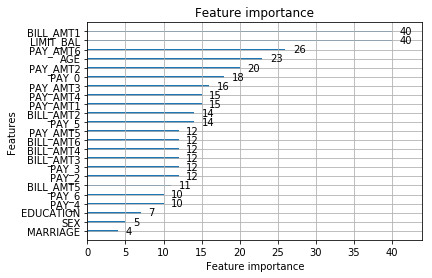

In [103]:
ax = lgb.plot_importance(gbm, max_num_features=25)
plt.show()